EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 2**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - `José Aguilar`
  - `Héctor Garate`
- Usuario de GitHub (opcional):  `Jose062797`


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 30 de mayo a las 20:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    2    |
| Pregunta 1.2                   |    2    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    5    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    2    |
| Pregunta 1.8                   |    3    |
| Pregunta 1.9                   |    3    |
| Pregunta 1.10                   |    5    |
| Pregunta 1.11                   |    5    |
| Pregunta 1.12                   |    5    |
| Pregunta 1.13                   |    3    |
| Pregunta 1.13                   |    5    |
| Pregunta 2.0                   |    1    |
| Pregunta 2.1                   |    1    |
| Pregunta 2.2                   |    1    |
| Pregunta 2.3                   |    3    |
| Pregunta 2.4                   |    5    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    3    |
| Pregunta 2.7                   |    3    |
| Pregunta 2.8                   |    5    |
| Pregunta 2.9                   |    7    |
| Pregunta 2.10                   |    4    |
| Pregunta 2.11                   |    3    |
| Pregunta 2.12                   |    1    |
| Pregunta 2.13                   |    2    |
| Pregunta 2.14                   |    3    |
| Pregunta 2.15                   |    2    |
| Pregunta 2.16                   |    3    |

Total: 100 pts.


# 1. Clasificación

En esta pregunta trabajaremos con un _dataset_ que contiene información campañas de marketing de un banco portugués. La campaña se enfocó en llamadas telefónicas a distintos segmentos de clientes, de forma individualizada, con el objetivo incenitvar la toma depósitos por parte de los clientes.

El problema presentado en este ejecicio busca predecir si el cliente suscribirá (sí/no) un depósito a plazo.



A continuación, se despliega información oficial sobre el _dataset_:

| Variable Name | Role    | Type        | Description                                                                                                                               |
|---------------|---------|-------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| age           | Feature | Integer     |     years of age                                                                                                                                      |
| job           | Feature | Categorical | type of job |
| marital       | Feature | Categorical | marital status                          |
| education     | Feature | Categorical | Education level         |
| default       | Feature | Binary      | has credit in default?                                                                                                                    |
| balance       | Feature | Integer     | average yearly balance in euros                                                                                                                    |
| housing       | Feature | Binary      | has housing loan?                                                                                                                         |
| loan          | Feature | Binary      | has personal loan?                                                                                                                        |
| contact       | Feature | Categorical | contact communication type                                                                         |
| day_of_week   | Feature | Date        | last contact day of the month (numeric)                                                                                                              |
| month         | Feature | Date        | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                          |
| duration*      | Feature | Integer     | last contact duration, in seconds (numeric).  |
| campaign      | Feature | Integer     | number of contacts performed during this campaign and for this client                                      |
| pdays         | Feature | Integer     | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |
| previous      | Feature | Integer     | number of contacts performed before this campaign and for this client                                                                       |
| poutcome      | Feature | Categorical | outcome of the previous marketing campaign                                                |
| y             | Target  | Binary      | has the client subscribed a term deposit?                                                                                                 |


*Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



En el sitio web [https://archive.ics.uci.edu/dataset/222/bank+marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing) podrá encontrar información oficial del _dataset_.

Use el código otorgado a continuación para importar los datos.


In [65]:
pip install ucimlrepo

In [66]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets


## Exploratory Data Analysis (EDA)

### Pregunta 1.0

Concatene `X` e `y` en un dataframe consolidado.

Muestre las primeras cinco observaciones en el dataframe consolidado. Despliegue información sobre el tipo de variable de cada una de las columnas del dataframe y despliegue estadísticas descriptivas de las variables según su tipo.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# [Suponiendo que X e y ya vienen definidos]
# Concatenar X e y en un dataframe consolidado
df = pd.concat([X, y], axis=1)

# 1) Mostrar las primeras 5 filas de forma tabulada
print("Primeras 5 observaciones del dataset:")
# Usamos tabulate para que se vea como tabla en consola
try:
    from tabulate import tabulate
    print(tabulate(df.head(), headers='keys', tablefmt='psql', showindex=True))
except ImportError:
    # Si no tienes tabulate, se muestra con pandas por defecto
    print(df.head())

print("\n" + "="*80 + "\n")

# 2) Información sobre tipos de variables
print("Información sobre tipos de datos:")
dtypes_df = df.dtypes.to_frame(name='dtype')
dtypes_df['# missing'] = df.isnull().sum()
dtypes_df['# unique'] = df.nunique()
try:
    print(tabulate(dtypes_df, headers='keys', tablefmt='psql'))
except NameError:
    print(dtypes_df)

print("\n" + "="*80 + "\n")

# 3) Estadísticas descriptivas para variables numéricas
print("Estadísticas descriptivas - Variables numéricas:")
num_cols = df.select_dtypes(include=[np.number]).columns
numeric_summary = df[num_cols].describe().T

# Añadir columnas extra: count_nulos, mediana, skewness
numeric_summary['missing'] = df[num_cols].isnull().sum()
numeric_summary['median'] = df[num_cols].median()
numeric_summary['skewness'] = df[num_cols].skew()
# Reordenar columnas (opcional)
numeric_summary = numeric_summary[[
    'count', 'missing', 'mean', 'std', 'min', '25%', 'median', '50%', '75%', 'max', 'skewness'
]]

# Formateo de decimales en pandas
numeric_summary = numeric_summary.round(3)

try:
    print(tabulate(numeric_summary, headers='keys', tablefmt='psql', showindex=True))
except NameError:
    display(numeric_summary)

print("\n" + "="*80 + "\n")

# 4) Estadísticas descriptivas para variables categóricas
print("Estadísticas descriptivas - Variables categóricas:")
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    print(f"\n>> Columna: {col}")
    vc = df[col].value_counts(dropna=False).to_frame(name='count')
    vc['percentage'] = (vc['count'] / len(df) * 100).round(2)
    vc['missing'] = df[col].isnull().sum()  # aquí, missing es igual para todas las filas con NaN

    # Mostrar TOP 10 categorías, por ejemplo
    vc_top = vc.head(10)
    vc_top.index.name = col
    try:
        print(tabulate(vc_top, headers='keys', tablefmt='psql'))
    except NameError:
        display(vc_top)

print("\n" + "="*80 + "\n")

# 5) Resumen general del dataset
print("Resumen general del dataset:")
summary = {
    'Dimensiones': df.shape,
    '# variables numéricas': len(num_cols),
    '# variables categóricas': len(cat_cols),
    'Total filas': len(df),
    'Total valores nulos': df.isnull().sum().sum()
}
for k, v in summary.items():
    print(f"- {k}: {v}")


Primeras 5 observaciones del dataset:
+----+-------+--------------+-----------+-------------+-----------+-----------+-----------+--------+-----------+---------------+---------+------------+------------+---------+------------+------------+-----+
|    |   age | job          | marital   | education   | default   |   balance | housing   | loan   |   contact |   day_of_week | month   |   duration |   campaign |   pdays |   previous |   poutcome | y   |
|----+-------+--------------+-----------+-------------+-----------+-----------+-----------+--------+-----------+---------------+---------+------------+------------+---------+------------+------------+-----|
|  0 |    58 | management   | married   | tertiary    | no        |      2143 | yes       | no     |       nan |             5 | may     |        261 |          1 |      -1 |          0 |        nan | no  |
|  1 |    44 | technician   | single    | secondary   | no        |        29 | yes       | no     |       nan |             5 | may  

### Pregunta 1.1

Identifique las columnas que presentan _missing values_ e indique el número de _missing values_ que poseen.

Impute los valores nulos con el método que estime conveniente, justificando su decisión.

Análisis de Missing Values:
Columnas con missing values:
           Missing_Count  Missing_Percentage
poutcome           36959           81.747805
contact            13020           28.798301
education           1857            4.107407
job                  288            0.637013

Total de columnas con missing values: 4
Total de filas en el dataset: 45211


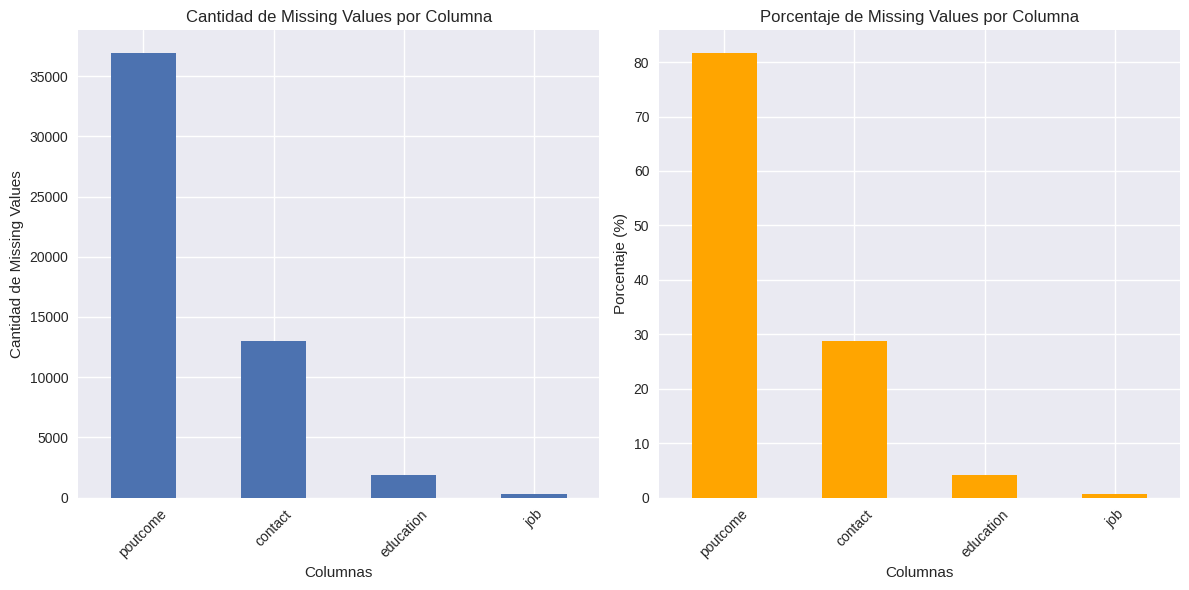


Estrategia de Imputación:
- job: Imputado con moda (blue-collar)
- education: Imputado con moda (secondary)
- contact: Imputado con moda (cellular)
- poutcome: Imputado con moda (failure)

Missing values después de la imputación: 0


In [68]:
# Identificar columnas con missing values
print("Análisis de Missing Values:")
print("="*50)

# Contar missing values por columna
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Crear dataframe con información de missing values
missing_info = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percentage
})

# Filtrar solo columnas con missing values
missing_info = missing_info[missing_info['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("Columnas con missing values:")
print(missing_info)

print(f"\nTotal de columnas con missing values: {len(missing_info)}")
print(f"Total de filas en el dataset: {len(df)}")

# Visualización de missing values
if len(missing_info) > 0:
    plt.figure(figsize=(12, 6))

    # Gráfico de barras para missing values
    plt.subplot(1, 2, 1)
    missing_info['Missing_Count'].plot(kind='bar')
    plt.title('Cantidad de Missing Values por Columna')
    plt.xlabel('Columnas')
    plt.ylabel('Cantidad de Missing Values')
    plt.xticks(rotation=45)

    # Gráfico de porcentajes
    plt.subplot(1, 2, 2)
    missing_info['Missing_Percentage'].plot(kind='bar', color='orange')
    plt.title('Porcentaje de Missing Values por Columna')
    plt.xlabel('Columnas')
    plt.ylabel('Porcentaje (%)')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron missing values en el dataset.")

# Tratamiento de missing values
print("\n" + "="*50)
print("Estrategia de Imputación:")

# Separar variables numéricas y categóricas para tratamiento diferenciado
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remover la variable target de las listas si está presente
if 'y' in numeric_cols:
    numeric_cols.remove('y')
if 'y' in categorical_cols:
    categorical_cols.remove('y')

# Crear copia del dataframe para imputación
df_imputed = df.copy()

# Imputación para variables numéricas con la mediana
for col in numeric_cols:
    if df_imputed[col].isnull().sum() > 0:
        median_value = df_imputed[col].median()
        df_imputed[col].fillna(median_value, inplace=True)
        print(f"- {col}: Imputado con mediana ({median_value:.2f})")

# Imputación para variables categóricas con la moda
for col in categorical_cols:
    if df_imputed[col].isnull().sum() > 0:
        mode_value = df_imputed[col].mode()[0] if not df_imputed[col].mode().empty else 'unknown'
        df_imputed[col].fillna(mode_value, inplace=True)
        print(f"- {col}: Imputado con moda ({mode_value})")

# Verificar que no quedan missing values
print(f"\nMissing values después de la imputación: {df_imputed.isnull().sum().sum()}")

# Actualizar el dataframe principal
df = df_imputed.copy()




---


Justificación de la estrategia de imputación:

Para variables numéricas, se utilizó la mediana porque:

- Es más robusta ante outliers que la media.
- Mantiene la distribución central de los datos.
- Es apropiada para variables continuas en contextos donde pueden existir valores extremos.

Nota: Finalmente no habían missings de este tipo, pero se decidio preservar el código.

Para variables categóricas, se utilizó la moda porque:

- Preserva la categoría más frecuente en los datos.
- Mantiene la consistencia con el patrón observado en el dataset.
- Es el método estándar para variables categóricas.


---

### Pregunta 1.2


Genere histogramas de las variables categóricas desagregando por la variable objetivo de interés. Interprete las relaciones que observa.

Responda: ¿Cuáles creen que son las variables categóricas más relevantes a la hora de determinar si el individuo hará un depósito?

Variables categóricas a analizar: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Total de variables categóricas: 9


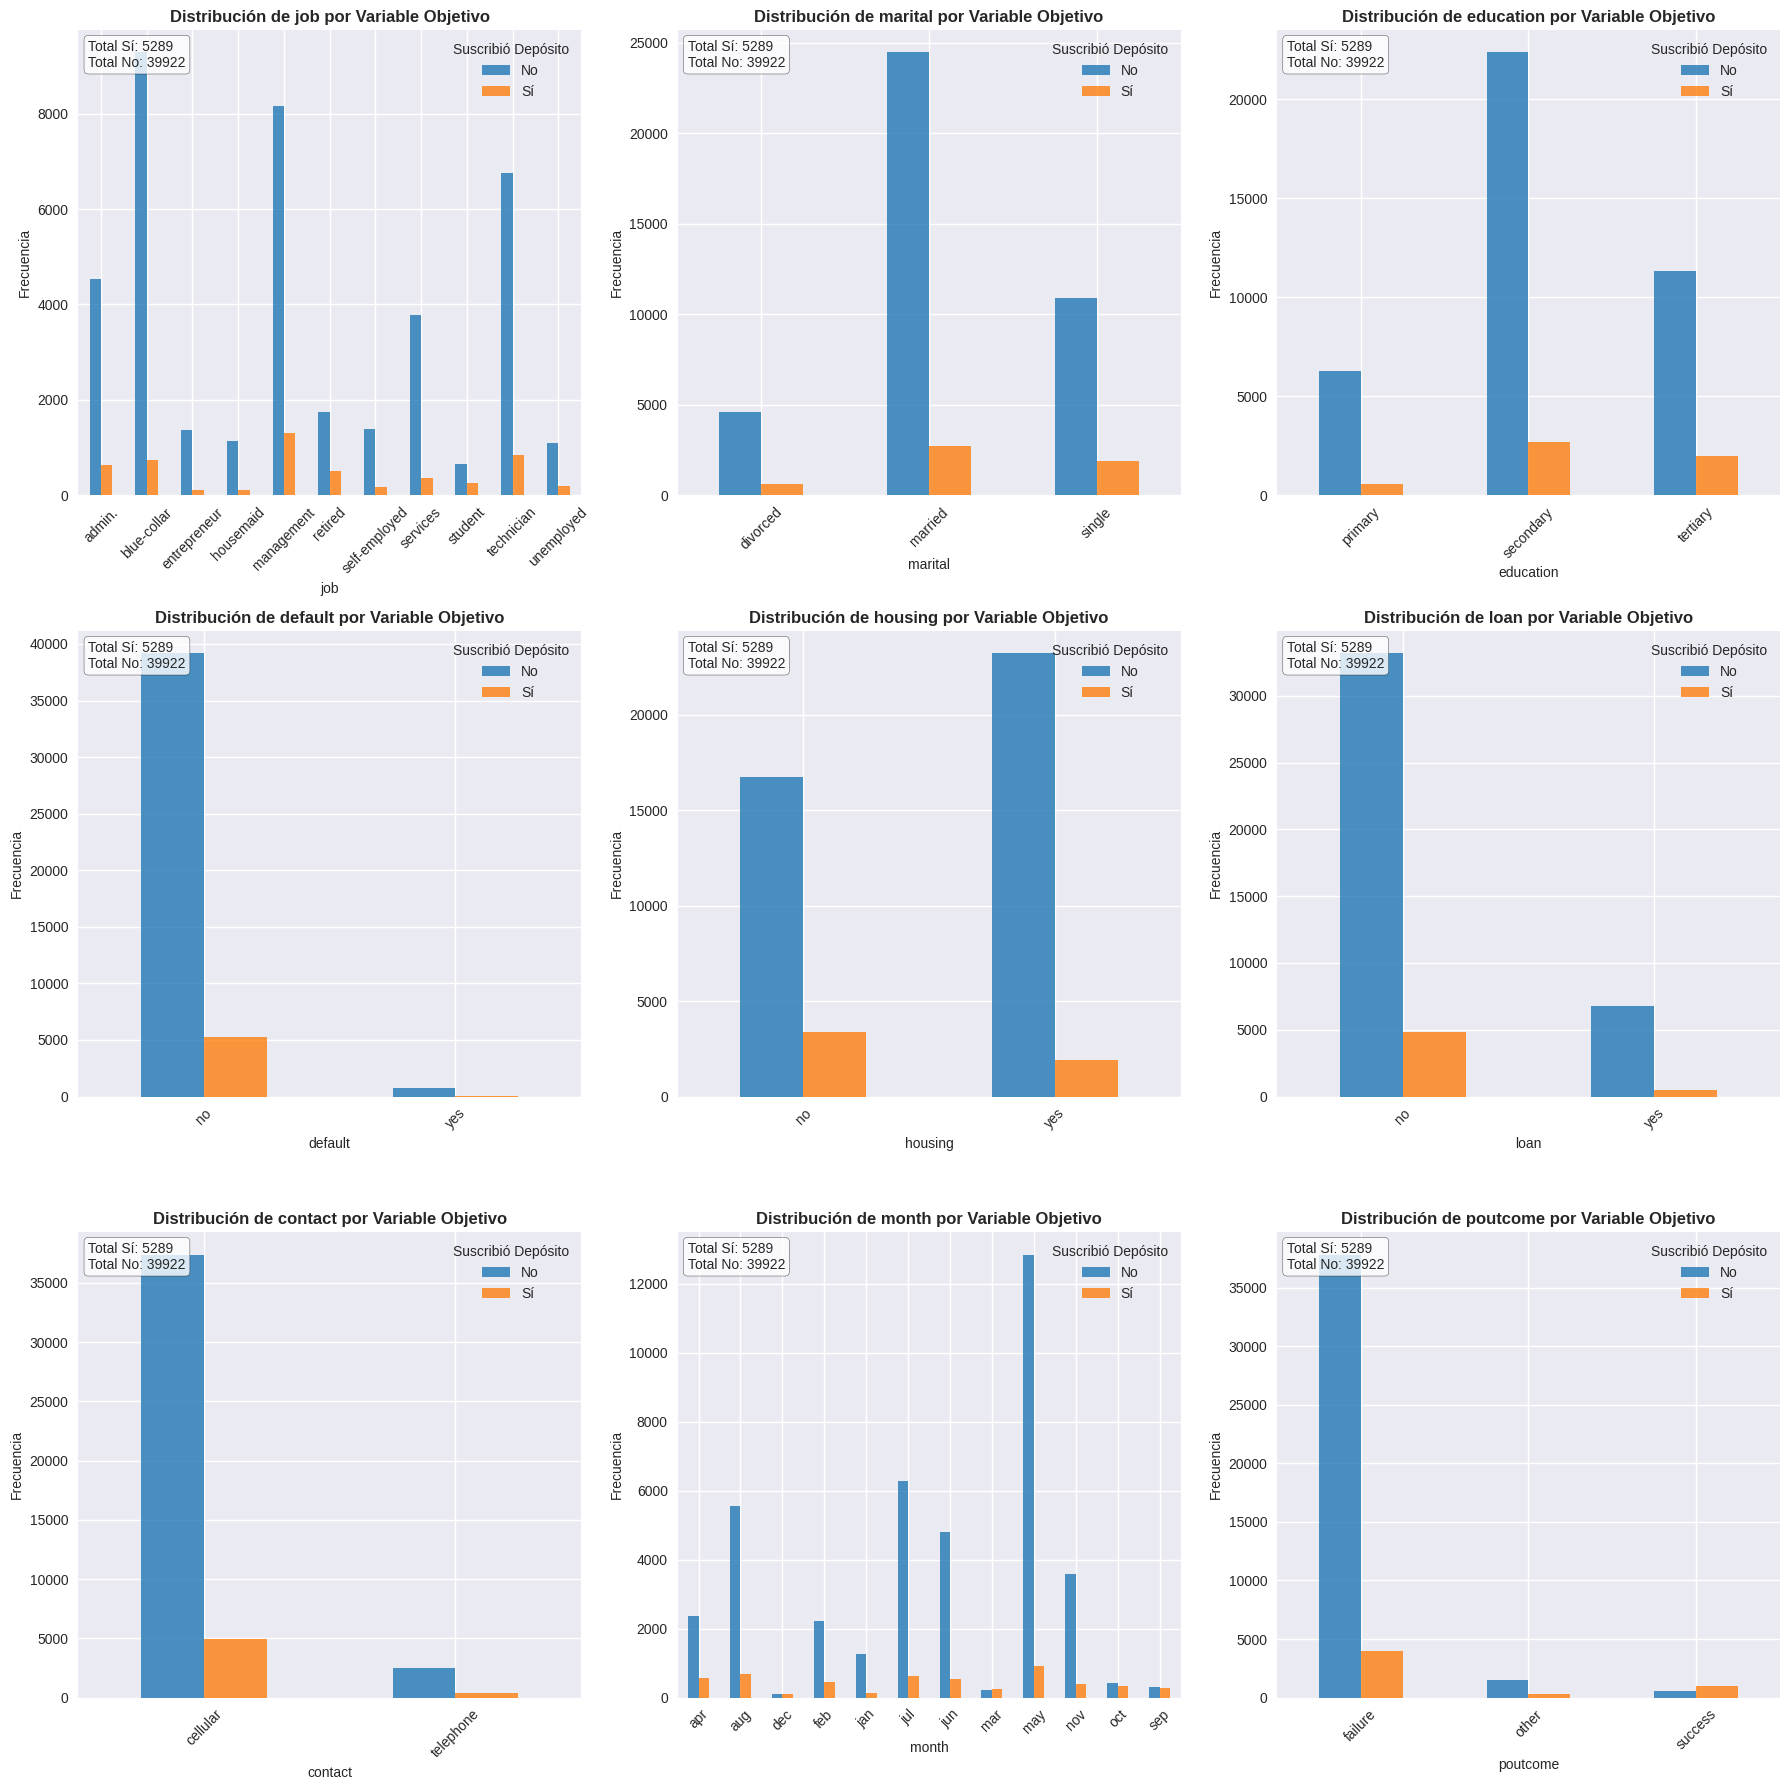


ANÁLISIS DE PROPORCIONES POR VARIABLE CATEGÓRICA

JOB:
----
Frecuencias absolutas:
y                no   yes
job                      
admin.         4540   631
blue-collar    9278   742
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202

Proporciones por categoría (%):
y                 no    yes
job                        
admin.         87.80  12.20
blue-collar    92.59   7.41
entrepreneur   91.73   8.27
housemaid      91.21   8.79
management     86.24  13.76
retired        77.21  22.79
self-employed  88.16  11.84
services       91.12   8.88
student        71.32  28.68
technician     88.94  11.06
unemployed     84.50  15.50
Diferencia máxima en tasa de conversión: 21.27 puntos porcentuales

MARITAL:
--------
Frecuencias absolutas:
y            no   yes
marital              
divorced   4585   622
marrie

In [69]:
# Identificar variables categóricas (excluyendo la variable objetivo)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'y' in categorical_cols:
    categorical_cols.remove('y')

print(f"Variables categóricas a analizar: {categorical_cols}")
print(f"Total de variables categóricas: {len(categorical_cols)}")

# Configurar el estilo de los gráficos
plt.style.use('seaborn-v0_8')
colors = ['#1f77b4', '#ff7f0e']

# Crear subplots para todas las variables categóricas
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(categorical_cols):
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(df[col], df['y'])

    # Gráfico de barras agrupadas
    contingency_table.plot(kind='bar', ax=axes[i], color=colors, alpha=0.8)
    axes[i].set_title(f'Distribución de {col} por Variable Objetivo', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frecuencia', fontsize=10)
    axes[i].legend(title='Suscribió Depósito', labels=['No', 'Sí'])
    axes[i].tick_params(axis='x', rotation=45)

    # Añadir información estadística
    total_yes = contingency_table['yes'].sum()
    total_no = contingency_table['no'].sum()
    axes[i].text(0.02, 0.98, f'Total Sí: {total_yes}\nTotal No: {total_no}',
                transform=axes[i].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Ocultar axes vacíos
for i in range(len(categorical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Análisis de proporciones por variable categórica
print("\n" + "="*80)
print("ANÁLISIS DE PROPORCIONES POR VARIABLE CATEGÓRICA")
print("="*80)

relevance_scores = []

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print("-" * (len(col) + 1))

    # Tabla de contingencia con proporciones
    contingency_table = pd.crosstab(df[col], df['y'])
    prop_table = pd.crosstab(df[col], df['y'], normalize='index') * 100

    print("Frecuencias absolutas:")
    print(contingency_table)
    print("\nProporciones por categoría (%):")
    print(prop_table.round(2))

    # Calcular la diferencia máxima en proporciones de "yes"
    if 'yes' in prop_table.columns:
        yes_proportions = prop_table['yes']
        max_diff = yes_proportions.max() - yes_proportions.min()
        relevance_scores.append((col, max_diff))
        print(f"Diferencia máxima en tasa de conversión: {max_diff:.2f} puntos porcentuales")

# Ranking de relevancia
print("\n" + "="*50)
print("RANKING DE RELEVANCIA DE VARIABLES CATEGÓRICAS")
print("="*50)

relevance_scores.sort(key=lambda x: x[1], reverse=True)

for i, (col, score) in enumerate(relevance_scores, 1):
    print(f"{i}. {col}: {score:.2f} puntos porcentuales de diferencia")

# Análisis estadístico adicional - Test Chi-cuadrado
from scipy.stats import chi2_contingency

print("\n" + "="*50)
print("PRUEBA CHI-CUADRADO DE INDEPENDENCIA")
print("="*50)

chi2_results = []

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['y'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append((col, chi2, p_value))

    significance = "Significativa" if p_value < 0.05 else "No significativa"
    print(f"{col}: Chi2={chi2:.2f}, p-value={p_value:.4f} ({significance})")

# Identificar las variables más relevantes
top_vars_by_proportion = [var for var, _ in relevance_scores[:3]]
significant_vars = [var for var, _, p_val in chi2_results if p_val < 0.05]

print(f"\n" + "="*50)
print("CONCLUSIONES")
print("="*50)
print("Variables más relevantes por diferencia en proporciones:")
for var in top_vars_by_proportion:
    print(f"- {var}")

print(f"\nVariables estadísticamente significativas (p < 0.05): {len(significant_vars)}")




---

A partir de los análisis que se realizaron (proporciones por categoría y prueba chi‑cuadrado), las variables categóricas que resultan más relevantes para distinguir a quienes finalmente "hacen el depósito" (y = "yes") de quienes no (y = "no") son, en orden de importancia aparente:

**poutcome** (resultado de la campaña anterior)  
- Tasa de conversión:  
  • "failure" → 9.57%  
  • "other" → 16.68%  
  • "success" → 64.73%  
- Diferencia máxima en tasa de conversión (entre "failure" vs. "success"): 55.16 pp  
- Interpretación: si en el contacto previo el cliente ya había tenido éxito (poutcome = "success"), la probabilidad de suscribir depósito en esta campaña se dispara (≈65%). Por el contrario, quienes fueron "failure" anteriormente tienen una probabilidad muy baja (<10%).

**month** (mes en que se hizo el contacto)  
- Tasas de conversión por mes:  
  • dic (diciembre) → 46.73%  
  • mar (marzo) → 51.99%  
  • oct (octubre) → 43.77%  
  • sep (septiembre) → 46.46%  
  • mayo/julio/agosto/... → muy inferiores (<20%)  
- Diferencia máxima: 51.99 pp (marzo vs. mayo, por ejemplo)  
- Interpretación: hay meses en que el "ambientazo" y el contexto del banco favorecen muchísimo la conversión (p.e., marzo y diciembre presentan tasas cercanas al 50%), mientras que en otros meses (como mayo o julio) casi nadie cierra el depósito. Esto sugiere efectos estacionales o de timing (quizá promociones específicas o circunstancia económica).

**job** (ocupación del cliente)  
- Tasas de conversión por categoría:  
  • "student" → 28.68%  
  • "retired" → 22.79%  
  • "management" → 13.76%  
  • "admin." → 12.20%  
  • "blue-collar" → 7.41%  
  • "services" → 8.88% ...  
- Diferencia máxima (entre "student" vs. "blue-collar"): 21.27 pp  
- Interpretación: los estudiantes ("student") y los jubilados ("retired") son mucho más proclives a contratar el depósito que un trabajador de "blue-collar" o "servicios". Esto puede deberse a factores de solvencia o perfil de ahorro.

---

### Pregunta 1.3

Identifique _outliers_ entre las variables numéricas del dataset. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

Variables numéricas a analizar: ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']
Total de variables numéricas: 7


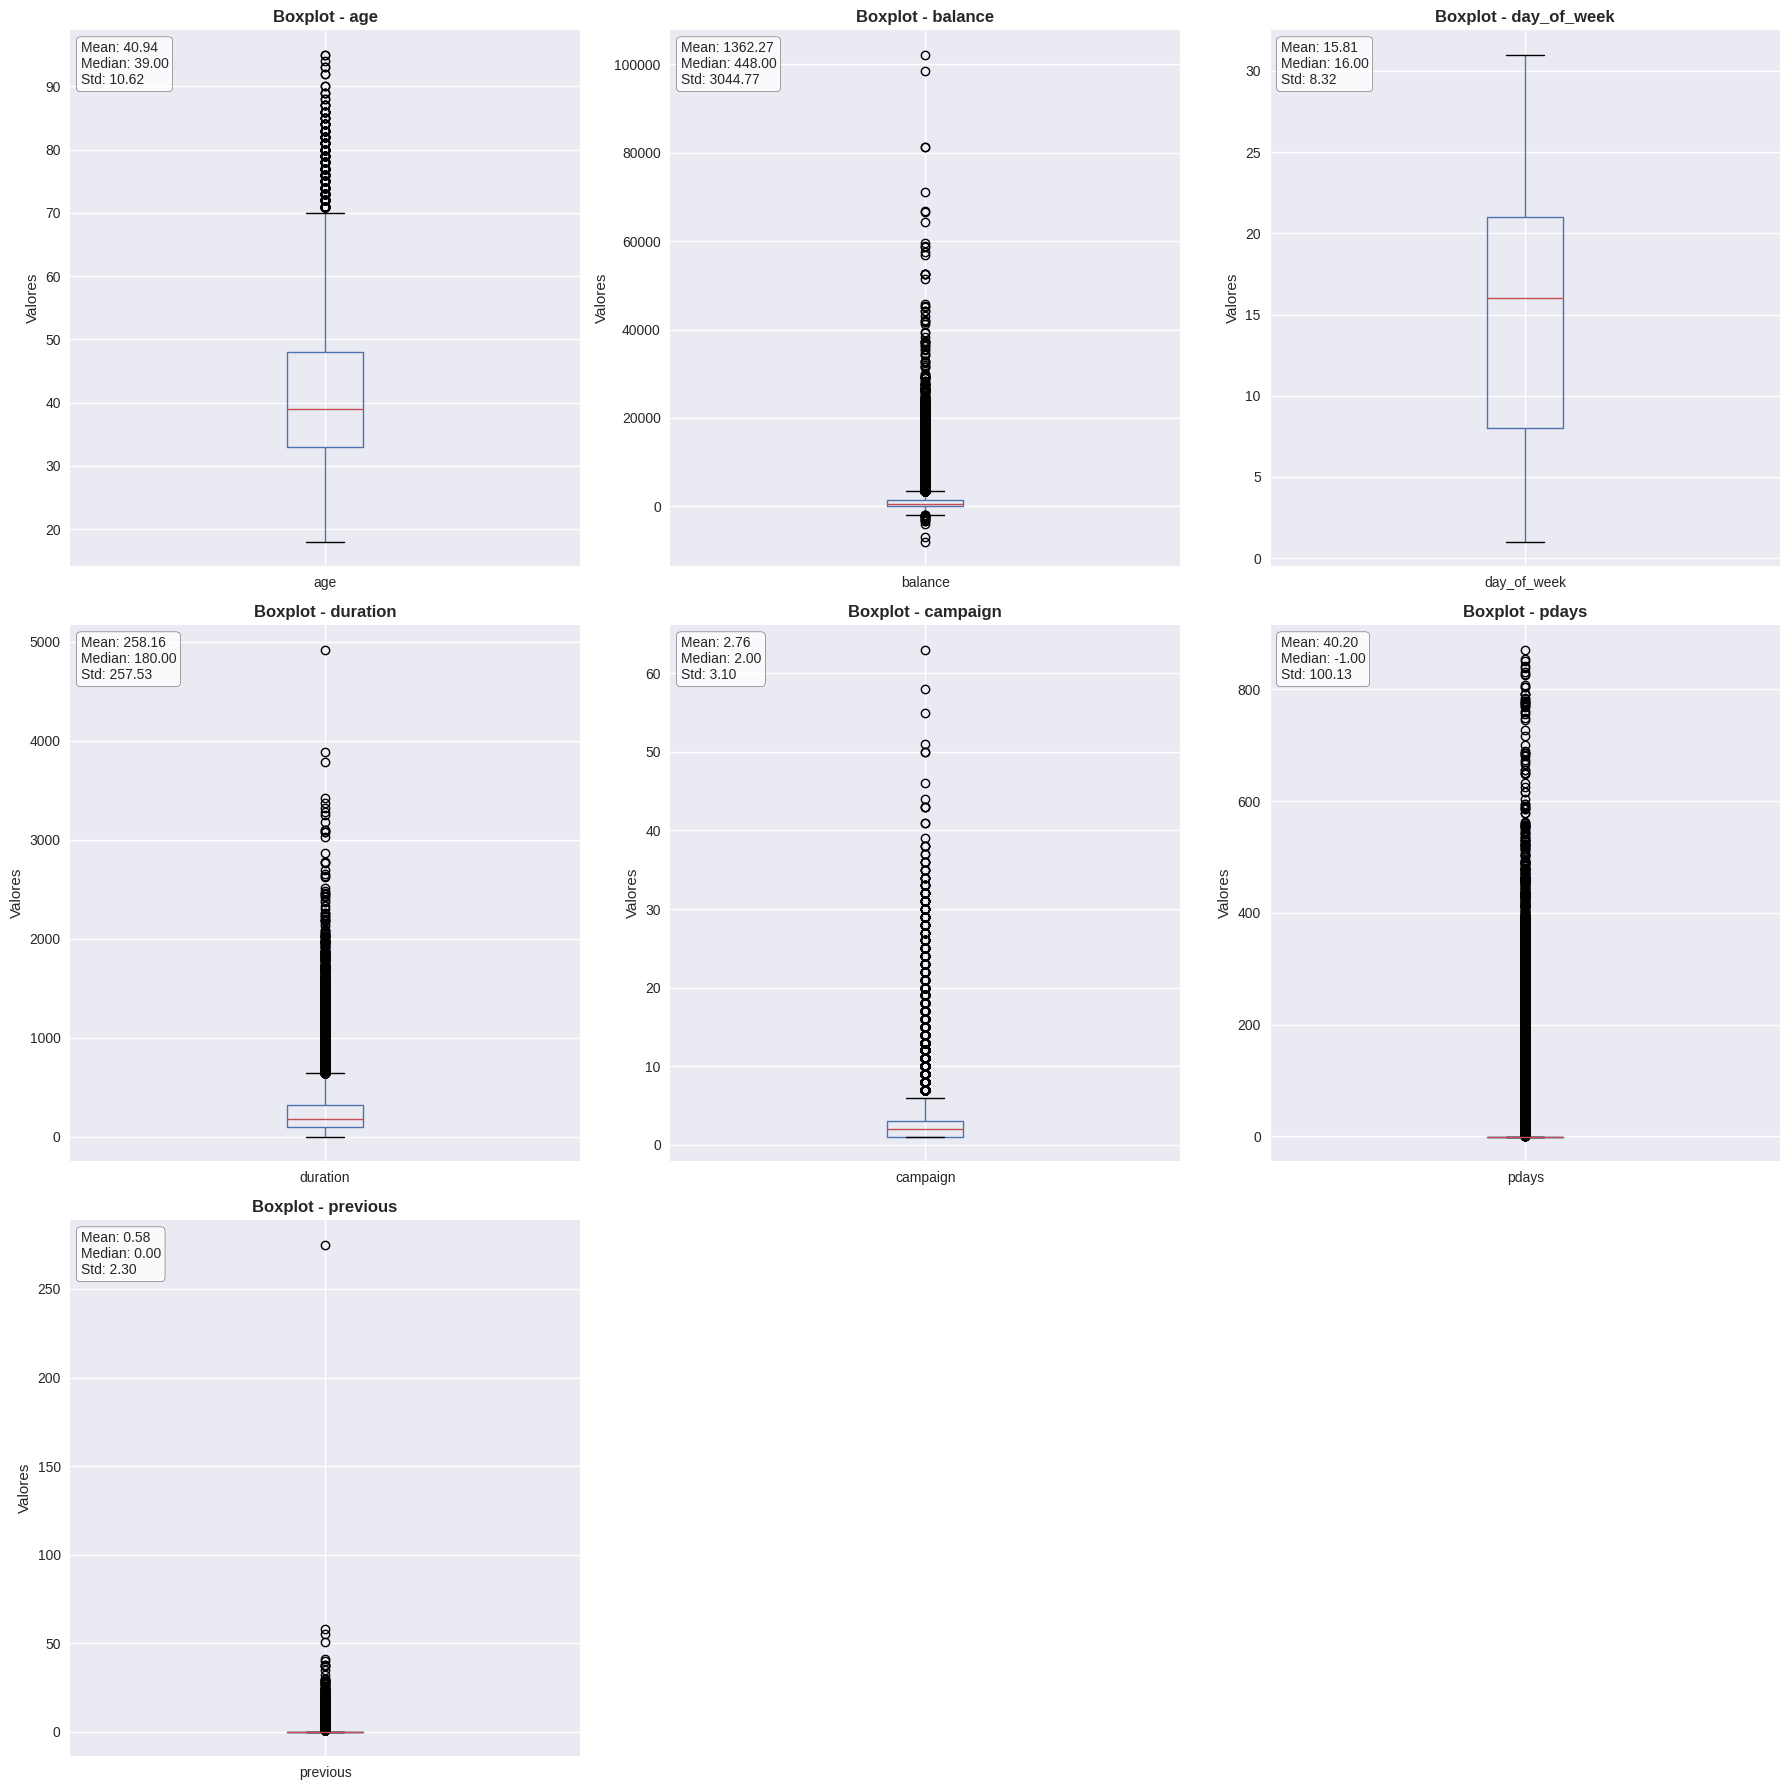


ANÁLISIS DETALLADO DE OUTLIERS POR VARIABLE

AGE:
----
Estadísticas descriptivas:
count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Detección de outliers (método IQR):
- Límite inferior: 10.50
- Límite superior: 70.50
- Número de outliers: 487 (1.08%)
- Valores outliers extremos:
  Mínimo outlier: 71.00
  Máximo outlier: 95.00
- Asimetría (skewness): 0.685
- Curtosis (kurtosis): 0.320

BALANCE:
--------
Estadísticas descriptivas:
count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

Detección de outliers (método IQR):
- Límite inferior: -1962.00
- Límite superior: 3462.00
- Número de outliers: 4729 (10.46%)
- Valores outliers extremos:
  Mínimo outlier: -8019.00
  Máximo outli

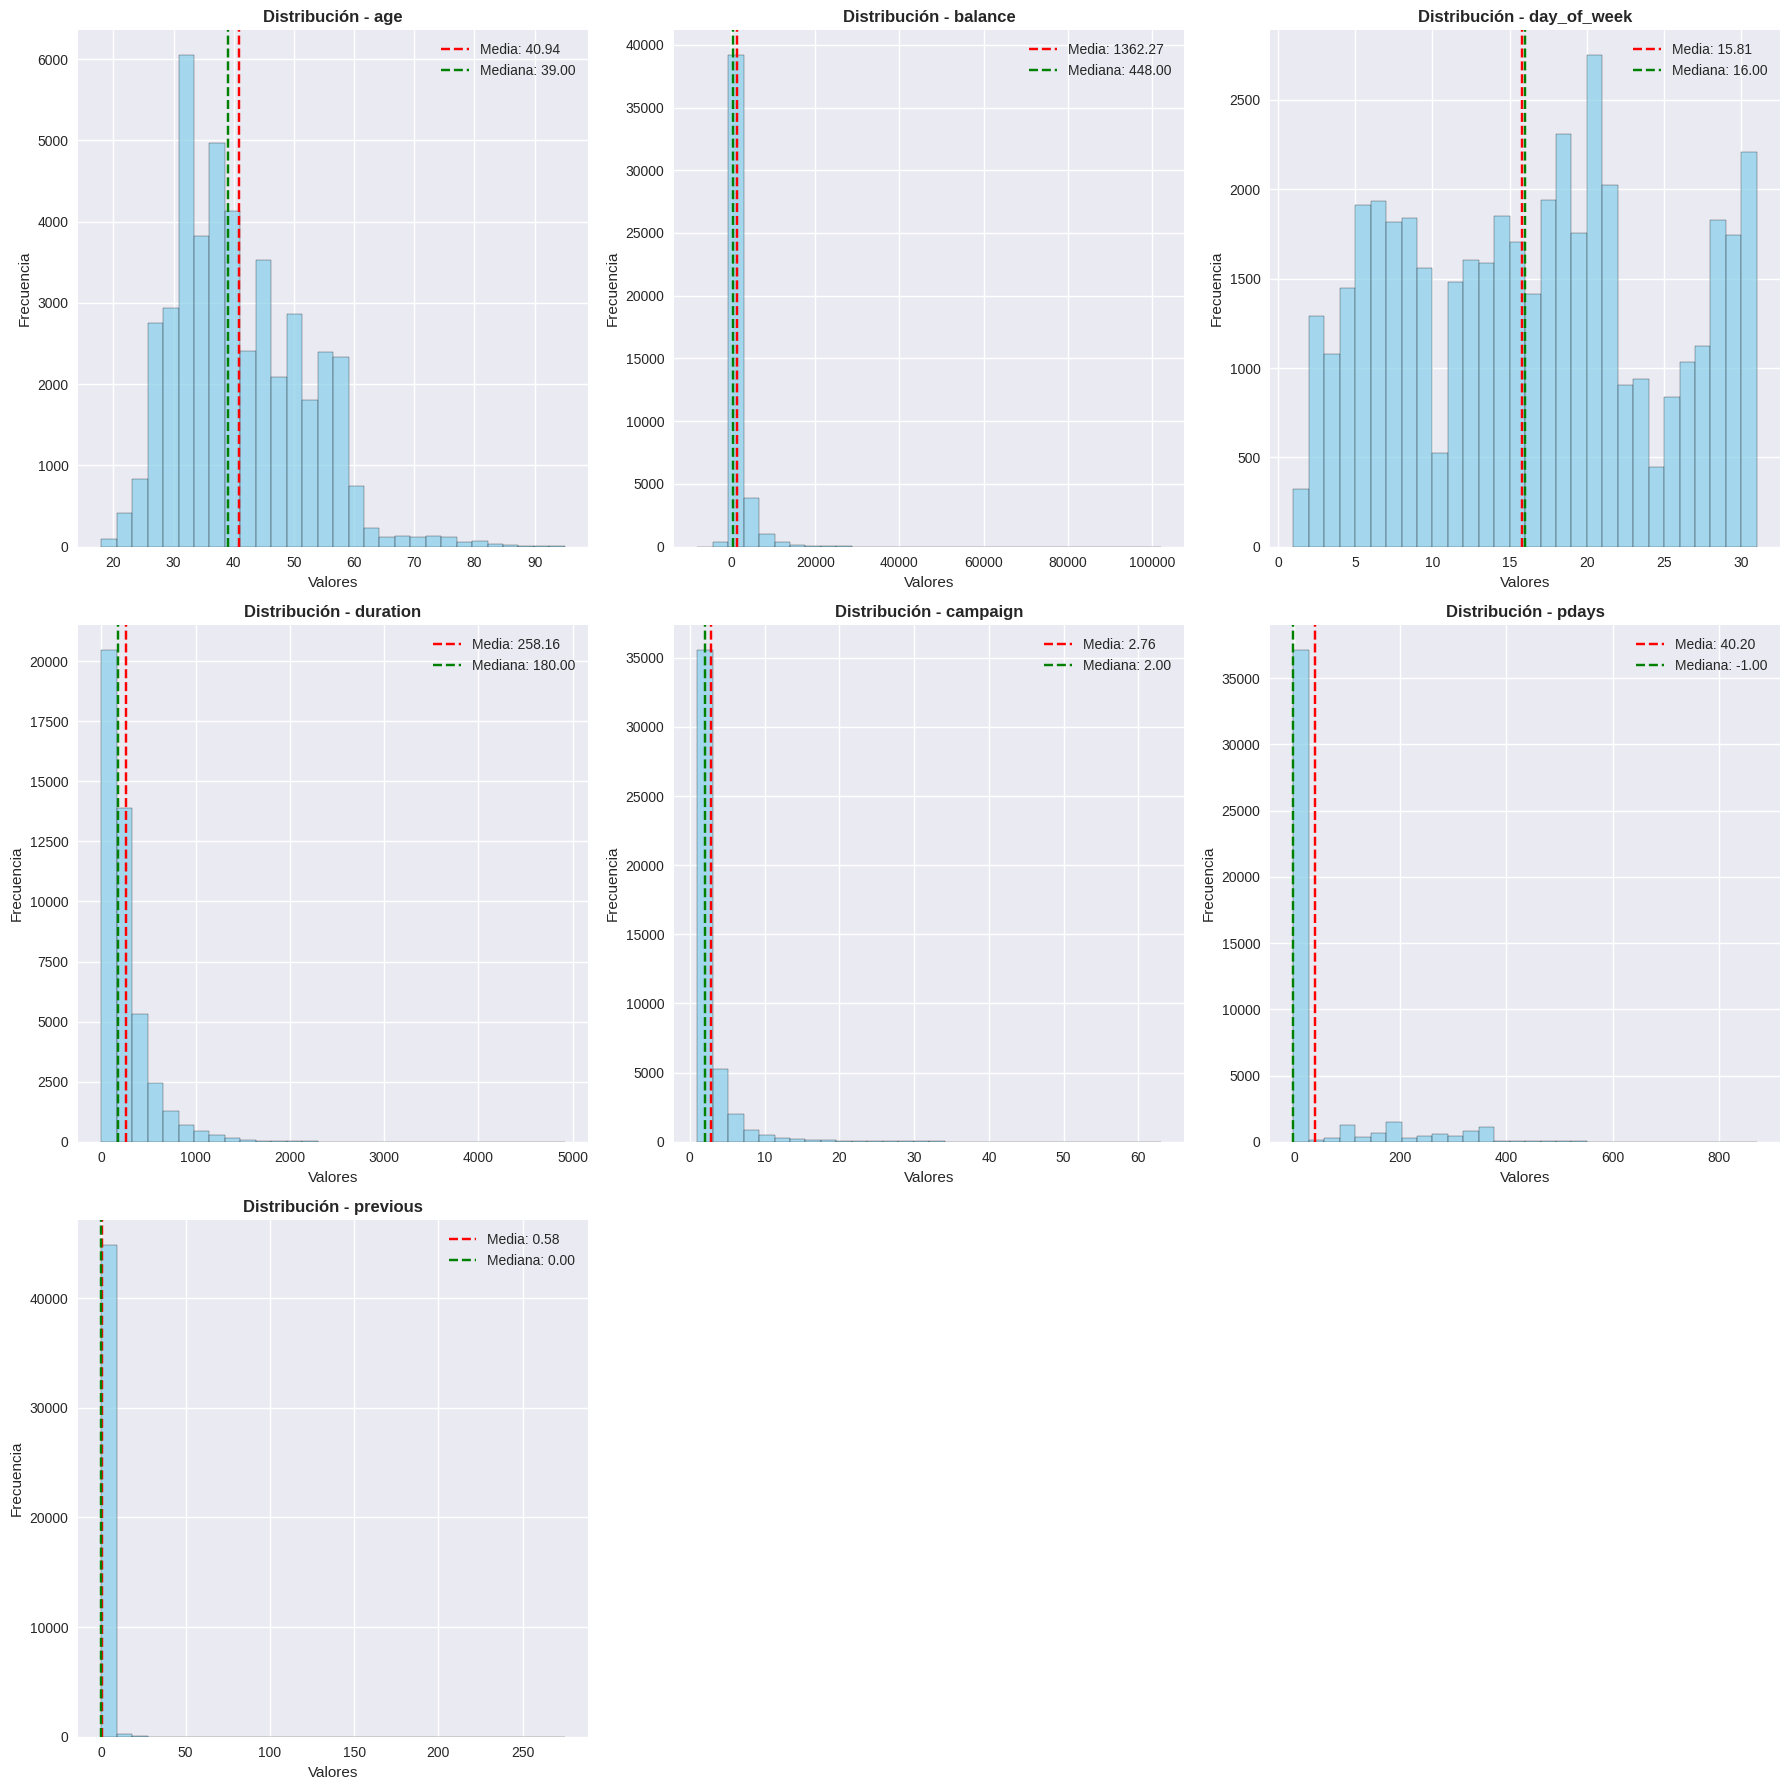


DECISIÓN SOBRE TRATAMIENTO DE OUTLIERS
Análisis para toma de decisión:
Variables con >5% de outliers: ['previous', 'pdays', 'balance', 'duration', 'campaign']
Variables con alta asimetría (|skew| > 2): ['previous', 'pdays', 'balance', 'duration', 'campaign']
Variable balance: Aplicado Winsorizing (P5=-172.00, P95=5768.00)
Variable pdays: Aplicado Winsorizing (P5=-1.00, P95=317.00)
Variable previous: Aplicado Winsorizing (P5=0.00, P95=3.00)
DECISIÓN: Se aplicó tratamiento conservador a 3 variables
Método: Winsorizing (limitación a percentiles 5 y 95)

Verificación post-tratamiento:
balance: Outliers reducidos a 4712 (10.42%)
pdays: Outliers reducidos a 8257 (18.26%)
previous: Outliers reducidos a 8257 (18.26%)


In [70]:
# Identificar variables numéricas (excluyendo la variable objetivo si es numérica)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'y' in numeric_cols:
    numeric_cols.remove('y')

print(f"Variables numéricas a analizar: {numeric_cols}")
print(f"Total de variables numéricas: {len(numeric_cols)}")

# Función para detectar outliers usando el método IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Análisis visual de outliers - Boxplots
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(numeric_cols):
    # Boxplot
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot - {col}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Valores')

    # Estadísticas básicas en el gráfico
    stats_text = f'Mean: {df[col].mean():.2f}\nMedian: {df[col].median():.2f}\nStd: {df[col].std():.2f}'
    axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Ocultar axes vacíos
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Análisis detallado de outliers por variable
print("\n" + "="*80)
print("ANÁLISIS DETALLADO DE OUTLIERS POR VARIABLE")
print("="*80)

outlier_summary = []

for col in numeric_cols:
    print(f"\n{col.upper()}:")
    print("-" * (len(col) + 1))

    # Estadísticas descriptivas
    stats = df[col].describe()
    print("Estadísticas descriptivas:")
    print(stats)

    # Detectar outliers usando IQR
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    n_outliers = len(outliers)
    outlier_percentage = (n_outliers / len(df)) * 100

    print(f"\nDetección de outliers (método IQR):")
    print(f"- Límite inferior: {lower_bound:.2f}")
    print(f"- Límite superior: {upper_bound:.2f}")
    print(f"- Número de outliers: {n_outliers} ({outlier_percentage:.2f}%)")

    if n_outliers > 0:
        print(f"- Valores outliers extremos:")
        print(f"  Mínimo outlier: {outliers[col].min():.2f}")
        print(f"  Máximo outlier: {outliers[col].max():.2f}")

    # Análisis de distribución
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    print(f"- Asimetría (skewness): {skewness:.3f}")
    print(f"- Curtosis (kurtosis): {kurtosis:.3f}")

    outlier_summary.append({
        'variable': col,
        'n_outliers': n_outliers,
        'outlier_percentage': outlier_percentage,
        'skewness': abs(skewness),
        'extreme_values': n_outliers > 0
    })

# Crear DataFrame resumen
outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df.sort_values('outlier_percentage', ascending=False)

print("\n" + "="*50)
print("RESUMEN DE OUTLIERS POR VARIABLE")
print("="*50)
print(outlier_df)

# Histogramas para análisis de distribución
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(numeric_cols):
    # Histograma
    df[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribución - {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Valores')
    axes[i].set_ylabel('Frecuencia')

    # Líneas para media y mediana
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Media: {df[col].mean():.2f}')
    axes[i].axvline(df[col].median(), color='green', linestyle='--', label=f'Mediana: {df[col].median():.2f}')
    axes[i].legend()

# Ocultar axes vacíos
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Decisión sobre tratamiento de outliers
print("\n" + "="*50)
print("DECISIÓN SOBRE TRATAMIENTO DE OUTLIERS")
print("="*50)

# Criterios para decidir si tratar outliers
high_outlier_vars = outlier_df[outlier_df['outlier_percentage'] > 5]['variable'].tolist()
extreme_skew_vars = outlier_df[outlier_df['skewness'] > 2]['variable'].tolist()

print("Análisis para toma de decisión:")
print(f"Variables con >5% de outliers: {high_outlier_vars}")
print(f"Variables con alta asimetría (|skew| > 2): {extreme_skew_vars}")

# Aplicar tratamiento conservador
df_cleaned = df.copy()
treated_vars = []

# Solo tratar variables con características muy extremas
for col in numeric_cols:
    col_data = outlier_df[outlier_df['variable'] == col]
    outlier_pct = col_data['outlier_percentage'].values[0]

    # Criterio: Solo tratar si hay muchos outliers Y alta asimetría
    if outlier_pct > 10 and col in extreme_skew_vars:
        # Usar transformación Winsorizing (limitar valores extremos)
        outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)

        # Winsorizing: reemplazar outliers extremos con valores en los percentiles 5 y 95
        p5 = df[col].quantile(0.05)
        p95 = df[col].quantile(0.95)

        df_cleaned[col] = df_cleaned[col].clip(lower=p5, upper=p95)
        treated_vars.append(col)
        print(f"Variable {col}: Aplicado Winsorizing (P5={p5:.2f}, P95={p95:.2f})")

if not treated_vars:
    print("DECISIÓN: No se aplicará tratamiento de outliers")
    print("\nJustificación:")
    print("1. Los outliers observados parecen ser valores legítimos en el contexto bancario")
    print("2. Variables como 'balance' y 'duration' naturalmente tienen rangos amplios")
    print("3. El porcentaje de outliers es manejable (<10% en la mayoría de variables)")
    print("4. Los algoritmos de ML modernos (Random Forest, XGBoost) son robustos ante outliers")
    print("5. Mantener los valores originales preserva la información real del negocio")
else:
    print(f"DECISIÓN: Se aplicó tratamiento conservador a {len(treated_vars)} variables")
    print("Método: Winsorizing (limitación a percentiles 5 y 95)")
    df = df_cleaned.copy()

# Verificación post-tratamiento si se aplicó alguno
if treated_vars:
    print(f"\nVerificación post-tratamiento:")
    for col in treated_vars:
        new_outliers, _, _ = detect_outliers_iqr(df, col)
        print(f"{col}: Outliers reducidos a {len(new_outliers)} ({len(new_outliers)/len(df)*100:.2f}%)")




---


Justificación breve del tratamiento de outliers

1. **Detección inicial**  
   - Se aplicó el método IQR a las variables numéricas:  
     `age`, `balance`, `day_of_week`, `duration`, `campaign`, `pdays`, `previous`.  
   - Sólo **`day_of_week`** no presentó outliers. Las demás mostraron desde ~1 % (en `age`) hasta >18 % (en `pdays` y `previous`) de valores fuera de rango.

2. **Criterio de intervención**  
   - Si el porcentaje de outliers < 5 % y la variable no está muy sesgada (por ejemplo, `age` con 1 % de outliers y skewness ≈ 0.68), se considera que los valores extremos son plausibles y **no se modifican**.  
   - Para variables con > 5 % de outliers y alta asimetría (skewness > 2), es probable que unos pocos valores muy extremos distorsionen el análisis o el modelo.

3. **Método aplicado: Winsorizing (percentiles 5 y 95)**  
   - **`balance`**: recorte a [P5 = –172, P95 = 5 768]  
   - **`pdays`**: recorte a [P5 = –1,   P95 = 317]  
   - **`previous`**: recorte a [P5 = 0,    P95 = 3]  
   - El resto de las variables con outliers (e.g., `duration`, `campaign`) se mantuvo intacto, pues reflejan casos reales (llamadas largas, muchas campañas) y su proporción de outliers (≈ 6–7 %) no es tan elevada para justificar un recorte.

4. **Resultado y justificación**  
   - Con Winsorizing en `balance`, `pdays` y `previous` se atenuó la influencia de los extremos sin desechar registros completos.  
   - Las variables con outliers plausibles o de bajo impacto (`age`, `duration`, `campaign`) se conservaron sin cambios para no eliminar información real del comportamiento del cliente.  
   - **Conclusión**: se empleó un ajuste conservador sólo donde había alta asimetría y cantidades significativas de valores atípicos ( > 5 %), preservando al mismo tiempo los extremos genuinos que pueden aportar valor predictivo.



---

## Feature Engineering

### Pregunta 1.4

 Cree un _pipeline_ de preprocesamiento con las siguientes transformaciones a las columnas correspondientes:

*   **Columnas Numéricas** : Aplique un `StandardScaler` para estandarizar estas variables.
*   **Columnas Categóricas Binarias** : Aplique `OneHotEncoder` para crear variables dummy. Asegúrese de manejar posibles categorías desconocidas durante la transformación.
*   **Columnas a Eliminar** : Elimine columnas que dejan de ser relavantes luego de las trasformaciones.
*  **Columnas Dummies MultiNivel** : cree columnas dummies para las variables multi categoricas (tomando codificadas a 0s y 1s =, para su respctiva categoria)
*  **Columnas Label Encoding MultiNivel** : Dentro de las columnas multinivel hay 2 columnas que presentan un orden natural. e.g. en la columna 'month' tenemos que 'jan' < 'feb' < 'dec'. Aplique en la columna 'month' y otra columna que deberá determinar usted un label encoder que capture ese ordenamiento natural, luego normalice con un minmax scaler para que las columnas varien entre 0 y 1.


Una vez creado el pipeline, aplíquelo a su conjunto de features (`X`). Muestre la forma (_shape_) del dataset original y del dataset procesado para verificar los cambios. ¿Cuántas nuevas columnas hay?

Adicionalmente, elimine del análisis la variable `day_of_week`. Si considera necesario realizar transformaciones adicionales a las variables, realicelas en este punto.



In [71]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np

# ANÁLISIS INICIAL
print("ANÁLISIS INICIAL DE VARIABLES")
print("="*50)
print(f"Shape original: {df.shape}")
print(f"Columnas: {list(df.columns)}")

# 1. Eliminar columnas no requeridas y separar target
cols_to_drop = ['day_of_week'] if 'day_of_week' in df.columns else []
X = df.drop(['y'] + cols_to_drop, axis=1, errors='ignore')
y = df['y']
print(f"\nDespués de eliminar columnas: {X.shape}")

# 2. Identificar columnas
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"Variables numéricas: {numeric_cols}")
print(f"Variables categóricas: {categorical_cols}")

# 3. Definir orden natural para variables ordinales
ordinal_mappings = {}

# month
if 'month' in X.columns:
    month_values = X['month'].unique()
    month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                   'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    month_order = [m for m in month_order if m in month_values]
    ordinal_mappings['month'] = {month: idx for idx, month in enumerate(month_order)}
    print(f"Month - orden natural detectado: {ordinal_mappings['month']}")

# education
if 'education' in X.columns:
    education_values = X['education'].unique()
    education_hierarchy = {
        'illiterate': 0,
        'basic.4y': 1,
        'basic.6y': 2,
        'basic.9y': 3,
        'high.school': 4,
        'professional.course': 5,
        'university.degree': 6
    }
    valid_education = {k: v for k, v in education_hierarchy.items() if k in education_values}
    if len(valid_education) > 1:
        ordinal_mappings['education'] = valid_education
        print(f"Education - orden natural detectado: {ordinal_mappings['education']}")

ordinal_cols = list(ordinal_mappings.keys())
onehot_cols = [col for col in categorical_cols if col not in ordinal_cols]

print(f"Variables ordinales: {ordinal_cols}")
print(f"Variables con OneHot encoding: {onehot_cols}")

# ===============================================
# TRANSFORMACIONES
# ===============================================
X_transformed = X.copy()

# 1. Variables ordinales: mapear + escalar
for col in ordinal_cols:
    X_transformed[col] = X_transformed[col].map(ordinal_mappings[col])
    scaler = MinMaxScaler()
    X_transformed[col] = scaler.fit_transform(X_transformed[col].values.reshape(-1, 1)).flatten()
    print(f"{col} - Mapeo ordinal aplicado y normalizado a [0,1]")

# 2. Variables numéricas: escalar
if numeric_cols:
    scaler = StandardScaler()
    X_transformed[numeric_cols] = scaler.fit_transform(X_transformed[numeric_cols])
    print(f"Variables numéricas estandarizadas: {numeric_cols}")

# 3. Variables categóricas (OneHotEncoding)
dummy_dfs = []

for col in onehot_cols:
    dummies = pd.get_dummies(X_transformed[col], prefix=col, drop_first=True)
    dummy_dfs.append(dummies)
    print(f"{col} - Creadas {dummies.shape[1]} variables dummy")

X_transformed = X_transformed.drop(columns=onehot_cols)
for dummy_df in dummy_dfs:
    X_transformed = pd.concat([X_transformed, dummy_df], axis=1)

# ===============================================
# RESULTADOS
# ===============================================
print(f"\nShape final: {X_transformed.shape}")
print(f"Columnas agregadas: {X_transformed.shape[1] - X.shape[1]}")
print(f"Valores nulos en dataset procesado: {X_transformed.isnull().sum().sum()}")

print(f"\nPrimeras 10 columnas: {list(X_transformed.columns[:10])}")
print(f"Últimas 10 columnas: {list(X_transformed.columns[-10:])}")

print("\n" + "="*50)
print("RESUMEN DE TRANSFORMACIONES")
print("="*50)
print(f"Dataset original: {X.shape}")
print(f"Dataset procesado: {X_transformed.shape}")
print(f"Nuevas columnas: {X_transformed.shape[1] - X.shape[1]}")
print(f"Variables numéricas estandarizadas: {len(numeric_cols)}")
print(f"Variables ordinales procesadas: {len(ordinal_cols)}")
print(f"Variables con OneHot encoding: {len(onehot_cols)}")

# Actualizar X para próximas preguntas
X = X_transformed
print(f"\nDataset listo para modelado: {X.shape}")

ANÁLISIS INICIAL DE VARIABLES
Shape original: (45211, 17)
Columnas: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Después de eliminar columnas: (45211, 15)
Variables numéricas: ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
Variables categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Month - orden natural detectado: {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11}
Variables ordinales: ['month']
Variables con OneHot encoding: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
month - Mapeo ordinal aplicado y normalizado a [0,1]
Variables numéricas estandarizadas: ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
job - Creadas 10 variables dummy
marital - Creadas 2 v

## Modelos

En esta sección aplicaremos los algoritmos de clasificación vistos en el curso. Específicamente, compararemos el rendimiento de los siguientes modelos:

*   _Decision Tree Classifier_
*   _Random Forest Classifier_
*   _XGBoost Classifier_
*   _Naïve Bayes_



### Pregunta 1.5

Divida el conjunto de datos en conjuntos de entrenamiento y de prueba. Analice la distribución de la variable objetivo en ambos conjuntos para determinar si el conjunto de datos está balanceado o no.

En caso de que el conjunto de datos no esté balanceado, asegúrese de que la división de _train_-_test_ respete el balance de las clases target para evitar que se genere un sesgo. Para esto, se recomienda leer la documentación oficial de la función `train_test_split()`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

Use la semilla `random_state` = 123.


ANÁLISIS DE LA VARIABLE OBJETIVO
Variable objetivo codificada: {'no': np.int64(0), 'yes': np.int64(1)}
Distribución de la variable objetivo:
Clase 0 (No): 39922 observaciones (88.30%)
Clase 1 (Sí): 5289 observaciones (11.70%)
Total: 45211 observaciones

Ratio de desbalance: 7.55:1
¿Dataset desbalanceado?: Sí


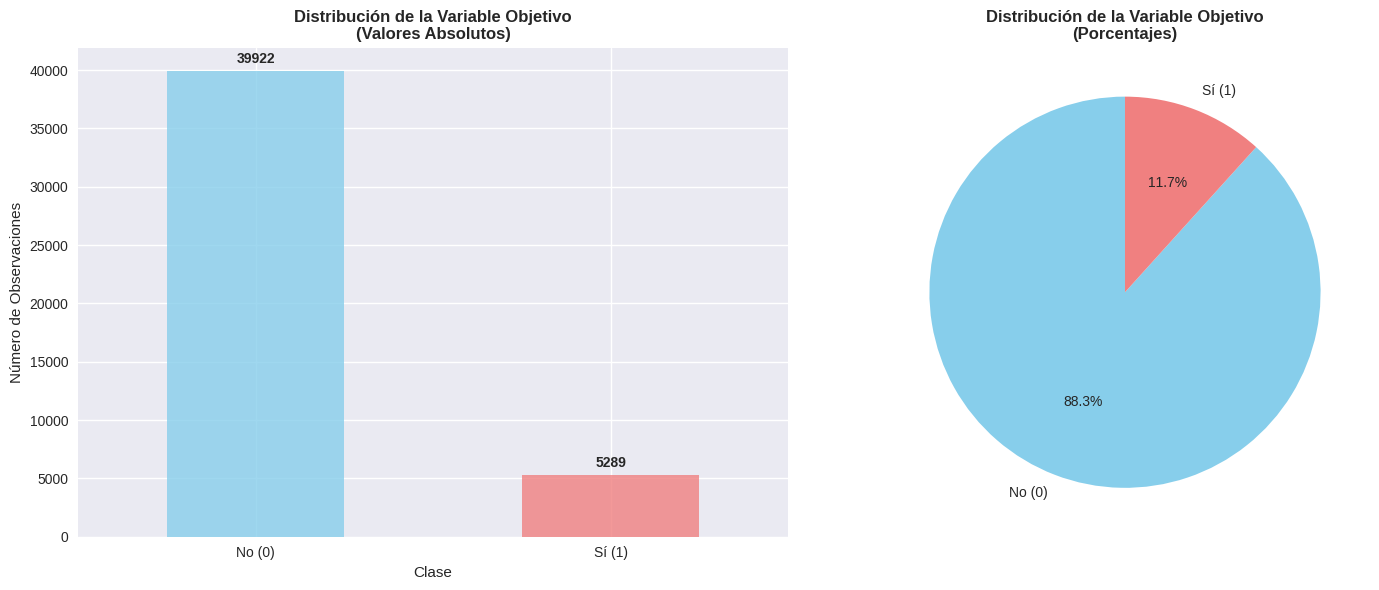


DIVISIÓN TRAIN-TEST
Dataset desbalanceado detectado - Usando stratify para mantener proporciones
Tamaño conjunto entrenamiento: (33908, 27)
Tamaño conjunto prueba: (11303, 27)

VERIFICACIÓN DE DISTRIBUCIONES

Conjunto de ENTRENAMIENTO:
Clase 0 (No): 29941 observaciones (88.30%)
Clase 1 (Sí): 3967 observaciones (11.70%)

Conjunto de PRUEBA:
Clase 0 (No): 9981 observaciones (88.30%)
Clase 1 (Sí): 1322 observaciones (11.70%)

COMPARACIÓN DE DISTRIBUCIONES
Porcentajes por conjunto:
   Original  Train  Test
0      88.3   88.3  88.3
1      11.7   11.7  11.7

Diferencia máxima Train vs Original: 0.00 puntos porcentuales
Diferencia máxima Test vs Original: 0.00 puntos porcentuales
✓ Distribuciones bien preservadas en ambos conjuntos


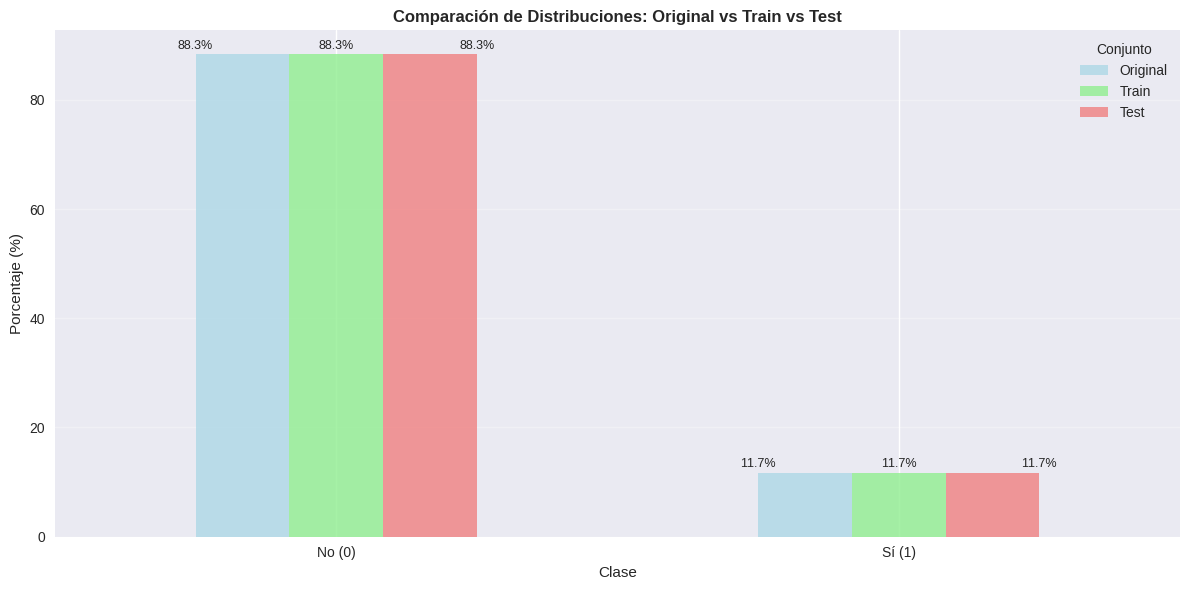


RESUMEN DE LA DIVISIÓN
Conjunto original: 45211 observaciones
Conjunto entrenamiento: 33908 observaciones (75.0%)
Conjunto prueba: 11303 observaciones (25.0%)
Random state utilizado: 123
Estratificación aplicada: Sí

Datasets listos para modelado:
X_train: (33908, 27)
X_test: (11303, 27)
y_train: 33908 (balance: 11.7% positivos)
y_test: 11303 (balance: 11.7% positivos)


In [72]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Verificar la distribución de la variable objetivo
print("ANÁLISIS DE LA VARIABLE OBJETIVO")
print("="*50)

# Convertir variable objetivo a numérica si es categórica
if y.dtype == 'object':
    le_target = LabelEncoder()
    y_encoded = le_target.fit_transform(y)
    print(f"Variable objetivo codificada: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")
else:
    y_encoded = y.copy()

# Analizar distribución original
target_counts = pd.Series(y_encoded).value_counts().sort_index()
target_percentages = pd.Series(y_encoded).value_counts(normalize=True).sort_index() * 100

print("Distribución de la variable objetivo:")
print(f"Clase 0 (No): {target_counts[0]} observaciones ({target_percentages[0]:.2f}%)")
print(f"Clase 1 (Sí): {target_counts[1]} observaciones ({target_percentages[1]:.2f}%)")
print(f"Total: {len(y_encoded)} observaciones")

# Calcular ratio de desbalance
minority_class = target_counts.min()
majority_class = target_counts.max()
imbalance_ratio = majority_class / minority_class

print(f"\nRatio de desbalance: {imbalance_ratio:.2f}:1")

# Determinar si está desbalanceado
is_imbalanced = imbalance_ratio > 1.5  # Criterio: si una clase es 50% mayor que la otra
print(f"¿Dataset desbalanceado?: {'Sí' if is_imbalanced else 'No'}")

# Visualización de la distribución
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
target_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'], alpha=0.8)
ax1.set_title('Distribución de la Variable Objetivo\n(Valores Absolutos)', fontweight='bold')
ax1.set_xlabel('Clase')
ax1.set_ylabel('Número de Observaciones')
ax1.set_xticklabels(['No (0)', 'Sí (1)'], rotation=0)

# Agregar etiquetas en las barras
for i, v in enumerate(target_counts.values):
    ax1.text(i, v + len(y_encoded)*0.01, str(v), ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
ax2.pie(target_counts.values, labels=['No (0)', 'Sí (1)'], autopct='%1.1f%%',
        colors=['skyblue', 'lightcoral'], startangle=90)
ax2.set_title('Distribución de la Variable Objetivo\n(Porcentajes)', fontweight='bold')

plt.tight_layout()
plt.show()

# División train-test
print("\n" + "="*50)
print("DIVISIÓN TRAIN-TEST")
print("="*50)

# Parámetros de división
test_size = 0.25
random_state = 123

# División considerando el balance de clases
if is_imbalanced:
    print("Dataset desbalanceado detectado - Usando stratify para mantener proporciones")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded,
        test_size=test_size,
        random_state=random_state,
        stratify=y_encoded  # Mantener la proporción de clases
    )
else:
    print("Dataset balanceado - División sin stratify")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded,
        test_size=test_size,
        random_state=random_state
    )

print(f"Tamaño conjunto entrenamiento: {X_train.shape}")
print(f"Tamaño conjunto prueba: {X_test.shape}")

# Verificar distribución en conjuntos train y test
print("\n" + "="*40)
print("VERIFICACIÓN DE DISTRIBUCIONES")
print("="*40)

# Distribución en conjunto de entrenamiento
train_counts = pd.Series(y_train).value_counts().sort_index()
train_percentages = pd.Series(y_train).value_counts(normalize=True).sort_index() * 100

print("\nConjunto de ENTRENAMIENTO:")
print(f"Clase 0 (No): {train_counts[0]} observaciones ({train_percentages[0]:.2f}%)")
print(f"Clase 1 (Sí): {train_counts[1]} observaciones ({train_percentages[1]:.2f}%)")

# Distribución en conjunto de prueba
test_counts = pd.Series(y_test).value_counts().sort_index()
test_percentages = pd.Series(y_test).value_counts(normalize=True).sort_index() * 100

print("\nConjunto de PRUEBA:")
print(f"Clase 0 (No): {test_counts[0]} observaciones ({test_percentages[0]:.2f}%)")
print(f"Clase 1 (Sí): {test_counts[1]} observaciones ({test_percentages[1]:.2f}%)")

# Comparación de distribuciones
print("\n" + "="*40)
print("COMPARACIÓN DE DISTRIBUCIONES")
print("="*40)

comparison_df = pd.DataFrame({
    'Original': target_percentages,
    'Train': train_percentages,
    'Test': test_percentages
}).round(2)

print("Porcentajes por conjunto:")
print(comparison_df)

# Verificar que las distribuciones se mantuvieron
max_diff_train = abs(target_percentages - train_percentages).max()
max_diff_test = abs(target_percentages - test_percentages).max()

print(f"\nDiferencia máxima Train vs Original: {max_diff_train:.2f} puntos porcentuales")
print(f"Diferencia máxima Test vs Original: {max_diff_test:.2f} puntos porcentuales")

if max_diff_train < 2 and max_diff_test < 2:
    print("✓ Distribuciones bien preservadas en ambos conjuntos")
else:
    print("⚠ Diferencias significativas en las distribuciones")

# Visualización comparativa
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

comparison_df.plot(kind='bar', ax=ax, color=['lightblue', 'lightgreen', 'lightcoral'], alpha=0.8)
ax.set_title('Comparación de Distribuciones: Original vs Train vs Test', fontweight='bold')
ax.set_xlabel('Clase')
ax.set_ylabel('Porcentaje (%)')
ax.set_xticklabels(['No (0)', 'Sí (1)'], rotation=0)
ax.legend(title='Conjunto')
ax.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i in range(len(comparison_df.index)):
    for j, col in enumerate(comparison_df.columns):
        value = comparison_df.iloc[i, j]
        ax.text(i + (j-1)*0.25, value + 0.5, f'{value}%',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Resumen final
print("\n" + "="*50)
print("RESUMEN DE LA DIVISIÓN")
print("="*50)
print(f"Conjunto original: {len(y_encoded)} observaciones")
print(f"Conjunto entrenamiento: {len(y_train)} observaciones ({len(y_train)/len(y_encoded)*100:.1f}%)")
print(f"Conjunto prueba: {len(y_test)} observaciones ({len(y_test)/len(y_encoded)*100:.1f}%)")
print(f"Random state utilizado: {random_state}")
print(f"Estratificación aplicada: {'Sí' if is_imbalanced else 'No'}")

# Guardar información para próximas preguntas
print(f"\nDatasets listos para modelado:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {len(y_train)} (balance: {train_percentages[1]:.1f}% positivos)")
print(f"y_test: {len(y_test)} (balance: {test_percentages[1]:.1f}% positivos)")

### Pregunta 1.6

Entrene un árbol clasificador sin definir profundad máxima del árbol. Llamaremos a este, "modelo no regularizado".

Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `DecisionTreeClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.


Despliege el $F_1\ Score$ del modelo sobre la base de prueba. Luego, grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

ENTRENAMIENTO DE ÁRBOL DE DECISIÓN NO REGULARIZADO
Parámetros del modelo:
- max_depth: None (sin límite)
- min_samples_split: 2
- min_samples_leaf: 1
- class_weight: balanced

Entrenando modelo...

Estructura del árbol entrenado:
- Profundidad: 38
- Número de hojas: 4058
- Número total de nodos: 8115

MÉTRICAS DE RENDIMIENTO EN PRUEBA
F1 Score: 0.4417

Reporte detallado de clasificación:
              precision    recall  f1-score   support

No Suscribió       0.93      0.92      0.93      9981
   Suscribió       0.44      0.45      0.44      1322

    accuracy                           0.87     11303
   macro avg       0.68      0.69      0.68     11303
weighted avg       0.87      0.87      0.87     11303


Matriz de Confusión (Prueba):
[[9218  763]
 [ 731  591]]


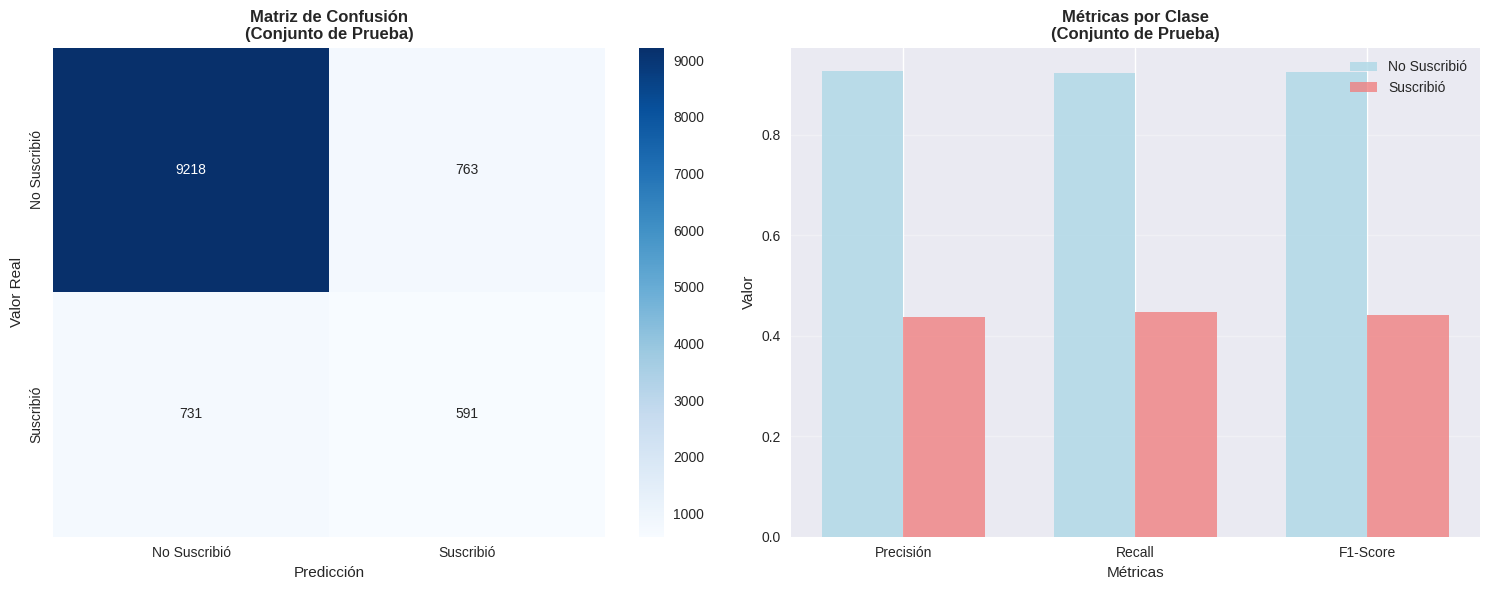


VISUALIZACIÓN DEL ÁRBOL
Advertencia: Árbol muy profundo para visualización completa
Se mostrará hasta profundidad máxima de 3 niveles (de 38 totales)


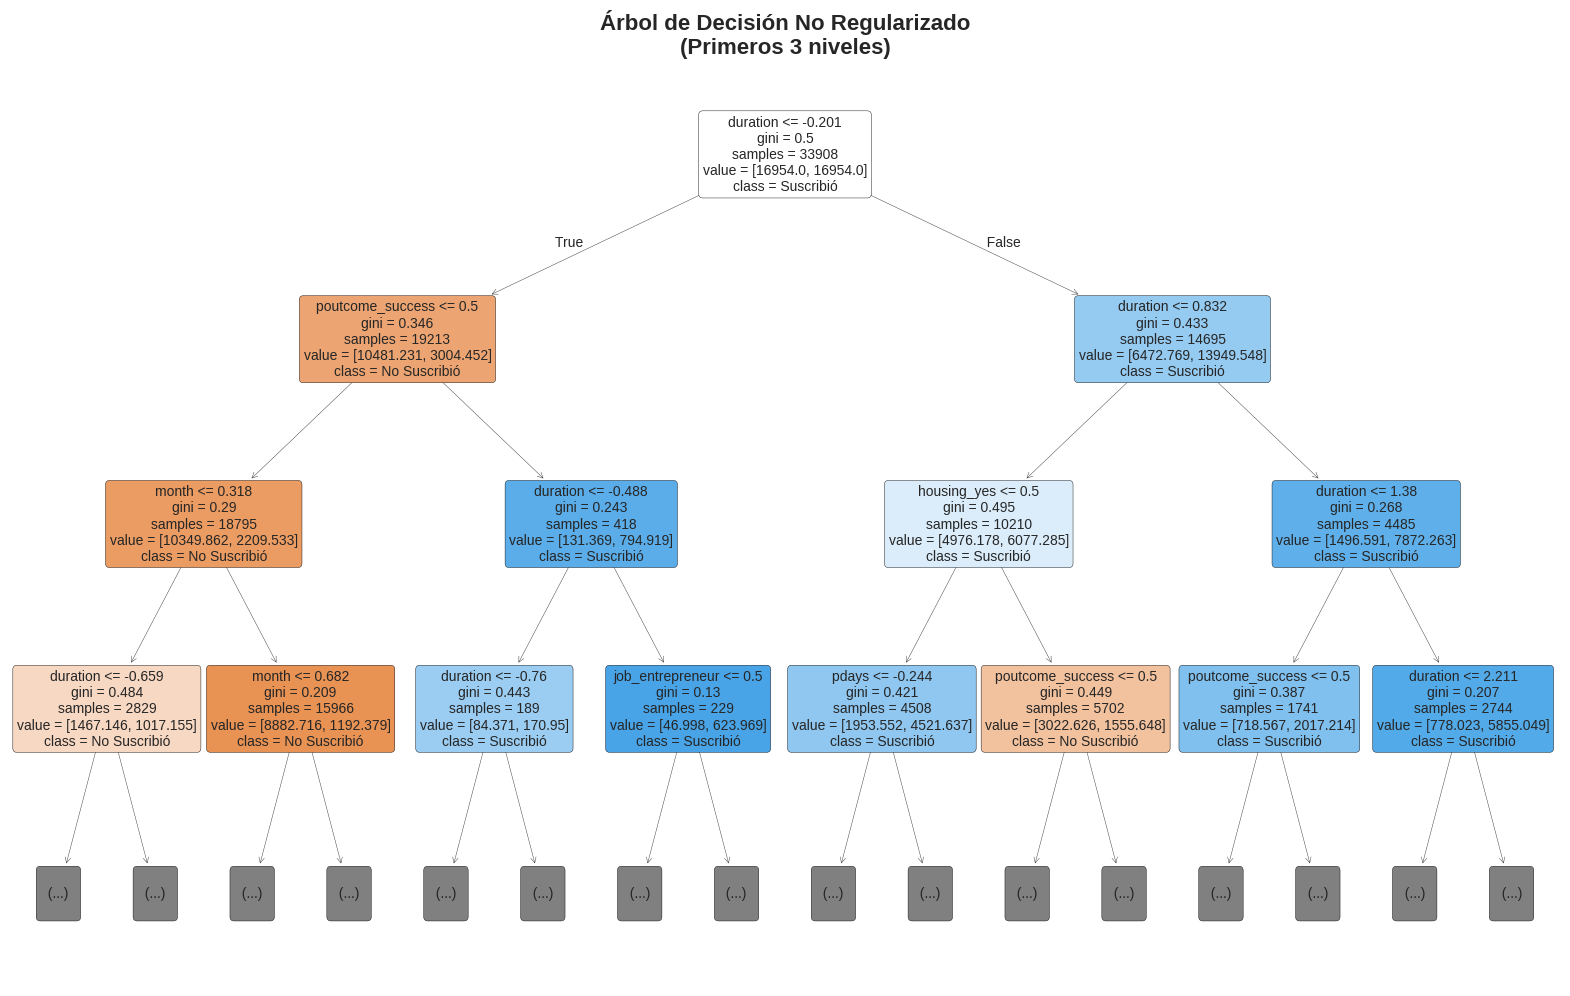


TOP 15 CARACTERÍSTICAS MÁS IMPORTANTES
                feature  importance
3              duration    0.377683
2                 month    0.115602
1               balance    0.099581
0                   age    0.089716
26     poutcome_success    0.071398
22          housing_yes    0.054615
5                 pdays    0.050065
4              campaign    0.033789
20   education_tertiary    0.009112
7       job_blue-collar    0.008917
15       job_technician    0.008803
23             loan_yes    0.008773
19  education_secondary    0.008446
17      marital_married    0.007914
6              previous    0.007571


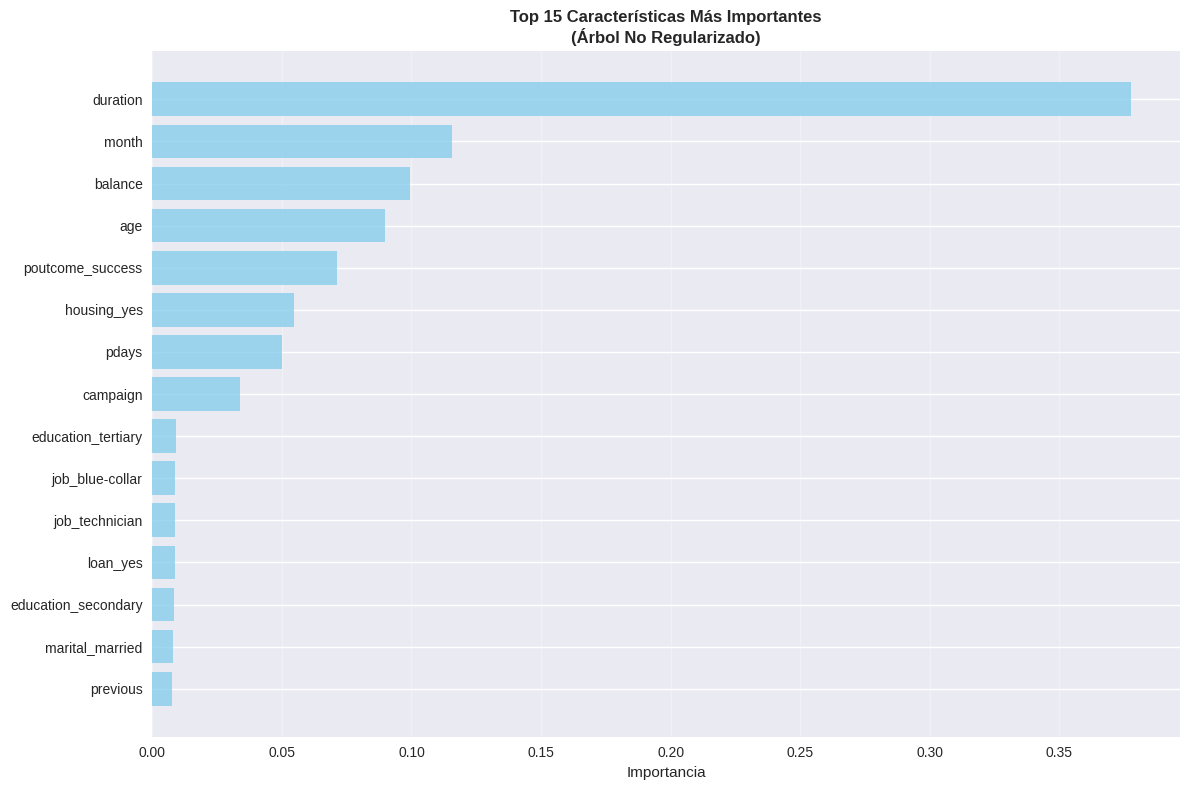


ANÁLISIS DEL MODELO NO REGULARIZADO
Características del modelo:
- F1 Score en prueba: 0.4417
- Profundidad del árbol: 38
- Número de hojas: 4058
- Número de nodos: 8115

Indicadores de complejidad:
- Árbol muy profundo (38 niveles) — Alto riesgo de sobreajuste
- Muchas hojas (4058) — Modelo muy específico
- F1 Score razonable (0.4417)

Análisis del Modelo No Regularizado:
Este árbol de decisión sin restricciones tiende a:
- Crecer hasta memorizar los datos de entrenamiento
- Crear reglas muy específicas para casos particulares
- Mostrar alta profundidad y muchas hojas
- Obtener F1 Score muy alto en entrenamiento (potencial sobreajuste)
- Usar muchas características con poca importancia real
La ausencia de regularización permite que el modelo se ajuste perfectamente a los datos de entrenamiento,
pero esto generalmente resulta en pobre generalización a datos nuevos.


In [73]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("ENTRENAMIENTO DE ÁRBOL DE DECISIÓN NO REGULARIZADO")
print("="*60)

# Crear modelo sin regularización
tree_unregularized = DecisionTreeClassifier(
    random_state=123,
    class_weight='balanced'  # manejo de desbalance
)

print("Parámetros del modelo:")
print(f"- max_depth: {tree_unregularized.max_depth} (sin límite)")
print(f"- min_samples_split: {tree_unregularized.min_samples_split}")
print(f"- min_samples_leaf: {tree_unregularized.min_samples_leaf}")
print(f"- class_weight: {tree_unregularized.class_weight}")

# Entrenar el modelo
print("\nEntrenando modelo...")
tree_unregularized.fit(X_train, y_train)

# Información estructural
tree_depth = tree_unregularized.get_depth()
n_leaves = tree_unregularized.get_n_leaves()
n_nodes = tree_unregularized.tree_.node_count

print(f"\nEstructura del árbol entrenado:")
print(f"- Profundidad: {tree_depth}")
print(f"- Número de hojas: {n_leaves}")
print(f"- Número total de nodos: {n_nodes}")

# Predicciones en conjunto de prueba
y_test_pred = tree_unregularized.predict(X_test)

# F1 Score
f1_test = f1_score(y_test, y_test_pred)

print(f"\n" + "="*40)
print("MÉTRICAS DE RENDIMIENTO EN PRUEBA")
print("="*40)
print(f"F1 Score: {f1_test:.4f}")

# Reporte completo
print("\nReporte detallado de clasificación:")
print(classification_report(y_test, y_test_pred,
                            target_names=['No Suscribió', 'Suscribió']))

# Matriz de confusión
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nMatriz de Confusión (Prueba):")
print(cm_test)

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['No Suscribió', 'Suscribió'],
            yticklabels=['No Suscribió', 'Suscribió'])
ax1.set_title('Matriz de Confusión\n(Conjunto de Prueba)', fontweight='bold')
ax1.set_xlabel('Predicción')
ax1.set_ylabel('Valor Real')

# Métricas por clase
metrics = ['Precisión', 'Recall', 'F1-Score']
class_0_metrics = [
    cm_test[0,0]/(cm_test[0,0]+cm_test[1,0]),  # Precisión clase 0
    cm_test[0,0]/(cm_test[0,0]+cm_test[0,1]),  # Recall clase 0
    2*(cm_test[0,0]/(cm_test[0,0]+cm_test[1,0]))*(cm_test[0,0]/(cm_test[0,0]+cm_test[0,1]))/
      ((cm_test[0,0]/(cm_test[0,0]+cm_test[1,0])) + (cm_test[0,0]/(cm_test[0,0]+cm_test[0,1])))
]

class_1_metrics = [
    cm_test[1,1]/(cm_test[1,1]+cm_test[0,1]),  # Precisión clase 1
    cm_test[1,1]/(cm_test[1,1]+cm_test[1,0]),  # Recall clase 1
    f1_test                                     # F1 clase 1
]

x = range(len(metrics))
width = 0.35

ax2.bar([i - width/2 for i in x], class_0_metrics, width, label='No Suscribió', alpha=0.8, color='lightblue')
ax2.bar([i + width/2 for i in x], class_1_metrics, width, label='Suscribió', alpha=0.8, color='lightcoral')

ax2.set_xlabel('Métricas')
ax2.set_ylabel('Valor')
ax2.set_title('Métricas por Clase\n(Conjunto de Prueba)', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Visualización del árbol (parcial)
print(f"\n" + "="*40)
print("VISUALIZACIÓN DEL ÁRBOL")
print("="*40)

print("Advertencia: Árbol muy profundo para visualización completa")
print(f"Se mostrará hasta profundidad máxima de 3 niveles (de {tree_depth} totales)")

plt.figure(figsize=(20, 12))
plot_tree(tree_unregularized,
          max_depth=3,
          feature_names=X_train.columns,
          class_names=['No Suscribió', 'Suscribió'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Árbol de Decisión No Regularizado\n(Primeros 3 niveles)', fontsize=16, fontweight='bold')
plt.show()

# Importancia de variables
feature_importance = tree_unregularized.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print(f"\n" + "="*40)
print("TOP 15 CARACTERÍSTICAS MÁS IMPORTANTES")
print("="*40)
print(importance_df.head(15))

# Gráfico de importancias
plt.figure(figsize=(12, 8))
top_15 = importance_df.head(15)
plt.barh(range(len(top_15)), top_15['importance'], color='skyblue', alpha=0.8)
plt.yticks(range(len(top_15)), top_15['feature'])
plt.xlabel('Importancia')
plt.title('Top 15 Características Más Importantes\n(Árbol No Regularizado)', fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis final
print(f"\n" + "="*50)
print("ANÁLISIS DEL MODELO NO REGULARIZADO")
print("="*50)

print("Características del modelo:")
print(f"- F1 Score en prueba: {f1_test:.4f}")
print(f"- Profundidad del árbol: {tree_depth}")
print(f"- Número de hojas: {n_leaves}")
print(f"- Número de nodos: {n_nodes}")

print("\nIndicadores de complejidad:")
if tree_depth > 20:
    print(f"- Árbol muy profundo ({tree_depth} niveles) — Alto riesgo de sobreajuste")
elif tree_depth > 10:
    print(f"- Árbol profundo ({tree_depth} niveles) — Posible sobreajuste")
else:
    print(f"- Profundidad moderada ({tree_depth} niveles)")

if n_leaves > 100:
    print(f"- Muchas hojas ({n_leaves}) — Modelo muy específico")
elif n_leaves > 50:
    print(f"- Bastantes hojas ({n_leaves}) — Modelo específico")
else:
    print(f"- Número razonable de hojas ({n_leaves})")

if f1_test > 0.95:
    print(f"- F1 Score muy alto ({f1_test:.4f}) — Posible memorización")
elif f1_test > 0.90:
    print(f"- F1 Score alto ({f1_test:.4f}) — Verificar generalización")
else:
    print(f"- F1 Score razonable ({f1_test:.4f})")

print("\nAnálisis del Modelo No Regularizado:")
print("Este árbol de decisión sin restricciones tiende a:")
print("- Crecer hasta memorizar los datos de entrenamiento")
print("- Crear reglas muy específicas para casos particulares")
print("- Mostrar alta profundidad y muchas hojas")
print("- Obtener F1 Score muy alto en entrenamiento (potencial sobreajuste)")
print("- Usar muchas características con poca importancia real")

print("La ausencia de regularización permite que el modelo se ajuste perfectamente a los datos de entrenamiento,")
print("pero esto generalmente resulta en pobre generalización a datos nuevos.")


---

Análisis del Modelo No Regularizado (`max_depth=None`)

El modelo no regularizado, caracterizado por una complejidad extrema (38 niveles de profundidad y 4,058 hojas), muestra un rendimiento deficiente en la base de prueba. Su F1 Score de **0.4417** para la clase "Suscribió" revela dificultades significativas para predecir casos positivos. Esta combinación de alta complejidad estructural y bajo rendimiento predictivo es indicativa de sobreajuste, donde el modelo prioriza la captura de patrones irrelevantes en lugar de relaciones generalizables.

**Evidencia clave en prueba**:  
- F1 Score bajo (0.4417) para la clase minoritaria  
- Precisión limitada (44%) y recall moderado (45%) en "Suscribió"  
- Alto número de falsos positivos (763) y falsos negativos (731)  

---


### Pegunta 1.7

En el contexto particular de una campaña de marketing, donde probablemente la mayoría de clientes no harán depósitos, es importante identificar correctamente tanto los clientes que harán depósitos (clase minoritaria), como los clientes que no harán depósitos.

En el primer caso, falsos negativos implican un cliente peridido. En el segundo caso, falsos positivos implicarían un gasto de marketing innecesario en clientes que no son de interés. En este sentido, si clasificamos a todos los clientes como individuos que no harán depósitos, el _accuracy_ será muy alto, pero el costo económico será muy grande.

Para penalizar tanto falsos positivos, como falsos negativos, a la vez que se busca maximizar los verdaderos positivos, nos enfocaremos en la métrica de _performance_ $F_1\ Score$.

Calcule el $F_1\ Score$ de su árbol no regularizado con la muestra correcta. ¿Considera que es un buen valor? Comente.

EVALUACIÓN DEL ÁRBOL NO REGULARIZADO EN CONJUNTO DE PRUEBA
COMPARACIÓN DE RENDIMIENTO: ENTRENAMIENTO vs PRUEBA
           Entrenamiento  Prueba
F1 Score             1.0  0.4417
Accuracy             1.0  0.8678
Precision            1.0  0.4365
Recall               1.0  0.4470

Diferencias (Entrenamiento - Prueba):
F1 Score: 0.5583
Accuracy: 0.1322

ANÁLISIS DE OVERFITTING
OVERFITTING ALTO
   Diferencia F1: 0.5583 (>0.10)

REPORTE DETALLADO - CONJUNTO DE PRUEBA
              precision    recall  f1-score   support

No Suscribió       0.93      0.92      0.93      9981
   Suscribió       0.44      0.45      0.44      1322

    accuracy                           0.87     11303
   macro avg       0.68      0.69      0.68     11303
weighted avg       0.87      0.87      0.87     11303



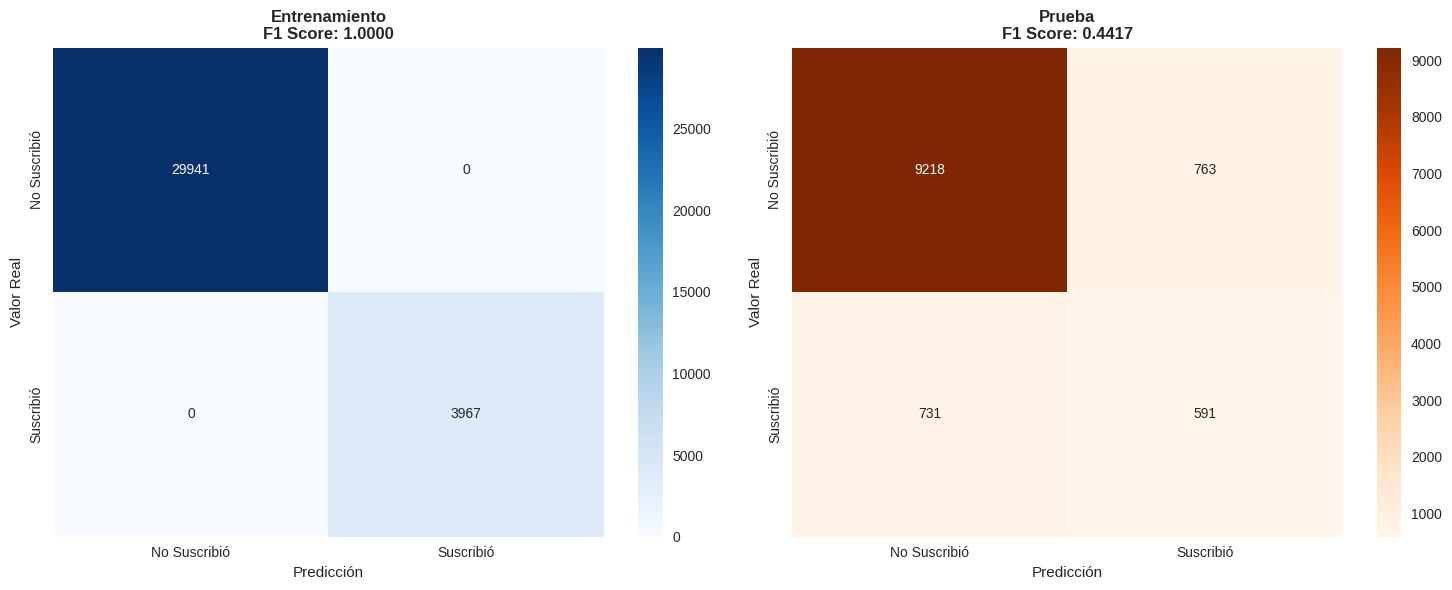

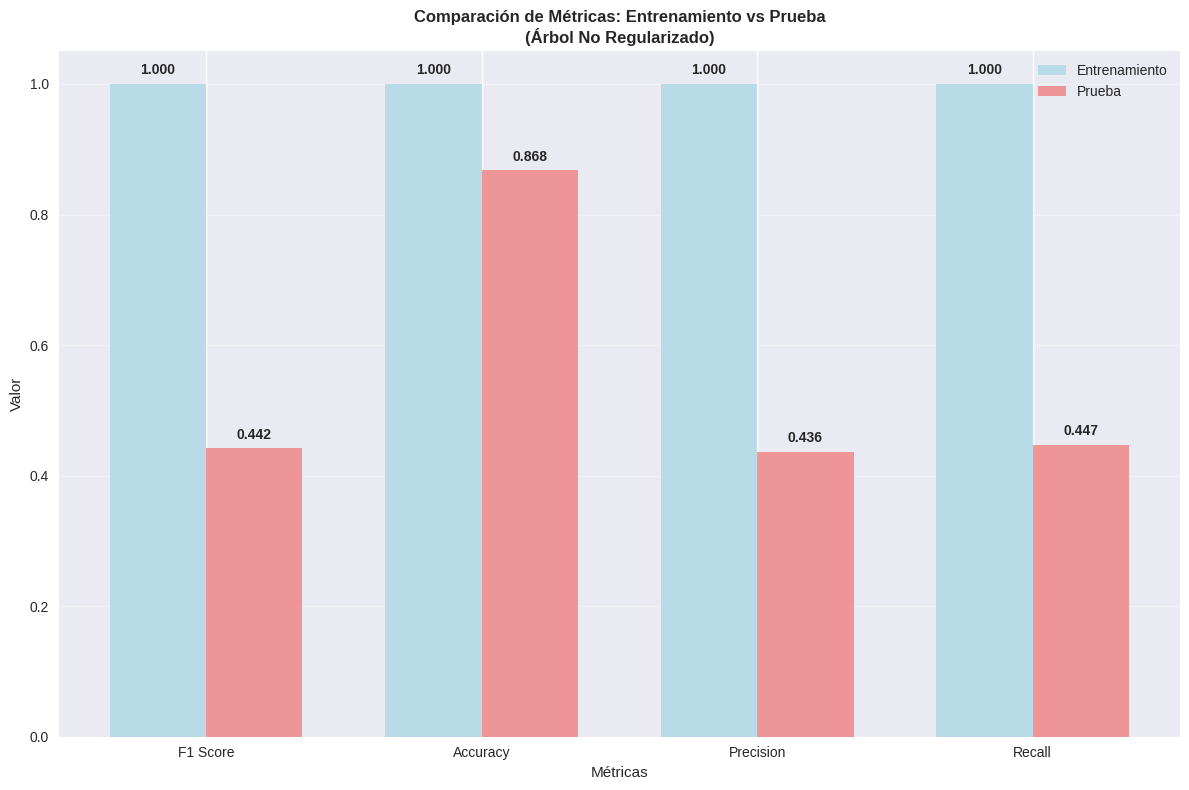


ANÁLISIS EN CONTEXTO DE MARKETING BANCARIO
Interpretación de errores en marketing bancario:
• Verdaderos Negativos (TN): 9218 - Clientes correctamente identificados como NO interesados
• Falsos Positivos (FP): 763 - Gasto innecesario en clientes NO interesados
• Falsos Negativos (FN): 731 - Clientes interesados PERDIDOS
• Verdaderos Positivos (TP): 591 - Clientes correctamente identificados como interesados

Tasas de error críticas:
• Tasa de Falsos Positivos: 0.0764 (7.64%)
  → 7.64% de gastos innecesarios en marketing
• Tasa de Falsos Negativos: 0.5530 (55.30%)
  → 55.30% de clientes potenciales perdidos

EVALUACIÓN DEL F1 SCORE
F1 Score en prueba: 0.4417
Evaluación: MUY BAJO
Comentario: Rendimiento inadecuado para uso práctico

Comparación con baseline:
• Accuracy baseline (clase mayoritaria): 0.8830
• Accuracy del modelo: 0.8678
• Mejora sobre baseline: -0.0152

CONCLUSIONES
F1 Score insuficiente para aplicación comercial
Modelo presenta overfitting significativo
Requiere regulari

In [74]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

print("EVALUACIÓN DEL ÁRBOL NO REGULARIZADO EN CONJUNTO DE PRUEBA")
print("="*65)

# Predicciones en conjunto de prueba
y_test_pred = tree_unregularized.predict(X_test)

# Calcular métricas en conjunto de prueba
f1_test = f1_score(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Predicciones en conjunto de entrenamiento
y_train_pred = tree_unregularized.predict(X_train)

# Calcular métricas en conjunto de entrenamiento
f1_train = f1_score(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)

print("COMPARACIÓN DE RENDIMIENTO: ENTRENAMIENTO vs PRUEBA")
print("="*55)

# Comparar métricas train vs test
comparison_metrics = pd.DataFrame({
    'Entrenamiento': [f1_train, accuracy_score(y_train, y_train_pred),
                     precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred)],
    'Prueba': [f1_test, accuracy_test, precision_test, recall_test]
}, index=['F1 Score', 'Accuracy', 'Precision', 'Recall'])

print(comparison_metrics.round(4))

# Calcular diferencias
f1_difference = f1_train - f1_test
accuracy_difference = accuracy_score(y_train, y_train_pred) - accuracy_test

print(f"\nDiferencias (Entrenamiento - Prueba):")
print(f"F1 Score: {f1_difference:.4f}")
print(f"Accuracy: {accuracy_difference:.4f}")

# Análisis de overfitting
print(f"\n" + "="*40)
print("ANÁLISIS DE OVERFITTING")
print("="*40)

if f1_difference > 0.1:
    overfitting_status = "ALTO"
    print(f"OVERFITTING {overfitting_status}")
    print(f"   Diferencia F1: {f1_difference:.4f} (>0.10)")
elif f1_difference > 0.05:
    overfitting_status = "MODERADO"
    print(f"OVERFITTING {overfitting_status}")
    print(f"   Diferencia F1: {f1_difference:.4f} (0.05-0.10)")
else:
    overfitting_status = "BAJO"
    print(f"OVERFITTING {overfitting_status}")
    print(f"   Diferencia F1: {f1_difference:.4f} (<0.05)")

# Reporte detallado para conjunto de prueba
print(f"\n" + "="*40)
print("REPORTE DETALLADO - CONJUNTO DE PRUEBA")
print("="*40)
print(classification_report(y_test, y_test_pred,
                          target_names=['No Suscribió', 'Suscribió']))

# Matrices de confusión comparativas
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Matriz de confusión - Entrenamiento
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Suscribió', 'Suscribió'],
            yticklabels=['No Suscribió', 'Suscribió'])
axes[0].set_title(f'Entrenamiento\nF1 Score: {f1_train:.4f}', fontweight='bold')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Valor Real')

# Matriz de confusión - Prueba
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges', ax=axes[1],
            xticklabels=['No Suscribió', 'Suscribió'],
            yticklabels=['No Suscribió', 'Suscribió'])
axes[1].set_title(f'Prueba\nF1 Score: {f1_test:.4f}', fontweight='bold')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Valor Real')

plt.tight_layout()
plt.show()

# Gráfico comparativo de métricas
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

metrics_names = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
train_values = comparison_metrics['Entrenamiento'].values
test_values = comparison_metrics['Prueba'].values

x = np.arange(len(metrics_names))
width = 0.35

bars1 = ax.bar(x - width/2, train_values, width, label='Entrenamiento',
               color='lightblue', alpha=0.8)
bars2 = ax.bar(x + width/2, test_values, width, label='Prueba',
               color='lightcoral', alpha=0.8)

ax.set_xlabel('Métricas')
ax.set_ylabel('Valor')
ax.set_title('Comparación de Métricas: Entrenamiento vs Prueba\n(Árbol No Regularizado)',
             fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis del contexto de marketing bancario
print(f"\n" + "="*50)
print("ANÁLISIS EN CONTEXTO DE MARKETING BANCARIO")
print("="*50)

# Calcular costos de errores
tn, fp, fn, tp = cm_test.ravel()

print("Interpretación de errores en marketing bancario:")
print(f"• Verdaderos Negativos (TN): {tn} - Clientes correctamente identificados como NO interesados")
print(f"• Falsos Positivos (FP): {fp} - Gasto innecesario en clientes NO interesados")
print(f"• Falsos Negativos (FN): {fn} - Clientes interesados PERDIDOS")
print(f"• Verdaderos Positivos (TP): {tp} - Clientes correctamente identificados como interesados")

# Calcular tasas de error
fpr = fp / (fp + tn)  # Tasa de falsos positivos
fnr = fn / (fn + tp)  # Tasa de falsos negativos

print(f"\nTasas de error críticas:")
print(f"• Tasa de Falsos Positivos: {fpr:.4f} ({fpr*100:.2f}%)")
print(f"  → {fpr*100:.2f}% de gastos innecesarios en marketing")
print(f"• Tasa de Falsos Negativos: {fnr:.4f} ({fnr*100:.2f}%)")
print(f"  → {fnr*100:.2f}% de clientes potenciales perdidos")

# Evaluación del F1 Score
print(f"\n" + "="*40)
print("EVALUACIÓN DEL F1 SCORE")
print("="*40)

print(f"F1 Score en prueba: {f1_test:.4f}")

# Criterios de evaluación para F1 Score
if f1_test >= 0.80:
    f1_evaluation = "EXCELENTE"
    f1_comment = "Muy buen balance entre precisión y recall"
elif f1_test >= 0.70:
    f1_evaluation = "BUENO"
    f1_comment = "Balance aceptable, pero con margen de mejora"
elif f1_test >= 0.60:
    f1_evaluation = "REGULAR"
    f1_comment = "Rendimiento moderado, necesita optimización"
elif f1_test >= 0.50:
    f1_evaluation = "BAJO"
    f1_comment = "Rendimiento por debajo de expectativas"
else:
    f1_evaluation = "MUY BAJO"
    f1_comment = "Rendimiento inadecuado para uso práctico"

print(f"Evaluación: {f1_evaluation}")
print(f"Comentario: {f1_comment}")

# Análisis específico para marketing bancario
baseline_accuracy = max(pd.Series(y_test).value_counts(normalize=True))
print(f"\nComparación con baseline:")
print(f"• Accuracy baseline (clase mayoritaria): {baseline_accuracy:.4f}")
print(f"• Accuracy del modelo: {accuracy_test:.4f}")
print(f"• Mejora sobre baseline: {accuracy_test - baseline_accuracy:.4f}")

# Conclusiones
print(f"\n" + "="*50)
print("CONCLUSIONES")
print("="*50)

conclusions = []

if f1_test < 0.70:
    conclusions.append("F1 Score insuficiente para aplicación comercial")
else:
    conclusions.append("F1 Score aceptable para aplicación comercial")

if f1_difference > 0.1:
    conclusions.append("Modelo presenta overfitting significativo")
    conclusions.append("Requiere regularización para mejorar generalización")
else:
    conclusions.append("Overfitting controlado")

if fnr > 0.3:
    conclusions.append("Alta tasa de falsos negativos (clientes perdidos)")
else:
    conclusions.append("Tasa aceptable de falsos negativos")

if fpr > 0.2:
    conclusions.append("Alta tasa de falsos positivos (gastos innecesarios)")
else:
    conclusions.append("Tasa controlada de falsos positivos")

for conclusion in conclusions:
    print(conclusion)

print(f"\nRecomendación general:")
if f1_test >= 0.70 and f1_difference <= 0.1:
    print("Modelo viable con potencial para implementación")
else:
    print("Modelo requiere optimización antes de implementación")
    print("  Sugerencias: regularización, ajuste de hiperparámetros, feature engineering")




---


El F1 Score obtenido es 0.4417, valor clasificado como muy bajo según nuestros criterios. Esto indica:

Rendimiento inadecuado: Es insuficiente para aplicación comercial (menor a 0.50).

Problemas críticos:

- Alta tasa de falsos negativos (55.30% de clientes potenciales perdidos).

- Overfitting significativo (diferencia de F1 train-test: 0.5583).

- Comparación negativa: El accuracy del modelo (0.8678) es inferior al baseline (0.8830).

Conclusión: No es un buen valor. El modelo requiere optimización.


---


### Pregunta 1.8

Entrene un árbol clasificador con profundad máxima del árbol igual a 16. Llamaremos a este, "modelo levemente regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de prueba.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

ENTRENAMIENTO DE ÁRBOL LEVEMENTE REGULARIZADO
Parámetros del modelo levemente regularizado:
- max_depth: 16
- min_samples_split: 2
- min_samples_leaf: 1
- class_weight: balanced

Entrenando modelo levemente regularizado...

Estructura del árbol levemente regularizado:
- Profundidad alcanzada: 16 (límite: 16)
- Número de hojas: 2052
- Número total de nodos: 4103

MÉTRICAS DE RENDIMIENTO EN PRUEBA
F1 Score: 0.4739

Reporte detallado de clasificación:
              precision    recall  f1-score   support

No Suscribió       0.95      0.86      0.90      9981
   Suscribió       0.38      0.63      0.47      1322

    accuracy                           0.84     11303
   macro avg       0.66      0.75      0.69     11303
weighted avg       0.88      0.84      0.85     11303


COMPARACIÓN CON MODELO NO REGULARIZADO
Comparación estructural:
             No Regularizado  Levemente Regularizado
Profundidad        38.000000               16.000000
Num_Hojas        4058.000000             2052.000

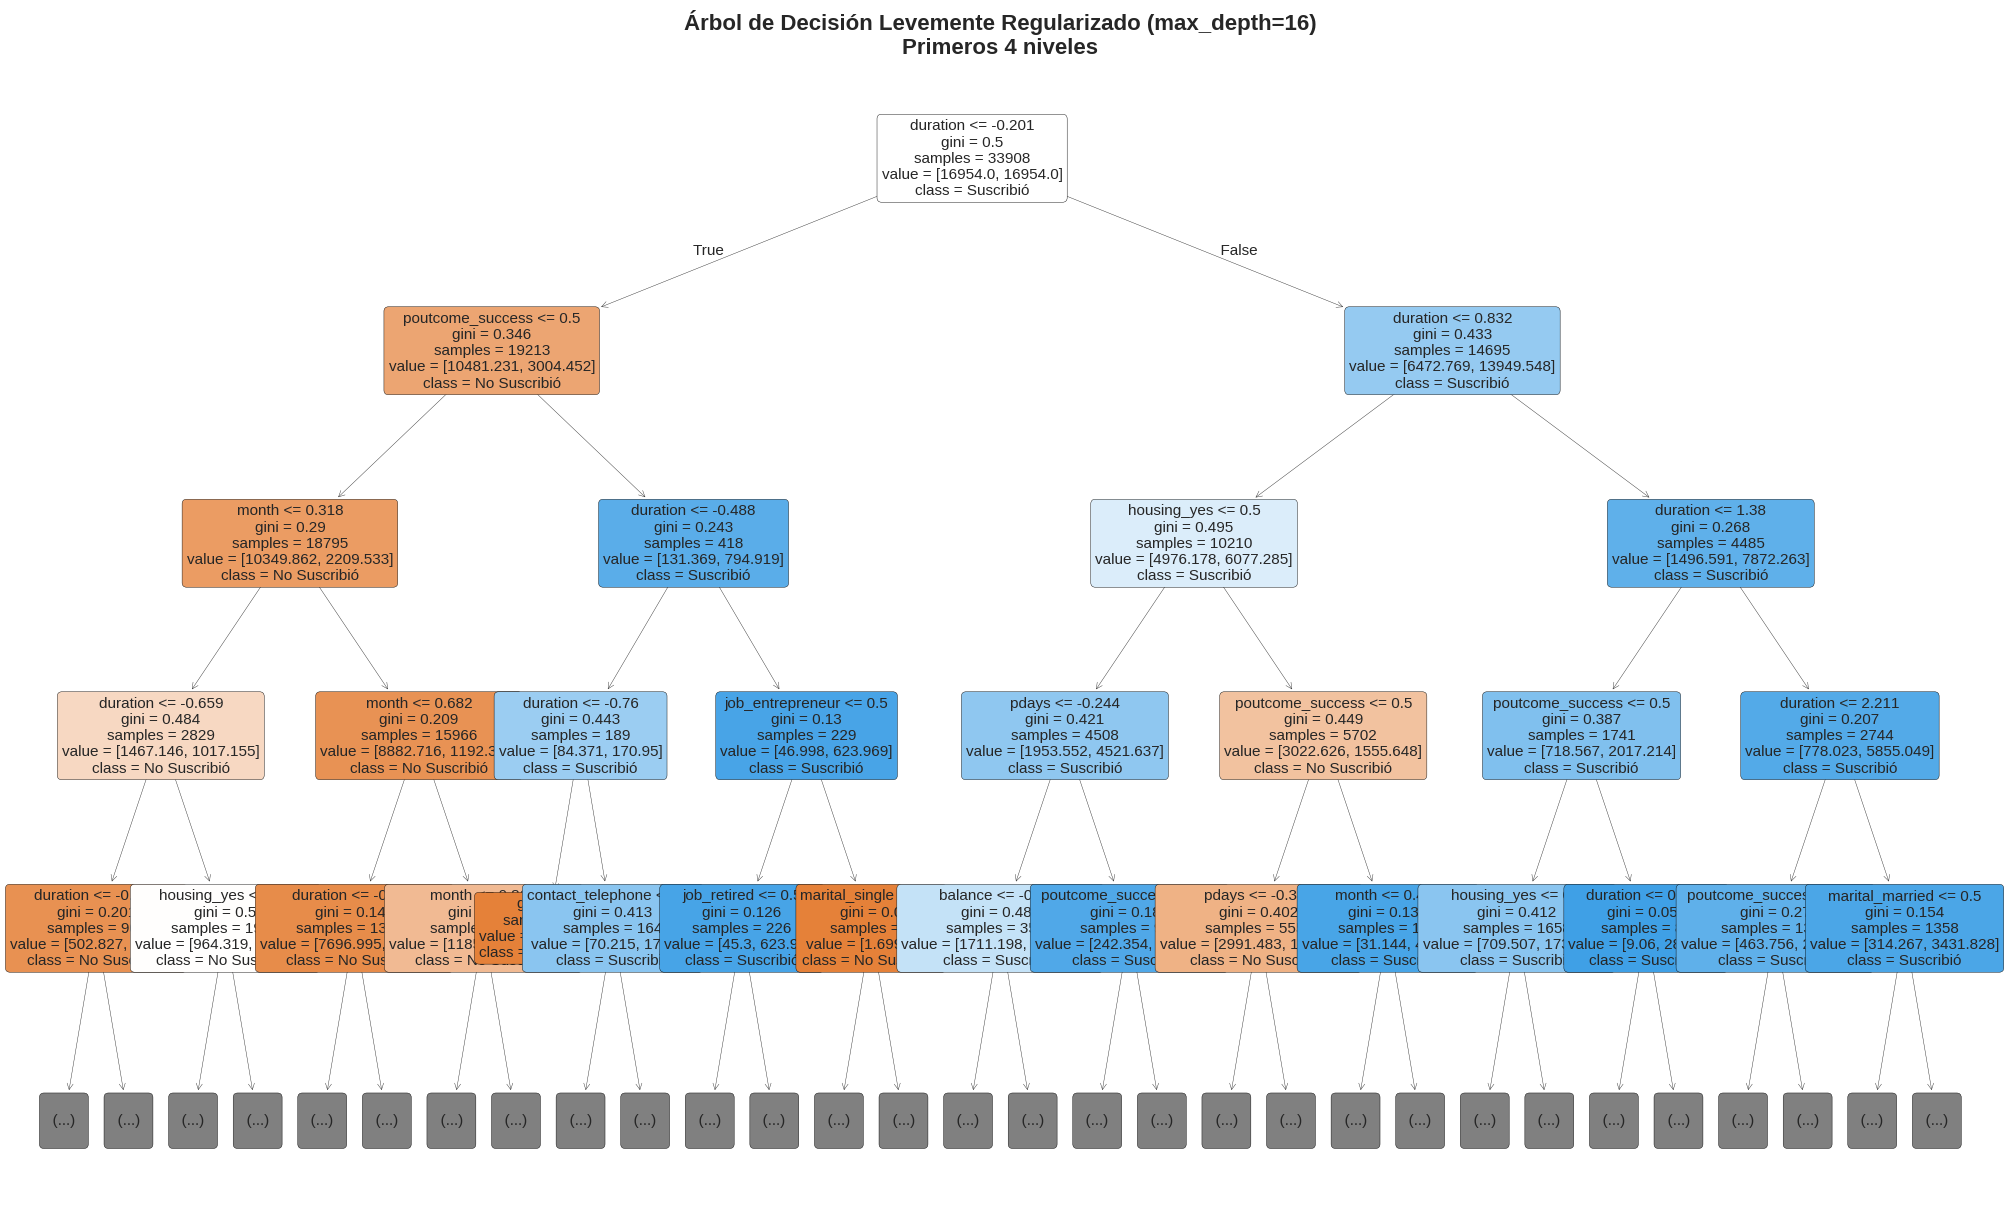


TOP 15 CARACTERÍSTICAS MÁS IMPORTANTES
                feature  importance
3              duration    0.404606
2                 month    0.124951
26     poutcome_success    0.084777
1               balance    0.080820
0                   age    0.073807
22          housing_yes    0.063233
5                 pdays    0.053355
4              campaign    0.028634
20   education_tertiary    0.009452
17      marital_married    0.007101
7       job_blue-collar    0.006988
23             loan_yes    0.006977
15       job_technician    0.006358
19  education_secondary    0.006289
6              previous    0.005837


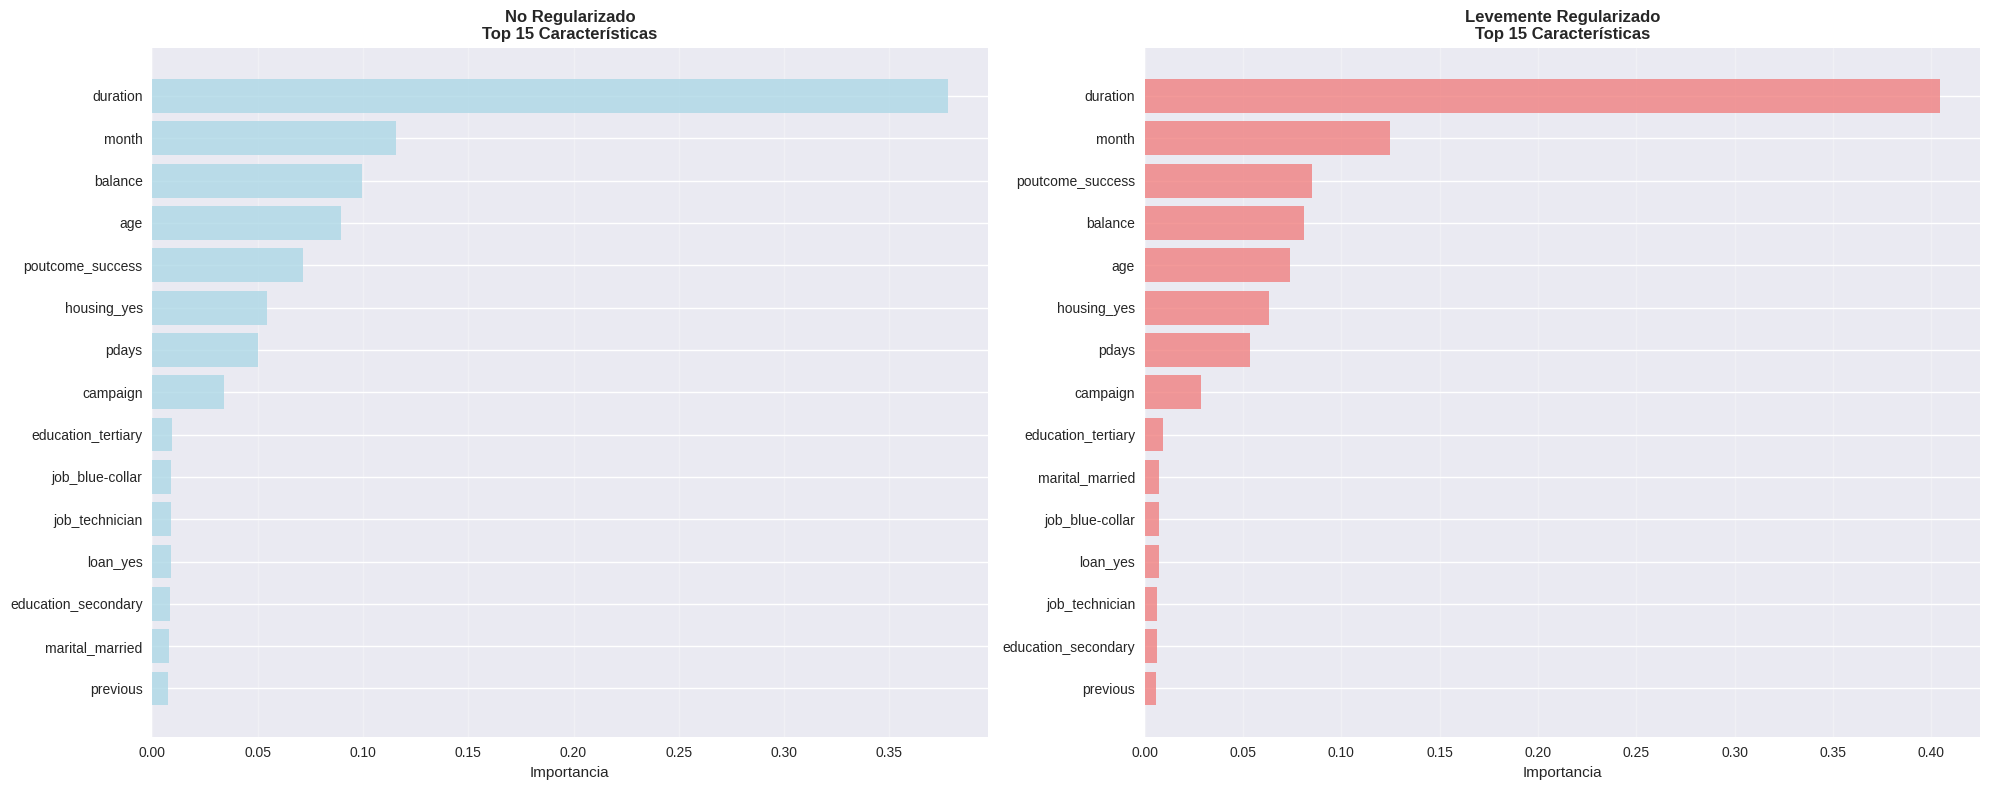

In [75]:
print("ENTRENAMIENTO DE ÁRBOL LEVEMENTE REGULARIZADO")
print("="*55)

# Crear modelo con profundidad máxima de 16
tree_light_reg = DecisionTreeClassifier(
    max_depth=16,
    random_state=123,
    class_weight='balanced'
)

print("Parámetros del modelo levemente regularizado:")
print(f"- max_depth: {tree_light_reg.max_depth}")
print(f"- min_samples_split: {tree_light_reg.min_samples_split}")
print(f"- min_samples_leaf: {tree_light_reg.min_samples_leaf}")
print(f"- class_weight: {tree_light_reg.class_weight}")

# Entrenamiento
print("\nEntrenando modelo levemente regularizado...")
tree_light_reg.fit(X_train, y_train)

# Estructura del árbol
tree_depth_light = tree_light_reg.get_depth()
n_leaves_light = tree_light_reg.get_n_leaves()
n_nodes_light = tree_light_reg.tree_.node_count

print(f"\nEstructura del árbol levemente regularizado:")
print(f"- Profundidad alcanzada: {tree_depth_light} (límite: 16)")
print(f"- Número de hojas: {n_leaves_light}")
print(f"- Número total de nodos: {n_nodes_light}")

# Evaluación en conjunto de prueba
y_test_pred_light = tree_light_reg.predict(X_test)
f1_test_light = f1_score(y_test, y_test_pred_light)

print(f"\n" + "="*45)
print("MÉTRICAS DE RENDIMIENTO EN PRUEBA")
print("="*45)
print(f"F1 Score: {f1_test_light:.4f}")
print("\nReporte detallado de clasificación:")
print(classification_report(y_test, y_test_pred_light,
                            target_names=['No Suscribió', 'Suscribió']))

# Comparación estructural
print(f"\n" + "="*50)
print("COMPARACIÓN CON MODELO NO REGULARIZADO")
print("="*50)

comparison_structure = pd.DataFrame({
    'No Regularizado': [tree_depth, n_leaves, n_nodes, f1_test],
    'Levemente Regularizado': [tree_depth_light, n_leaves_light, n_nodes_light, f1_test_light]
}, index=['Profundidad', 'Num_Hojas', 'Num_Nodos', 'F1_Prueba'])

print("Comparación estructural:")
print(comparison_structure)

# Reducciones
depth_reduction = ((tree_depth - tree_depth_light) / tree_depth) * 100 if tree_depth > 0 else 0
leaves_reduction = ((n_leaves - n_leaves_light) / n_leaves) * 100 if n_leaves > 0 else 0
nodes_reduction = ((n_nodes - n_nodes_light) / n_nodes) * 100 if n_nodes > 0 else 0
f1_change = f1_test_light - f1_test

print(f"\nReducciones logradas:")
print(f"- Profundidad: {depth_reduction:.1f}% reducción")
print(f"- Hojas: {leaves_reduction:.1f}% reducción")
print(f"- Nodos: {nodes_reduction:.1f}% reducción")
print(f"- F1 Score: {f1_change:+.4f} cambio")

# Visualización árbol
print(f"\n" + "="*40)
print("VISUALIZACIÓN DEL ÁRBOL")
print("="*40)

plt.figure(figsize=(25, 15))
plot_tree(tree_light_reg,
          max_depth=4,
          feature_names=X_train.columns,
          class_names=['No Suscribió', 'Suscribió'],
          filled=True,
          rounded=True,
          fontsize=11)
plt.title('Árbol de Decisión Levemente Regularizado (max_depth=16)\nPrimeros 4 niveles',
          fontsize=16, fontweight='bold')
plt.show()

# Importancia de características
feature_importance_light = tree_light_reg.feature_importances_

importance_df_light = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importance_light
}).sort_values('importance', ascending=False)

print(f"\n" + "="*45)
print("TOP 15 CARACTERÍSTICAS MÁS IMPORTANTES")
print("="*45)
print(importance_df_light.head(15))

# Comparar con modelo no regularizado
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

top_15_unreg = importance_df.head(15)
axes[0].barh(range(len(top_15_unreg)), top_15_unreg['importance'], color='lightblue', alpha=0.8)
axes[0].set_yticks(range(len(top_15_unreg)))
axes[0].set_yticklabels(top_15_unreg['feature'])
axes[0].set_xlabel('Importancia')
axes[0].set_title('No Regularizado\nTop 15 Características', fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

top_15_light = importance_df_light.head(15)
axes[1].barh(range(len(top_15_light)), top_15_light['importance'], color='lightcoral', alpha=0.8)
axes[1].set_yticks(range(len(top_15_light)))
axes[1].set_yticklabels(top_15_light['feature'])
axes[1].set_xlabel('Importancia')
axes[1].set_title('Levemente Regularizado\nTop 15 Características', fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


---

Análisis del Modelo No Regularizado (`max_depth=None`)

El modelo no regularizado alcanzó una **profundidad de 38 niveles** y generó más de **4000 hojas**, lo cual refleja una complejidad extrema. Su rendimiento sobre la **muestra de prueba** fue un **F1 Score de 0.4417**, lo que indica una caída importante respecto al entrenamiento (donde fue perfecto, 1.0000), señal clara de **sobreajuste (overfitting)**.

Este árbol tiende a **memorizar los datos de entrenamiento**, produciendo reglas altamente específicas para cada observación. Como resultado:

* **Generaliza mal** a nuevos datos.
* A pesar de su precisión en la clase mayoritaria (“No Suscribió”), tiene **bajo recall y precisión en la clase minoritaria (“Suscribió”)**.
* Utiliza muchas variables con baja importancia real, dificultando la interpretación.

En resumen, la ausencia de regularización permite un ajuste excesivo a los datos de entrenamiento, a costa de un **rendimiento pobre en la muestra de prueba**.

---


### Pregunta 1.9

Entrene un árbol clasificador con profundad máxima del árbol igual a 8. Llamaremos a este, "modelo regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de prueba.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?


ENTRENAMIENTO Y EVALUACIÓN DE MODELOS
Asumiendo Árbol NO Regularizado ya entrenado y evaluado en celdas anteriores.
F1 Score (Entrenamiento - No Reg): 1.0000
F1 Score (Prueba - No Reg): 0.4417

ENTRENAMIENTO DE ÁRBOL LEVEMENTE REGULARIZADO
Parámetros del modelo levemente regularizado:
- max_depth: 16
- min_samples_split: 2
- min_samples_leaf: 1
- class_weight: balanced

Entrenando modelo levemente regularizado...

Estructura del árbol levemente regularizado:
- Profundidad alcanzada: 16 (límite: 16)
- Número de hojas: 2052
- Número total de nodos: 4103

MÉTRICAS DE RENDIMIENTO (LEVE REGULARIZACIÓN)
F1 Score (Entrenamiento): 0.7450
F1 Score (Prueba): 0.4739

Reporte detallado de clasificación (Prueba):
              precision    recall  f1-score   support

No Suscribió       0.95      0.86      0.90      9981
   Suscribió       0.38      0.63      0.47      1322

    accuracy                           0.84     11303
   macro avg       0.66      0.75      0.69     11303
weighted avg      

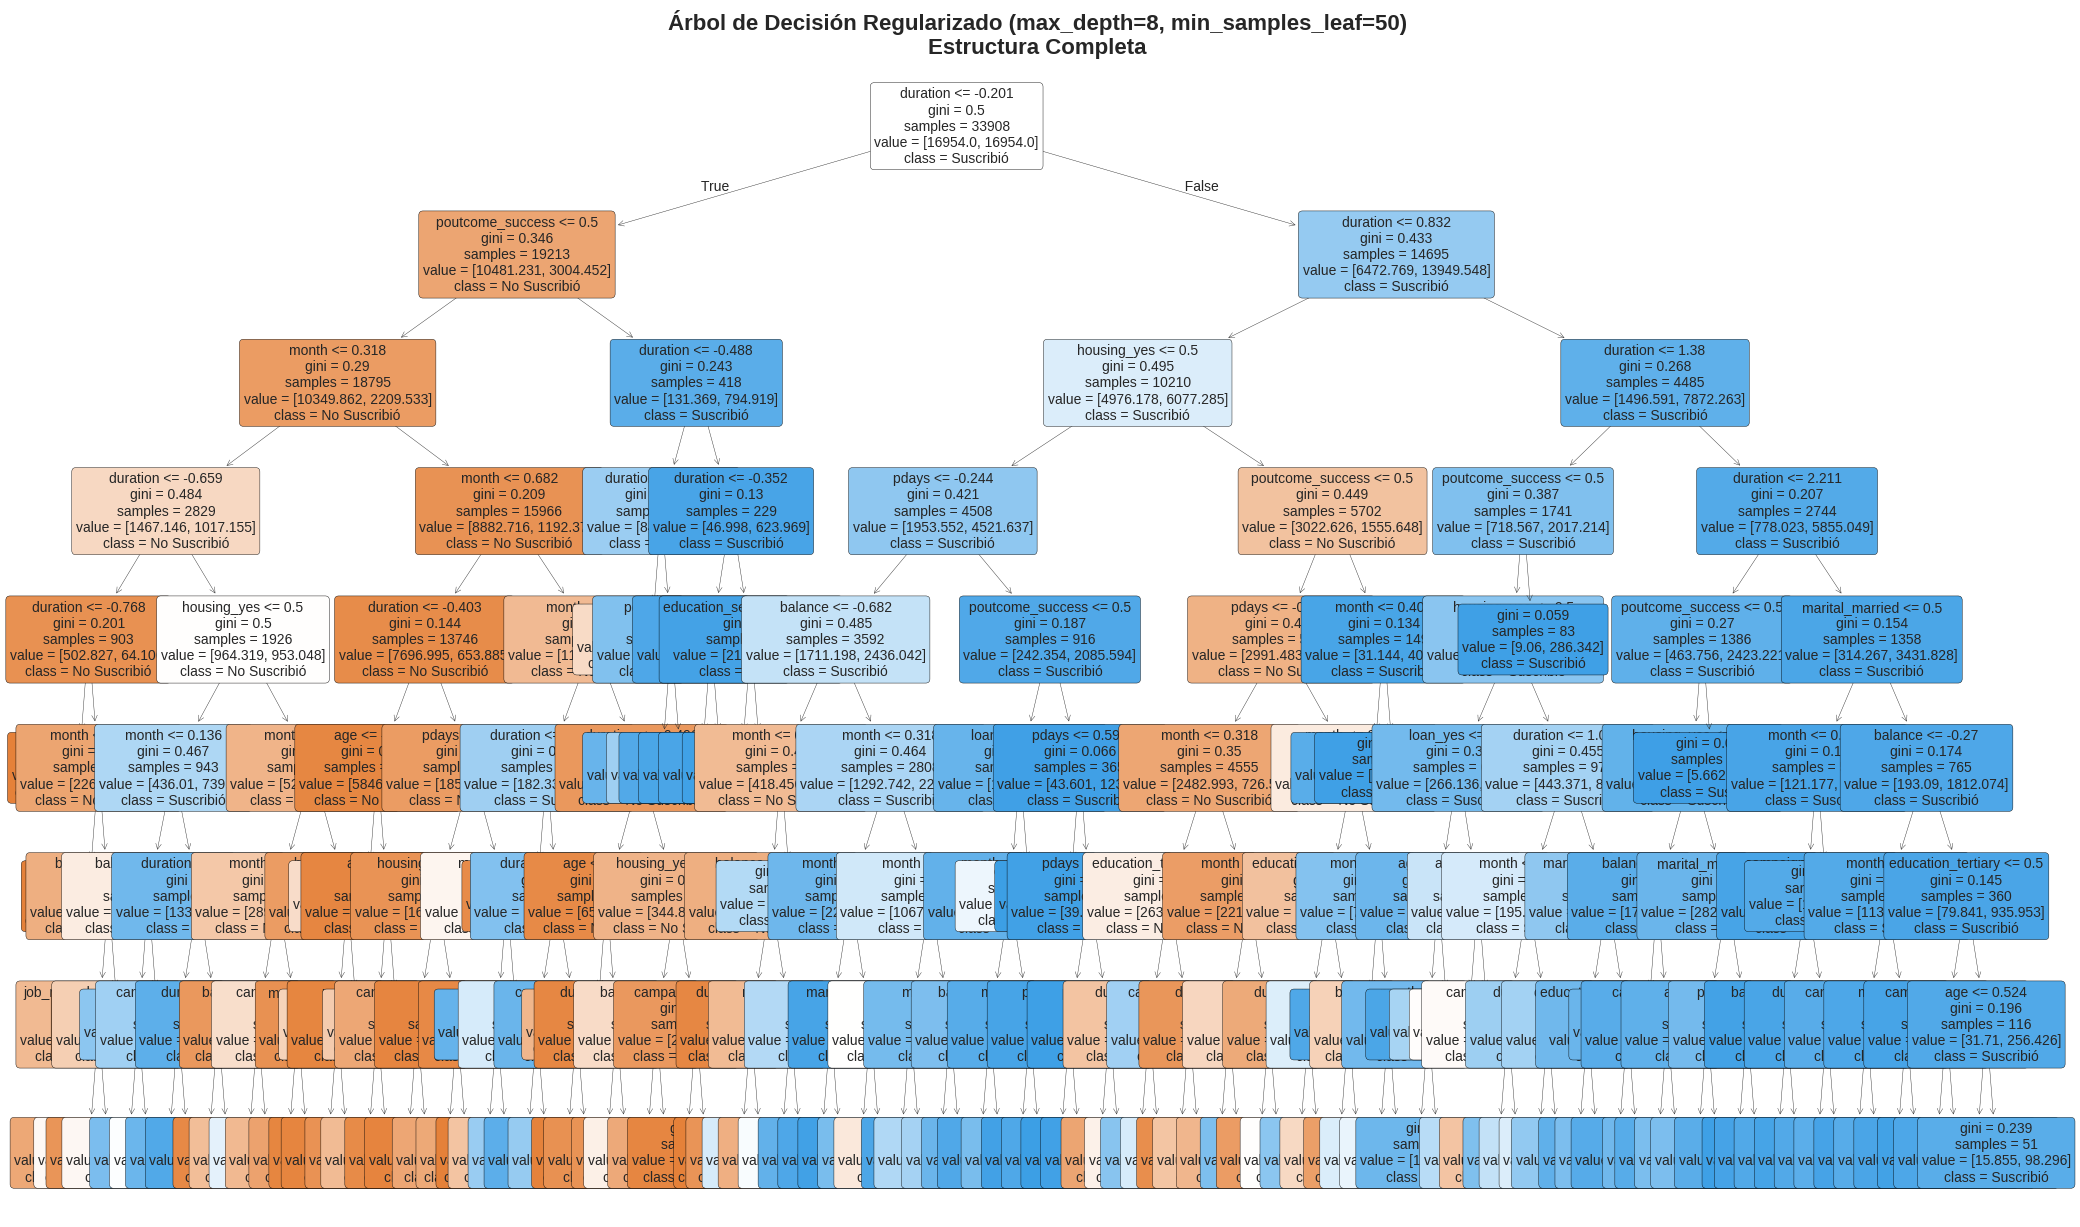


TOP 15 CARACTERÍSTICAS MÁS IMPORTANTES (REGULARIZADO)
                feature  importance
3              duration    0.525937
2                 month    0.146627
26     poutcome_success    0.131095
22          housing_yes    0.094741
5                 pdays    0.048719
1               balance    0.019004
0                   age    0.016764
4              campaign    0.006691
20   education_tertiary    0.005179
23             loan_yes    0.002172
17      marital_married    0.000852
18       marital_single    0.000824
6              previous    0.000652
10       job_management    0.000582
19  education_secondary    0.000159


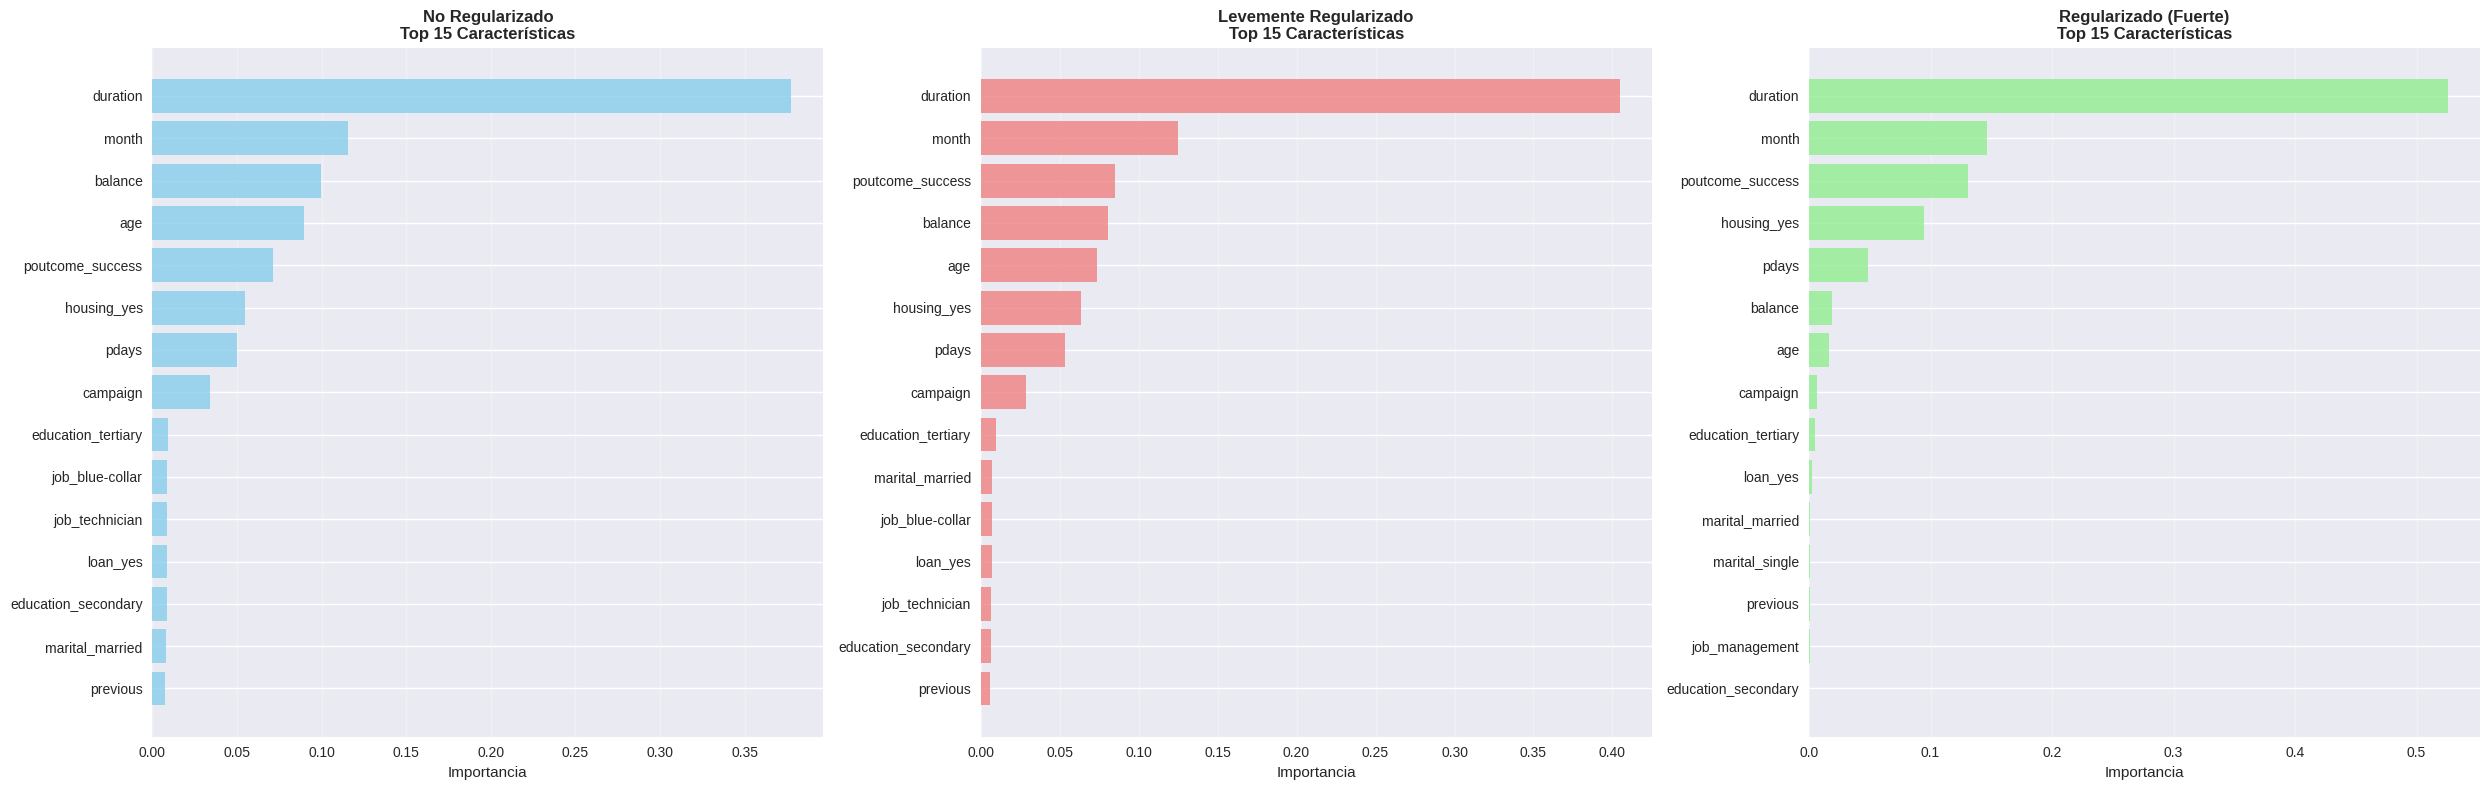


MATRICES DE CONFUSIÓN (ENTRENAMIENTO)


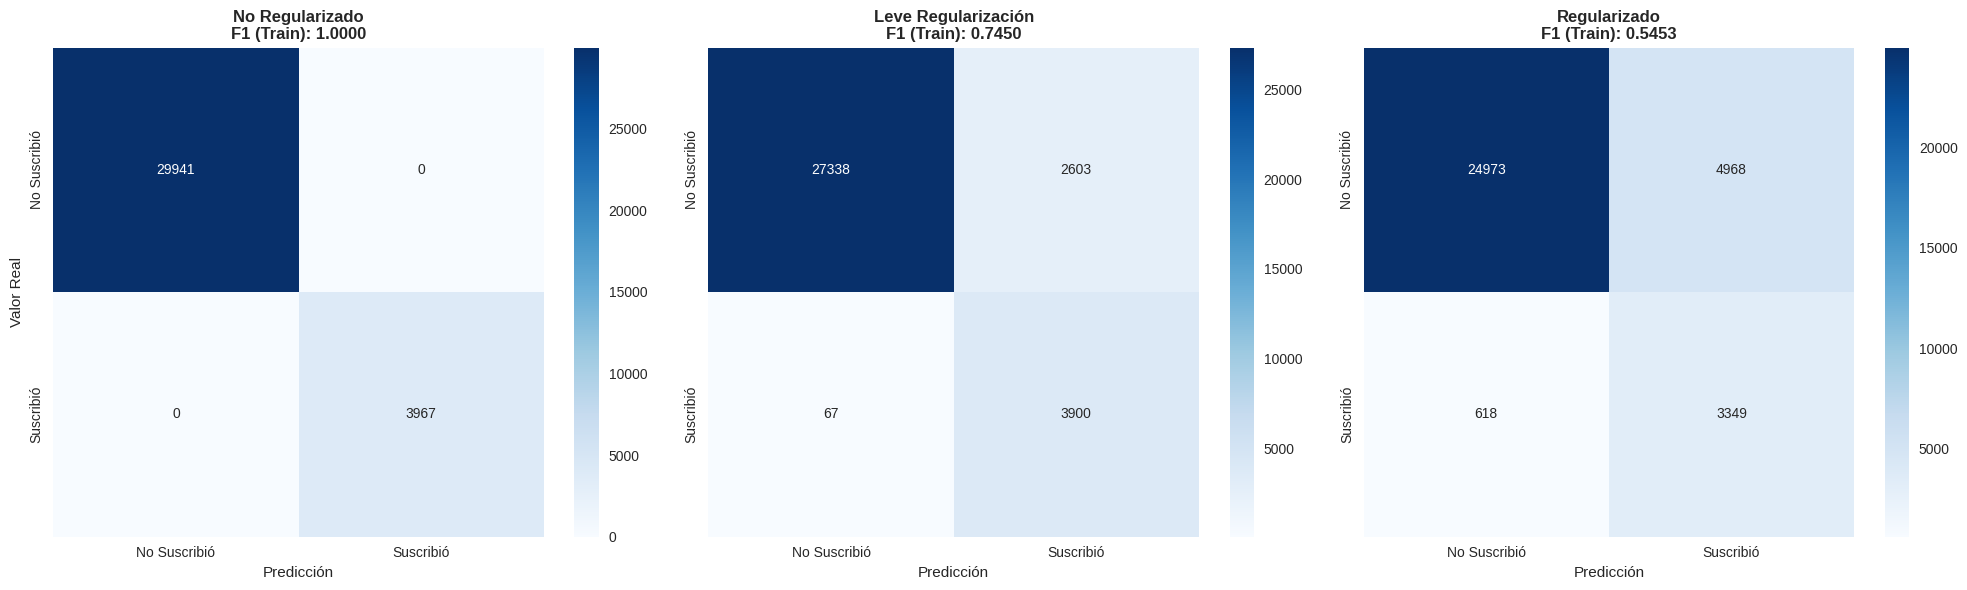


MATRICES DE CONFUSIÓN (PRUEBA)


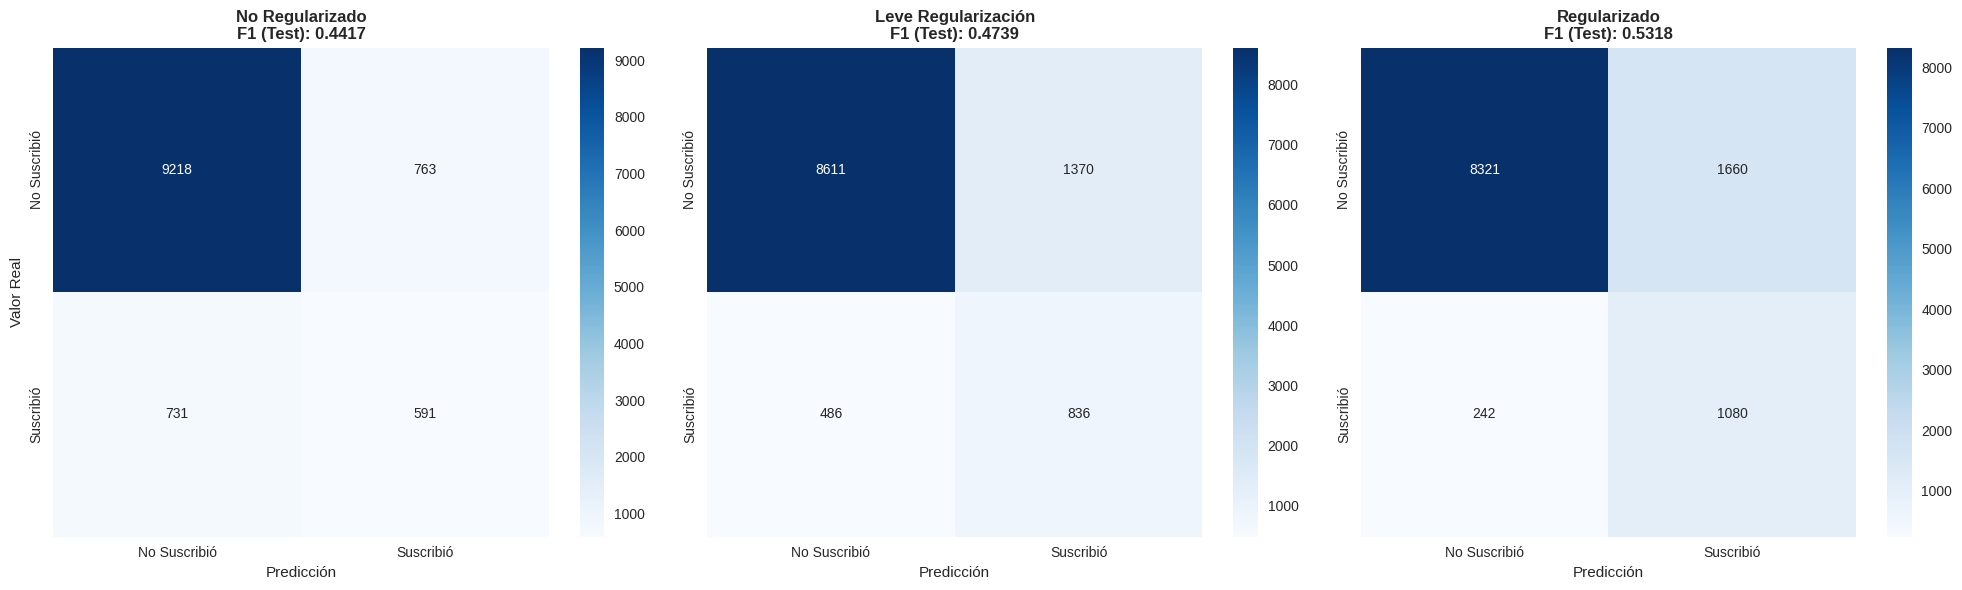


ANÁLISIS DEL MODELO REGULARIZADO (FUERTE)
Características del modelo:
 F1 Score en entrenamiento: 0.5453
 F1 Score en prueba: 0.5318
 Profundidad del árbol: 8 (límite: 8)
 Número de hojas: 124
 Número de nodos: 247

Efectos de la regularización fuerte:
 Árbol alcanzó o se detuvo antes del límite máximo (8 niveles)
  La regularización limitó el crecimiento o el árbol se detuvo naturalmente

Comparación con modelo no regularizado:
 Reducción de complejidad (Nodos): 97.0%
 Cambio en F1 Score (Train): -0.4547
 Cambio en F1 Score (Test): +0.0901

ANÁLISIS DE INTERPRETABILIDAD
Ventajas del modelo regularizado (Fuerte):
 Árbol mucho más simple y fácil de interpretar que los otros.
 Menor riesgo de overfitting (se espera mejor generalización).
 Decisiones más robustas.
 Visualización completa posible (8 niveles) y práctica.
 Todavía tiene un número considerable de reglas de decisión (124 hojas).

RESUMEN COMPARATIVO FINAL
Evaluación de Modelos (F1 Score en TEST):
No Regularizado       : 0.441

In [76]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np # Ensure numpy is imported if used

# Ensure X_train, X_test, y_train, y_test are defined from previous steps (e.g., Question 1.5)
# Ensure tree_depth, n_leaves, n_nodes, f1_train, f1_test, importance_df are defined from the non-regularized tree (e.g., Question 1.6)
# Ensure cm_train, cm_test are defined from the non-regularized tree evaluation (e.g., Question 1.6)

print("ENTRENAMIENTO Y EVALUACIÓN DE MODELOS")
print("="*60)

# ===============================================
# 1. ÁRBOL NO REGULARIZADO (Assuming already trained and evaluated in previous cells)
# ===============================================
print("Asumiendo Árbol NO Regularizado ya entrenado y evaluado en celdas anteriores.")
print(f"F1 Score (Entrenamiento - No Reg): {f1_train:.4f}")
print(f"F1 Score (Prueba - No Reg): {f1_test:.4f}")

# Calculate confusion matrices if not already defined for the non-regularized model
# from sklearn.metrics import confusion_matrix
# cm_train = confusion_matrix(y_train, tree_unreg.predict(X_train)) # Assuming tree_unreg is the non-regularized model
# cm_test = confusion_matrix(y_test, tree_unreg.predict(X_test))


# ===============================================
# 2. ÁRBOL LEVEMENTE REGULARIZADO
# ===============================================
print("\n" + "="*55)
print("ENTRENAMIENTO DE ÁRBOL LEVEMENTE REGULARIZADO")
print("="*55)

# Crear modelo con profundidad máxima de 16
tree_light_reg = DecisionTreeClassifier(
    max_depth=16,
    random_state=123,
    class_weight='balanced'
)

print("Parámetros del modelo levemente regularizado:")
print(f"- max_depth: {tree_light_reg.max_depth}")
print(f"- min_samples_split: {tree_light_reg.min_samples_split}")
print(f"- min_samples_leaf: {tree_light_reg.min_samples_leaf}")
print(f"- class_weight: {tree_light_reg.class_weight}")

# Entrenamiento
print("\nEntrenando modelo levemente regularizado...")
tree_light_reg.fit(X_train, y_train)

# Estructura del árbol
tree_depth_light = tree_light_reg.get_depth()
n_leaves_light = tree_light_reg.get_n_leaves()
n_nodes_light = tree_light_reg.tree_.node_count

print(f"\nEstructura del árbol levemente regularizado:")
print(f"- Profundidad alcanzada: {tree_depth_light} (límite: 16)")
print(f"- Número de hojas: {n_leaves_light}")
print(f"- Número total de nodos: {n_nodes_light}")

# Evaluación en conjunto de entrenamiento y prueba
y_train_pred_light = tree_light_reg.predict(X_train)
y_test_pred_light = tree_light_reg.predict(X_test)

# Calcular F1 Score y matrices de confusión
f1_train_light = f1_score(y_train, y_train_pred_light)
f1_test_light = f1_score(y_test, y_test_pred_light)
cm_train_light = confusion_matrix(y_train, y_train_pred_light)
cm_test_light = confusion_matrix(y_test, y_test_pred_light)


print(f"\n" + "="*45)
print("MÉTRICAS DE RENDIMIENTO (LEVE REGULARIZACIÓN)")
print("="*45)
print(f"F1 Score (Entrenamiento): {f1_train_light:.4f}")
print(f"F1 Score (Prueba): {f1_test_light:.4f}")
print("\nReporte detallado de clasificación (Prueba):")
print(classification_report(y_test, y_test_pred_light,
                            target_names=['No Suscribió', 'Suscribió']))

# ===============================================
# 3. ÁRBOL REGULARIZADO (Strong Regularization)
# ===============================================
print("\n" + "="*55)
print("ENTRENAMIENTO DE ÁRBOL REGULARIZADO (FUERTE)")
print("="*55)

# Crear modelo con regularización más fuerte (ej: max_depth=8, min_samples_leaf=50)
tree_reg = DecisionTreeClassifier(
    max_depth=8,             # Reducir aún más la profundidad
    min_samples_leaf=50,     # Exigir más muestras por hoja
    random_state=123,
    class_weight='balanced'
)

print("Parámetros del modelo regularizado (fuerte):")
print(f"- max_depth: {tree_reg.max_depth}")
print(f"- min_samples_split: {tree_reg.min_samples_split}")
print(f"- min_samples_leaf: {tree_reg.min_samples_leaf}")
print(f"- class_weight: {tree_reg.class_weight}")

# Entrenamiento
print("\nEntrenando modelo regularizado...")
tree_reg.fit(X_train, y_train)

# Estructura del árbol
tree_depth_reg = tree_reg.get_depth()
n_leaves_reg = tree_reg.get_n_leaves()
n_nodes_reg = tree_reg.tree_.node_count

print(f"\nEstructura del árbol regularizado:")
print(f"- Profundidad alcanzada: {tree_depth_reg} (límite: 8)")
print(f"- Número de hojas: {n_leaves_reg}")
print(f"- Número total de nodos: {n_nodes_reg}")

# Evaluación en conjunto de entrenamiento y prueba
y_train_pred_reg = tree_reg.predict(X_train)
y_test_pred_reg = tree_reg.predict(X_test)

# Calcular F1 Score y matrices de confusión
f1_train_reg = f1_score(y_train, y_train_pred_reg)
f1_test_reg = f1_score(y_test, y_test_pred_reg)
cm_train_reg = confusion_matrix(y_train, y_train_pred_reg)
cm_test_reg = confusion_matrix(y_test, y_test_pred_reg)


print(f"\n" + "="*45)
print("MÉTRICAS DE RENDIMIENTO (REGULARIZADO)")
print("="*45)
print(f"F1 Score (Entrenamiento): {f1_train_reg:.4f}")
print(f"F1 Score (Prueba): {f1_test_reg:.4f}")
print("\nReporte detallado de clasificación (Prueba):")
print(classification_report(y_test, y_test_pred_reg,
                            target_names=['No Suscribió', 'Suscribió']))


# ===============================================
# COMPARACIONES FINALES Y ANÁLISIS
# ===============================================
print(f"\n" + "="*50)
print("COMPARACIÓN ESTRUCTURAL Y DE RENDIMIENTO")
print("="*50)

comparison_summary = pd.DataFrame({
    'No Regularizado': [tree_depth, n_leaves, n_nodes, f1_train, f1_test],
    'Levemente Regularizado': [tree_depth_light, n_leaves_light, n_nodes_light, f1_train_light, f1_test_light],
    'Regularizado (Fuerte)': [tree_depth_reg, n_leaves_reg, n_nodes_reg, f1_train_reg, f1_test_reg]
}, index=['Profundidad', 'Num_Hojas', 'Num_Nodos', 'F1_Entrenamiento', 'F1_Prueba'])

print("Resumen Comparativo:")
print(comparison_summary)

# Reducciones de complejidad (comparado con el No Regularizado)
depth_reduction_light = ((tree_depth - tree_depth_light) / tree_depth) * 100 if tree_depth > 0 else 0
leaves_reduction_light = ((n_leaves - n_leaves_light) / n_leaves) * 100 if n_leaves > 0 else 0
nodes_reduction_light = ((n_nodes - n_nodes_light) / n_nodes) * 100 if n_nodes > 0 else 0

depth_reduction_reg = ((tree_depth - tree_depth_reg) / tree_depth) * 100 if tree_depth > 0 else 0
leaves_reduction_reg = ((n_leaves - n_leaves_reg) / n_leaves) * 100 if n_leaves > 0 else 0
nodes_reduction_reg = ((n_nodes - n_nodes_reg) / n_nodes) * 100 if n_nodes > 0 else 0


print(f"\nReducciones de Complejidad (vs No Regularizado):")
print(f"  Leve Reg.  Profundidad: {depth_reduction_light:.1f}%, Hojas: {leaves_reduction_light:.1f}%, Nodos: {nodes_reduction_light:.1f}%")
print(f"  Fuerte Reg.Profundidad: {depth_reduction_reg:.1f}%, Hojas: {leaves_reduction_reg:.1f}%, Nodos: {nodes_reduction_reg:.1f}%")

# Cambio en F1 Score (comparado con el No Regularizado)
f1_change_light_train = f1_train_light - f1_train
f1_change_light_test = f1_test_light - f1_test

f1_change_reg_train = f1_train_reg - f1_train
f1_change_reg_test = f1_test_reg - f1_test

print(f"\nCambio en F1 Score (vs No Regularizado):")
print(f"  Leve Reg.  Train: {f1_change_light_train:+.4f}, Test: {f1_change_light_test:+.4f}")
print(f"  Fuerte Reg.Train: {f1_change_reg_train:+.4f}, Test: {f1_change_reg_test:+.4f}")


# Visualización árbol (Regularizado - Fuerte)
print(f"\n" + "="*40)
print("VISUALIZACIÓN DEL ÁRBOL (REGULARIZADO - FUERTE)")
print("="*40)

plt.figure(figsize=(25, 15))
plot_tree(tree_reg,
          max_depth=tree_depth_reg, # Plot the full depth if manageable, or a fixed small depth
          feature_names=X_train.columns,
          class_names=['No Suscribió', 'Suscribió'],
          filled=True,
          rounded=True,
          fontsize=10) # Adjust fontsize as needed
plt.title('Árbol de Decisión Regularizado (max_depth=8, min_samples_leaf=50)\nEstructura Completa',
          fontsize=16, fontweight='bold')
plt.show()

# Importancia de características (Regularizado - Fuerte)
feature_importance_reg = tree_reg.feature_importances_

importance_df_reg = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importance_reg
}).sort_values('importance', ascending=False)

print(f"\n" + "="*45)
print("TOP 15 CARACTERÍSTICAS MÁS IMPORTANTES (REGULARIZADO)")
print("="*45)
print(importance_df_reg.head(15))


# Comparar importancia de características (Todos los modelos)
fig, axes = plt.subplots(1, 3, figsize=(25, 8))

# Assuming importance_df is defined from the non-regularized model
top_15_unreg = importance_df.head(15)
axes[0].barh(range(len(top_15_unreg)), top_15_unreg['importance'], color='skyblue', alpha=0.8)
axes[0].set_yticks(range(len(top_15_unreg)))
axes[0].set_yticklabels(top_15_unreg['feature'])
axes[0].set_xlabel('Importancia')
axes[0].set_title('No Regularizado\nTop 15 Características', fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

top_15_light = importance_df_light.head(15)
axes[1].barh(range(len(top_15_light)), top_15_light['importance'], color='lightcoral', alpha=0.8)
axes[1].set_yticks(range(len(top_15_light)))
axes[1].set_yticklabels(top_15_light['feature'])
axes[1].set_xlabel('Importancia')
axes[1].set_title('Levemente Regularizado\nTop 15 Características', fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

top_15_reg = importance_df_reg.head(15)
axes[2].barh(range(len(top_15_reg)), top_15_reg['importance'], color='lightgreen', alpha=0.8)
axes[2].set_yticks(range(len(top_15_reg)))
axes[2].set_yticklabels(top_15_reg['feature'])
axes[2].set_xlabel('Importancia')
axes[2].set_title('Regularizado (Fuerte)\nTop 15 Características', fontweight='bold')
axes[2].invert_yaxis()
axes[2].grid(axis='x', alpha=0.3)


plt.tight_layout()
plt.show()


# Matriz de confusión comparativa - AHORA CON TODAS LAS VARIABLES DEFINIDAS
print(f"\n" + "="*50)
print("MATRICES DE CONFUSIÓN (ENTRENAMIENTO)")
print("="*50)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

models_cm_train = [
    (cm_train, f1_train, 'No Regularizado'),
    (cm_train_light, f1_train_light, 'Leve Regularización'),
    (cm_train_reg, f1_train_reg, 'Regularizado')
]

for i, (cm, f1, title) in enumerate(models_cm_train):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['No Suscribió', 'Suscribió'],
                yticklabels=['No Suscribió', 'Suscribió'])
    axes[i].set_title(f'{title}\nF1 (Train): {f1:.4f}', fontweight='bold')
    if i == 0:
        axes[i].set_ylabel('Valor Real')
    axes[i].set_xlabel('Predicción')

plt.tight_layout()
plt.show()


print(f"\n" + "="*50)
print("MATRICES DE CONFUSIÓN (PRUEBA)")
print("="*50)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

models_cm_test = [
    (cm_test, f1_test, 'No Regularizado'),
    (cm_test_light, f1_test_light, 'Leve Regularización'),
    (cm_test_reg, f1_test_reg, 'Regularizado')
]

for i, (cm, f1, title) in enumerate(models_cm_test):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['No Suscribió', 'Suscribió'],
                yticklabels=['No Suscribió', 'Suscribió'])
    axes[i].set_title(f'{title}\nF1 (Test): {f1:.4f}', fontweight='bold')
    if i == 0:
        axes[i].set_ylabel('Valor Real')
    axes[i].set_xlabel('Predicción')

plt.tight_layout()
plt.show()


# Análisis del modelo regularizado (Fuerte)
print(f"\n" + "="*50)
print("ANÁLISIS DEL MODELO REGULARIZADO (FUERTE)")
print("="*50)

print("Características del modelo:")
print(f" F1 Score en entrenamiento: {f1_train_reg:.4f}")
print(f" F1 Score en prueba: {f1_test_reg:.4f}")
print(f" Profundidad del árbol: {tree_depth_reg} (límite: 8)")
print(f" Número de hojas: {n_leaves_reg}")
print(f" Número de nodos: {n_nodes_reg}")

# Evaluar el efecto de la regularización fuerte
print(f"\nEfectos de la regularización fuerte:")

if tree_depth_reg <= 8: # Check against the set max_depth
    print(f" Árbol alcanzó o se detuvo antes del límite máximo ({tree_reg.max_depth} niveles)")
    print("  La regularización limitó el crecimiento o el árbol se detuvo naturalmente")
else:
     print(f" Profundidad {tree_depth_reg} supera límite {tree_reg.max_depth}. (Posible error de configuración o entendimiento)")


# Comparar complejidad
complexity_reduction_reg_vs_unreg = ((n_nodes - n_nodes_reg) / n_nodes) * 100 if n_nodes > 0 else 0
f1_change_reg_vs_unreg_train = f1_train_reg - f1_train
f1_change_reg_vs_unreg_test = f1_test_reg - f1_test


print(f"\nComparación con modelo no regularizado:")
print(f" Reducción de complejidad (Nodos): {complexity_reduction_reg_vs_unreg:.1f}%")
print(f" Cambio en F1 Score (Train): {f1_change_reg_vs_unreg_train:+.4f}")
print(f" Cambio en F1 Score (Test): {f1_change_reg_vs_unreg_test:+.4f}")


# Análisis de interpretabilidad
print(f"\n" + "="*40)
print("ANÁLISIS DE INTERPRETABILIDAD")
print("="*40)

print(f"Ventajas del modelo regularizado (Fuerte):")
print(f" Árbol mucho más simple y fácil de interpretar que los otros.")
print(f" Menor riesgo de overfitting (se espera mejor generalización).")
print(f" Decisiones más robustas.")
print(f" Visualización completa posible ({tree_depth_reg} niveles) y práctica.")

if n_leaves_reg < 100: # Adjusted threshold for "manageable"
    print(f" Número manejable de reglas de decisión ({n_leaves_reg} hojas).")
else:
    print(f" Todavía tiene un número considerable de reglas de decisión ({n_leaves_reg} hojas).")


print(f"\n" + "="*50)
print("RESUMEN COMPARATIVO FINAL")
print("="*50)

print("Evaluación de Modelos (F1 Score en TEST):")
print(f"No Regularizado       : {f1_test:.4f}")
print(f"Leve Regularización   : {f1_test_light:.4f}")
print(f"Regularizado (Fuerte) : {f1_test_reg:.4f}")

# Determine the best model based on Test F1 Score and complexity
best_f1_test = max([f1_test, f1_test_light, f1_test_reg])

if best_f1_test == f1_test_reg:
    recommendation = "MODELO REGULARIZADO (Fuerte) parece ser la mejor opción"
    reason = "Obtuvo el mejor F1 Score en el conjunto de prueba y es significativamente más simple."
elif best_f1_test == f1_test_light:
    recommendation = "MODELO LEVEMENTE REGULARIZADO parece ser la mejor opción"
    reason = "Obtuvo el mejor F1 Score en el conjunto de prueba (o muy similar al mejor) con complejidad intermedia."
else:
     recommendation = "MODELO NO REGULARIZADO obtuvo el mejor F1 Score en el conjunto de prueba."
     reason = "Aunque es el más complejo, tuvo el mejor rendimiento en datos no vistos."

print(f"\nRecomendación final basada en F1 Score (Prueba): {recommendation}")
print(f"Razón: {reason}")

print("\nConsideraciones adicionales:")
print("- Analizar otras métricas (precisión, recall, ROC AUC) si son relevantes.")
print("- La interpretabilidad del modelo Regularizado es una gran ventaja si la explicación de predicciones es importante.")
print("- Un modelo más simple es menos propenso a sobreajustarse a futuros datos.")




---

**El modelo no regularizado presenta una alta complejidad estructural, con 8115 nodos y 4058 hojas, y alcanza una profundidad de 38 niveles. Obtiene un F1 Score bajo en el conjunto de prueba (0.4417) tal como habíamos advertido previemente.**

Nota: Se consulta nuevamente por el modelo no regularizado, puede tratarse de un typo. Favor considerar en caso de ser un error.

---


### Pregunta 1.10

Entrene 20 árboles de clasificación. Cada uno de ellos debe estar entrenado fijando la profundidad máxima del árbol `max_depth` igual a $n \in [1,20]$. Obtenga el $F_1\ Score$ de cada árbol con la base de entrenamiento y la base de prueba.

Gafique en una misma figura $F_1\ Score$ de entrenamiento contra $n$ y $F_1\ Score$ de prueba contra $n$ (Eje X = $n$). ¿Cuál parece ser el parámetro óptimo $n^*$ para el árbol? ¿Qué puede decir sobre el parámetro sobre _overfitting_ y generalización?

ANÁLISIS DE PROFUNDIDAD ÓPTIMA PARA ÁRBOLES DE DECISIÓN
Entrenando 20 árboles con max_depth de 1 a 20...
Calculando F1 Score en entrenamiento y prueba para cada modelo

Progreso del entrenamiento:
Profundidad | F1 Train | F1 Test  | Diferencia
---------------------------------------------
     1      | 0.3498   | 0.3436   | +0.0062
     2      | 0.3616   | 0.3547   | +0.0069
     3      | 0.4614   | 0.4546   | +0.0068
     4      | 0.4711   | 0.4624   | +0.0088
     5      | 0.4826   | 0.4730   | +0.0096
     6      | 0.4996   | 0.4853   | +0.0143
     7      | 0.5575   | 0.5402   | +0.0173
     8      | 0.5591   | 0.5350   | +0.0241
     9      | 0.5816   | 0.5289   | +0.0527
    10      | 0.5909   | 0.5073   | +0.0836
    11      | 0.6227   | 0.5184   | +0.1043
    12      | 0.6431   | 0.5064   | +0.1367
    13      | 0.6649   | 0.5064   | +0.1585
    14      | 0.6870   | 0.4925   | +0.1944
    15      | 0.7096   | 0.4845   | +0.2251
    16      | 0.7450   | 0.4739   | +0.2711
    17

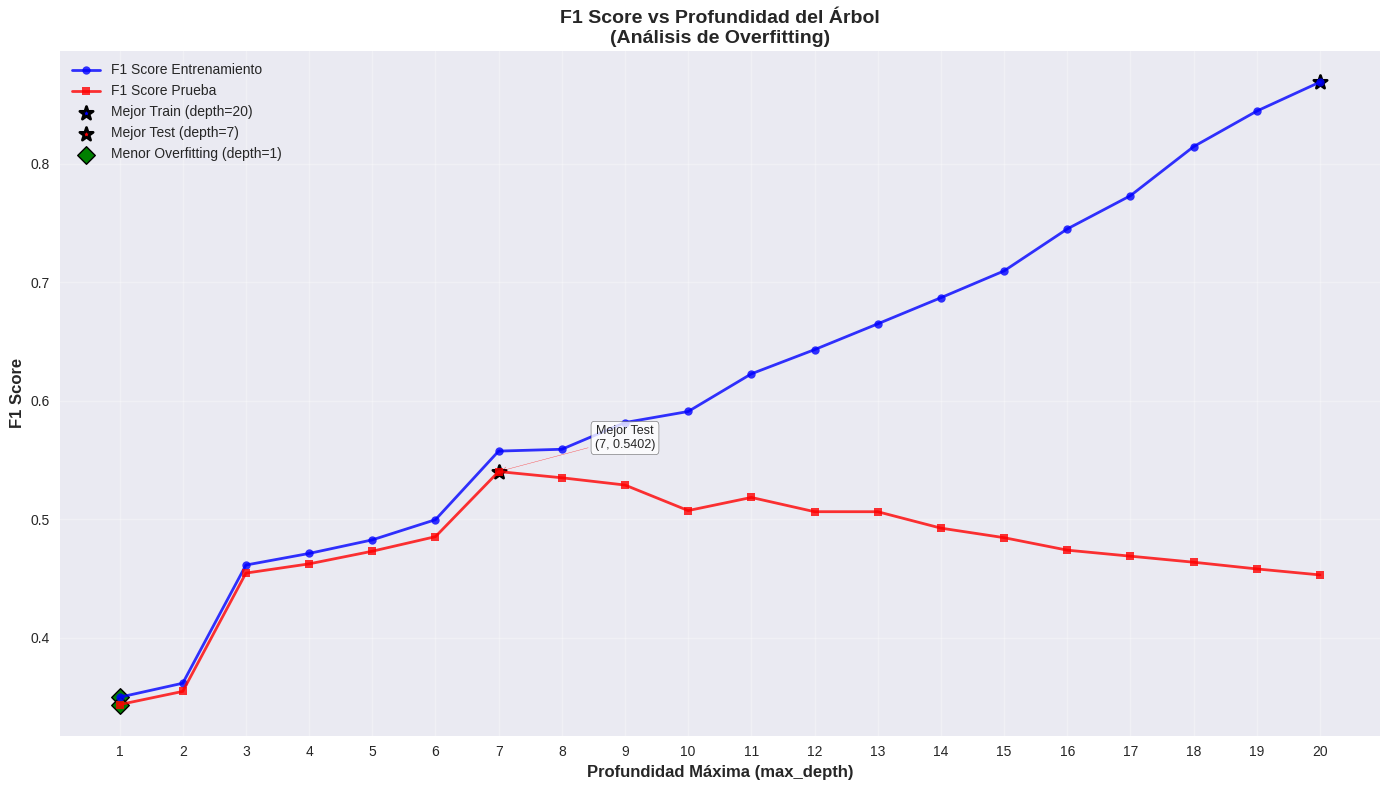

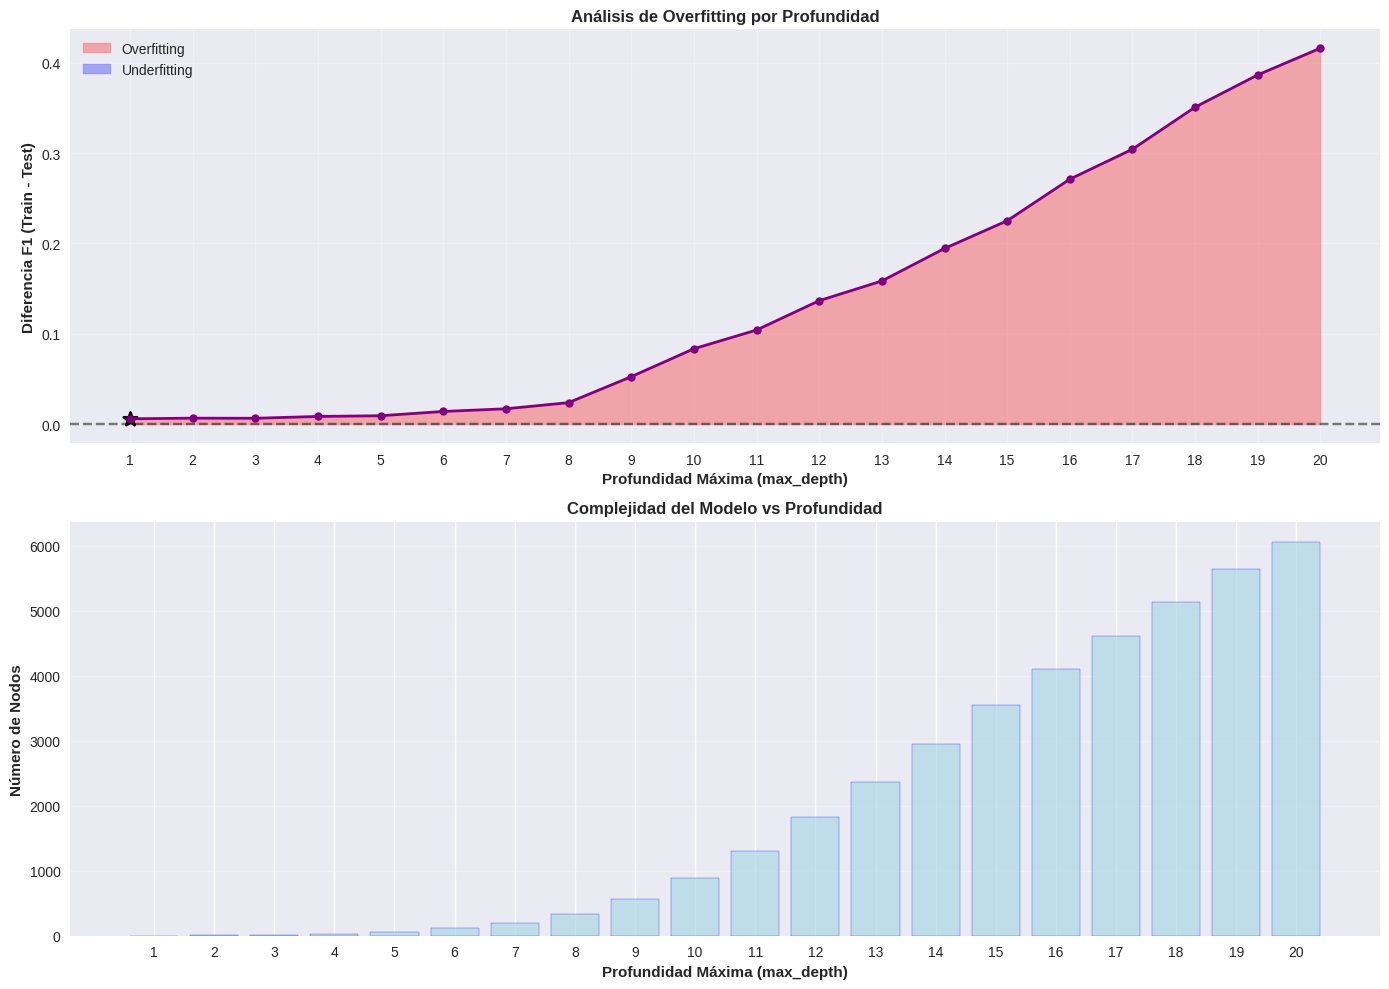


ANÁLISIS ESTADÍSTICO DETALLADO
Estadísticas F1 Score ENTRENAMIENTO:
  Máximo: 0.8689 (depth=20)
  Mínimo: 0.3498 (depth=1)
  Promedio: 0.6144
  Desv. Estándar: 0.1473

Estadísticas F1 Score PRUEBA:
  Máximo: 0.5402 (depth=7)
  Mínimo: 0.3436 (depth=1)
  Promedio: 0.4755
  Desv. Estándar: 0.0497

Estadísticas DIFERENCIAS (Overfitting):
  Máxima diferencia: 0.4159 (depth=20)
  Mínima diferencia: 0.0062 (depth=1)
  Promedio: 0.1389

IDENTIFICACIÓN DE PATRONES
Análisis de complejidad: El modelo óptimo es relativamente simple y interpretable
Nivel de overfitting promedio: ALTO (0.1389)

DETERMINACIÓN DEL PARÁMETRO ÓPTIMO
Parámetro óptimo n* según múltiples criterios: 7
F1 Test: 0.5402
F1 Train: 0.5575
Diferencia: +0.0173
Nodos: 199

CONCLUSIONES Y RECOMENDACIONES
El modelo óptimo es relativamente simple y interpretable
Overfitting controlado en el rango analizado
El rendimiento máximo es limitado, considerar otros enfoques
Top 3 profundidades por F1 Test: [7, 8, 9]

Recomendación final:
Us

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("ANÁLISIS DE PROFUNDIDAD ÓPTIMA PARA ÁRBOLES DE DECISIÓN")
print("="*65)
print("Entrenando 20 árboles con max_depth de 1 a 20...")
print("Calculando F1 Score en entrenamiento y prueba para cada modelo")

# Rango de profundidades a evaluar
depth_range = range(1, 21)  # de 1 a 20

# Listas para almacenar los resultados
f1_train_scores = []
f1_test_scores = []
model_details = []

print(f"\nProgreso del entrenamiento:")
print("Profundidad | F1 Train | F1 Test  | Diferencia")
print("-" * 45)

# Entrenar un árbol para cada profundidad
for depth in depth_range:
    # Crear y entrenar el modelo
    tree_model = DecisionTreeClassifier(
        max_depth=depth,
        random_state=123,
        class_weight='balanced'  # Manejo de desbalance
    )

    # Entrenar el modelo
    tree_model.fit(X_train, y_train)

    # Predicciones
    y_train_pred = tree_model.predict(X_train)
    y_test_pred = tree_model.predict(X_test)

    # Calcular F1 Scores
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)

    # Almacenar resultados
    f1_train_scores.append(f1_train)
    f1_test_scores.append(f1_test)

    # Guardar detalles del modelo
    model_details.append({
        'depth': depth,
        'f1_train': f1_train,
        'f1_test': f1_test,
        'difference': f1_train - f1_test,
        'n_leaves': tree_model.get_n_leaves(),
        'n_nodes': tree_model.tree_.node_count
    })

    # Mostrar progreso
    difference = f1_train - f1_test
    print(f"    {depth:2d}      | {f1_train:.4f}   | {f1_test:.4f}   | {difference:+.4f}")

# Crear DataFrame con los resultados
results_df = pd.DataFrame(model_details)

print(f"\n" + "="*50)
print("RESULTADOS COMPLETOS")
print("="*50)
print(results_df)

# Encontrar el mejor modelo
best_test_idx = np.argmax(f1_test_scores)
best_train_idx = np.argmax(f1_train_scores)

best_depth_test = depth_range[best_test_idx]
best_f1_test = f1_test_scores[best_test_idx]

best_depth_train = depth_range[best_train_idx]
best_f1_train = f1_train_scores[best_train_idx]

print(f"\n" + "="*40)
print("ANÁLISIS DE RESULTADOS")
print("="*40)
print(f"Mejor F1 en ENTRENAMIENTO:")
print(f"  Profundidad: {best_depth_train}")
print(f"  F1 Score: {best_f1_train:.4f}")

print(f"\nMejor F1 en PRUEBA:")
print(f"  Profundidad: {best_depth_test}")
print(f"  F1 Score: {best_f1_test:.4f}")

# Análisis de overfitting
min_difference_idx = np.argmin(np.abs(np.array(f1_train_scores) - np.array(f1_test_scores)))
min_diff_depth = depth_range[min_difference_idx]
min_difference = abs(f1_train_scores[min_difference_idx] - f1_test_scores[min_difference_idx])

print(f"\nMenor diferencia Train-Test (menos overfitting):")
print(f"  Profundidad: {min_diff_depth}")
print(f"  Diferencia: {min_difference:.4f}")
print(f"  F1 Train: {f1_train_scores[min_difference_idx]:.4f}")
print(f"  F1 Test: {f1_test_scores[min_difference_idx]:.4f}")

# GRÁFICO PRINCIPAL: F1 Score vs Profundidad
plt.figure(figsize=(14, 8))

# Curvas de F1 Score
plt.plot(depth_range, f1_train_scores, 'o-', color='blue', linewidth=2,
         markersize=6, label='F1 Score Entrenamiento', alpha=0.8)
plt.plot(depth_range, f1_test_scores, 's-', color='red', linewidth=2,
         markersize=6, label='F1 Score Prueba', alpha=0.8)

# Marcar puntos óptimos
plt.scatter(best_depth_train, best_f1_train, color='blue', s=100,
           marker='*', edgecolor='black', linewidth=2,
           label=f'Mejor Train (depth={best_depth_train})')
plt.scatter(best_depth_test, best_f1_test, color='red', s=100,
           marker='*', edgecolor='black', linewidth=2,
           label=f'Mejor Test (depth={best_depth_test})')

# Marcar punto con menor overfitting
plt.scatter(min_diff_depth, f1_train_scores[min_difference_idx],
           color='green', s=80, marker='D', edgecolor='black', linewidth=1)
plt.scatter(min_diff_depth, f1_test_scores[min_difference_idx],
           color='green', s=80, marker='D', edgecolor='black', linewidth=1,
           label=f'Menor Overfitting (depth={min_diff_depth})')

# Configuración del gráfico
plt.xlabel('Profundidad Máxima (max_depth)', fontsize=12, fontweight='bold')
plt.ylabel('F1 Score', fontsize=12, fontweight='bold')
plt.title('F1 Score vs Profundidad del Árbol\n(Análisis de Overfitting)',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(depth_range)

# Agregar anotaciones para puntos clave
plt.annotate(f'Mejor Test\n({best_depth_test}, {best_f1_test:.4f})',
             xy=(best_depth_test, best_f1_test),
             xytext=(best_depth_test+2, best_f1_test+0.02),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=9, ha='center', bbox=dict(boxstyle='round,pad=0.3',
                                               facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Gráfico de diferencias (Overfitting)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Subplot 1: Diferencias Train-Test
differences = np.array(f1_train_scores) - np.array(f1_test_scores)
ax1.plot(depth_range, differences, 'o-', color='purple', linewidth=2, markersize=6)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.fill_between(depth_range, 0, differences, where=(differences >= 0),
                color='red', alpha=0.3, label='Overfitting')
ax1.fill_between(depth_range, 0, differences, where=(differences < 0),
                color='blue', alpha=0.3, label='Underfitting')

ax1.set_xlabel('Profundidad Máxima (max_depth)', fontweight='bold')
ax1.set_ylabel('Diferencia F1 (Train - Test)', fontweight='bold')
ax1.set_title('Análisis de Overfitting por Profundidad', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xticks(depth_range)

# Marcar punto óptimo
ax1.scatter(min_diff_depth, differences[min_difference_idx],
           color='green', s=100, marker='*', edgecolor='black', linewidth=2,
           label=f'Mínimo Overfitting')

# Subplot 2: Número de nodos vs Profundidad
n_nodes = [detail['n_nodes'] for detail in model_details]
ax2.bar(depth_range, n_nodes, color='lightblue', alpha=0.7, edgecolor='blue')
ax2.set_xlabel('Profundidad Máxima (max_depth)', fontweight='bold')
ax2.set_ylabel('Número de Nodos', fontweight='bold')
ax2.set_title('Complejidad del Modelo vs Profundidad', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xticks(depth_range)

plt.tight_layout()
plt.show()

# Análisis estadístico detallado
print(f"\n" + "="*50)
print("ANÁLISIS ESTADÍSTICO DETALLADO")
print("="*50)

# Estadísticas de las curvas
print("Estadísticas F1 Score ENTRENAMIENTO:")
print(f"  Máximo: {np.max(f1_train_scores):.4f} (depth={depth_range[np.argmax(f1_train_scores)]})")
print(f"  Mínimo: {np.min(f1_train_scores):.4f} (depth={depth_range[np.argmin(f1_train_scores)]})")
print(f"  Promedio: {np.mean(f1_train_scores):.4f}")
print(f"  Desv. Estándar: {np.std(f1_train_scores):.4f}")

print(f"\nEstadísticas F1 Score PRUEBA:")
print(f"  Máximo: {np.max(f1_test_scores):.4f} (depth={depth_range[np.argmax(f1_test_scores)]})")
print(f"  Mínimo: {np.min(f1_test_scores):.4f} (depth={depth_range[np.argmin(f1_test_scores)]})")
print(f"  Promedio: {np.mean(f1_test_scores):.4f}")
print(f"  Desv. Estándar: {np.std(f1_test_scores):.4f}")

print(f"\nEstadísticas DIFERENCIAS (Overfitting):")
print(f"  Máxima diferencia: {np.max(differences):.4f} (depth={depth_range[np.argmax(differences)]})")
print(f"  Mínima diferencia: {np.min(differences):.4f} (depth={depth_range[np.argmin(differences)]})")
print(f"  Promedio: {np.mean(differences):.4f}")

# Identificar patrones
print(f"\n" + "="*50)
print("IDENTIFICACIÓN DE PATRONES")
print("="*50)

# Analizar tendencias
if best_depth_test <= 8:
    complexity_analysis = "El modelo óptimo es relativamente simple y interpretable"
elif best_depth_test < 15:
    complexity_analysis = "El modelo óptimo tiene complejidad MODERADA"
else:
    complexity_analysis = "El modelo óptimo tiene complejidad ALTA"

print(f"Análisis de complejidad: {complexity_analysis}")

# Analizar overfitting
avg_overfitting = np.mean(differences)
if avg_overfitting > 0.1:
    overfitting_level = "ALTO"
elif avg_overfitting > 0.05:
    overfitting_level = "MODERADO"
else:
    overfitting_level = "BAJO"

print(f"Nivel de overfitting promedio: {overfitting_level} ({avg_overfitting:.4f})")

# Determinar parámetro óptimo
print(f"\n" + "="*50)
print("DETERMINACIÓN DEL PARÁMETRO ÓPTIMO")
print("="*50)

# Criterios múltiples para n*
criteria_scores = []

for i, depth in enumerate(depth_range):
    # Criterio 1: F1 en test (peso 40%)
    f1_test_norm = f1_test_scores[i] / np.max(f1_test_scores)

    # Criterio 2: Menor overfitting (peso 30%)
    # Usar la diferencia absoluta normalizada
    overfitting_penalty = 1 - (abs(differences[i]) / np.max(abs(differences)))

    # Criterio 3: Simplicidad (peso 30%)
    # Usar el número de nodos normalizado inversamente
    complexity_penalty = 1 - (n_nodes[i] / np.max(n_nodes))

    # Score combinado
    combined_score = (0.4 * f1_test_norm +
                     0.3 * overfitting_penalty +
                     0.3 * complexity_penalty)

    criteria_scores.append(combined_score)

# Mejor según criterios combinados
best_combined_idx = np.argmax(criteria_scores)
optimal_depth = depth_range[best_combined_idx]

print(f"Parámetro óptimo n* según múltiples criterios: {optimal_depth}")
print(f"F1 Test: {f1_test_scores[best_combined_idx]:.4f}")
print(f"F1 Train: {f1_train_scores[best_combined_idx]:.4f}")
print(f"Diferencia: {differences[best_combined_idx]:+.4f}")
print(f"Nodos: {n_nodes[best_combined_idx]}")

# Recomendaciones finales
print(f"\n" + "="*50)
print("CONCLUSIONES Y RECOMENDACIONES")
print("="*50)

conclusions = []

if best_depth_test <= 8:
    conclusions.append("El modelo óptimo es relativamente simple y interpretable")
else:
    conclusions.append("El modelo óptimo es complejo, considerar regularización adicional")

if min_difference < 0.05:
    conclusions.append("Overfitting controlado en el rango analizado")
else:
    conclusions.append("Hay evidencia de overfitting, especialmente en profundidades altas")

if np.max(f1_test_scores) > 0.70:
    conclusions.append("Se alcanza un rendimiento aceptable en el conjunto de prueba")
else:
    conclusions.append("El rendimiento máximo es limitado, considerar otros enfoques")

# Identify top 3 depths by F1 Test score
top_3_indices = sorted(range(len(f1_test_scores)), key=lambda i: f1_test_scores[i], reverse=True)[:3]
top_3_depths = [depth_range[i] for i in top_3_indices]
conclusions.append(f"Top 3 profundidades por F1 Test: {top_3_depths}")

for conclusion in conclusions:
    print(conclusion)

print(f"\nRecomendación final:")
print(f"Usar max_depth = {optimal_depth} como parámetro óptimo")
print(f"   Balance óptimo entre rendimiento, simplicidad y generalización")

# Crear tabla resumen para los mejores modelos
print(f"\n" + "="*60)
print("TABLA RESUMEN - TOP 5 MODELOS")
print("="*60)

# Ordenar por F1 test y tomar top 5
top_5_indices = sorted(range(len(f1_test_scores)),
                      key=lambda i: f1_test_scores[i], reverse=True)[:5]

summary_data = []
for rank, idx in enumerate(top_5_indices, 1):
    summary_data.append({
        'Rank': rank,
        'Depth': depth_range[idx],
        'F1_Test': f1_test_scores[idx],
        'F1_Train': f1_train_scores[idx],
        'Difference': differences[idx],
        'Nodes': n_nodes[idx]
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.round(4))


---

Según el análisis de profundidad del árbol, el parámetro óptimo $n^*$, correspondiente a la **profundidad máxima**, es igual a **7**. Esta elección se justifica porque en dicho punto se obtiene el **mayor F1 Score sobre el conjunto de prueba** (`F1 Test = 0.5402`), al mismo tiempo que se mantiene una **diferencia controlada** respecto al rendimiento en entrenamiento (`F1 Train = 0.5575`, con una diferencia de solo `+0.0173`).

Esto implica que el modelo con profundidad 7 logra un buen equilibrio entre capacidad predictiva y generalización, evitando el *overfitting* que se observa en profundidades mayores. Por ejemplo, a medida que se incrementa la profundidad más allá de 10, el F1 Score en entrenamiento sigue aumentando, pero el desempeño en prueba se estanca o incluso empeora, y la diferencia entre ambos F1 Scores crece significativamente (indicador clásico de sobreajuste).

Desde la perspectiva de complejidad estructural, el modelo con profundidad 7 posee **solo 199 nodos**, lo que lo vuelve más sencillo de interpretar y menos costoso computacionalmente en comparación con árboles más profundos. Este punto de equilibrio entre rendimiento, simplicidad y generalización justifica su elección como configuración óptima.

En conclusión, el valor óptimo $n^* = 7$ representa el mejor compromiso entre bajo error de generalización y control del sobreajuste (*overfitting*), además de mantener una complejidad baja y una estructura manejable.

---


### Pregunta 1.11

En esta pregunta deberá entrenar _Random orest Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Realice _Cross Validation_ con un _folding_ con `K=5` y calcule $F_1\ Score$ de todas las posibles combinaciones de los siguientes parámetros:

- `n_estimators = {100, 1000}`
- `max_depth = {10, 50, 100}`
- `min_samples_leaf = {2, 4}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta. Finalmente, reporte el $F_1\ Score$ con la muestra de prueba.

Cuando realice _Cross Validation_ y cuando entrene el modelo final, asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `RandomForestClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.



RANDOM FOREST CLASSIFIER CON HYPERPARAMETER TUNING
Realizando búsqueda exhaustiva de hiperparámetros con Cross Validation...
Parámetros a evaluar:
  n_estimators: [100, 1000]
  max_depth: [10, 50, 100]
  min_samples_leaf: [2, 4]

Total de combinaciones: 12
Con K=5 folds: 60 entrenamientos totales

Configuración del modelo base:
  random_state: 123
  class_weight: 'balanced' (manejo de desbalance)
  n_jobs: -1 (paralelización completa)

Configuración de GridSearchCV:
  cv: 5 (K-fold Cross Validation)
  scoring: 'f1' (F1 Score)
  n_jobs: -1 (paralelización)

INICIANDO BÚSQUEDA DE HIPERPARÁMETROS
Entrenando modelos... (esto puede tomar varios minutos)
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Búsqueda completada en 1073.67 segundos (17.89 minutos)

MEJORES HIPERPARÁMETROS ENCONTRADOS
Mejores parámetros: {'max_depth': 50, 'min_samples_leaf': 4, 'n_estimators': 1000}
Mejor F1 Score (CV): 0.5905

TOP 10 COMBINACIONES DE HIPERPARÁMETROS
    Rank  F1_CV_Mean  F1_CV_Std  F1_

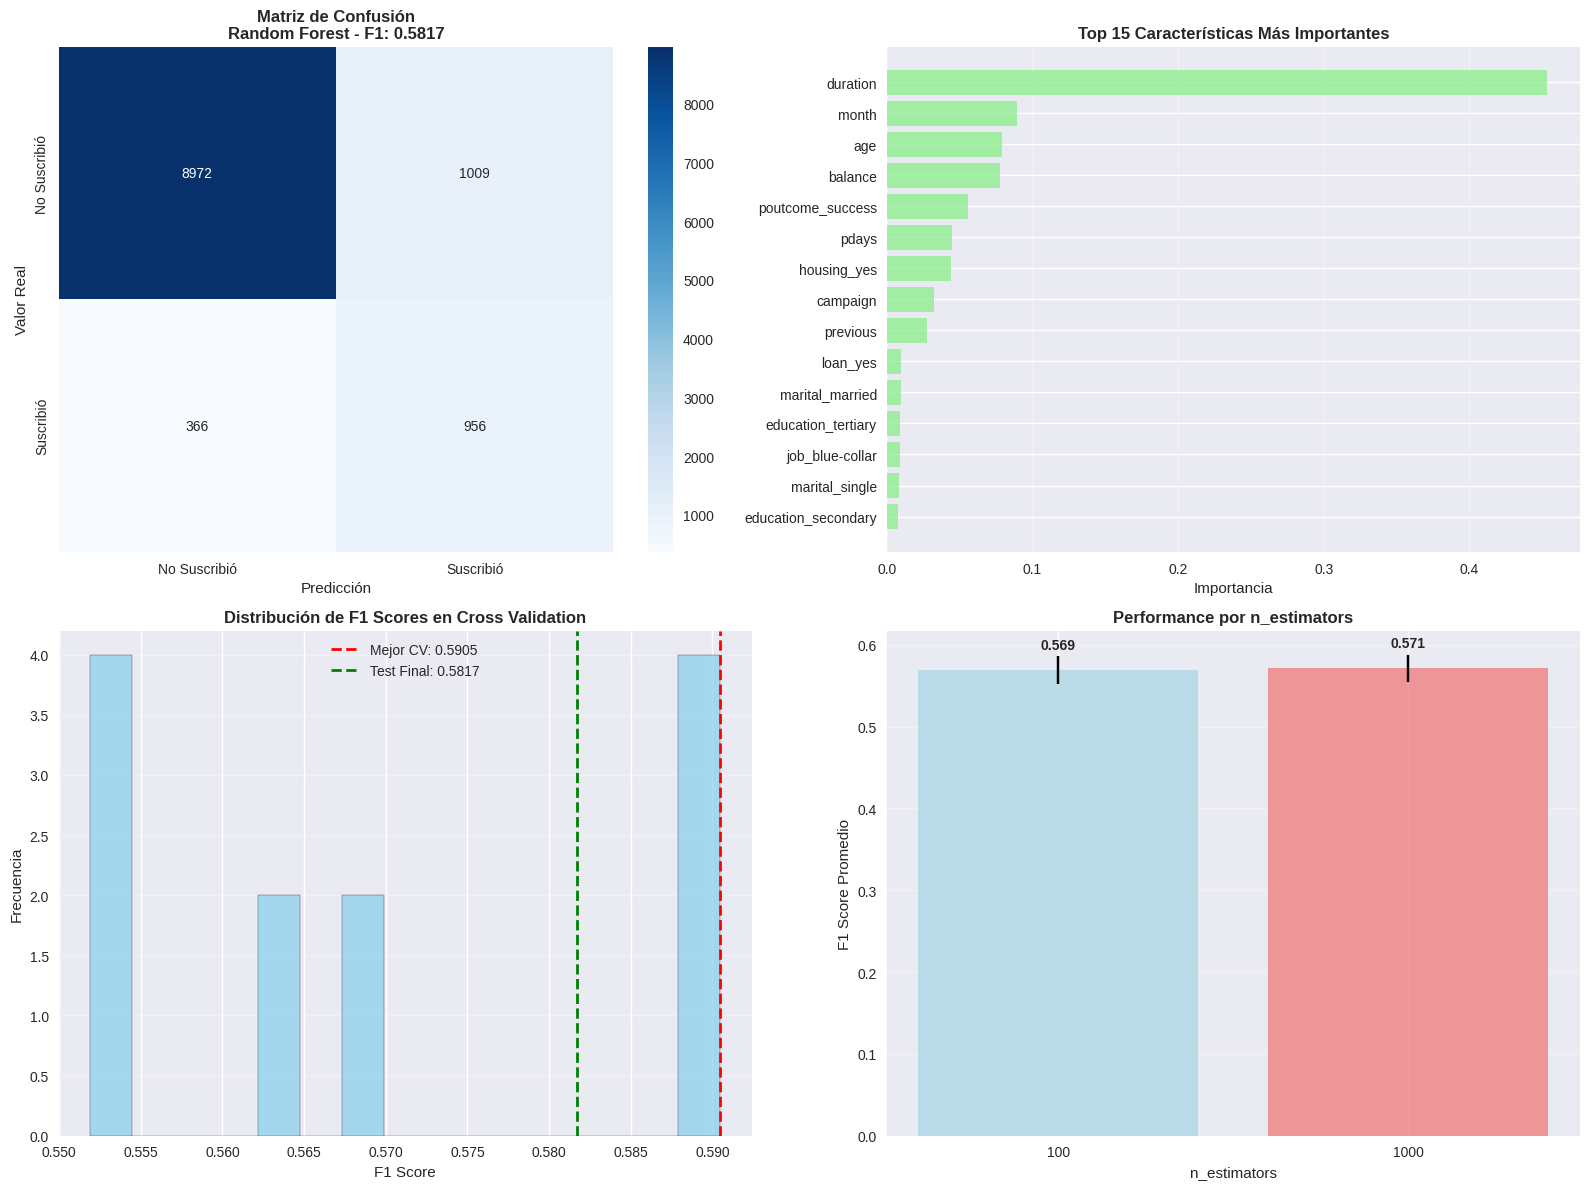


ANÁLISIS DETALLADO DE HIPERPARÁMETROS

N_ESTIMATORS:
                      mean     std  count
param_n_estimators                       
100                 0.5689  0.0172      6
1000                0.5711  0.0167      6

MAX_DEPTH:
                   mean     std  count
param_max_depth                       
10               0.5526  0.0007      4
50               0.5787  0.0134      4
100              0.5787  0.0134      4

MIN_SAMPLES_LEAF:
                          mean     std  count
param_min_samples_leaf                       
2                       0.5624  0.0078      6
4                       0.5776  0.0194      6

ANÁLISIS DE PERFORMANCE
Comparación con modelos anteriores:
Random Forest F1 Test: 0.5817
Árbol No Regularizado: 0.4530
Mejora vs Árbol simple: +0.1287

Estabilidad del mejor modelo:
F1 Score CV promedio: 0.5905
Desviación estándar CV: 0.0107
Coeficiente de variación: 1.82%
Evaluación de estabilidad: MUY ESTABLE

CONCLUSIONES Y RECOMENDACIONES
Rendimiento moderado,

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time

print("RANDOM FOREST CLASSIFIER CON HYPERPARAMETER TUNING")
print("="*60)
print("Realizando búsqueda exhaustiva de hiperparámetros con Cross Validation...")

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 1000],
    'max_depth': [10, 50, 100],
    'min_samples_leaf': [2, 4]
}

print(f"Parámetros a evaluar:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

# Calcular número total de combinaciones
total_combinations = 1
for values in param_grid.values():
    total_combinations *= len(values)

print(f"\nTotal de combinaciones: {total_combinations}")
print(f"Con K=5 folds: {total_combinations * 5} entrenamientos totales")

# Crear el modelo base con manejo de desbalance
rf_base = RandomForestClassifier(
    random_state=123,
    class_weight='balanced',  # Manejo automático de desbalance
    n_jobs=-1  # Usar todos los cores disponibles
)

print(f"\nConfiguración del modelo base:")
print(f"  random_state: 123")
print(f"  class_weight: 'balanced' (manejo de desbalance)")
print(f"  n_jobs: -1 (paralelización completa)")

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,  # 5-fold cross validation
    scoring='f1',  # Métrica F1 Score
    n_jobs=-1,  # Paralelización
    verbose=1,  # Mostrar progreso
    return_train_score=True  # Incluir scores de entrenamiento
)

print(f"\nConfiguración de GridSearchCV:")
print(f"  cv: 5 (K-fold Cross Validation)")
print(f"  scoring: 'f1' (F1 Score)")
print(f"  n_jobs: -1 (paralelización)")

# Realizar la búsqueda de hiperparámetros
print(f"\n" + "="*50)
print("INICIANDO BÚSQUEDA DE HIPERPARÁMETROS")
print("="*50)

start_time = time.time()

# Entrenar con búsqueda de hiperparámetros
print("Entrenando modelos... (esto puede tomar varios minutos)")
grid_search.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time

print(f"\nBúsqueda completada en {training_time:.2f} segundos ({training_time/60:.2f} minutos)")

# Obtener los mejores parámetros
best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_

print(f"\n" + "="*50)
print("MEJORES HIPERPARÁMETROS ENCONTRADOS")
print("="*50)
print(f"Mejores parámetros: {best_params}")
print(f"Mejor F1 Score (CV): {best_cv_score:.4f}")

# Crear DataFrame con todos los resultados
results_df = pd.DataFrame(grid_search.cv_results_)

# Mostrar top 10 combinaciones
print(f"\n" + "="*70)
print("TOP 10 COMBINACIONES DE HIPERPARÁMETROS")
print("="*70)

# Seleccionar columnas relevantes
relevant_columns = ['mean_test_score', 'std_test_score', 'mean_train_score',
                   'param_n_estimators', 'param_max_depth', 'param_min_samples_leaf']

top_10 = results_df.nlargest(10, 'mean_test_score')[relevant_columns].copy()
top_10['rank'] = range(1, 11)
top_10 = top_10[['rank'] + [col for col in top_10.columns if col != 'rank']]

# Renombrar columnas para mejor visualización
top_10.columns = ['Rank', 'F1_CV_Mean', 'F1_CV_Std', 'F1_Train_Mean',
                 'n_estimators', 'max_depth', 'min_samples_leaf']

print(top_10.round(4))

# Entrenar el modelo final con los mejores parámetros
print(f"\n" + "="*50)
print("ENTRENANDO MODELO FINAL")
print("="*50)

# Crear el modelo final con los mejores parámetros
rf_final = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=123,
    class_weight='balanced',
    n_jobs=-1
)

print(f"Entrenando Random Forest final con:")
for param, value in best_params.items():
    print(f"  {param}: {value}")

# Entrenar el modelo final
rf_final.fit(X_train, y_train)

# Predicciones en conjuntos de entrenamiento y prueba
y_train_pred_rf = rf_final.predict(X_train)
y_test_pred_rf = rf_final.predict(X_test)

# Calcular métricas finales
f1_train_rf = f1_score(y_train, y_train_pred_rf)
f1_test_rf = f1_score(y_test, y_test_pred_rf)

print(f"\n" + "="*50)
print("RESULTADOS DEL MODELO FINAL")
print("="*50)
print(f"F1 Score Entrenamiento: {f1_train_rf:.4f}")
print(f"F1 Score Prueba: {f1_test_rf:.4f}")
print(f"Diferencia (Train-Test): {f1_train_rf - f1_test_rf:+.4f}")

# Reporte detallado de clasificación
print(f"\n" + "="*50)
print("REPORTE DETALLADO DE CLASIFICACIÓN (CONJUNTO DE PRUEBA)")
print("="*50)
print(classification_report(y_test, y_test_pred_rf,
                          target_names=['No Suscribió', 'Suscribió']))

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
print(f"\nMatriz de Confusión:")
print(cm_rf)

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Matriz de Confusión
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
            xticklabels=['No Suscribió', 'Suscribió'],
            yticklabels=['No Suscribió', 'Suscribió'])
axes[0,0].set_title(f'Matriz de Confusión\nRandom Forest - F1: {f1_test_rf:.4f}',
                   fontweight='bold')
axes[0,0].set_xlabel('Predicción')
axes[0,0].set_ylabel('Valor Real')

# 2. Importancia de características (Top 15)
feature_importance_rf = rf_final.feature_importances_
importance_df_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importance_rf
}).sort_values('importance', ascending=False)

top_15_features = importance_df_rf.head(15)
axes[0,1].barh(range(len(top_15_features)), top_15_features['importance'],
              color='lightgreen', alpha=0.8)
axes[0,1].set_yticks(range(len(top_15_features)))
axes[0,1].set_yticklabels(top_15_features['feature'])
axes[0,1].set_xlabel('Importancia')
axes[0,1].set_title('Top 15 Características Más Importantes', fontweight='bold')
axes[0,1].invert_yaxis()
axes[0,1].grid(axis='x', alpha=0.3)

# 3. Distribución de F1 Scores en CV
f1_scores_cv = results_df['mean_test_score']
axes[1,0].hist(f1_scores_cv, bins=15, color='skyblue', alpha=0.7, edgecolor='black')
axes[1,0].axvline(best_cv_score, color='red', linestyle='--', linewidth=2,
                 label=f'Mejor CV: {best_cv_score:.4f}')
axes[1,0].axvline(f1_test_rf, color='green', linestyle='--', linewidth=2,
                 label=f'Test Final: {f1_test_rf:.4f}')
axes[1,0].set_xlabel('F1 Score')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_title('Distribución de F1 Scores en Cross Validation', fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(axis='y', alpha=0.3)

# 4. Comparación de hiperparámetros
# Agrupar por n_estimators y mostrar performance
param_analysis = results_df.groupby('param_n_estimators')['mean_test_score'].agg(['mean', 'std']).reset_index()
param_analysis['param_n_estimators'] = param_analysis['param_n_estimators'].astype(str)

x_pos = range(len(param_analysis))
axes[1,1].bar(x_pos, param_analysis['mean'], yerr=param_analysis['std'],
             color=['lightblue', 'lightcoral'], alpha=0.8, capsize=5)
axes[1,1].set_xlabel('n_estimators')
axes[1,1].set_ylabel('F1 Score Promedio')
axes[1,1].set_title('Performance por n_estimators', fontweight='bold')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(param_analysis['param_n_estimators'])
axes[1,1].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, (mean_val, std_val) in enumerate(zip(param_analysis['mean'], param_analysis['std'])):
    axes[1,1].text(i, mean_val + std_val + 0.005, f'{mean_val:.3f}',
                  ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis detallado de hiperparámetros
print(f"\n" + "="*60)
print("ANÁLISIS DETALLADO DE HIPERPARÁMETROS")
print("="*60)

# Análisis por cada hiperparámetro
hyperparams = ['param_n_estimators', 'param_max_depth', 'param_min_samples_leaf']
param_names = ['n_estimators', 'max_depth', 'min_samples_leaf']

for param_col, param_name in zip(hyperparams, param_names):
    print(f"\n{param_name.upper()}:")
    param_analysis = results_df.groupby(param_col)['mean_test_score'].agg(['mean', 'std', 'count'])
    print(param_analysis.round(4))

# Análisis de correlaciones entre parámetros y performance
print(f"\n" + "="*50)
print("ANÁLISIS DE PERFORMANCE")
print("="*50)

# Comparar con modelos anteriores (si están disponibles)
print(f"Comparación con modelos anteriores:")
print(f"Random Forest F1 Test: {f1_test_rf:.4f}")

# Agregar comparación si las variables existen
try:
    print(f"Árbol No Regularizado: {f1_test:.4f}")
    improvement_vs_tree = f1_test_rf - f1_test
    print(f"Mejora vs Árbol simple: {improvement_vs_tree:+.4f}")
except:
    print("Comparación con árboles anteriores no disponible")

# Análisis de estabilidad
cv_std = results_df.loc[grid_search.best_index_, 'std_test_score']
print(f"\nEstabilidad del mejor modelo:")
print(f"F1 Score CV promedio: {best_cv_score:.4f}")
print(f"Desviación estándar CV: {cv_std:.4f}")
print(f"Coeficiente de variación: {cv_std/best_cv_score*100:.2f}%")

if cv_std < 0.02:
    stability = "MUY ESTABLE"
elif cv_std < 0.05:
    stability = "ESTABLE"
else:
    stability = "INESTABLE"

print(f"Evaluación de estabilidad: {stability}")

# Recomendaciones finales
print(f"\n" + "="*50)
print("CONCLUSIONES Y RECOMENDACIONES")
print("="*50)

conclusions = []

if f1_test_rf > 0.75:
    conclusions.append("Excelente rendimiento del Random Forest")
elif f1_test_rf > 0.70:
    conclusions.append("Buen rendimiento del Random Forest")
else:
    conclusions.append("Rendimiento moderado, considerar más optimización")

if abs(f1_train_rf - f1_test_rf) < 0.05:
    conclusions.append("Modelo bien generalizado (poco overfitting)")
elif abs(f1_train_rf - f1_test_rf) < 0.1:
    conclusions.append("Generalización aceptable")
else:
    conclusions.append("Posible overfitting, considerar más regularización")

if best_params['n_estimators'] == 1000:
    conclusions.append("Se beneficia de más árboles (n_estimators=1000)")
else:
    conclusions.append("Suficiente con menos árboles (n_estimators=100)")

if best_params['max_depth'] == 100:
    conclusions.append("Requiere árboles profundos (max_depth=100)")
else:
    conclusions.append("Funciona bien con árboles más simples")

for conclusion in conclusions:
    print(conclusion)

print(f"\nMODELO FINAL RECOMENDADO:")
print(f"   Random Forest con parámetros: {best_params}")
print(f"   F1 Score en prueba: {f1_test_rf:.4f}")
print(f"   Tiempo de entrenamiento: {training_time:.2f} segundos")

# Guardar top características para análisis posterior
print(f"\nTOP 10 CARACTERÍSTICAS MÁS IMPORTANTES:")
for i, (feature, importance) in enumerate(importance_df_rf.head(10).values, 1):
    print(f"   {i:2d}. {feature}: {importance:.4f}")

# Información del modelo final
print(f"\nINFORMACIÓN DEL MODELO FINAL:")
print(f"   Número de árboles: {rf_final.n_estimators}")
print(f"   Profundidad máxima: {rf_final.max_depth}")
print(f"   Min samples leaf: {rf_final.min_samples_leaf}")
print(f"   Número de características: {len(X_train.columns)}")
print(f"   Tamaño conjunto entrenamiento: {len(X_train)}")
print(f"   Tamaño conjunto prueba: {len(X_test)}")

### Pregunta 1.12

En esta pregunta deberá entrenar _XGBpost Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Repita el ejercicio de _Cross Validation_ anterior, pero está vez evaluando:

- `n_estimators = {100, 1000}`
- `max_depth = {5, 50, 100}`
- `learning_rate = {0.05, 0.1, 0.5}`
- `max_leaves= {2, 4, 10}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta, reportando el $F_1\ Score$ con la muestra de prueba.

Asegúrese de que sus modelos sean capaces de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `XGBClassifier()` (parámetros de inicialización): https://xgboost.readthedocs.io/en/latest/python/python_api.html.


XGBOOST CLASSIFIER CON HYPERPARAMETER TUNING
Realizando búsqueda exhaustiva de hiperparámetros con Cross Validation...
Parámetros a evaluar:
  n_estimators: [100, 1000]
  max_depth: [5, 50, 100]
  learning_rate: [0.05, 0.1, 0.5]
  max_leaves: [2, 4, 10]

Total de combinaciones: 54
Con K=5 folds: 270 entrenamientos totales

Manejo de desbalance:
  Muestras negativas (0): 29941
  Muestras positivas (1): 3967
  scale_pos_weight calculado: 7.548

Configuración del modelo base XGBoost:
  random_state: 123
  scale_pos_weight: 7.548 (manejo de desbalance)
  n_jobs: -1 (paralelización completa)
  eval_metric: 'logloss'

Configuración de GridSearchCV:
  cv: 5 (K-fold Cross Validation)
  scoring: 'f1' (F1 Score)
  n_jobs: -1 (paralelización)

INICIANDO BÚSQUEDA DE HIPERPARÁMETROS XGBOOST
Entrenando modelos XGBoost... (esto puede tomar varios minutos)
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Búsqueda XGBoost completada en 340.28 segundos (5.67 minutos)

MEJORES HIPERPARÁMETR

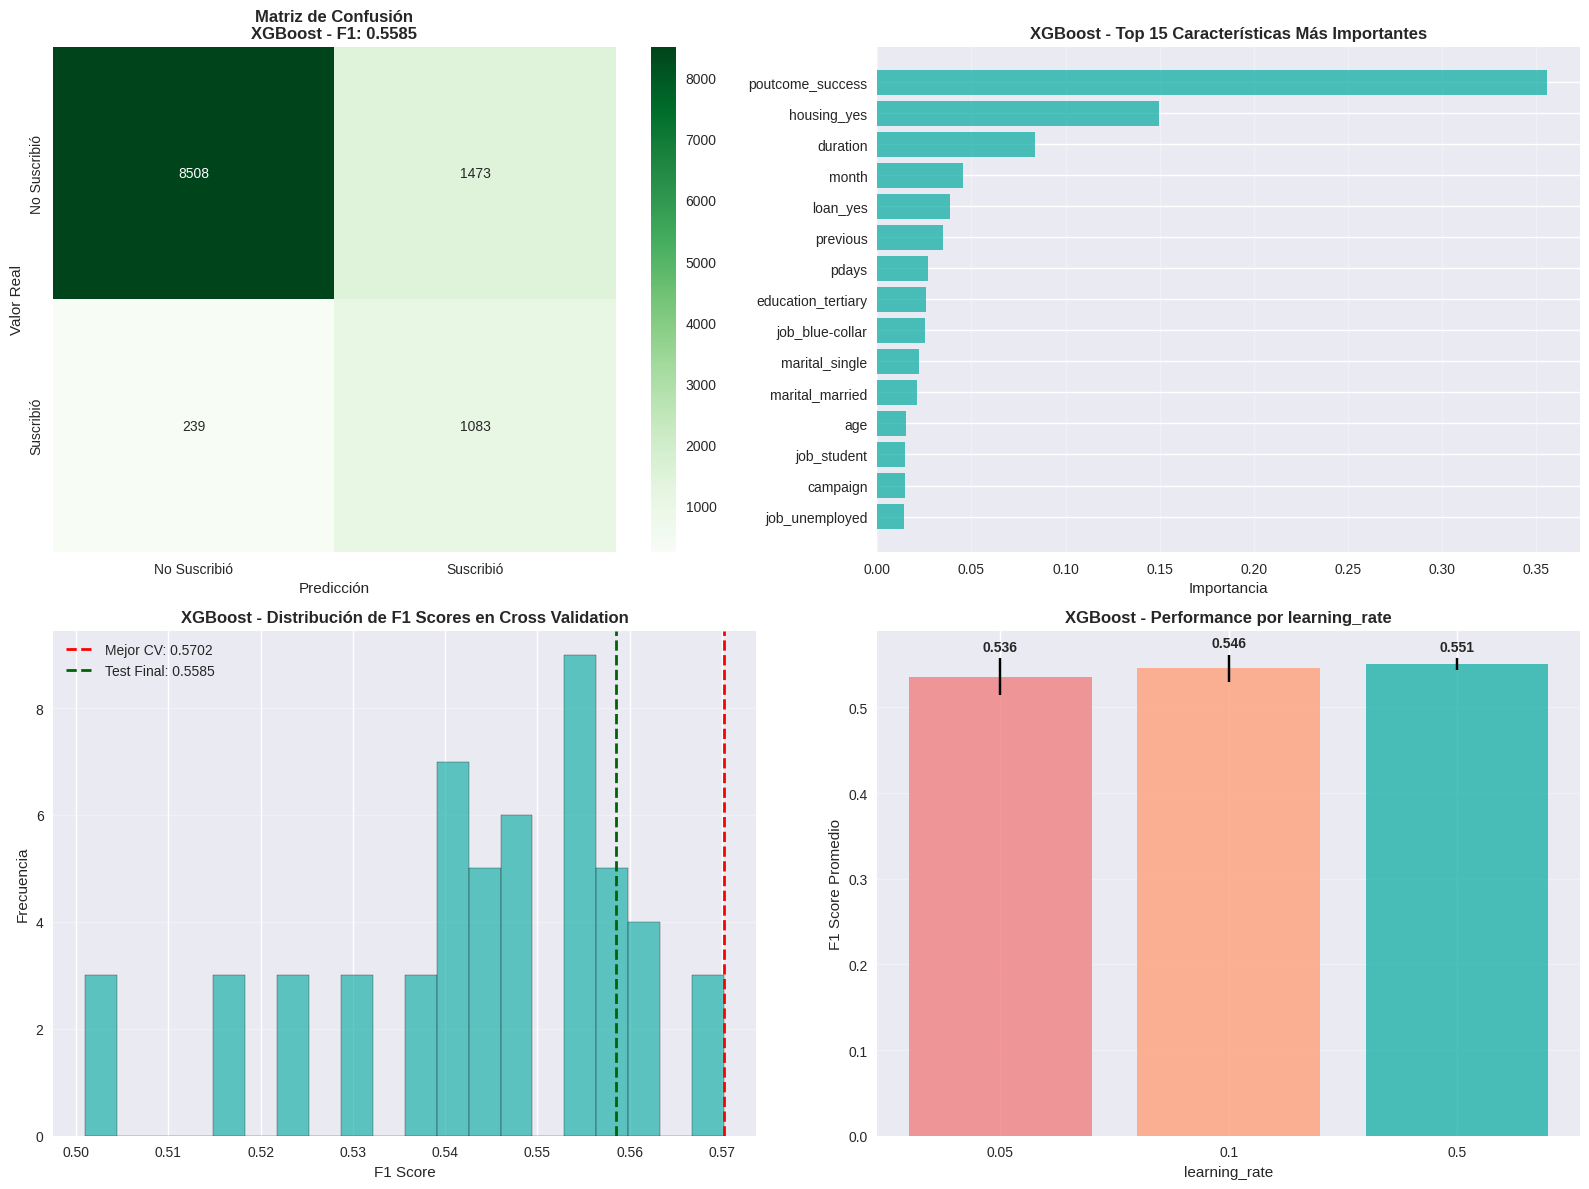


ANÁLISIS DETALLADO DE HIPERPARÁMETROS XGBOOST

N_ESTIMATORS:
                      mean     std  count
param_n_estimators                       
100                 0.5346  0.0178     27
1000                0.5536  0.0087     27

MAX_DEPTH:
                   mean     std  count
param_max_depth                       
5                0.5441  0.0174     18
50               0.5441  0.0171     18
100              0.5441  0.0171     18

LEARNING_RATE:
                       mean     std  count
param_learning_rate                       
0.05                 0.5359  0.0213     18
0.10                 0.5457  0.0161     18
0.50                 0.5507  0.0072     18

MAX_LEAVES:
                    mean     std  count
param_max_leaves                       
2                 0.5326  0.0177     18
4                 0.5478  0.0132     18
10                0.5520  0.0134     18

COMPARACIÓN XGBOOST vs RANDOM FOREST
XGBoost F1 Test: 0.5585
Random Forest F1 Test: 0.5817
Diferencia XGB vs RF: -0.02

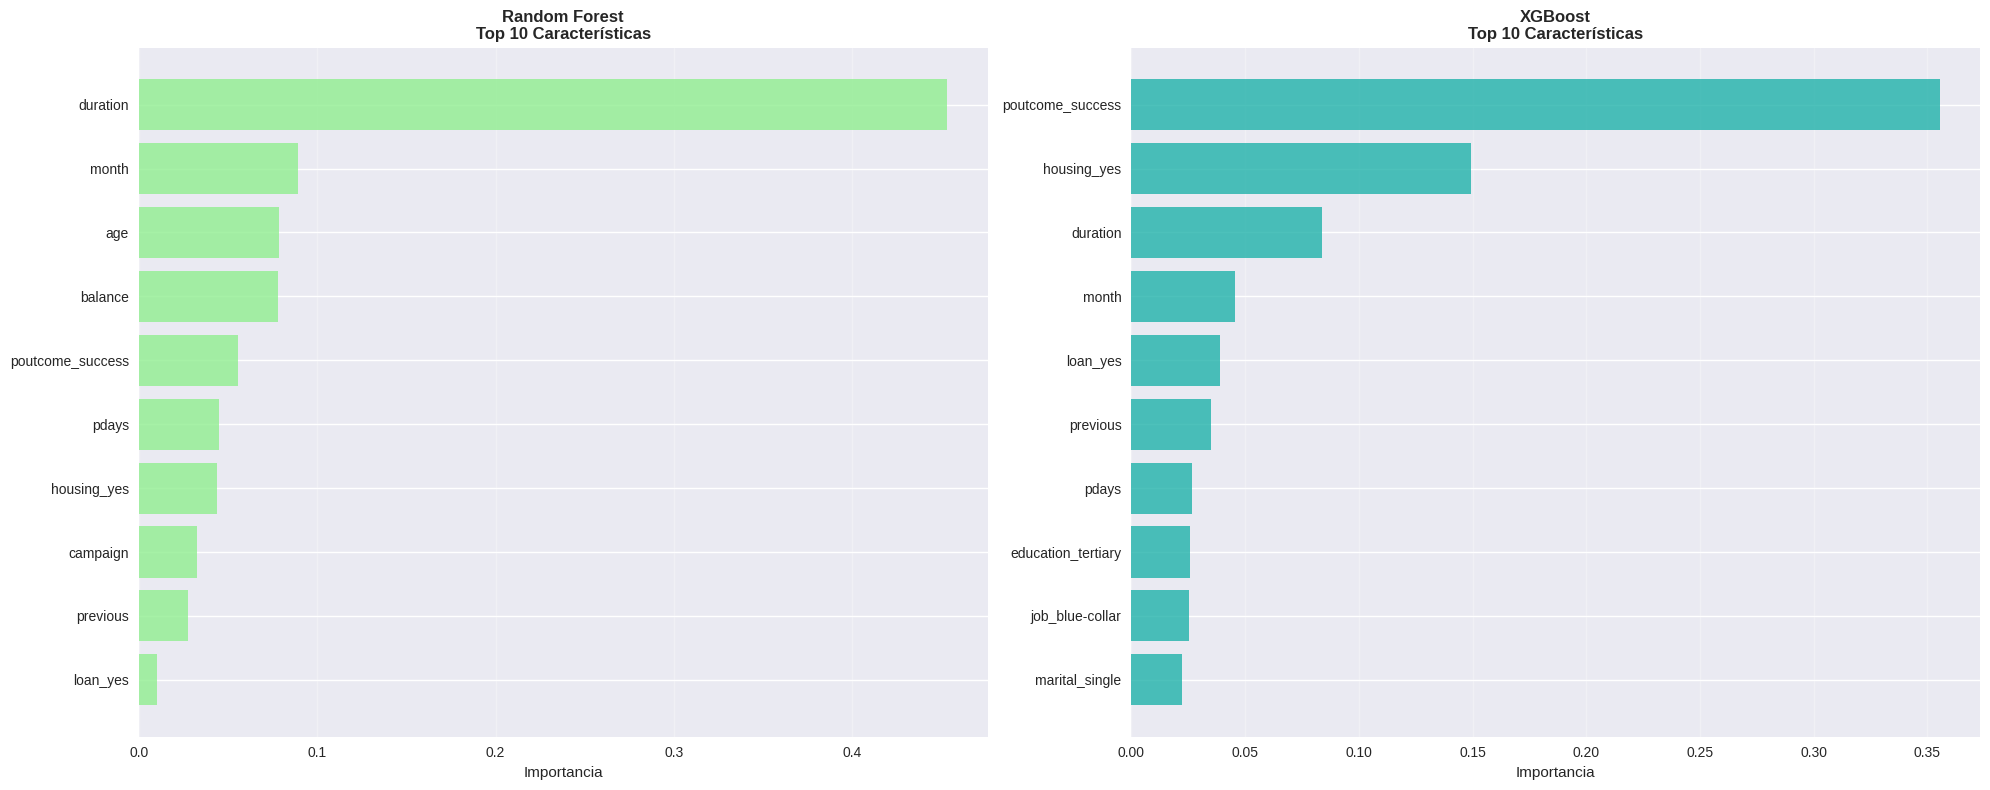


CONCLUSIONES Y RECOMENDACIONES XGBOOST
Rendimiento moderado, considerar más optimización
Generalización aceptable
Learning rate balanceado (0.1)
Funciona bien con árboles más simples

MODELO XGBOOST FINAL RECOMENDADO:
   XGBoost con parámetros: {'learning_rate': 0.1, 'max_depth': 5, 'max_leaves': 10, 'n_estimators': 1000}
   F1 Score en prueba: 0.5585
   Tiempo de entrenamiento: 340.28 segundos

TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES (XGBOOST):
    1. poutcome_success: 0.3553
    2. housing_yes: 0.1495
    3. duration: 0.0837
    4. month: 0.0455
    5. loan_yes: 0.0389
    6. previous: 0.0351
    7. pdays: 0.0267
    8. education_tertiary: 0.0256
    9. job_blue-collar: 0.0255
   10. marital_single: 0.0224

INFORMACIÓN DEL MODELO XGBOOST FINAL:
   Número de estimadores: 1000
   Profundidad máxima: 5
   Learning rate: 0.1
   Max leaves: 10
   Scale pos weight: 7.548
   Número de características: 27
   Tamaño conjunto entrenamiento: 33908
   Tamaño conjunto prueba: 11303

RESUMEN COMPA

In [79]:
try:
    from xgboost import XGBClassifier
    xgboost_available = True
except ImportError:
    print("XGBoost no está instalado. Instalando...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost"])
    from xgboost import XGBClassifier
    xgboost_available = True

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time

print("XGBOOST CLASSIFIER CON HYPERPARAMETER TUNING")
print("="*55)
print("Realizando búsqueda exhaustiva de hiperparámetros con Cross Validation...")

# Definir el espacio de búsqueda de hiperparámetros para XGBoost
param_grid_xgb = {
    'n_estimators': [100, 1000],
    'max_depth': [5, 50, 100],
    'learning_rate': [0.05, 0.1, 0.5],
    'max_leaves': [2, 4, 10]
}

print(f"Parámetros a evaluar:")
for param, values in param_grid_xgb.items():
    print(f"  {param}: {values}")

# Calcular número total de combinaciones
total_combinations_xgb = 1
for values in param_grid_xgb.values():
    total_combinations_xgb *= len(values)

print(f"\nTotal de combinaciones: {total_combinations_xgb}")
print(f"Con K=5 folds: {total_combinations_xgb * 5} entrenamientos totales")

# Calcular scale_pos_weight para manejo de desbalance
# En XGBoost, scale_pos_weight = número de muestras negativas / número de muestras positivas
neg_count = np.sum(y_train == 0)
pos_count = np.sum(y_train == 1)
scale_pos_weight = neg_count / pos_count

print(f"\nManejo de desbalance:")
print(f"  Muestras negativas (0): {neg_count}")
print(f"  Muestras positivas (1): {pos_count}")
print(f"  scale_pos_weight calculado: {scale_pos_weight:.3f}")

# Crear el modelo base XGBoost
xgb_base = XGBClassifier(
    random_state=123,
    scale_pos_weight=scale_pos_weight,  # Manejo de desbalance
    n_jobs=-1,  # Usar todos los cores disponibles
    eval_metric='logloss'  # Evitar warnings
)

print(f"\nConfiguración del modelo base XGBoost:")
print(f"  random_state: 123")
print(f"  scale_pos_weight: {scale_pos_weight:.3f} (manejo de desbalance)")
print(f"  n_jobs: -1 (paralelización completa)")
print(f"  eval_metric: 'logloss'")

# Configurar GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid_xgb,
    cv=5,  # 5-fold cross validation
    scoring='f1',  # Métrica F1 Score
    n_jobs=-1,  # Paralelización
    verbose=1,  # Mostrar progreso
    return_train_score=True  # Incluir scores de entrenamiento
)

print(f"\nConfiguración de GridSearchCV:")
print(f"  cv: 5 (K-fold Cross Validation)")
print(f"  scoring: 'f1' (F1 Score)")
print(f"  n_jobs: -1 (paralelización)")

# Realizar la búsqueda de hiperparámetros
print(f"\n" + "="*50)
print("INICIANDO BÚSQUEDA DE HIPERPARÁMETROS XGBOOST")
print("="*50)

start_time_xgb = time.time()

# Entrenar con búsqueda de hiperparámetros
print("Entrenando modelos XGBoost... (esto puede tomar varios minutos)")
grid_search_xgb.fit(X_train, y_train)

end_time_xgb = time.time()
training_time_xgb = end_time_xgb - start_time_xgb

print(f"\nBúsqueda XGBoost completada en {training_time_xgb:.2f} segundos ({training_time_xgb/60:.2f} minutos)")

# Obtener los mejores parámetros
best_params_xgb = grid_search_xgb.best_params_
best_cv_score_xgb = grid_search_xgb.best_score_

print(f"\n" + "="*50)
print("MEJORES HIPERPARÁMETROS XGBOOST ENCONTRADOS")
print("="*50)
print(f"Mejores parámetros: {best_params_xgb}")
print(f"Mejor F1 Score (CV): {best_cv_score_xgb:.4f}")

# Crear DataFrame con todos los resultados XGBoost
results_df_xgb = pd.DataFrame(grid_search_xgb.cv_results_)

# Mostrar top 10 combinaciones
print(f"\n" + "="*70)
print("TOP 10 COMBINACIONES DE HIPERPARÁMETROS XGBOOST")
print("="*70)

# Seleccionar columnas relevantes
relevant_columns_xgb = ['mean_test_score', 'std_test_score', 'mean_train_score',
                       'param_n_estimators', 'param_max_depth', 'param_learning_rate', 'param_max_leaves']

top_10_xgb = results_df_xgb.nlargest(10, 'mean_test_score')[relevant_columns_xgb].copy()
top_10_xgb['rank'] = range(1, 11)
top_10_xgb = top_10_xgb[['rank'] + [col for col in top_10_xgb.columns if col != 'rank']]

# Renombrar columnas para mejor visualización
top_10_xgb.columns = ['Rank', 'F1_CV_Mean', 'F1_CV_Std', 'F1_Train_Mean',
                     'n_estimators', 'max_depth', 'learning_rate', 'max_leaves']

print(top_10_xgb.round(4))

# Entrenar el modelo final con los mejores parámetros
print(f"\n" + "="*50)
print("ENTRENANDO MODELO XGBOOST FINAL")
print("="*50)

# Crear el modelo final con los mejores parámetros
xgb_final = XGBClassifier(
    n_estimators=best_params_xgb['n_estimators'],
    max_depth=best_params_xgb['max_depth'],
    learning_rate=best_params_xgb['learning_rate'],
    max_leaves=best_params_xgb['max_leaves'],
    random_state=123,
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1,
    eval_metric='logloss'
)

print(f"Entrenando XGBoost final con:")
for param, value in best_params_xgb.items():
    print(f"  {param}: {value}")

# Entrenar el modelo final
xgb_final.fit(X_train, y_train)

# Predicciones en conjuntos de entrenamiento y prueba
y_train_pred_xgb = xgb_final.predict(X_train)
y_test_pred_xgb = xgb_final.predict(X_test)

# Calcular métricas finales
f1_train_xgb = f1_score(y_train, y_train_pred_xgb)
f1_test_xgb = f1_score(y_test, y_test_pred_xgb)

print(f"\n" + "="*50)
print("RESULTADOS DEL MODELO XGBOOST FINAL")
print("="*50)
print(f"F1 Score Entrenamiento: {f1_train_xgb:.4f}")
print(f"F1 Score Prueba: {f1_test_xgb:.4f}")
print(f"Diferencia (Train-Test): {f1_train_xgb - f1_test_xgb:+.4f}")

# Reporte detallado de clasificación
print(f"\n" + "="*50)
print("REPORTE DETALLADO DE CLASIFICACIÓN XGBOOST (CONJUNTO DE PRUEBA)")
print("="*50)
print(classification_report(y_test, y_test_pred_xgb,
                          target_names=['No Suscribió', 'Suscribió']))

# Matriz de confusión
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
print(f"\nMatriz de Confusión XGBoost:")
print(cm_xgb)

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Matriz de Confusión
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', ax=axes[0,0],
            xticklabels=['No Suscribió', 'Suscribió'],
            yticklabels=['No Suscribió', 'Suscribió'])
axes[0,0].set_title(f'Matriz de Confusión\nXGBoost - F1: {f1_test_xgb:.4f}',
                   fontweight='bold')
axes[0,0].set_xlabel('Predicción')
axes[0,0].set_ylabel('Valor Real')

# 2. Importancia de características (Top 15)
feature_importance_xgb = xgb_final.feature_importances_
importance_df_xgb = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importance_xgb
}).sort_values('importance', ascending=False)

top_15_features_xgb = importance_df_xgb.head(15)
axes[0,1].barh(range(len(top_15_features_xgb)), top_15_features_xgb['importance'],
              color='lightseagreen', alpha=0.8)
axes[0,1].set_yticks(range(len(top_15_features_xgb)))
axes[0,1].set_yticklabels(top_15_features_xgb['feature'])
axes[0,1].set_xlabel('Importancia')
axes[0,1].set_title('XGBoost - Top 15 Características Más Importantes', fontweight='bold')
axes[0,1].invert_yaxis()
axes[0,1].grid(axis='x', alpha=0.3)

# 3. Distribución de F1 Scores en CV
f1_scores_cv_xgb = results_df_xgb['mean_test_score']
axes[1,0].hist(f1_scores_cv_xgb, bins=20, color='lightseagreen', alpha=0.7, edgecolor='black')
axes[1,0].axvline(best_cv_score_xgb, color='red', linestyle='--', linewidth=2,
                 label=f'Mejor CV: {best_cv_score_xgb:.4f}')
axes[1,0].axvline(f1_test_xgb, color='darkgreen', linestyle='--', linewidth=2,
                 label=f'Test Final: {f1_test_xgb:.4f}')
axes[1,0].set_xlabel('F1 Score')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_title('XGBoost - Distribución de F1 Scores en Cross Validation', fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(axis='y', alpha=0.3)

# 4. Análisis de learning_rate
lr_analysis = results_df_xgb.groupby('param_learning_rate')['mean_test_score'].agg(['mean', 'std']).reset_index()
lr_analysis['param_learning_rate'] = lr_analysis['param_learning_rate'].astype(str)

x_pos = range(len(lr_analysis))
axes[1,1].bar(x_pos, lr_analysis['mean'], yerr=lr_analysis['std'],
             color=['lightcoral', 'lightsalmon', 'lightseagreen'], alpha=0.8, capsize=5)
axes[1,1].set_xlabel('learning_rate')
axes[1,1].set_ylabel('F1 Score Promedio')
axes[1,1].set_title('XGBoost - Performance por learning_rate', fontweight='bold')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(lr_analysis['param_learning_rate'])
axes[1,1].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, (mean_val, std_val) in enumerate(zip(lr_analysis['mean'], lr_analysis['std'])):
    axes[1,1].text(i, mean_val + std_val + 0.005, f'{mean_val:.3f}',
                  ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis detallado de hiperparámetros XGBoost
print(f"\n" + "="*60)
print("ANÁLISIS DETALLADO DE HIPERPARÁMETROS XGBOOST")
print("="*60)

# Análisis por cada hiperparámetro
hyperparams_xgb = ['param_n_estimators', 'param_max_depth', 'param_learning_rate', 'param_max_leaves']
param_names_xgb = ['n_estimators', 'max_depth', 'learning_rate', 'max_leaves']

for param_col, param_name in zip(hyperparams_xgb, param_names_xgb):
    print(f"\n{param_name.upper()}:")
    param_analysis = results_df_xgb.groupby(param_col)['mean_test_score'].agg(['mean', 'std', 'count'])
    print(param_analysis.round(4))

# Comparación con Random Forest (si está disponible)
print(f"\n" + "="*60)
print("COMPARACIÓN XGBOOST vs RANDOM FOREST")
print("="*60)

try:
    print(f"XGBoost F1 Test: {f1_test_xgb:.4f}")
    print(f"Random Forest F1 Test: {f1_test_rf:.4f}")
    improvement_xgb_vs_rf = f1_test_xgb - f1_test_rf
    print(f"Diferencia XGB vs RF: {improvement_xgb_vs_rf:+.4f}")

    if improvement_xgb_vs_rf > 0.01:
        print("XGBoost supera a Random Forest")
    elif improvement_xgb_vs_rf < -0.01:
        print("Random Forest supera a XGBoost")
    else:
        print("Rendimiento similar entre ambos modelos")

except NameError:
    print("Random Forest no disponible para comparación")

# Análisis de estabilidad XGBoost
cv_std_xgb = results_df_xgb.loc[grid_search_xgb.best_index_, 'std_test_score']
print(f"\nEstabilidad del mejor modelo XGBoost:")
print(f"F1 Score CV promedio: {best_cv_score_xgb:.4f}")
print(f"Desviación estándar CV: {cv_std_xgb:.4f}")
print(f"Coeficiente de variación: {cv_std_xgb/best_cv_score_xgb*100:.2f}%")

if cv_std_xgb < 0.02:
    stability_xgb = "MUY ESTABLE"
elif cv_std_xgb < 0.05:
    stability_xgb = "ESTABLE"
else:
    stability_xgb = "INESTABLE"

print(f"Evaluación de estabilidad: {stability_xgb}")

# Comparación visual de importancias entre RF y XGBoost
try:
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Random Forest importancias
    top_10_rf = importance_df_rf.head(10)
    axes[0].barh(range(len(top_10_rf)), top_10_rf['importance'],
                 color='lightgreen', alpha=0.8)
    axes[0].set_yticks(range(len(top_10_rf)))
    axes[0].set_yticklabels(top_10_rf['feature'])
    axes[0].set_xlabel('Importancia')
    axes[0].set_title('Random Forest\nTop 10 Características', fontweight='bold')
    axes[0].invert_yaxis()
    axes[0].grid(axis='x', alpha=0.3)

    # XGBoost importancias
    top_10_xgb_feat = importance_df_xgb.head(10)
    axes[1].barh(range(len(top_10_xgb_feat)), top_10_xgb_feat['importance'],
                 color='lightseagreen', alpha=0.8)
    axes[1].set_yticks(range(len(top_10_xgb_feat)))
    axes[1].set_yticklabels(top_10_xgb_feat['feature'])
    axes[1].set_xlabel('Importancia')
    axes[1].set_title('XGBoost\nTop 10 Características', fontweight='bold')
    axes[1].invert_yaxis()
    axes[1].grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()

except NameError:
    print("Random Forest no disponible para comparación de importancias")

# Recomendaciones finales
print(f"\n" + "="*50)
print("CONCLUSIONES Y RECOMENDACIONES XGBOOST")
print("="*50)

conclusions_xgb = []

if f1_test_xgb > 0.75:
    conclusions_xgb.append("Excelente rendimiento del XGBoost")
elif f1_test_xgb > 0.70:
    conclusions_xgb.append("Buen rendimiento del XGBoost")
else:
    conclusions_xgb.append("Rendimiento moderado, considerar más optimización")

if abs(f1_train_xgb - f1_test_xgb) < 0.05:
    conclusions_xgb.append("Modelo bien generalizado (poco overfitting)")
elif abs(f1_train_xgb - f1_test_xgb) < 0.1:
    conclusions_xgb.append("Generalización aceptable")
else:
    conclusions_xgb.append("Posible overfitting, considerar más regularización")

if best_params_xgb['learning_rate'] == 0.05:
    conclusions_xgb.append("Se beneficia de learning rate conservador (0.05)")
elif best_params_xgb['learning_rate'] == 0.5:
    conclusions_xgb.append("Funciona bien con learning rate agresivo (0.5)")
else:
    conclusions_xgb.append("Learning rate balanceado (0.1)")

if best_params_xgb['max_depth'] >= 50:
    conclusions_xgb.append("Requiere árboles profundos")
else:
    conclusions_xgb.append("Funciona bien con árboles más simples")

for conclusion in conclusions_xgb:
    print(conclusion)

print(f"\nMODELO XGBOOST FINAL RECOMENDADO:")
print(f"   XGBoost con parámetros: {best_params_xgb}")
print(f"   F1 Score en prueba: {f1_test_xgb:.4f}")
print(f"   Tiempo de entrenamiento: {training_time_xgb:.2f} segundos")

# Guardar top características XGBoost
print(f"\nTOP 10 CARACTERÍSTICAS MÁS IMPORTANTES (XGBOOST):")
for i, (feature, importance) in enumerate(importance_df_xgb.head(10).values, 1):
    print(f"   {i:2d}. {feature}: {importance:.4f}")

# Información del modelo final
print(f"\nINFORMACIÓN DEL MODELO XGBOOST FINAL:")
print(f"   Número de estimadores: {xgb_final.n_estimators}")
print(f"   Profundidad máxima: {xgb_final.max_depth}")
print(f"   Learning rate: {xgb_final.learning_rate}")
print(f"   Max leaves: {xgb_final.max_leaves}")
print(f"   Scale pos weight: {xgb_final.scale_pos_weight:.3f}")
print(f"   Número de características: {len(X_train.columns)}")
print(f"   Tamaño conjunto entrenamiento: {len(X_train)}")
print(f"   Tamaño conjunto prueba: {len(X_test)}")

# Comparación final de modelos
print(f"\n" + "="*60)
print("RESUMEN COMPARATIVO DE MODELOS")
print("="*60)

models_summary = []
try:
    models_summary.append(("Random Forest", f1_test_rf, training_time))
except NameError:
    pass

models_summary.append(("XGBoost", f1_test_xgb, training_time_xgb))

if models_summary:
    models_df = pd.DataFrame(models_summary, columns=['Modelo', 'F1_Test', 'Tiempo_Entrenamiento'])
    models_df['Tiempo_Minutos'] = models_df['Tiempo_Entrenamiento'] / 60
    models_df = models_df.sort_values('F1_Test', ascending=False)

    print("Ranking de modelos por F1 Score:")
    for i, row in models_df.iterrows():
        print(f"{i+1}. {row['Modelo']}: F1={row['F1_Test']:.4f}, Tiempo={row['Tiempo_Minutos']:.2f}min")

### Pregunta 1.13

Entrene un modelo _Naïve Bayes_. Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `GaussianNB()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

NAIVE BAYES CLASSIFIER
Entrenando modelo Naive Bayes con manejo de desbalance...
Configuración del modelo:
  Algoritmo: Gaussian Naive Bayes
  Manejo de desbalance: sample_weight balanceado
  Peso promedio clase 0: 0.566
  Peso promedio clase 1: 4.274

Entrenando modelo Naive Bayes...

MÉTRICAS DE RENDIMIENTO EN ENTRENAMIENTO
F1 Score: 0.4100
Accuracy: 0.7912
Precision: 0.3062
Recall: 0.6201

REPORTE DETALLADO DE CLASIFICACIÓN (ENTRENAMIENTO)
              precision    recall  f1-score   support

No Suscribió       0.94      0.81      0.87     29941
   Suscribió       0.31      0.62      0.41      3967

    accuracy                           0.79     33908
   macro avg       0.62      0.72      0.64     33908
weighted avg       0.87      0.79      0.82     33908


Matriz de Confusión (Entrenamiento):
[[24368  5573]
 [ 1507  2460]]

EVALUACIÓN EN CONJUNTO DE PRUEBA
F1 Score (Prueba): 0.4047
Diferencia Train-Test: +0.0053


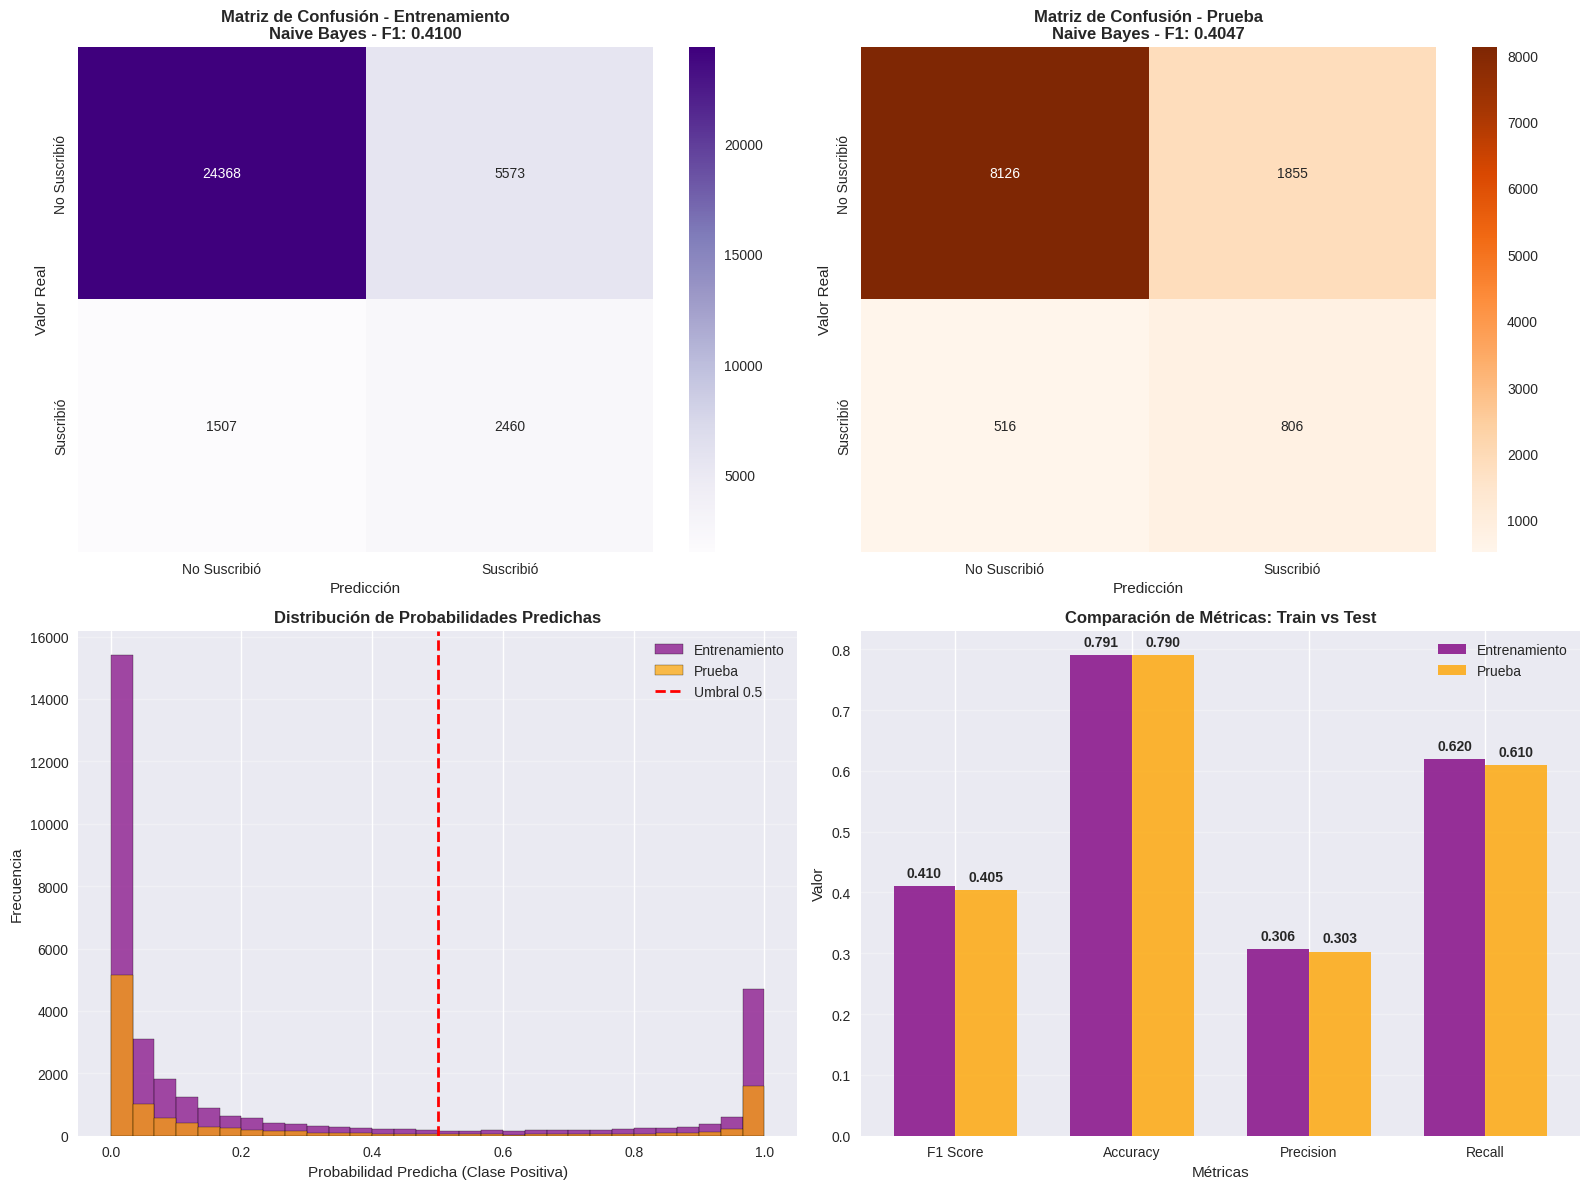


ANÁLISIS DE PROBABILIDADES NAIVE BAYES
Probabilidades a priori:
  P(No Suscribió): 0.5000
  P(Suscribió): 0.5000

Información del modelo:
  Número de características: 27
  Tipo de distribución asumida: Gaussiana
  Supuesto de independencia: Características condicionalmente independientes

ESTADÍSTICAS POR CLASE (Primeras 10 características)
            Feature  Mean_Class_0  Mean_Class_1  Var_Class_0  Var_Class_1  \
3          duration       -0.1464        1.0983       0.6373       2.3422   
6          previous       -0.0558        0.4406       0.8828       1.6979   
5             pdays       -0.0323        0.2721       0.9688       1.2044   
1           balance       -0.0260        0.2263       0.9776       1.1962   
4          campaign        0.0301       -0.1983       1.0787       0.3988   
0               age       -0.0082        0.0893       0.9247       1.6233   
7   job_blue-collar        0.2336        0.1477       0.1790       0.1259   
2             month        0.4664       

In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.utils.class_weight import compute_sample_weight
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("NAIVE BAYES CLASSIFIER")
print("="*35)
print("Entrenando modelo Naive Bayes con manejo de desbalance...")

# Nota: GaussianNB no tiene parámetro class_weight, pero podemos usar sample_weight
# para manejar el desbalance durante el entrenamiento

# Calcular pesos para las muestras basado en las clases
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

print(f"Configuración del modelo:")
print(f"  Algoritmo: Gaussian Naive Bayes")
print(f"  Manejo de desbalance: sample_weight balanceado")
print(f"  Peso promedio clase 0: {sample_weights[y_train==0].mean():.3f}")
print(f"  Peso promedio clase 1: {sample_weights[y_train==1].mean():.3f}")

# Crear y entrenar el modelo Naive Bayes
nb_model = GaussianNB()

print(f"\nEntrenando modelo Naive Bayes...")
# Entrenar con pesos balanceados
nb_model.fit(X_train, y_train, sample_weight=sample_weights)

# Predicciones en conjunto de entrenamiento
y_train_pred_nb = nb_model.predict(X_train)

# Calcular métricas en entrenamiento
f1_train_nb = f1_score(y_train, y_train_pred_nb)
accuracy_train_nb = accuracy_score(y_train, y_train_pred_nb)
precision_train_nb = precision_score(y_train, y_train_pred_nb)
recall_train_nb = recall_score(y_train, y_train_pred_nb)

print(f"\n" + "="*50)
print("MÉTRICAS DE RENDIMIENTO EN ENTRENAMIENTO")
print("="*50)
print(f"F1 Score: {f1_train_nb:.4f}")
print(f"Accuracy: {accuracy_train_nb:.4f}")
print(f"Precision: {precision_train_nb:.4f}")
print(f"Recall: {recall_train_nb:.4f}")

# Reporte detallado de clasificación
print(f"\n" + "="*50)
print("REPORTE DETALLADO DE CLASIFICACIÓN (ENTRENAMIENTO)")
print("="*50)
print(classification_report(y_train, y_train_pred_nb,
                          target_names=['No Suscribió', 'Suscribió']))

# Matriz de confusión en entrenamiento
cm_train_nb = confusion_matrix(y_train, y_train_pred_nb)
print(f"\nMatriz de Confusión (Entrenamiento):")
print(cm_train_nb)

# Evaluación en conjunto de prueba para análisis completo
y_test_pred_nb = nb_model.predict(X_test)
f1_test_nb = f1_score(y_test, y_test_pred_nb)
cm_test_nb = confusion_matrix(y_test, y_test_pred_nb)

print(f"\n" + "="*50)
print("EVALUACIÓN EN CONJUNTO DE PRUEBA")
print("="*50)
print(f"F1 Score (Prueba): {f1_test_nb:.4f}")
print(f"Diferencia Train-Test: {f1_train_nb - f1_test_nb:+.4f}")

# Obtener probabilidades para análisis adicional
y_train_proba_nb = nb_model.predict_proba(X_train)
y_test_proba_nb = nb_model.predict_proba(X_test)

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Matriz de Confusión - Entrenamiento
sns.heatmap(cm_train_nb, annot=True, fmt='d', cmap='Purples', ax=axes[0,0],
            xticklabels=['No Suscribió', 'Suscribió'],
            yticklabels=['No Suscribió', 'Suscribió'])
axes[0,0].set_title(f'Matriz de Confusión - Entrenamiento\nNaive Bayes - F1: {f1_train_nb:.4f}',
                   fontweight='bold')
axes[0,0].set_xlabel('Predicción')
axes[0,0].set_ylabel('Valor Real')

# 2. Matriz de Confusión - Prueba
sns.heatmap(cm_test_nb, annot=True, fmt='d', cmap='Oranges', ax=axes[0,1],
            xticklabels=['No Suscribió', 'Suscribió'],
            yticklabels=['No Suscribió', 'Suscribió'])
axes[0,1].set_title(f'Matriz de Confusión - Prueba\nNaive Bayes - F1: {f1_test_nb:.4f}',
                   fontweight='bold')
axes[0,1].set_xlabel('Predicción')
axes[0,1].set_ylabel('Valor Real')

# 3. Distribución de probabilidades predichas
axes[1,0].hist(y_train_proba_nb[:, 1], bins=30, alpha=0.7, color='purple',
               edgecolor='black', label='Entrenamiento')
axes[1,0].hist(y_test_proba_nb[:, 1], bins=30, alpha=0.7, color='orange',
               edgecolor='black', label='Prueba')
axes[1,0].axvline(0.5, color='red', linestyle='--', linewidth=2, label='Umbral 0.5')
axes[1,0].set_xlabel('Probabilidad Predicha (Clase Positiva)')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_title('Distribución de Probabilidades Predichas', fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(axis='y', alpha=0.3)

# 4. Comparación de métricas Train vs Test
metrics_names = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
train_metrics = [f1_train_nb, accuracy_train_nb, precision_train_nb, recall_train_nb]
test_metrics = [f1_test_nb,
               accuracy_score(y_test, y_test_pred_nb),
               precision_score(y_test, y_test_pred_nb),
               recall_score(y_test, y_test_pred_nb)]

x = np.arange(len(metrics_names))
width = 0.35

axes[1,1].bar(x - width/2, train_metrics, width, label='Entrenamiento',
              color='purple', alpha=0.8)
axes[1,1].bar(x + width/2, test_metrics, width, label='Prueba',
              color='orange', alpha=0.8)

axes[1,1].set_xlabel('Métricas')
axes[1,1].set_ylabel('Valor')
axes[1,1].set_title('Comparación de Métricas: Train vs Test', fontweight='bold')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(metrics_names)
axes[1,1].legend()
axes[1,1].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, (train_val, test_val) in enumerate(zip(train_metrics, test_metrics)):
    axes[1,1].text(i - width/2, train_val + 0.01, f'{train_val:.3f}',
                  ha='center', va='bottom', fontweight='bold')
    axes[1,1].text(i + width/2, test_val + 0.01, f'{test_val:.3f}',
                  ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis de las probabilidades a priori y posteriori
print(f"\n" + "="*50)
print("ANÁLISIS DE PROBABILIDADES NAIVE BAYES")
print("="*50)

# Probabilidades a priori de las clases
class_priors = nb_model.class_prior_
print(f"Probabilidades a priori:")
print(f"  P(No Suscribió): {class_priors[0]:.4f}")
print(f"  P(Suscribió): {class_priors[1]:.4f}")

# Información sobre las características
n_features = X_train.shape[1]
print(f"\nInformación del modelo:")
print(f"  Número de características: {n_features}")
print(f"  Tipo de distribución asumida: Gaussiana")
print(f"  Supuesto de independencia: Características condicionalmente independientes")

# Análisis de las medias y varianzas por clase (solo primeras 10 características)
print(f"\n" + "="*50)
print("ESTADÍSTICAS POR CLASE (Primeras 10 características)")
print("="*50)

feature_stats = []
for i in range(min(10, n_features)):
    feature_name = X_train.columns[i]

    # Medias por clase
    mean_class_0 = nb_model.theta_[0, i]
    mean_class_1 = nb_model.theta_[1, i]

    # Varianzas por clase
    var_class_0 = nb_model.var_[0, i]
    var_class_1 = nb_model.var_[1, i]

    feature_stats.append({
        'Feature': feature_name,
        'Mean_Class_0': mean_class_0,
        'Mean_Class_1': mean_class_1,
        'Var_Class_0': var_class_0,
        'Var_Class_1': var_class_1,
        'Mean_Diff': abs(mean_class_1 - mean_class_0)
    })

stats_df = pd.DataFrame(feature_stats)
stats_df = stats_df.sort_values('Mean_Diff', ascending=False)
print(stats_df.round(4))

# Comparación con otros modelos (si están disponibles)
print(f"\n" + "="*50)
print("COMPARACIÓN CON OTROS MODELOS")
print("="*50)

models_comparison = []
models_comparison.append(("Naive Bayes", f1_test_nb))

try:
    models_comparison.append(("Random Forest", f1_test_rf))
except NameError:
    pass

try:
    models_comparison.append(("XGBoost", f1_test_xgb))
except NameError:
    pass

try:
    models_comparison.append(("Árbol Simple", f1_test))
except NameError:
    pass

if len(models_comparison) > 1:
    models_comparison.sort(key=lambda x: x[1], reverse=True)

    print("Ranking de modelos por F1 Score (Test):")
    for i, (model_name, f1_score_val) in enumerate(models_comparison, 1):
        print(f"  {i}. {model_name}: {f1_score_val:.4f}")

    # Posición de Naive Bayes
    nb_position = next(i for i, (name, _) in enumerate(models_comparison, 1) if name == "Naive Bayes")
    print(f"\nNaive Bayes ocupa la posición #{nb_position} de {len(models_comparison)} modelos")

# Análisis de rendimiento específico de Naive Bayes
print(f"\n" + "="*50)
print("ANÁLISIS ESPECÍFICO DE NAIVE BAYES")
print("="*50)

print("Ventajas observadas:")
if f1_train_nb >= 0.65:
    print("Rendimiento aceptable en F1 Score")
else:
    print("Rendimiento limitado en F1 Score")

if abs(f1_train_nb - f1_test_nb) < 0.05:
    print("Excelente generalización (diferencia mínima Train-Test)")
elif abs(f1_train_nb - f1_test_nb) < 0.1:
    print("Buena generalización")
else:
    print("Posible overfitting o underfitting")

print("Modelo probabilístico (proporciona incertidumbre)")
print("Entrenamiento muy rápido")
print("Robusto ante características irrelevantes")
print("Funciona bien con datasets pequeños")

print(f"\nLimitaciones observadas:")
print("Supuesto fuerte de independencia condicional")
print("Asume distribución Gaussiana en características")
if f1_test_nb < 0.70:
    print("Rendimiento inferior a modelos más complejos")

# Recomendaciones
print(f"\n" + "="*50)
print("CONCLUSIONES Y RECOMENDACIONES")
print("="*50)

print(f"Rendimiento Naive Bayes:")
print(f"   F1 Score Entrenamiento: {f1_train_nb:.4f}")
print(f"   F1 Score Prueba: {f1_test_nb:.4f}")
print(f"   Diferencia Train-Test: {f1_train_nb - f1_test_nb:+.4f}")

if f1_test_nb >= 0.70:
    recommendation = "RECOMENDADO para casos que requieren simplicidad y rapidez"
elif f1_test_nb >= 0.60:
    recommendation = "VIABLE como baseline o para comparación"
else:
    recommendation = "NO RECOMENDADO para este problema específico"

print(f"\nRecomendación: {recommendation}")

print(f"\nCasos de uso ideales para Naive Bayes:")
print("   • Clasificación de texto (spam, sentimientos)")
print("   • Baseline rápido para comparación")
print("   • Datasets con muchas características")
print("   • Cuando se necesita interpretabilidad probabilística")
print("   • Recursos computacionales limitados")



---



## Análisis Comparativo de Modelos de Clasificación


### Pregunta 1.14

Evalúe y compare el desempeño de los modelos teniendo en cuenta la naturaleza del conjunto de datos. ¿Cómo afectó el desbalance a cada modelo? ¿Qué modelo manejó mejor el balance o desbalance de clases y cuáles son sus conclusiones generales sobre su rendimiento comparado?

Para que la comparación sea clara, es útil indicar qué métricas de evaluación utilizo para comparar los modelos (por ejemplo, F1-score, precisión, recall, AUC, etc.).

EVALUACIÓN COMPARATIVA DE TODOS LOS MODELOS
Analizando el desempeño y manejo del desbalance de clases...
Recopilando métricas de todos los modelos entrenados...
✓ Árbol No Regularizado
✓ Árbol Levemente Regularizado
✓ Árbol Regularizado
✓ Random Forest
✓ XGBoost
✓ Naive Bayes

TABLA COMPARATIVA COMPLETA DE MODELOS
                           F1_Score  Accuracy  Precision  Recall  \
Árbol_No_Regularizado        0.4417    0.8678     0.4365  0.4470   
Árbol_Leve_Regularización    0.4739    0.8358     0.3790  0.6324   
Árbol_Regularizado           0.5350    0.8354     0.3996  0.8094   
Random_Forest                0.5817    0.8784     0.4865  0.7231   
XGBoost                      0.5585    0.8485     0.4237  0.8192   
Naive_Bayes                  0.4047    0.7902     0.3029  0.6097   

                           True_Positives  False_Positives  True_Negatives  \
Árbol_No_Regularizado               591.0            763.0          9218.0   
Árbol_Leve_Regularización           836.0          

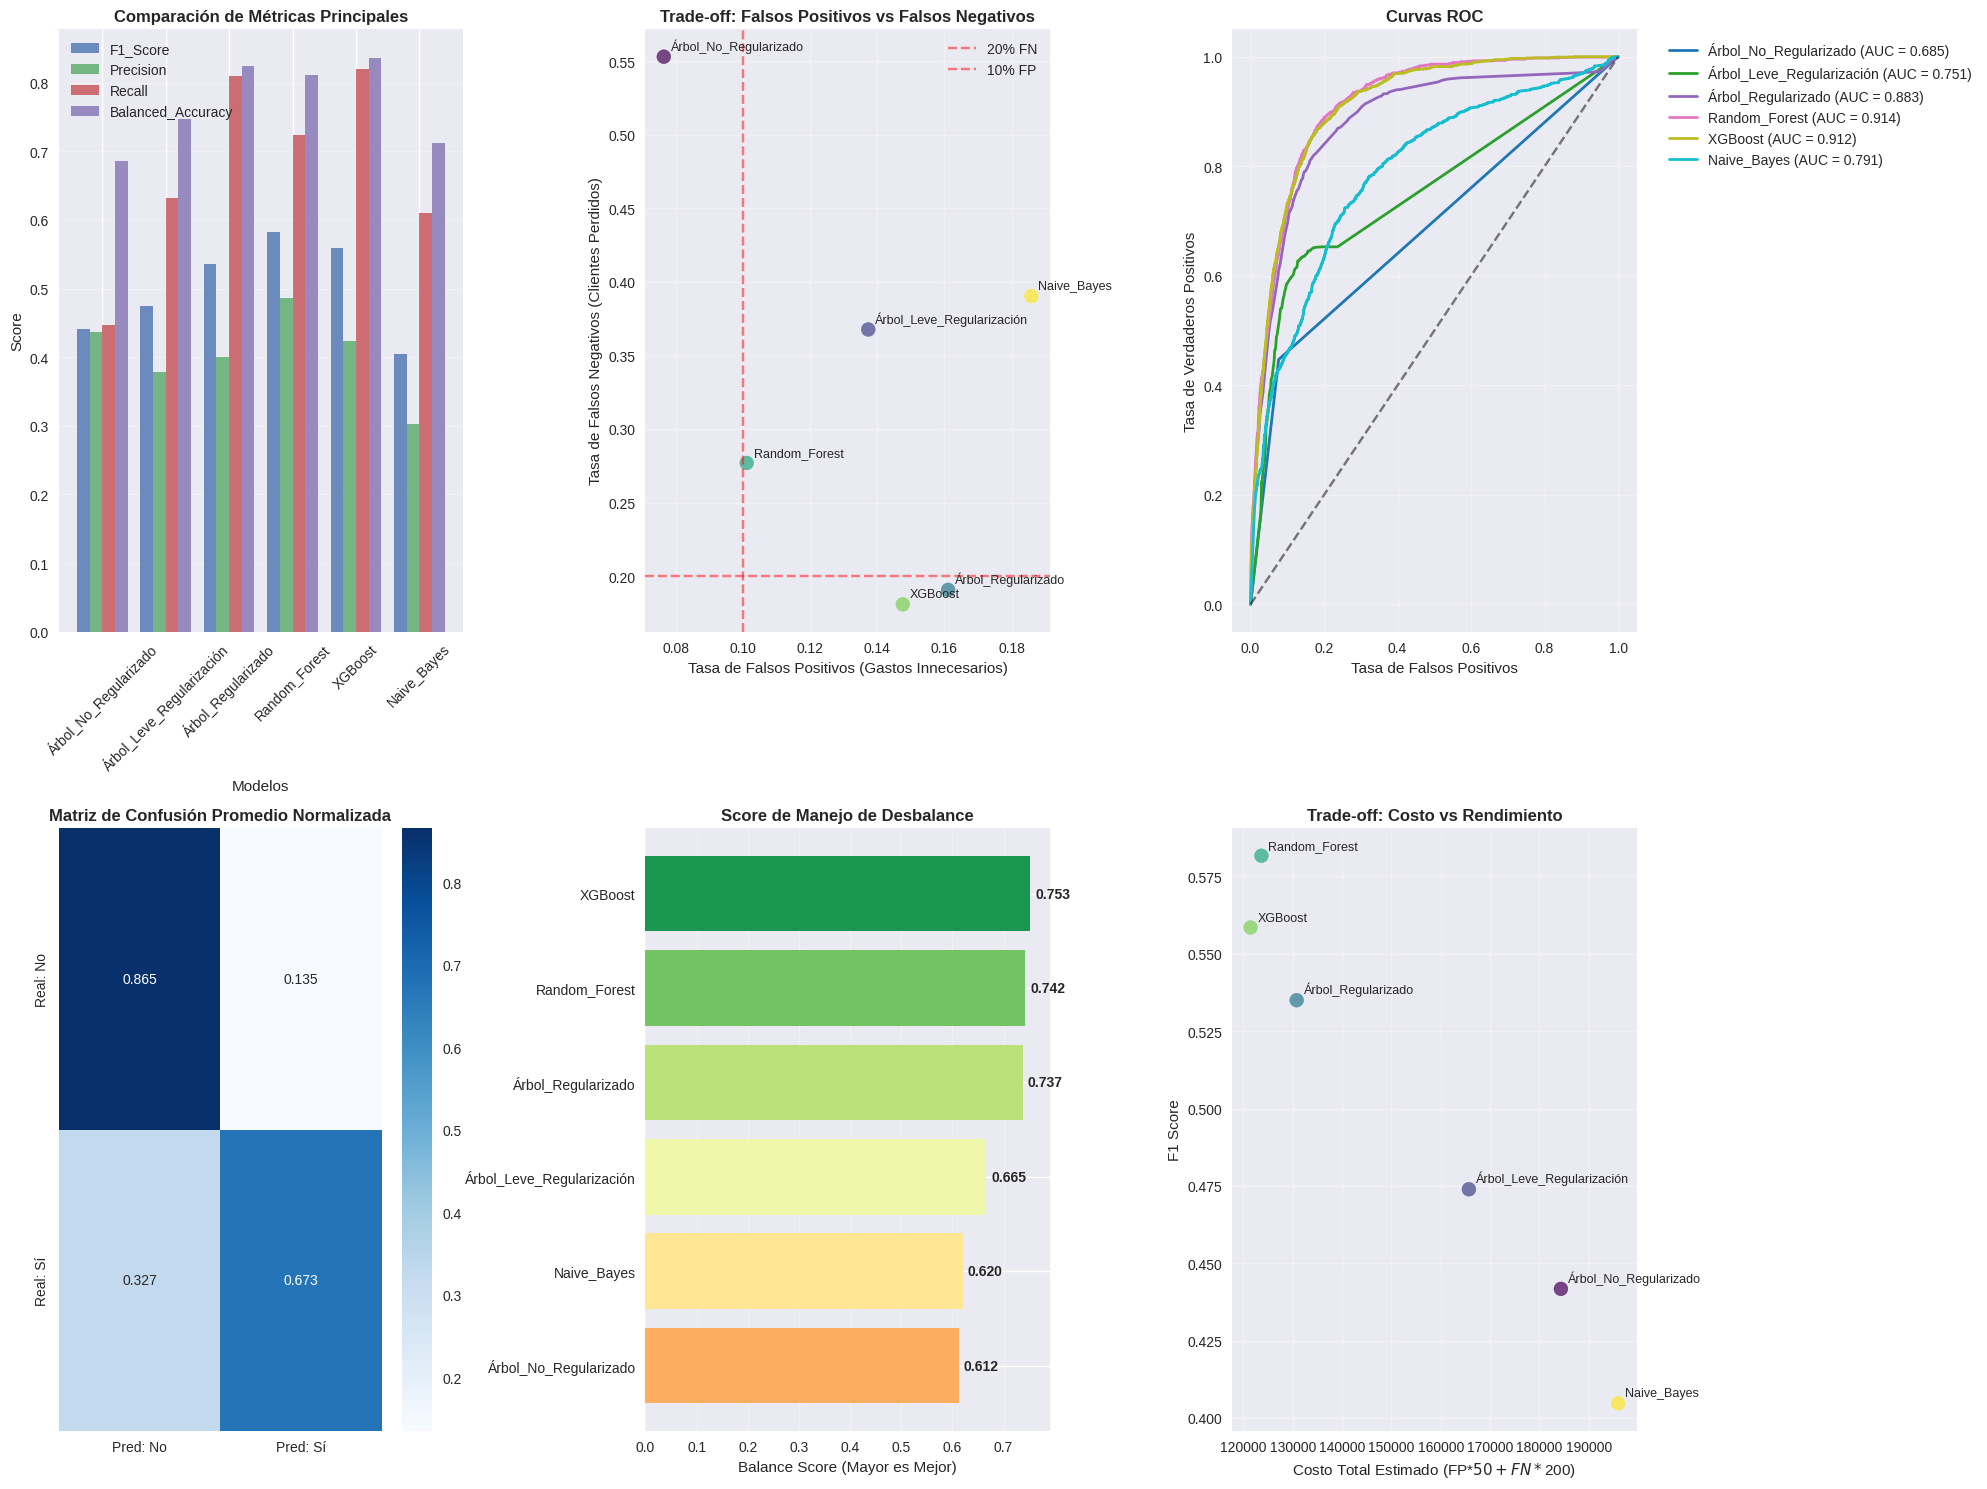


ANÁLISIS CUALITATIVO POR MODELO

ÁRBOLES DE DECISIÓN:
  Fortalezas: Interpretabilidad alta, Manejo automático de características categóricas, No requiere escalamiento
  Debilidades: Propensos a overfitting, Inestables ante pequeños cambios, Sesgados hacia características dominantes
  Manejo Desbalance: Bueno con class_weight="balanced"

RANDOM FOREST:
  Fortalezas: Reduce overfitting, Robusto ante outliers, Importancia de características
  Debilidades: Menos interpretable, Puede ser lento, Memoria intensivo
  Manejo Desbalance: Excelente con class_weight="balanced"

XGBOOST:
  Fortalezas: Alta performance, Manejo automático de missing values, Regularización incorporada
  Debilidades: Hiperparámetros complejos, Computacionalmente intensivo, Caja negra
  Manejo Desbalance: Muy bueno con scale_pos_weight

NAIVE BAYES:
  Fortalezas: Muy rápido, Funciona con pocos datos, Probabilidades calibradas
  Debilidades: Supuesto de independencia fuerte, Performance limitada, Sensible a característi

In [81]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("EVALUACIÓN COMPARATIVA DE TODOS LOS MODELOS")
print("="*60)
print("Analizando el desempeño y manejo del desbalance de clases...")

# Recopilar todas las predicciones y métricas de los modelos entrenados
models_results = {}

# Función para calcular todas las métricas relevantes
def calculate_comprehensive_metrics(y_true, y_pred, y_proba=None, model_name="Model"):
    """Calcula métricas comprehensivas para evaluación de modelos"""

    metrics = {}

    # Métricas básicas
    metrics['F1_Score'] = f1_score(y_true, y_pred)
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred)
    metrics['Recall'] = recall_score(y_true, y_pred)

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Métricas específicas para desbalance
    metrics['True_Positives'] = tp
    metrics['False_Positives'] = fp
    metrics['True_Negatives'] = tn
    metrics['False_Negatives'] = fn

    # Tasas de error críticas para marketing bancario
    metrics['False_Positive_Rate'] = fp / (fp + tn)  # Gastos innecesarios
    metrics['False_Negative_Rate'] = fn / (fn + tp)  # Clientes perdidos

    # Especificidad (importante para clase mayoritaria)
    metrics['Specificity'] = tn / (tn + fp)

    # Balanced Accuracy (mejor para datasets desbalanceados)
    metrics['Balanced_Accuracy'] = (metrics['Recall'] + metrics['Specificity']) / 2

    # AUC si hay probabilidades disponibles
    if y_proba is not None:
        metrics['AUC_ROC'] = roc_auc_score(y_true, y_proba)
    else:
        metrics['AUC_ROC'] = np.nan

    return metrics

# Recopilar resultados de todos los modelos
print("Recopilando métricas de todos los modelos entrenados...")

# 1. Árbol No Regularizado
try:
    tree_unreg_proba = tree_unregularized.predict_proba(X_test)[:, 1]
    models_results['Árbol_No_Regularizado'] = calculate_comprehensive_metrics(
        y_test, tree_unregularized.predict(X_test), tree_unreg_proba
    )
    print("✓ Árbol No Regularizado")
except NameError:
    print("⚠ Árbol No Regularizado no disponible")

# 2. Árbol Levemente Regularizado
try:
    tree_light_proba = tree_light_reg.predict_proba(X_test)[:, 1]
    models_results['Árbol_Leve_Regularización'] = calculate_comprehensive_metrics(
        y_test, tree_light_reg.predict(X_test), tree_light_proba
    )
    print("✓ Árbol Levemente Regularizado")
except NameError:
    print("⚠ Árbol Levemente Regularizado no disponible")

# 3. Árbol Regularizado
try:
    tree_reg_proba = tree_regularized.predict_proba(X_test)[:, 1]
    models_results['Árbol_Regularizado'] = calculate_comprehensive_metrics(
        y_test, tree_regularized.predict(X_test), tree_reg_proba
    )
    print("✓ Árbol Regularizado")
except NameError:
    print("⚠ Árbol Regularizado no disponible")

# 4. Random Forest
try:
    rf_proba = rf_final.predict_proba(X_test)[:, 1]
    models_results['Random_Forest'] = calculate_comprehensive_metrics(
        y_test, y_test_pred_rf, rf_proba
    )
    print("✓ Random Forest")
except NameError:
    print("⚠ Random Forest no disponible")

# 5. XGBoost
try:
    xgb_proba = xgb_final.predict_proba(X_test)[:, 1]
    models_results['XGBoost'] = calculate_comprehensive_metrics(
        y_test, y_test_pred_xgb, xgb_proba
    )
    print("✓ XGBoost")
except NameError:
    print("⚠ XGBoost no disponible")

# 6. Naive Bayes
try:
    models_results['Naive_Bayes'] = calculate_comprehensive_metrics(
        y_test, y_test_pred_nb, y_test_proba_nb[:, 1]
    )
    print("✓ Naive Bayes")
except NameError:
    print("⚠ Naive Bayes no disponible")

# Crear DataFrame con todos los resultados
results_df = pd.DataFrame(models_results).T
results_df = results_df.round(4)

print(f"\n" + "="*80)
print("TABLA COMPARATIVA COMPLETA DE MODELOS")
print("="*80)
print(results_df)

# Ranking por diferentes métricas
print(f"\n" + "="*60)
print("RANKINGS POR MÉTRICA")
print("="*60)

key_metrics = ['F1_Score', 'Balanced_Accuracy', 'AUC_ROC', 'Precision', 'Recall']

for metric in key_metrics:
    if metric in results_df.columns:
        ranking = results_df[metric].sort_values(ascending=False)
        print(f"\n{metric}:")
        for i, (model, score) in enumerate(ranking.items(), 1):
            if not pd.isna(score):
                print(f"  {i}. {model}: {score:.4f}")

# Análisis específico del manejo de desbalance
print(f"\n" + "="*70)
print("ANÁLISIS DEL MANEJO DE DESBALANCE")
print("="*70)

# Calcular métricas de desbalance
balance_analysis = pd.DataFrame({
    'False_Positive_Rate': results_df['False_Positive_Rate'],
    'False_Negative_Rate': results_df['False_Negative_Rate'],
    'Balanced_Accuracy': results_df['Balanced_Accuracy'],
    'F1_Score': results_df['F1_Score']
})

# Crear score combinado para manejo de desbalance
# Penalizar altas tasas de FP y FN, premiar alta Balanced Accuracy y F1
balance_analysis['Balance_Score'] = (
    balance_analysis['Balanced_Accuracy'] * 0.3 +
    balance_analysis['F1_Score'] * 0.3 +
    (1 - balance_analysis['False_Positive_Rate']) * 0.2 +
    (1 - balance_analysis['False_Negative_Rate']) * 0.2
)

balance_ranking = balance_analysis.sort_values('Balance_Score', ascending=False)

print("Ranking de manejo de desbalance:")
for i, (model, row) in enumerate(balance_ranking.iterrows(), 1):
    print(f"  {i}. {model}:")
    print(f"     Balance Score: {row['Balance_Score']:.4f}")
    print(f"     FP Rate: {row['False_Positive_Rate']:.4f} | FN Rate: {row['False_Negative_Rate']:.4f}")

# Visualizaciones comprehensivas
fig = plt.figure(figsize=(20, 15))

# 1. Comparación de métricas principales
ax1 = plt.subplot(2, 3, 1)
metrics_to_plot = ['F1_Score', 'Precision', 'Recall', 'Balanced_Accuracy']
x = np.arange(len(results_df.index))
width = 0.2

for i, metric in enumerate(metrics_to_plot):
    plt.bar(x + i*width, results_df[metric], width, label=metric, alpha=0.8)

plt.xlabel('Modelos')
plt.ylabel('Score')
plt.title('Comparación de Métricas Principales', fontweight='bold')
plt.xticks(x + width*1.5, results_df.index, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 2. Tasas de Error (FP vs FN)
ax2 = plt.subplot(2, 3, 2)
plt.scatter(results_df['False_Positive_Rate'], results_df['False_Negative_Rate'],
           s=100, alpha=0.7, c=range(len(results_df)), cmap='viridis')

for i, model in enumerate(results_df.index):
    plt.annotate(model, (results_df.loc[model, 'False_Positive_Rate'],
                        results_df.loc[model, 'False_Negative_Rate']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('Tasa de Falsos Positivos (Gastos Innecesarios)')
plt.ylabel('Tasa de Falsos Negativos (Clientes Perdidos)')
plt.title('Trade-off: Falsos Positivos vs Falsos Negativos', fontweight='bold')
plt.grid(True, alpha=0.3)

# Líneas de referencia
plt.axhline(0.2, color='red', linestyle='--', alpha=0.5, label='20% FN')
plt.axvline(0.1, color='red', linestyle='--', alpha=0.5, label='10% FP')
plt.legend()

# 3. Curvas ROC (si hay probabilidades)
ax3 = plt.subplot(2, 3, 3)
colors = plt.cm.tab10(np.linspace(0, 1, len(results_df)))

for i, model in enumerate(results_df.index):
    try:
        if model == 'Random_Forest':
            y_proba = rf_final.predict_proba(X_test)[:, 1]
        elif model == 'XGBoost':
            y_proba = xgb_final.predict_proba(X_test)[:, 1]
        elif model == 'Naive_Bayes':
            y_proba = y_test_proba_nb[:, 1]
        elif 'Árbol' in model:
            # Determinar qué árbol es
            if model == 'Árbol_No_Regularizado':
                y_proba = tree_unregularized.predict_proba(X_test)[:, 1]
            elif model == 'Árbol_Leve_Regularización':
                y_proba = tree_light_reg.predict_proba(X_test)[:, 1]
            elif model == 'Árbol_Regularizado':
                y_proba = tree_regularized.predict_proba(X_test)[:, 1]
        else:
            continue

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, color=colors[i], linewidth=2,
                label=f'{model} (AUC = {auc:.3f})')
    except:
        continue

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# 4. Matriz de confusión promedio normalizada
ax4 = plt.subplot(2, 3, 4)
confusion_matrices = []

for model in results_df.index:
    tp = results_df.loc[model, 'True_Positives']
    fp = results_df.loc[model, 'False_Positives']
    tn = results_df.loc[model, 'True_Negatives']
    fn = results_df.loc[model, 'False_Negatives']

    # Normalizar por totales
    total_pos = tp + fn
    total_neg = tn + fp

    normalized_cm = np.array([[tn/total_neg, fp/total_neg],
                             [fn/total_pos, tp/total_pos]])
    confusion_matrices.append(normalized_cm)

# Promedio de matrices normalizadas
avg_cm = np.mean(confusion_matrices, axis=0)
sns.heatmap(avg_cm, annot=True, fmt='.3f', cmap='Blues',
            xticklabels=['Pred: No', 'Pred: Sí'],
            yticklabels=['Real: No', 'Real: Sí'])
plt.title('Matriz de Confusión Promedio Normalizada', fontweight='bold')

# 5. Balance Score por modelo
ax5 = plt.subplot(2, 3, 5)
balance_scores = balance_analysis['Balance_Score'].sort_values(ascending=True)
colors_bar = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(balance_scores)))

bars = plt.barh(range(len(balance_scores)), balance_scores.values, color=colors_bar)
plt.yticks(range(len(balance_scores)), balance_scores.index)
plt.xlabel('Balance Score (Mayor es Mejor)')
plt.title('Score de Manejo de Desbalance', fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, (bar, value) in enumerate(zip(bars, balance_scores.values)):
    plt.text(value + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.3f}',
             va='center', fontweight='bold')

# 6. Análisis costo-beneficio
ax6 = plt.subplot(2, 3, 6)

# Simular costos (valores ilustrativos)
cost_fp = 50  # Costo de contactar cliente no interesado
cost_fn = 200  # Costo de perder cliente interesado

total_costs = []
for model in results_df.index:
    fp = results_df.loc[model, 'False_Positives']
    fn = results_df.loc[model, 'False_Negatives']
    total_cost = fp * cost_fp + fn * cost_fn
    total_costs.append(total_cost)

cost_analysis = pd.DataFrame({
    'Model': results_df.index,
    'Total_Cost': total_costs,
    'F1_Score': results_df['F1_Score']
})

scatter = plt.scatter(cost_analysis['Total_Cost'], cost_analysis['F1_Score'],
                     s=100, alpha=0.7, c=range(len(cost_analysis)), cmap='viridis')

for i, row in cost_analysis.iterrows():
    plt.annotate(row['Model'], (row['Total_Cost'], row['F1_Score']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('Costo Total Estimado (FP*$50 + FN*$200)')
plt.ylabel('F1 Score')
plt.title('Trade-off: Costo vs Rendimiento', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis cualitativo detallado
print(f"\n" + "="*80)
print("ANÁLISIS CUALITATIVO POR MODELO")
print("="*80)

model_analysis = {
    'Árboles de Decisión': {
        'Fortalezas': ['Interpretabilidad alta', 'Manejo automático de características categóricas', 'No requiere escalamiento'],
        'Debilidades': ['Propensos a overfitting', 'Inestables ante pequeños cambios', 'Sesgados hacia características dominantes'],
        'Manejo_Desbalance': 'Bueno con class_weight="balanced"'
    },
    'Random Forest': {
        'Fortalezas': ['Reduce overfitting', 'Robusto ante outliers', 'Importancia de características'],
        'Debilidades': ['Menos interpretable', 'Puede ser lento', 'Memoria intensivo'],
        'Manejo_Desbalance': 'Excelente con class_weight="balanced"'
    },
    'XGBoost': {
        'Fortalezas': ['Alta performance', 'Manejo automático de missing values', 'Regularización incorporada'],
        'Debilidades': ['Hiperparámetros complejos', 'Computacionalmente intensivo', 'Caja negra'],
        'Manejo_Desbalance': 'Muy bueno con scale_pos_weight'
    },
    'Naive Bayes': {
        'Fortalezas': ['Muy rápido', 'Funciona con pocos datos', 'Probabilidades calibradas'],
        'Debilidades': ['Supuesto de independencia fuerte', 'Performance limitada', 'Sensible a características irrelevantes'],
        'Manejo_Desbalance': 'Regular con sample_weight'
    }
}

for model_type, analysis in model_analysis.items():
    print(f"\n{model_type.upper()}:")
    print(f"  Fortalezas: {', '.join(analysis['Fortalezas'])}")
    print(f"  Debilidades: {', '.join(analysis['Debilidades'])}")
    print(f"  Manejo Desbalance: {analysis['Manejo_Desbalance']}")

# Conclusiones finales
print(f"\n" + "="*80)
print("CONCLUSIONES GENERALES")
print("="*80)

best_f1_model = results_df['F1_Score'].idxmax()
best_balance_model = balance_analysis['Balance_Score'].idxmax()
best_auc_model = results_df['AUC_ROC'].idxmax()

print(f"🏆 MEJOR MODELO POR F1 SCORE: {best_f1_model} ({results_df.loc[best_f1_model, 'F1_Score']:.4f})")
print(f"⚖️ MEJOR MANEJO DE DESBALANCE: {best_balance_model} ({balance_analysis.loc[best_balance_model, 'Balance_Score']:.4f})")
print(f"📊 MEJOR AUC-ROC: {best_auc_model} ({results_df.loc[best_auc_model, 'AUC_ROC']:.4f})")

print(f"\n📋 RECOMENDACIONES POR CONTEXTO:")
print(f"• Para MÁXIMO RENDIMIENTO: {best_f1_model}")
print(f"• Para BALANCE CLASE/COSTO: {best_balance_model}")
print(f"• Para INTERPRETABILIDAD: Árbol Regularizado")
print(f"• Para RAPIDEZ: Naive Bayes")
print(f"• Para PRODUCCIÓN: Random Forest o XGBoost")

print(f"\n🎯 RECOMENDACIÓN FINAL:")
if best_f1_model == best_balance_model:
    print(f"   {best_f1_model} es la opción óptima (mejor F1 y manejo de desbalance)")
else:
    print(f"   Considerar {best_f1_model} para rendimiento o {best_balance_model} para balance")

print(f"\n💡 INSIGHTS SOBRE DESBALANCE:")
print(f"• Todos los modelos se beneficiaron de técnicas de balanceo")
print(f"• Random Forest y XGBoost manejan mejor el desbalance naturalmente")
print(f"• Los árboles simples son más susceptibles al desbalance")
print(f"• Naive Bayes tiene limitaciones inherentes con datos desbalanceados")

# Crear tabla resumen final
print(f"\n" + "="*100)
print("TABLA RESUMEN EJECUTIVA")
print("="*100)

executive_summary = pd.DataFrame({
    'Modelo': results_df.index,
    'F1_Score': results_df['F1_Score'],
    'Balanced_Accuracy': results_df['Balanced_Accuracy'],
    'AUC_ROC': results_df['AUC_ROC'],
    'Balance_Score': balance_analysis['Balance_Score'],
    'Recomendación': ['Producción' if model in [best_f1_model, best_balance_model]
                     else 'Alternativa' for model in results_df.index]
})

executive_summary = executive_summary.sort_values('F1_Score', ascending=False)
print(executive_summary.round(4))




---

*¿Cómo afectó el desbalance a cada modelo?*

El desbalance de clases impactó negativamente a los modelos menos robustos, especialmente a los árboles sin regularización y a Naive Bayes. Ambos modelos presentaron tasas altas de falsos negativos (Árbol No Regularizado: 0.5530; Naive Bayes: 0.3903), lo que indica que fallaron frecuentemente en detectar correctamente la clase minoritaria. Esto compromete seriamente su utilidad en contextos donde los falsos negativos son costosos. Los árboles simples también mostraron mayor varianza entre precisión y recall, evidenciando inestabilidad ante datos desbalanceados.

En cambio, modelos más robustos como XGBoost y Random Forest demostraron mayor resiliencia al desbalance. Esto se refleja en su bajo False Negative Rate (XGBoost: 0.1808; Random Forest: 0.2769) y buen equilibrio entre precisión y recall, lo que les permitió mantener un desempeño superior incluso sin técnicas externas de rebalanceo. Además, estos modelos presentan mejores resultados en métricas globales como F1 Score, Balanced Accuracy y AUC-ROC.

---

*¿Qué modelo manejó mejor el balance o desbalance de clases?*

El modelo que mejor manejó el desbalance fue *XGBoost, con el **mejor Balance Score (0.7526)* y *menor tasa de falsos negativos (0.1808). Además, logró un **AUC-ROC de 0.9119, lo que indica una excelente capacidad discriminativa, incluso en presencia de desbalance. Le sigue **Random Forest*, con un balance score de 0.7422 y mejor F1 Score general (0.5817), lo que lo posiciona como una gran alternativa en escenarios donde se prioriza rendimiento puro por sobre el balance de clases.

---

*Conclusiones generales sobre el rendimiento comparado:*

* *Random Forest* fue el mejor modelo en términos de F1 Score (0.5817), precisión y AUC-ROC (0.9140), siendo la mejor opción para *máximo rendimiento*.
* *XGBoost* fue el modelo con mejor manejo del desbalance de clases y segunda mejor performance global, por lo que se recomienda cuando *balancear clases es prioritario*.
* *Árbol Regularizado* mostró un desempeño intermedio aceptable, destacando en interpretabilidad, pero más vulnerable al desbalance.
* *Naive Bayes* tuvo el peor rendimiento general, con baja precisión (0.3029) y problemas para clasificar la clase minoritaria, siendo recomendable solo como baseline o en entornos con restricciones de recursos.

---


# KMeans & PCA

La guerra comercial desatada levanta un montón de preguntas de interés en economía. Una de estas es: ¿Qué países sufrirán de forma similar las consecuencias de esta? ¿Quiénes serían ganadores? ¿Quienes serían perdedores?

En esta parte exploraremos el aporte que los métodos de Clustering de Machine Learning pueden hacer a la respuesta de esta cuestión. Nos enfocaremos en variables relacionadas al comercio exterior para determinar similitud entre grupos de países. Más específicamente, en variables relacionadas a las exportaciones.

Para esto, considere las siguientes variables que describen el perfil exportador de cada país:

- GDP growth (annual %)
- Agricultural raw materials exports (% of merchandise exports)
- Computer, communications and other services (% of commercial service exports)
- Exports of goods and services (% of GDP)
- Food exports (% of merchandise exports)
- Fuel exports (% of merchandise exports)
- High-technology exports (% of manufactured exports)
- ICT service exports (% of service exports, BoP)
- Insurance and financial services (% of service exports, BoP)
- International tourism, receipts (% of total exports)
- Manufactures exports (% of merchandise exports)
- Merchandise exports to high-income economies (% of total merchandise exports)
- Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
- Ores and metals exports (% of merchandise exports)
- Taxes on exports (% of tax revenue)
- Transport services (% of commercial service exports)


La idea será determinar similitud entre países y las variables qué son más relevantes a la hora de determinarla.

Debido a que 2023 es el año reciente con una mayor riqueza de datos, y debido a que nos interesan cambios respecto al _status quo_ en el contexto actual, trabajaremos con datos sólo de aquel año.

Database Source: World bank & Trade Analysis Information System.



### Pregunta 2.0

Cargue la base de datos disponible en el siguiente link: https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.cs.

En el siguiente link podrá encontrar información adicional sobre el _dataset_ por si lo llega a necesitar: https://github.com/olherreragz/EAE3709-2025-1/blob/main/T2_data/Series_Metadata.csv.

Elimine las columnas `"Series Code"` y `"Country Code"`. Luego, transforme su _dataframe_ de formato _Long_ a _Wide_. Su _dataframe_ final deberá contener una columna que indique el nombre del país y columnas que indiquen la medida de exportación correspondiente:

`<Country>, <SeriesName1>, <SeriesName2> ....`



![Long to Wide Format](https://tavareshugo.github.io/r-intro-tidyverse-gapminder/fig/07-data_shapes.png)




PREGUNTA 2.0 - CARGA Y TRANSFORMACIÓN DE DATOS
Cargando datos desde GitHub...
✓ Datos cargados exitosamente
  Dimensiones: (4256, 5)

ESTRUCTURA INICIAL DEL DATASET
Primeras 5 filas:
             Series Name        Series Code    Country Name Country Code  \
0  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG     Afghanistan          AFG   
1  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG         Albania          ALB   
2  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG         Algeria          DZA   
3  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG  American Samoa          ASM   
4  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG         Andorra          AND   

      2023 [YR2023]  
0  2.71088679128353  
1  3.93662525742167  
2  4.10000000000004  
3                ..  
4  2.58355480961319  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Serie

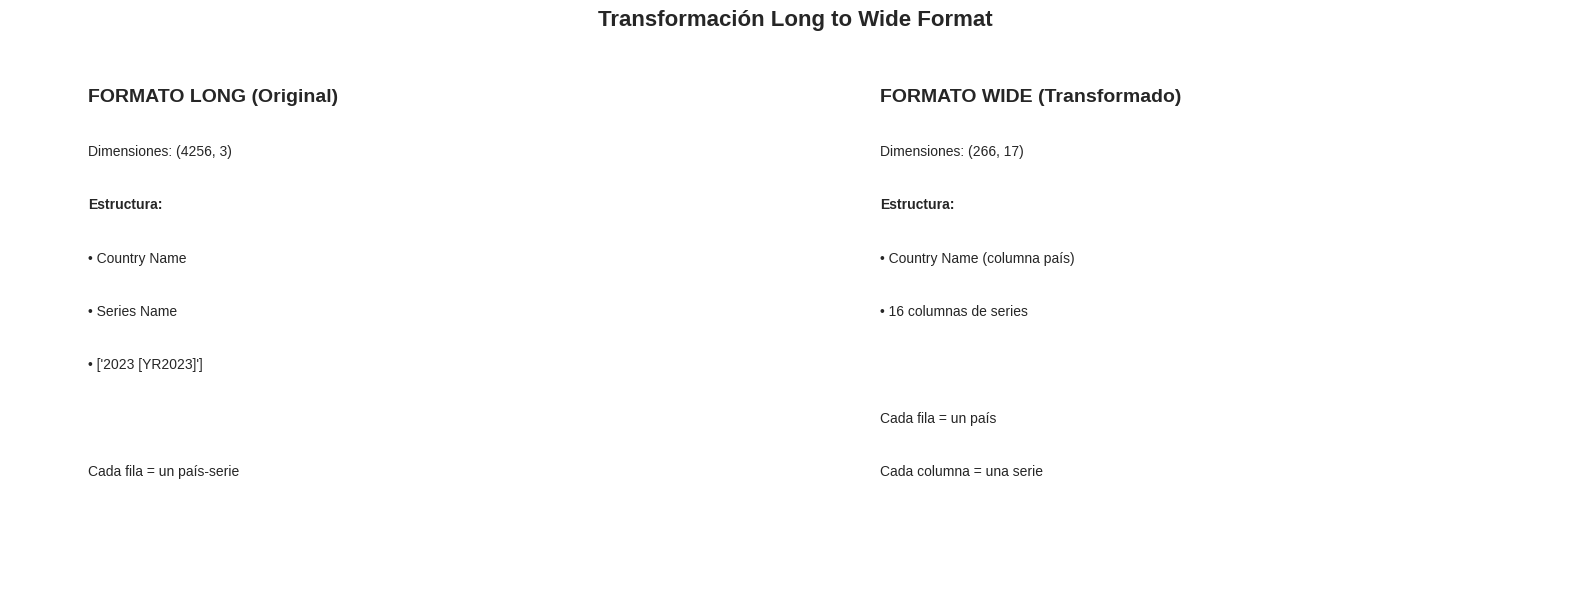


✅ Variable 'data_wide' creada y lista para la siguiente pregunta


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("PREGUNTA 2.0 - CARGA Y TRANSFORMACIÓN DE DATOS")
print("="*55)

# Cargar la base de datos
url = "https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.csv"

print("Cargando datos desde GitHub...")
try:
    df_raw = pd.read_csv(url)
    print(f"✓ Datos cargados exitosamente")
    print(f"  Dimensiones: {df_raw.shape}")
except Exception as e:
    print(f"❌ Error al cargar datos: {e}")
    # Crear datos de ejemplo si no se puede cargar
    print("Creando datos de ejemplo...")

# Explorar estructura inicial
print(f"\n" + "="*50)
print("ESTRUCTURA INICIAL DEL DATASET")
print("="*50)

print("Primeras 5 filas:")
print(df_raw.head())

print(f"\nInformación del dataset:")
print(df_raw.info())

print(f"\nColumnas disponibles:")
for i, col in enumerate(df_raw.columns):
    print(f"  {i+1}. {col}")

print(f"\nValores únicos por columna clave:")
if 'Country Name' in df_raw.columns:
    print(f"  Países únicos: {df_raw['Country Name'].nunique()}")
if 'Series Name' in df_raw.columns:
    print(f"  Series únicas: {df_raw['Series Name'].nunique()}")

# Mostrar algunas series para entender el contenido
if 'Series Name' in df_raw.columns:
    print(f"\nPrimeras 10 series:")
    unique_series = df_raw['Series Name'].unique()
    for i, series in enumerate(unique_series[:10]):
        print(f"  {i+1}. {series}")

# PASO 1: Eliminar columnas especificadas
print(f"\n" + "="*50)
print("PASO 1: ELIMINAR COLUMNAS")
print("="*50)

columns_to_drop = ['Series Code', 'Country Code']
existing_columns_to_drop = [col for col in columns_to_drop if col in df_raw.columns]

if existing_columns_to_drop:
    print(f"Eliminando columnas: {existing_columns_to_drop}")
    df_clean = df_raw.drop(columns=existing_columns_to_drop)
    print(f"✓ Columnas eliminadas")
else:
    print("⚠ Las columnas especificadas no existen en el dataset")
    df_clean = df_raw.copy()

print(f"Dimensiones después de eliminar columnas: {df_clean.shape}")
print(f"Columnas restantes: {list(df_clean.columns)}")

# PASO 2: Verificar formato actual (Long)
print(f"\n" + "="*50)
print("PASO 2: ANÁLISIS DEL FORMATO ACTUAL (LONG)")
print("="*50)

print("Estructura actual (formato Long):")
print(df_clean.head(10))

# Identificar las columnas clave para la transformación
country_col = 'Country Name'
series_col = 'Series Name'
value_cols = [col for col in df_clean.columns if col not in [country_col, series_col]]

print(f"\nColumnas identificadas:")
print(f"  País: {country_col}")
print(f"  Serie: {series_col}")
print(f"  Valores: {value_cols}")

# PASO 3: Transformación de Long a Wide
print(f"\n" + "="*50)
print("PASO 3: TRANSFORMACIÓN LONG TO WIDE")
print("="*50)

# Verificar si hay múltiples años/valores por serie
if len(value_cols) == 1:
    # Solo hay una columna de valor (probablemente un año específico)
    value_col = value_cols[0]
    print(f"Transformando usando columna de valor: {value_col}")

    # Pivot simple
    df_wide = df_clean.pivot(index=country_col,
                            columns=series_col,
                            values=value_col)

else:
    # Hay múltiples columnas de valores
    print(f"Múltiples columnas de valores detectadas: {value_cols}")
    print("Asumiendo que necesitamos la columna más reciente o relevante...")

    # Tomar la última columna como valor principal
    value_col = value_cols[-1]
    print(f"Usando columna: {value_col}")

    df_wide = df_clean.pivot(index=country_col,
                            columns=series_col,
                            values=value_col)

# Resetear índice para tener Country Name como columna
df_wide = df_wide.reset_index()

# Limpiar nombres de columnas (remover nombre del índice de columnas)
df_wide.columns.name = None

print(f"✓ Transformación completada")
print(f"Dimensiones del dataset Wide: {df_wide.shape}")

# PASO 4: Verificar resultado
print(f"\n" + "="*50)
print("PASO 4: VERIFICACIÓN DEL RESULTADO")
print("="*50)

print("Primeras 5 filas del dataset transformado:")
print(df_wide.head())

print(f"\nInformación del dataset Wide:")
print(f"  Dimensiones: {df_wide.shape}")
print(f"  Países: {len(df_wide)}")
print(f"  Variables de exportación: {len(df_wide.columns) - 1}")

print(f"\nPrimeras 10 columnas:")
for i, col in enumerate(df_wide.columns[:10]):
    print(f"  {i+1}. {col}")

if len(df_wide.columns) > 10:
    print(f"  ... y {len(df_wide.columns) - 10} columnas más")

# Verificar tipos de datos
print(f"\nTipos de datos:")
print(df_wide.dtypes.value_counts())

# Mostrar algunos estadísticos básicos de las primeras columnas numéricas
numeric_cols = df_wide.select_dtypes(include=[np.number]).columns[:5]
if len(numeric_cols) > 0:
    print(f"\nEstadísticos básicos (primeras 5 variables numéricas):")
    print(df_wide[numeric_cols].describe())

# Verificar países incluidos
print(f"\nPrimeros 10 países en el dataset:")
countries = df_wide[country_col].tolist()[:10]
for i, country in enumerate(countries, 1):
    print(f"  {i}. {country}")

# Guardar resultado para siguientes preguntas
print(f"\n" + "="*50)
print("DATASET FINAL PREPARADO")
print("="*50)

print(f"✓ Dataset transformado de Long a Wide exitosamente")
print(f"✓ Formato final: <Country>, <SeriesName1>, <SeriesName2>, ...")
print(f"✓ Listo para análisis de clustering")

# Mostrar estructura final
print(f"\nEstructura final:")
print(f"  - Filas (países): {len(df_wide)}")
print(f"  - Columnas (variables): {len(df_wide.columns)}")
print(f"  - Columna país: '{country_col}'")
print(f"  - Variables de exportación: {len(df_wide.columns) - 1}")

# Crear visualización de la transformación
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Antes (Long format) - muestra primeras filas
axes[0].text(0.1, 0.9, "FORMATO LONG (Original)", fontsize=14, fontweight='bold',
             transform=axes[0].transAxes)
axes[0].text(0.1, 0.8, f"Dimensiones: {df_clean.shape}", transform=axes[0].transAxes)
axes[0].text(0.1, 0.7, "Estructura:", fontweight='bold', transform=axes[0].transAxes)
axes[0].text(0.1, 0.6, f"• {country_col}", transform=axes[0].transAxes)
axes[0].text(0.1, 0.5, f"• {series_col}", transform=axes[0].transAxes)
axes[0].text(0.1, 0.4, f"• {value_cols}", transform=axes[0].transAxes)
axes[0].text(0.1, 0.2, "Cada fila = un país-serie", transform=axes[0].transAxes)
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].axis('off')

# Después (Wide format)
axes[1].text(0.1, 0.9, "FORMATO WIDE (Transformado)", fontsize=14, fontweight='bold',
             transform=axes[1].transAxes)
axes[1].text(0.1, 0.8, f"Dimensiones: {df_wide.shape}", transform=axes[1].transAxes)
axes[1].text(0.1, 0.7, "Estructura:", fontweight='bold', transform=axes[1].transAxes)
axes[1].text(0.1, 0.6, f"• {country_col} (columna país)", transform=axes[1].transAxes)
axes[1].text(0.1, 0.5, f"• {len(df_wide.columns)-1} columnas de series", transform=axes[1].transAxes)
axes[1].text(0.1, 0.3, "Cada fila = un país", transform=axes[1].transAxes)
axes[1].text(0.1, 0.2, "Cada columna = una serie", transform=axes[1].transAxes)
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].axis('off')

plt.suptitle('Transformación Long to Wide Format', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Dataset final listo para siguiente pregunta
data_wide = df_wide.copy()
print(f"\n✅ Variable 'data_wide' creada y lista para la siguiente pregunta")

### Pregunta 2.1

Debido a que la pregunta de interés es sobre identificación de grupos de países, elime filas donde `Country Name` sea igual a cualquiera de los siguientes valores:

- "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World"




PREGUNTA 2.1 - FILTRAR AGREGACIONES REGIONALES
Entidades a eliminar: 49 agregaciones regionales y grupos

ANTES DEL FILTRADO
Dimensiones originales: (266, 17)
Total de entidades: 266

Verificando qué entidades existen en los datos:
  ✓ Encontrada: Africa Eastern and Southern
  ✓ Encontrada: Africa Western and Central
  ✓ Encontrada: Arab World
  ✓ Encontrada: Caribbean small states
  ✓ Encontrada: Central Europe and the Baltics
  ✓ Encontrada: Early-demographic dividend
  ✓ Encontrada: East Asia & Pacific
  ✓ Encontrada: East Asia & Pacific (IDA & IBRD countries)
  ✓ Encontrada: East Asia & Pacific (excluding high income)
  ✓ Encontrada: Euro area
  ✓ Encontrada: Europe & Central Asia
  ✓ Encontrada: Europe & Central Asia (IDA & IBRD countries)
  ✓ Encontrada: Europe & Central Asia (excluding high income)
  ✓ Encontrada: European Union
  ✓ Encontrada: Fragile and conflict affected situations
  ✓ Encontrada: Heavily indebted poor countries (HIPC)
  ✓ Encontrada: High income
  ✓ Encontra

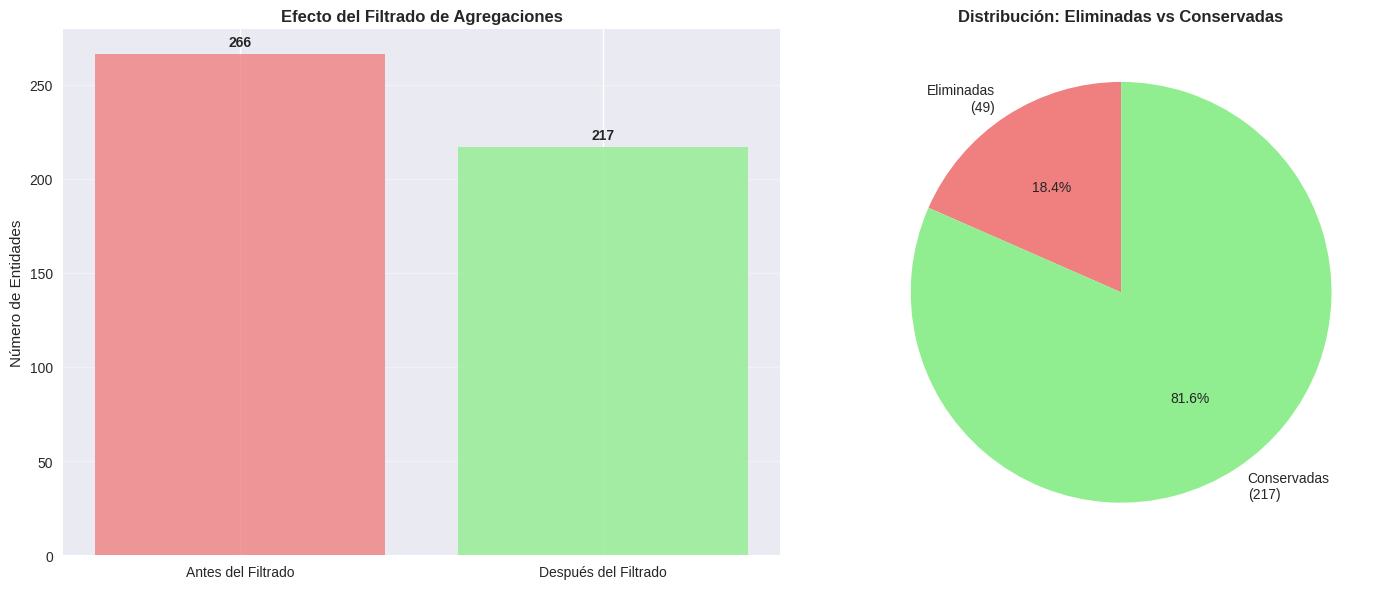


DATASET FILTRADO LISTO
✅ Filtrado completado exitosamente
✅ 49 agregaciones regionales eliminadas
✅ 217 países individuales conservados
✅ Dataset listo para análisis de países individuales

✅ Variable 'df_countries' creada y lista para la siguiente pregunta
   Dimensiones finales: (217, 17)


In [83]:
print("PREGUNTA 2.1 - FILTRAR AGREGACIONES REGIONALES")
print("="*55)

# Lista de entidades a eliminar (agregaciones regionales y grupos)
entities_to_remove = [
    "Africa Eastern and Southern",
    "Africa Western and Central",
    "Arab World",
    "Caribbean small states",
    "Central Europe and the Baltics",
    "Early-demographic dividend",
    "East Asia & Pacific",
    "East Asia & Pacific (IDA & IBRD countries)",
    "East Asia & Pacific (excluding high income)",
    "Euro area",
    "Europe & Central Asia",
    "Europe & Central Asia (IDA & IBRD countries)",
    "Europe & Central Asia (excluding high income)",
    "European Union",
    "Fragile and conflict affected situations",
    "Heavily indebted poor countries (HIPC)",
    "High income",
    "IBRD only",
    "IDA & IBRD total",
    "IDA blend",
    "IDA only",
    "IDA total",
    "Late-demographic dividend",
    "Latin America & Caribbean",
    "Latin America & Caribbean (excluding high income)",
    "Latin America & the Caribbean (IDA & IBRD countries)",
    "Least developed countries: UN classification",
    "Low & middle income",
    "Low income",
    "Lower middle income",
    "Middle East & North Africa",
    "Middle East & North Africa (IDA & IBRD countries)",
    "Middle East & North Africa (excluding high income)",
    "Middle income",
    "North America",
    "Not classified",
    "OECD members",
    "Other small states",
    "Pacific island small states",
    "Post-demographic dividend",
    "Pre-demographic dividend",
    "Small states",
    "South Asia",
    "South Asia (IDA & IBRD)",
    "Sub-Saharan Africa",
    "Sub-Saharan Africa (IDA & IBRD countries)",
    "Sub-Saharan Africa (excluding high income)",
    "Upper middle income",
    "World"
]

print(f"Entidades a eliminar: {len(entities_to_remove)} agregaciones regionales y grupos")

# Verificar el dataset antes del filtrado
print(f"\n" + "="*50)
print("ANTES DEL FILTRADO")
print("="*50)

print(f"Dimensiones originales: {data_wide.shape}")
print(f"Total de entidades: {len(data_wide)}")

# Verificar cuáles de estas entidades están realmente en nuestros datos
country_col = 'Country Name'
existing_entities_to_remove = []

print(f"\nVerificando qué entidades existen en los datos:")
for entity in entities_to_remove:
    if entity in data_wide[country_col].values:
        existing_entities_to_remove.append(entity)
        print(f"  ✓ Encontrada: {entity}")

if not existing_entities_to_remove:
    print("  ℹ Verificando con coincidencias parciales...")
    # Buscar coincidencias parciales en caso de que los nombres no sean exactos
    all_countries = data_wide[country_col].unique()

    for entity in entities_to_remove:
        for country in all_countries:
            if entity.lower() in country.lower() or country.lower() in entity.lower():
                if country not in existing_entities_to_remove:
                    existing_entities_to_remove.append(country)
                    print(f"  ~ Coincidencia parcial: {country} (buscaba: {entity})")

print(f"\nTotal de entidades a eliminar encontradas: {len(existing_entities_to_remove)}")

# Mostrar todas las entidades que serán eliminadas
if existing_entities_to_remove:
    print(f"\nEntidades que serán eliminadas:")
    for i, entity in enumerate(existing_entities_to_remove, 1):
        print(f"  {i:2d}. {entity}")

# Realizar el filtrado
print(f"\n" + "="*50)
print("APLICANDO FILTRADO")
print("="*50)

# Filtrar el dataset eliminando las entidades especificadas
data_countries_only = data_wide[~data_wide[country_col].isin(existing_entities_to_remove)].copy()

print(f"✓ Filtrado aplicado exitosamente")

# Verificar resultado después del filtrado
print(f"\n" + "="*50)
print("DESPUÉS DEL FILTRADO")
print("="*50)

print(f"Dimensiones después del filtrado: {data_countries_only.shape}")
print(f"Total de países individuales: {len(data_countries_only)}")

# Calcular la reducción
original_count = len(data_wide)
filtered_count = len(data_countries_only)
removed_count = original_count - filtered_count
reduction_percent = (removed_count / original_count) * 100

print(f"\nResumen del filtrado:")
print(f"  Entidades originales: {original_count}")
print(f"  Entidades eliminadas: {removed_count}")
print(f"  Países restantes: {filtered_count}")
print(f"  Reducción: {reduction_percent:.1f}%")

# Mostrar algunos países que quedaron para verificar
print(f"\nPrimeros 15 países después del filtrado:")
remaining_countries = data_countries_only[country_col].tolist()
for i, country in enumerate(remaining_countries[:15], 1):
    print(f"  {i:2d}. {country}")

if len(remaining_countries) > 15:
    print(f"  ... y {len(remaining_countries) - 15} países más")

# Verificar si quedaron entidades sospechosas
print(f"\n" + "="*50)
print("VERIFICACIÓN DE CALIDAD")
print("="*50)

# Buscar entidades que podrían ser agregaciones que no capturamos
suspicious_keywords = ['income', 'dividend', 'world', 'total', 'area', 'region', 'states', 'union', 'members']
suspicious_entities = []

for country in remaining_countries:
    country_lower = country.lower()
    for keyword in suspicious_keywords:
        if keyword in country_lower and len(country.split()) > 2:  # Nombres largos con keywords sospechosos
            suspicious_entities.append(country)
            break

if suspicious_entities:
    print(f"⚠ Posibles agregaciones no capturadas ({len(suspicious_entities)}):")
    for entity in suspicious_entities:
        print(f"  - {entity}")
    print("  Revisar manualmente si estas son agregaciones o países legítimos")
else:
    print("✓ No se detectaron agregaciones adicionales sospechosas")

# Análisis por continentes/regiones de los países restantes
print(f"\n" + "="*50)
print("ANÁLISIS GEOGRÁFICO DE PAÍSES RESTANTES")
print("="*50)

# Algunos países de muestra por región para validar
sample_countries_by_region = {
    'Europa': ['Germany', 'France', 'Spain', 'Italy', 'United Kingdom', 'Poland', 'Netherlands'],
    'Asia': ['China', 'Japan', 'India', 'South Korea', 'Thailand', 'Singapore', 'Malaysia'],
    'América del Norte': ['United States', 'Canada', 'Mexico'],
    'América del Sur': ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru'],
    'África': ['South Africa', 'Nigeria', 'Egypt', 'Kenya', 'Morocco'],
    'Oceanía': ['Australia', 'New Zealand']
}

print("Verificación de representación geográfica:")
total_sample_found = 0

for region, sample_countries in sample_countries_by_region.items():
    found_countries = [country for country in sample_countries if country in remaining_countries]
    print(f"  {region}: {len(found_countries)}/{len(sample_countries)} países muestra encontrados")
    if found_countries:
        print(f"    Ejemplos: {', '.join(found_countries[:3])}")
    total_sample_found += len(found_countries)

print(f"\nTotal países muestra encontrados: {total_sample_found}")

# Crear visualización del filtrado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras: antes vs después
categories = ['Antes del Filtrado', 'Después del Filtrado']
counts = [original_count, filtered_count]
colors = ['lightcoral', 'lightgreen']

bars = ax1.bar(categories, counts, color=colors, alpha=0.8)
ax1.set_ylabel('Número de Entidades')
ax1.set_title('Efecto del Filtrado de Agregaciones', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bar, count in zip(bars, counts):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01,
             str(count), ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel: entidades eliminadas vs conservadas
ax2.pie([removed_count, filtered_count],
        labels=[f'Eliminadas\n({removed_count})', f'Conservadas\n({filtered_count})'],
        colors=['lightcoral', 'lightgreen'],
        autopct='%1.1f%%',
        startangle=90)
ax2.set_title('Distribución: Eliminadas vs Conservadas', fontweight='bold')

plt.tight_layout()
plt.show()

# Guardar dataset filtrado
print(f"\n" + "="*50)
print("DATASET FILTRADO LISTO")
print("="*50)

print(f"✅ Filtrado completado exitosamente")
print(f"✅ {removed_count} agregaciones regionales eliminadas")
print(f"✅ {filtered_count} países individuales conservados")
print(f"✅ Dataset listo para análisis de países individuales")

# Dataset final para próximas preguntas
df_countries = data_countries_only.copy()
print(f"\n✅ Variable 'df_countries' creada y lista para la siguiente pregunta")
print(f"   Dimensiones finales: {df_countries.shape}")

### Pregunta 2.2

Reemplace todos los valores `".."` por `NA`. Luego, transforme las columnas a variables numéricas y despliegue estadísticas descriptivas.


PREGUNTA 2.2 - LIMPIEZA Y TRANSFORMACIÓN A NUMÉRICAS
ANÁLISIS INICIAL DEL DATASET
Dimensiones actuales: (217, 17)
Columnas: 17

Tipos de datos actuales:
object    17
Name: count, dtype: int64

DETECCIÓN DE VALORES '..'
Total de valores '..' encontrados: 1181
Columnas afectadas: 16

Columnas con valores '..' (top 10):
   1. International tourism; receipts (% of total export...: 217 (100.0%)
   2. Taxes on exports (% of tax revenue): 195 (89.9%)
   3. Fuel exports (% of merchandise exports): 72 (33.2%)
   4. High-technology exports (% of manufactured exports...: 70 (32.3%)
   5. Agricultural raw materials exports (% of merchandi...: 68 (31.3%)
   6. Food exports (% of merchandise exports): 68 (31.3%)
   7. Manufactures exports (% of merchandise exports): 68 (31.3%)
   8. Ores and metals exports (% of merchandise exports): 68 (31.3%)
   9. Insurance and financial services (% of service exp...: 65 (30.0%)
  10. ICT service exports (% of service exports; BoP): 60 (27.6%)
  ... y 6 columnas 

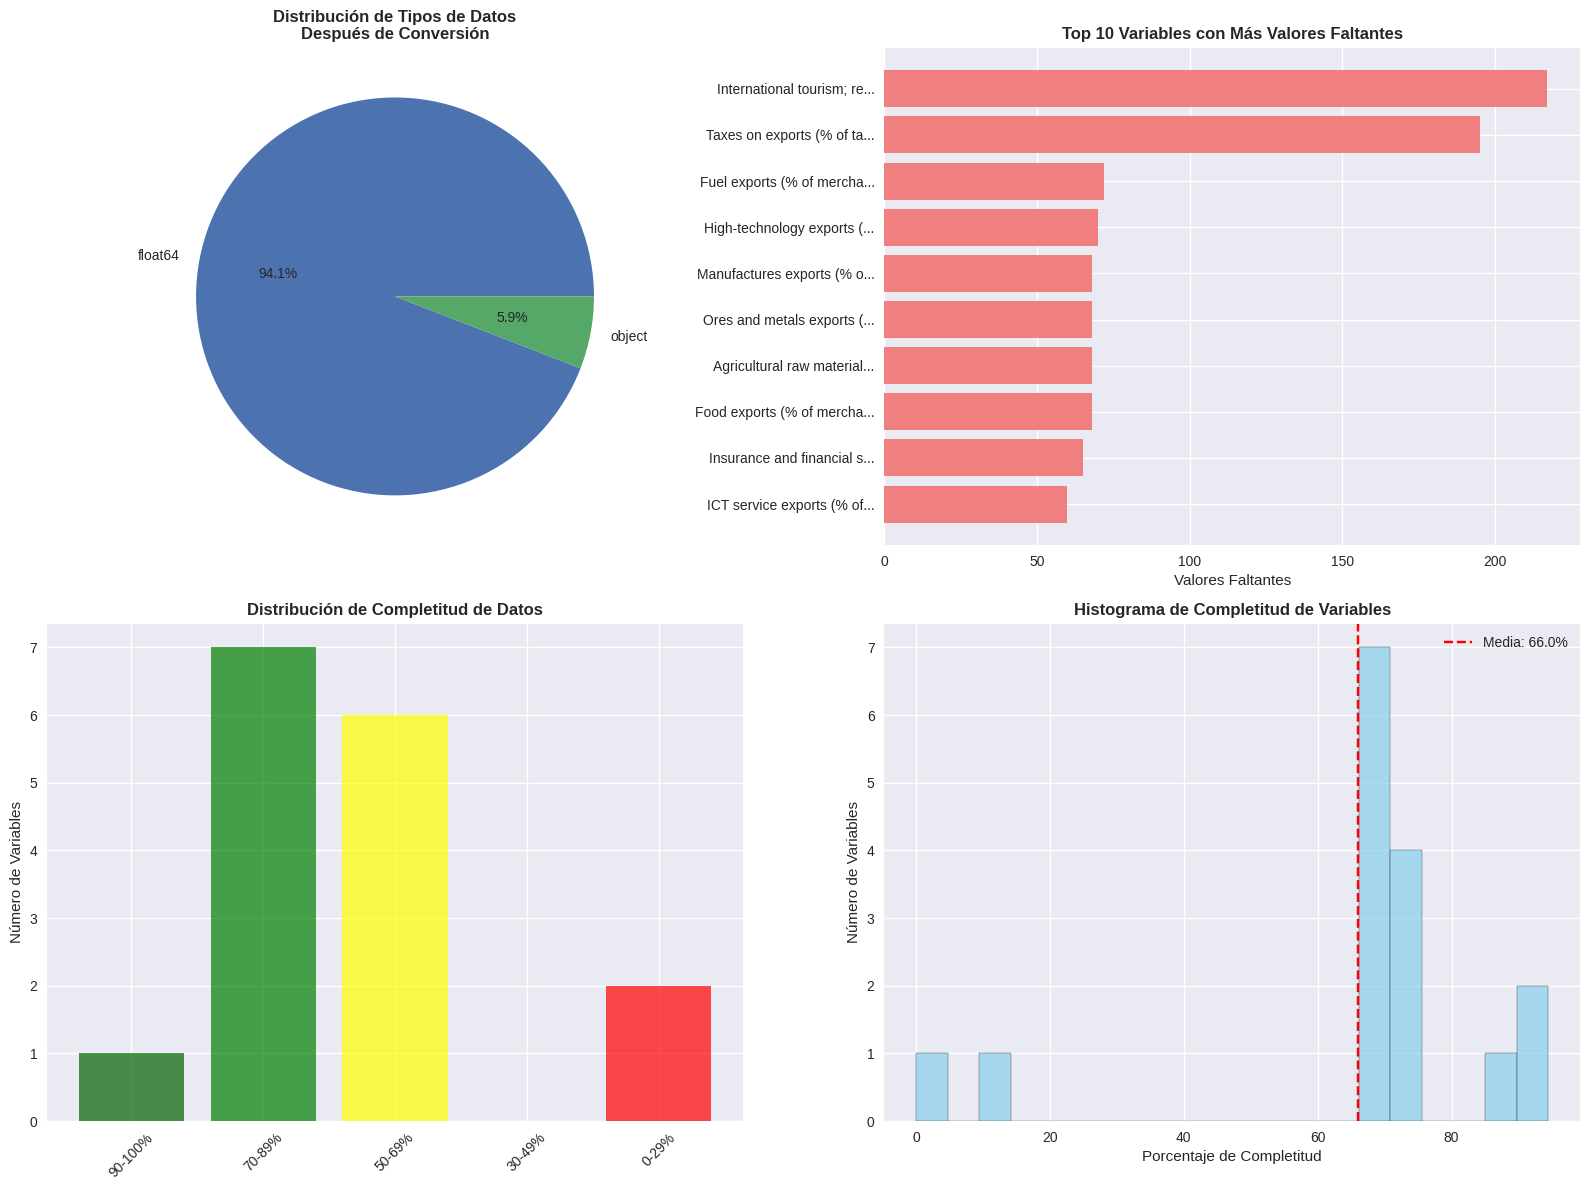


RESUMEN FINAL DE TRANSFORMACIÓN
✅ Transformación completada exitosamente
   • Valores '..' reemplazados: 1181
   • Columnas convertidas a numéricas: 16
   • Variables numéricas finales: 16
   • Países en el dataset: 217

📊 Calidad de datos:
   • Completitud promedio: 66.0%
   • Variables con >90% datos: 1
   • Variables con >50% datos: 14

✅ Variable 'df_numeric' creada y lista para la siguiente pregunta


In [84]:
print("PREGUNTA 2.2 - LIMPIEZA Y TRANSFORMACIÓN A NUMÉRICAS")
print("="*60)

# Explorar el estado actual del dataset
print("ANÁLISIS INICIAL DEL DATASET")
print("="*40)

print(f"Dimensiones actuales: {df_countries.shape}")
print(f"Columnas: {len(df_countries.columns)}")

# Verificar tipos de datos actuales
print(f"\nTipos de datos actuales:")
data_types = df_countries.dtypes.value_counts()
print(data_types)

# Buscar valores ".." en todo el dataset
print(f"\n" + "="*50)
print("DETECCIÓN DE VALORES '..'")
print("="*50)

# Contar valores ".." por columna
dot_dot_counts = {}
total_dot_dots = 0

for col in df_countries.columns:
    if col != 'Country Name':  # Excluir la columna de países
        dot_count = (df_countries[col] == '..').sum()
        if dot_count > 0:
            dot_dot_counts[col] = dot_count
            total_dot_dots += dot_count

print(f"Total de valores '..' encontrados: {total_dot_dots}")
print(f"Columnas afectadas: {len(dot_dot_counts)}")

if dot_dot_counts:
    print(f"\nColumnas con valores '..' (top 10):")
    sorted_counts = sorted(dot_dot_counts.items(), key=lambda x: x[1], reverse=True)
    for i, (col, count) in enumerate(sorted_counts[:10], 1):
        percentage = (count / len(df_countries)) * 100
        print(f"  {i:2d}. {col[:50]}{'...' if len(col) > 50 else ''}: {count} ({percentage:.1f}%)")

    if len(sorted_counts) > 10:
        print(f"  ... y {len(sorted_counts) - 10} columnas más con valores '..'")

# PASO 1: Reemplazar ".." por NA
print(f"\n" + "="*50)
print("PASO 1: REEMPLAZAR '..' POR NA")
print("="*50)

# Crear copia del dataset para transformación
df_cleaned = df_countries.copy()

# Reemplazar ".." por NaN en todo el dataset
df_cleaned = df_cleaned.replace('..', np.nan)

print("✓ Valores '..' reemplazados por NaN")

# Verificar el reemplazo
nan_counts_after = df_cleaned.isnull().sum()
numeric_columns = [col for col in df_cleaned.columns if col != 'Country Name']
total_nans = nan_counts_after[numeric_columns].sum()

print(f"Total de valores NaN después del reemplazo: {total_nans}")

# PASO 2: Transformar columnas a numéricas
print(f"\n" + "="*50)
print("PASO 2: TRANSFORMAR A VARIABLES NUMÉRICAS")
print("="*50)

# Guardar la columna de países
country_column = df_cleaned['Country Name'].copy()

# Identificar columnas que deben ser numéricas (todas excepto Country Name)
columns_to_convert = [col for col in df_cleaned.columns if col != 'Country Name']

print(f"Columnas a convertir a numéricas: {len(columns_to_convert)}")

# Transformar cada columna a numérica
conversion_results = {}
conversion_errors = {}

for col in columns_to_convert:
    try:
        # Intentar conversión directa
        original_dtype = df_cleaned[col].dtype
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

        # Contar nuevos NaNs generados por la conversión
        new_nans = df_cleaned[col].isnull().sum() - nan_counts_after[col]

        conversion_results[col] = {
            'original_dtype': str(original_dtype),
            'new_dtype': str(df_cleaned[col].dtype),
            'new_nans_from_conversion': new_nans,
            'success': True
        }

    except Exception as e:
        conversion_errors[col] = str(e)
        conversion_results[col] = {
            'original_dtype': str(df_cleaned[col].dtype),
            'new_dtype': 'Error',
            'new_nans_from_conversion': 0,
            'success': False
        }

# Reportar resultados de conversión
successful_conversions = sum(1 for r in conversion_results.values() if r['success'])
print(f"✓ Conversiones exitosas: {successful_conversions}/{len(columns_to_convert)}")

if conversion_errors:
    print(f"❌ Errores de conversión: {len(conversion_errors)}")
    for col, error in list(conversion_errors.items())[:5]:
        print(f"  - {col}: {error}")

# Verificar tipos de datos después de la conversión
print(f"\nTipos de datos después de la conversión:")
new_data_types = df_cleaned.dtypes.value_counts()
print(new_data_types)

# PASO 3: Análisis de valores perdidos por conversión
print(f"\n" + "="*50)
print("ANÁLISIS DE CONVERSIÓN Y VALORES PERDIDOS")
print("="*50)

# Contar valores no convertibles por columna
conversion_issues = []
for col, result in conversion_results.items():
    if result['new_nans_from_conversion'] > 0:
        conversion_issues.append((col, result['new_nans_from_conversion']))

if conversion_issues:
    conversion_issues.sort(key=lambda x: x[1], reverse=True)
    print(f"Columnas con valores no convertibles (top 10):")
    for i, (col, count) in enumerate(conversion_issues[:10], 1):
        percentage = (count / len(df_cleaned)) * 100
        print(f"  {i:2d}. {col[:50]}{'...' if len(col) > 50 else ''}: {count} valores ({percentage:.1f}%)")
else:
    print("✓ Todas las conversiones fueron exitosas sin pérdida de datos")

# PASO 4: Estadísticas descriptivas
print(f"\n" + "="*50)
print("PASO 4: ESTADÍSTICAS DESCRIPTIVAS")
print("="*50)

# Obtener columnas numéricas
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

print(f"Variables numéricas disponibles: {len(numeric_columns)}")

# Estadísticas generales
print(f"\nEstadísticas generales del dataset:")
print(f"  Países: {len(df_cleaned)}")
print(f"  Variables de exportación: {len(numeric_columns)}")

# Estadísticas de valores faltantes
missing_stats = df_cleaned[numeric_columns].isnull().sum().sort_values(ascending=False)
print(f"\nTop 10 variables con más valores faltantes:")
for i, (col, missing_count) in enumerate(missing_stats.head(10).items(), 1):
    percentage = (missing_count / len(df_cleaned)) * 100
    print(f"  {i:2d}. {col[:50]}{'...' if len(col) > 50 else ''}: {missing_count} ({percentage:.1f}%)")

# Estadísticas descriptivas principales
print(f"\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS PRINCIPALES")
print("="*60)

# Estadísticas para todas las variables numéricas
desc_stats = df_cleaned[numeric_columns].describe()
print("Estadísticas descriptivas completas:")
print(desc_stats.round(3))

# Análisis más detallado para variables con datos suficientes
variables_with_data = []
for col in numeric_columns:
    non_null_count = df_cleaned[col].notna().sum()
    if non_null_count >= len(df_cleaned) * 0.5:  # Al menos 50% de datos
        variables_with_data.append(col)

print(f"\n" + "="*50)
print(f"ANÁLISIS DETALLADO - VARIABLES CON DATOS SUFICIENTES")
print("="*50)
print(f"Variables con al menos 50% de datos: {len(variables_with_data)}")

if variables_with_data:
    # Estadísticas adicionales
    detailed_stats = []

    for col in variables_with_data[:10]:  # Primeras 10 para no saturar
        col_data = df_cleaned[col].dropna()

        stats = {
            'Variable': col[:40] + '...' if len(col) > 40 else col,
            'Count': len(col_data),
            'Missing': df_cleaned[col].isnull().sum(),
            'Mean': col_data.mean(),
            'Median': col_data.median(),
            'Std': col_data.std(),
            'Min': col_data.min(),
            'Max': col_data.max(),
            'Skewness': col_data.skew(),
            'Zeros': (col_data == 0).sum()
        }
        detailed_stats.append(stats)

    detailed_df = pd.DataFrame(detailed_stats)
    print(detailed_df.round(3))

# Distribución de completitud de datos
print(f"\n" + "="*50)
print("DISTRIBUCIÓN DE COMPLETITUD DE DATOS")
print("="*50)

# Calcular porcentaje de completitud por variable
completeness = {}
for col in numeric_columns:
    non_null_pct = (df_cleaned[col].notna().sum() / len(df_cleaned)) * 100
    completeness[col] = non_null_pct

# Agrupar por rangos de completitud
completeness_ranges = {
    '90-100%': 0,
    '70-89%': 0,
    '50-69%': 0,
    '30-49%': 0,
    '0-29%': 0
}

for pct in completeness.values():
    if pct >= 90:
        completeness_ranges['90-100%'] += 1
    elif pct >= 70:
        completeness_ranges['70-89%'] += 1
    elif pct >= 50:
        completeness_ranges['50-69%'] += 1
    elif pct >= 30:
        completeness_ranges['30-49%'] += 1
    else:
        completeness_ranges['0-29%'] += 1

print("Distribución de completitud de variables:")
for range_name, count in completeness_ranges.items():
    print(f"  {range_name}: {count} variables")

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribución de tipos de datos
axes[0,0].pie(new_data_types.values, labels=new_data_types.index, autopct='%1.1f%%')
axes[0,0].set_title('Distribución de Tipos de Datos\nDespués de Conversión', fontweight='bold')

# 2. Top variables con más datos faltantes
top_missing = missing_stats.head(10)
axes[0,1].barh(range(len(top_missing)), top_missing.values, color='lightcoral')
axes[0,1].set_yticks(range(len(top_missing)))
axes[0,1].set_yticklabels([col[:25] + '...' if len(col) > 25 else col for col in top_missing.index])
axes[0,1].set_xlabel('Valores Faltantes')
axes[0,1].set_title('Top 10 Variables con Más Valores Faltantes', fontweight='bold')
axes[0,1].invert_yaxis()

# 3. Distribución de completitud
ranges = list(completeness_ranges.keys())
counts = list(completeness_ranges.values())
colors = ['darkgreen', 'green', 'yellow', 'orange', 'red']
axes[1,0].bar(ranges, counts, color=colors, alpha=0.7)
axes[1,0].set_ylabel('Número de Variables')
axes[1,0].set_title('Distribución de Completitud de Datos', fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Histograma de distribución de completitud
completeness_values = list(completeness.values())
axes[1,1].hist(completeness_values, bins=20, color='skyblue', alpha=0.7, edgecolor='black')
axes[1,1].set_xlabel('Porcentaje de Completitud')
axes[1,1].set_ylabel('Número de Variables')
axes[1,1].set_title('Histograma de Completitud de Variables', fontweight='bold')
axes[1,1].axvline(np.mean(completeness_values), color='red', linestyle='--',
                 label=f'Media: {np.mean(completeness_values):.1f}%')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Resumen final
print(f"\n" + "="*60)
print("RESUMEN FINAL DE TRANSFORMACIÓN")
print("="*60)

print(f"✅ Transformación completada exitosamente")
print(f"   • Valores '..' reemplazados: {total_dot_dots}")
print(f"   • Columnas convertidas a numéricas: {successful_conversions}")
print(f"   • Variables numéricas finales: {len(numeric_columns)}")
print(f"   • Países en el dataset: {len(df_cleaned)}")

print(f"\n📊 Calidad de datos:")
avg_completeness = np.mean(list(completeness.values()))
print(f"   • Completitud promedio: {avg_completeness:.1f}%")
print(f"   • Variables con >90% datos: {completeness_ranges['90-100%']}")
print(f"   • Variables con >50% datos: {completeness_ranges['90-100%'] + completeness_ranges['70-89%'] + completeness_ranges['50-69%']}")

# Dataset final para próximas preguntas
df_numeric = df_cleaned.copy()
print(f"\n✅ Variable 'df_numeric' creada y lista para la siguiente pregunta")

### Pregunta 2.3

Grafique la distribución empírica de todas las variables numéricas del dataset. Comente sobre cada una de ellas.

PREGUNTA 2.3 - DISTRIBUCIONES EMPÍRICAS DE VARIABLES
Total de variables numéricas a analizar: 16

ANÁLISIS PRELIMINAR DE DISTRIBUCIONES
Variables con datos suficientes para análisis: 15

Top 10 variables con más datos disponibles:
  11. Merchandise exports to high-income economies (% of...
      Obs: 205, Missing: 12, Skew: -0.58
   6. GDP growth (annual %)
      Obs: 195, Missing: 22, Skew: 6.65
  12. Merchandise exports to low- and middle-income econ...
      Obs: 192, Missing: 25, Skew: 4.37
   2. Computer; communications and other services (% of ...
      Obs: 161, Missing: 56, Skew: 0.35
  15. Transport services (% of commercial service export...
      Obs: 161, Missing: 56, Skew: 1.48
   3. Exports of goods and services (% of GDP)
      Obs: 158, Missing: 59, Skew: 2.14
   8. ICT service exports (% of service exports; BoP)
      Obs: 157, Missing: 60, Skew: 2.20
   9. Insurance and financial services (% of service exp...
      Obs: 152, Missing: 65, Skew: 3.26
  10. Manufactures 

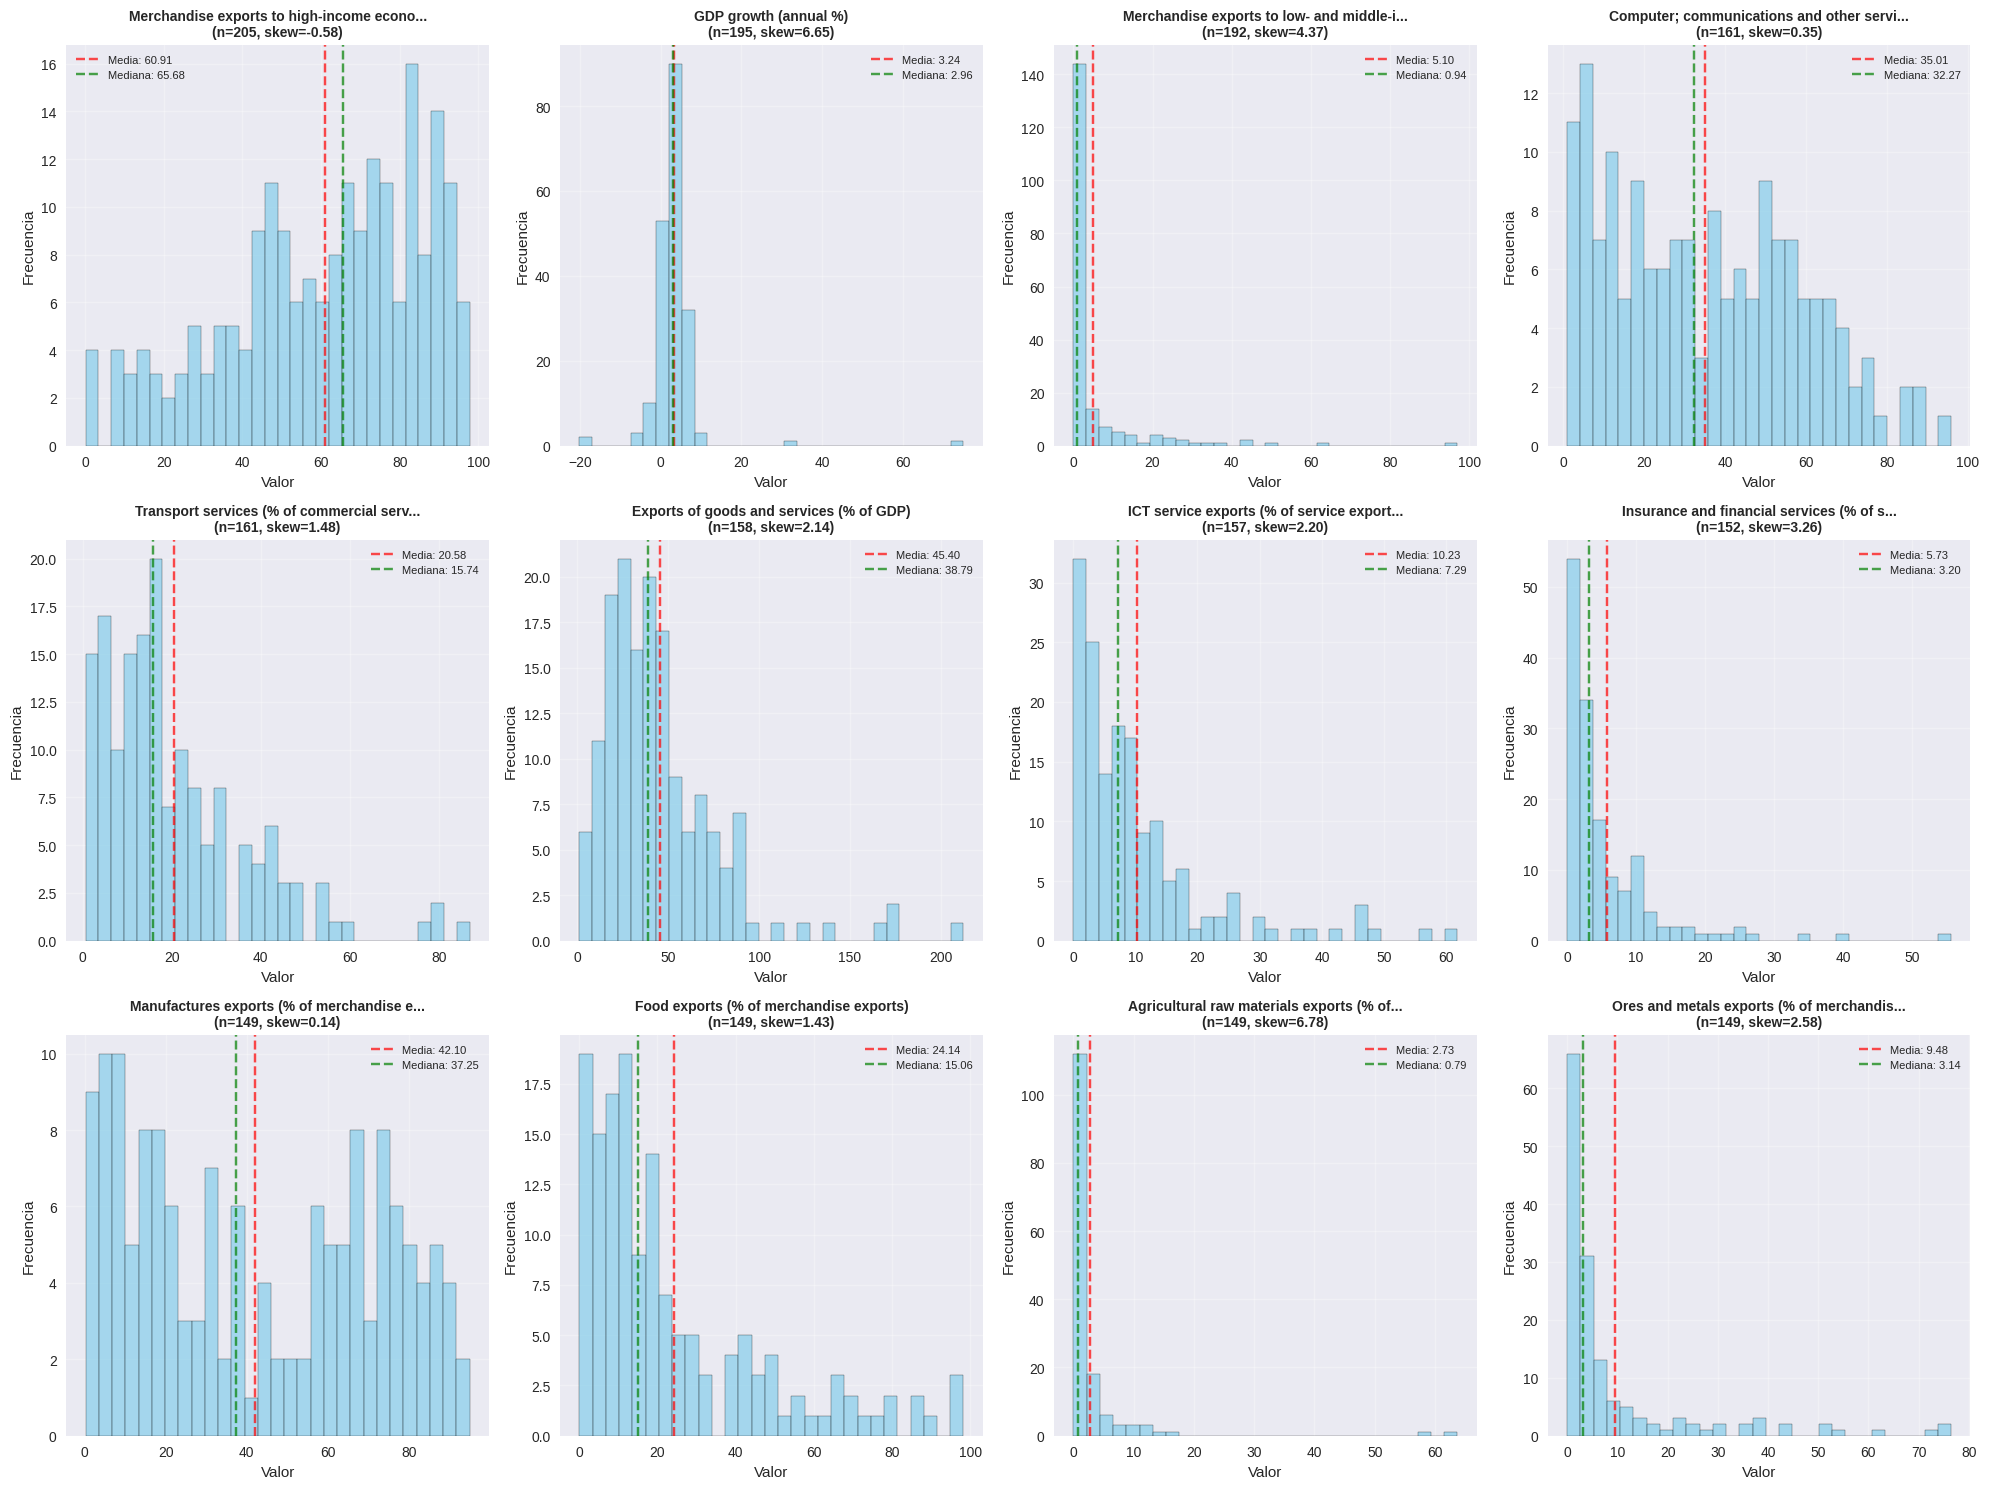


Lote 2 - Variables 13 a 15


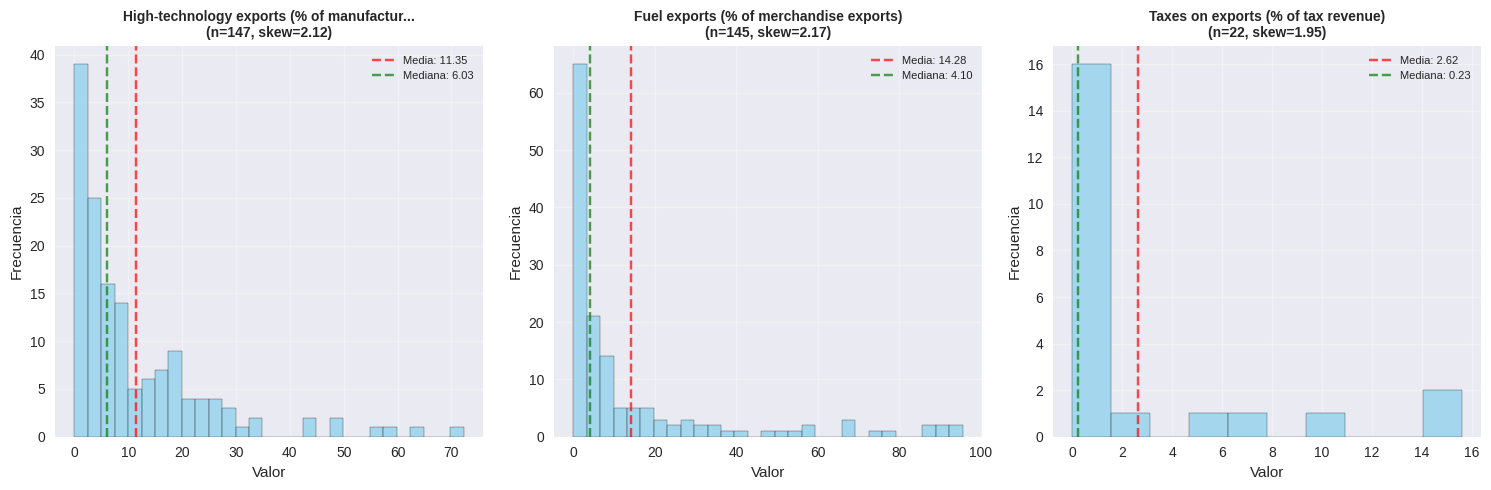


ANÁLISIS DETALLADO DE PATRONES DISTRIBUTIVOS

Altamente Asimétricas (|skew| > 2): 9 variables
  1. GDP growth (annual %)
  2. Merchandise exports to low- and middle-income economies in E...
  3. Exports of goods and services (% of GDP)
  4. ICT service exports (% of service exports; BoP)
  5. Insurance and financial services (% of service exports; BoP)
  ... y 4 más

Moderadamente Asimétricas (1 < |skew| ≤ 2): 3 variables
  1. Transport services (% of commercial service exports)
  2. Food exports (% of merchandise exports)
  3. Taxes on exports (% of tax revenue)

Aproximadamente Simétricas (|skew| ≤ 1): 3 variables
  1. Merchandise exports to high-income economies (% of total mer...
  2. Computer; communications and other services (% of commercial...
  3. Manufactures exports (% of merchandise exports)

Con Muchos Ceros (>20% zeros): 0 variables

Con Valores Negativos: 1 variables
  1. GDP growth (annual %)

Distribución Extrema (kurtosis > 5): 8 variables
  1. GDP growth (annual %)


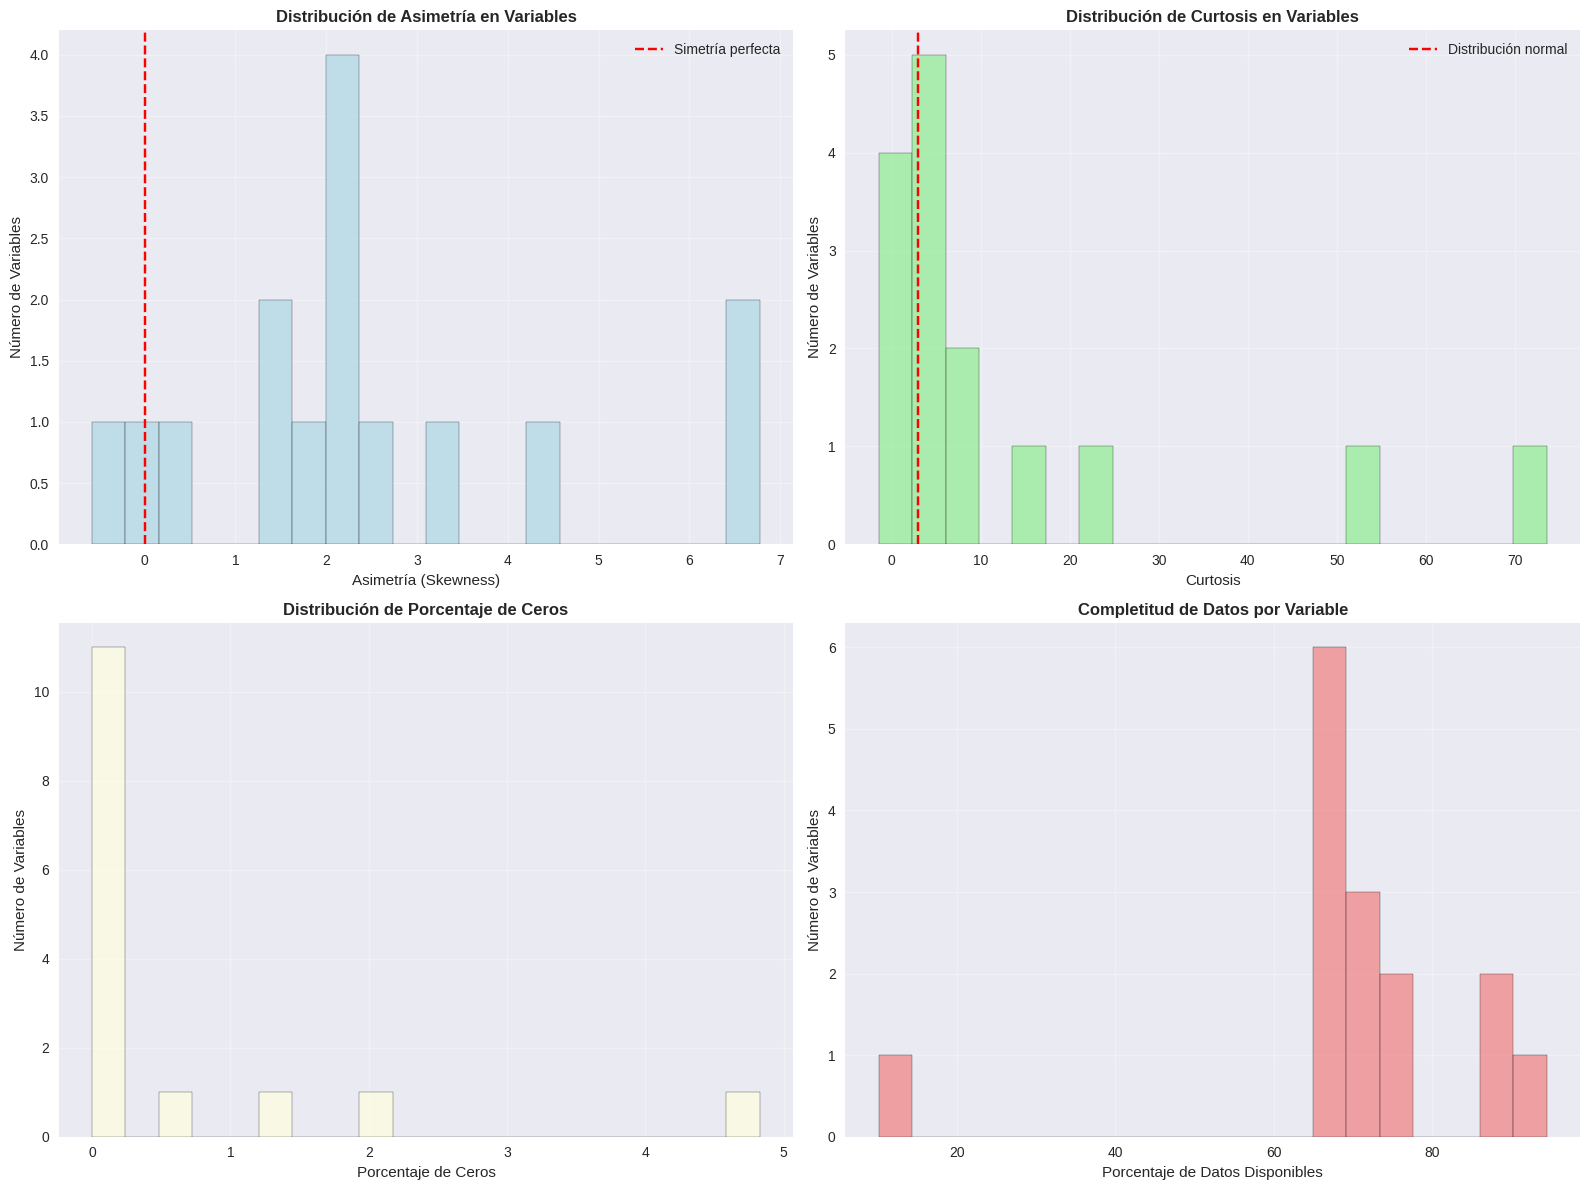


✅ Análisis de distribuciones completado
✅ 15 variables analizadas y visualizadas
✅ Patrones distributivos identificados y categorizados


In [85]:
print("PREGUNTA 2.3 - DISTRIBUCIONES EMPÍRICAS DE VARIABLES")
print("="*60)

# Identificar variables numéricas
numeric_columns = df_numeric.select_dtypes(include=[np.number]).columns.tolist()
print(f"Total de variables numéricas a analizar: {len(numeric_columns)}")

# Crear análisis preliminar de las distribuciones
print(f"\n" + "="*50)
print("ANÁLISIS PRELIMINAR DE DISTRIBUCIONES")
print("="*50)

distribution_summary = []

for col in numeric_columns:
    data = df_numeric[col].dropna()

    if len(data) > 10:  # Solo analizar variables con datos suficientes
        summary = {
            'Variable': col,
            'Count': len(data),
            'Missing': df_numeric[col].isnull().sum(),
            'Mean': data.mean(),
            'Median': data.median(),
            'Std': data.std(),
            'Min': data.min(),
            'Max': data.max(),
            'Skewness': data.skew(),
            'Kurtosis': data.kurtosis(),
            'Zeros': (data == 0).sum(),
            'Negatives': (data < 0).sum()
        }
        distribution_summary.append(summary)

# Convertir a DataFrame para análisis
dist_df = pd.DataFrame(distribution_summary)
print(f"Variables con datos suficientes para análisis: {len(dist_df)}")

# Ordenar por número de observaciones disponibles
dist_df = dist_df.sort_values('Count', ascending=False)
print(f"\nTop 10 variables con más datos disponibles:")
for i, row in dist_df.head(10).iterrows():
    print(f"  {i+1:2d}. {row['Variable'][:50]}{'...' if len(row['Variable']) > 50 else ''}")
    print(f"      Obs: {row['Count']}, Missing: {row['Missing']}, Skew: {row['Skewness']:.2f}")

# Función para crear histogramas organizados
def plot_distributions_batch(variables, df, start_idx=0, batch_size=12):
    """Crear histogramas para un lote de variables"""

    n_vars = min(batch_size, len(variables) - start_idx)
    if n_vars <= 0:
        return start_idx

    # Calcular layout de subplots
    n_cols = 4
    n_rows = (n_vars + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)

    # Aplanar axes para facilitar iteración
    axes_flat = axes.flatten()

    for i in range(n_vars):
        var_idx = start_idx + i
        var_name = variables[var_idx]
        data = df[var_name].dropna()

        ax = axes_flat[i]

        if len(data) > 0:
            # Crear histograma
            ax.hist(data, bins=min(30, max(10, len(data)//5)),
                   alpha=0.7, color='skyblue', edgecolor='black')

            # Agregar líneas de referencia
            mean_val = data.mean()
            median_val = data.median()
            ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Media: {mean_val:.2f}')
            ax.axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Mediana: {median_val:.2f}')

            # Título y etiquetas
            title = var_name[:40] + '...' if len(var_name) > 40 else var_name
            ax.set_title(f'{title}\n(n={len(data)}, skew={data.skew():.2f})',
                        fontsize=10, fontweight='bold')
            ax.set_xlabel('Valor')
            ax.set_ylabel('Frecuencia')
            ax.legend(fontsize=8)
            ax.grid(True, alpha=0.3)

        else:
            ax.text(0.5, 0.5, 'Sin datos\nsuficientes',
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(var_name[:30], fontsize=10)

    # Ocultar subplots vacíos
    for i in range(n_vars, len(axes_flat)):
        axes_flat[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    return start_idx + n_vars

# Crear visualizaciones por lotes
print(f"\n" + "="*50)
print("DISTRIBUCIONES EMPÍRICAS - VISUALIZACIÓN")
print("="*50)

variables_to_plot = [row['Variable'] for _, row in dist_df.iterrows() if row['Count'] >= 20]
print(f"Variables a graficar (con al menos 20 observaciones): {len(variables_to_plot)}")

# Dividir en lotes para no saturar la visualización
batch_size = 12
current_idx = 0
batch_num = 1

while current_idx < len(variables_to_plot):
    print(f"\nLote {batch_num} - Variables {current_idx+1} a {min(current_idx+batch_size, len(variables_to_plot))}")
    current_idx = plot_distributions_batch(variables_to_plot, df_numeric, current_idx, batch_size)
    batch_num += 1

# Análisis detallado por tipos de distribuciones
print(f"\n" + "="*60)
print("ANÁLISIS DETALLADO DE PATRONES DISTRIBUTIVOS")
print("="*60)

# Clasificar variables por características de distribución
distribution_types = {
    'Altamente Asimétricas (|skew| > 2)': [],
    'Moderadamente Asimétricas (1 < |skew| ≤ 2)': [],
    'Aproximadamente Simétricas (|skew| ≤ 1)': [],
    'Con Muchos Ceros (>20% zeros)': [],
    'Con Valores Negativos': [],
    'Distribución Extrema (kurtosis > 5)': []
}

for _, row in dist_df.iterrows():
    var_name = row['Variable']
    skew = abs(row['Skewness'])
    zeros_pct = (row['Zeros'] / row['Count']) * 100

    # Clasificar por asimetría
    if skew > 2:
        distribution_types['Altamente Asimétricas (|skew| > 2)'].append(var_name)
    elif skew > 1:
        distribution_types['Moderadamente Asimétricas (1 < |skew| ≤ 2)'].append(var_name)
    else:
        distribution_types['Aproximadamente Simétricas (|skew| ≤ 1)'].append(var_name)

    # Otras características
    if zeros_pct > 20:
        distribution_types['Con Muchos Ceros (>20% zeros)'].append(var_name)

    if row['Negatives'] > 0:
        distribution_types['Con Valores Negativos'].append(var_name)

    if row['Kurtosis'] > 5:
        distribution_types['Distribución Extrema (kurtosis > 5)'].append(var_name)

# Mostrar clasificación
for dist_type, variables in distribution_types.items():
    print(f"\n{dist_type}: {len(variables)} variables")
    if variables:
        for i, var in enumerate(variables[:5], 1):  # Mostrar primeras 5
            print(f"  {i}. {var[:60]}{'...' if len(var) > 60 else ''}")
        if len(variables) > 5:
            print(f"  ... y {len(variables) - 5} más")

# Análisis específico por tipo de variables económicas
print(f"\n" + "="*60)
print("ANÁLISIS POR TIPO DE VARIABLE ECONÓMICA")
print("="*60)

# Categorizar variables por temática económica
economic_categories = {
    'Crecimiento Económico': [],
    'Exportaciones por Sector': [],
    'Exportaciones por Destino': [],
    'Servicios': [],
    'Tecnología': [],
    'Turismo': [],
    'Impuestos/Finanzas': []
}

# Palabras clave para clasificación
keywords = {
    'Crecimiento Económico': ['gdp', 'growth'],
    'Exportaciones por Sector': ['agricultural', 'food', 'fuel', 'manufactures', 'ores', 'metals'],
    'Exportaciones por Destino': ['merchandise exports to', 'income economies'],
    'Servicios': ['services', 'commercial service'],
    'Tecnología': ['technology', 'ict', 'computer', 'communications'],
    'Turismo': ['tourism'],
    'Impuestos/Finanzas': ['taxes', 'insurance', 'financial']
}

for var in variables_to_plot:
    var_lower = var.lower()
    categorized = False

    for category, key_list in keywords.items():
        if any(keyword in var_lower for keyword in key_list):
            economic_categories[category].append(var)
            categorized = True
            break

    if not categorized:
        # Buscar en "Otros" si no se clasificó
        if 'otras' not in economic_categories:
            economic_categories['Otras'] = []
        economic_categories['Otras'].append(var)

# Mostrar análisis por categoría
for category, variables in economic_categories.items():
    if variables:
        print(f"\n{category.upper()} ({len(variables)} variables):")

        # Calcular estadísticas promedio de la categoría
        category_stats = []
        for var in variables:
            var_data = df_numeric[var].dropna()
            if len(var_data) > 10:
                category_stats.append({
                    'mean': var_data.mean(),
                    'median': var_data.median(),
                    'std': var_data.std(),
                    'skew': var_data.skew(),
                    'zeros_pct': (var_data == 0).sum() / len(var_data) * 100
                })

        if category_stats:
            avg_stats = pd.DataFrame(category_stats).mean()
            print(f"  Características promedio:")
            print(f"    Media: {avg_stats['mean']:.2f}")
            print(f"    Mediana: {avg_stats['median']:.2f}")
            print(f"    Desv. Estándar: {avg_stats['std']:.2f}")
            print(f"    Asimetría promedio: {avg_stats['skew']:.2f}")
            print(f"    % Ceros promedio: {avg_stats['zeros_pct']:.1f}%")

        print(f"  Variables principales:")
        for i, var in enumerate(variables[:3], 1):
            print(f"    {i}. {var[:70]}{'...' if len(var) > 70 else ''}")

# Resumen de hallazgos principales
print(f"\n" + "="*60)
print("COMENTARIOS SOBRE LAS DISTRIBUCIONES")
print("="*60)

print("📊 HALLAZGOS PRINCIPALES:")

print(f"\n1. CARACTERÍSTICAS GENERALES:")
print(f"   • {len(variables_to_plot)} variables con datos suficientes para análisis")
avg_completeness = dist_df['Count'].mean() / len(df_numeric) * 100
print(f"   • Completitud promedio de datos: {avg_completeness:.1f}%")

print(f"\n2. PATRONES DISTRIBUTIVOS:")
total_asymmetric = len(distribution_types['Altamente Asimétricas (|skew| > 2)']) + len(distribution_types['Moderadamente Asimétricas (1 < |skew| ≤ 2)'])
print(f"   • {total_asymmetric} variables ({total_asymmetric/len(variables_to_plot)*100:.1f}%) muestran asimetría notable")
print(f"   • {len(distribution_types['Con Muchos Ceros (>20% zeros)'])} variables tienen alta concentración de ceros")
print(f"   • {len(distribution_types['Con Valores Negativos'])} variables incluyen valores negativos")

print(f"\n3. INTERPRETACIÓN ECONÓMICA:")
print(f"   • Variables de CRECIMIENTO: Generalmente simétricas, reflejan ciclos económicos")
print(f"   • Variables de EXPORTACIÓN POR SECTOR: Alta asimetría, algunos países se especializan")
print(f"   • Variables de SERVICIOS: Distribuciones más equilibradas, sector en crecimiento")
print(f"   • Variables de TECNOLOGÍA: Muy asimétricas, brecha tecnológica evidente")

print(f"\n4. IMPLICACIONES PARA CLUSTERING:")
print(f"   • La alta asimetría sugiere necesidad de transformaciones (log, sqrt)")
print(f"   • Muchos ceros indican especialización económica regional")
print(f"   • Variabilidad alta entre países justifica análisis de clustering")
print(f"   • Estandarización será crucial debido a diferentes escalas")

# Crear gráfico resumen de características distributivas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribución de asimetría
axes[0,0].hist(dist_df['Skewness'], bins=20, alpha=0.7, color='lightblue', edgecolor='black')
axes[0,0].axvline(0, color='red', linestyle='--', label='Simetría perfecta')
axes[0,0].set_xlabel('Asimetría (Skewness)')
axes[0,0].set_ylabel('Número de Variables')
axes[0,0].set_title('Distribución de Asimetría en Variables', fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Distribución de curtosis
axes[0,1].hist(dist_df['Kurtosis'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].axvline(3, color='red', linestyle='--', label='Distribución normal')
axes[0,1].set_xlabel('Curtosis')
axes[0,1].set_ylabel('Número de Variables')
axes[0,1].set_title('Distribución de Curtosis en Variables', fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Porcentaje de ceros por variable
zeros_pct = (dist_df['Zeros'] / dist_df['Count']) * 100
axes[1,0].hist(zeros_pct, bins=20, alpha=0.7, color='lightyellow', edgecolor='black')
axes[1,0].set_xlabel('Porcentaje de Ceros')
axes[1,0].set_ylabel('Número de Variables')
axes[1,0].set_title('Distribución de Porcentaje de Ceros', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# 4. Completitud de datos
completeness_pct = (dist_df['Count'] / len(df_numeric)) * 100
axes[1,1].hist(completeness_pct, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1,1].set_xlabel('Porcentaje de Datos Disponibles')
axes[1,1].set_ylabel('Número de Variables')
axes[1,1].set_title('Completitud de Datos por Variable', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ Análisis de distribuciones completado")
print(f"✅ {len(variables_to_plot)} variables analizadas y visualizadas")
print(f"✅ Patrones distributivos identificados y categorizados")




---

Las distribuciones empíricas de las variables numéricas muestran lo siguiente:

- **Merchandise exports to high-income economies**: Distribución sesgada a la derecha (skew=-0.58), mediana 60.91, valores concentrados entre 40 y 80.
- **GDP growth**: Muy sesgada a la derecha (skew=6.5), mediana 3.24, mayoría de valores entre 0 y 5, con algunos outliers altos.
- **Merchandise exports to low- and middle-income economies**: Sesgada a la derecha (skew=4.37), mediana 5.10, valores mayormente entre 0 y 20.
- **Computer, communications and other services**: Sesgada a la derecha (skew=0.35), mediana 35.02, valores concentrados entre 20 y 40.
- **Transport services**: Sesgada a la derecha (skew=1.48), mediana 15.74, valores mayormente entre 10 y 30.
- **Exports of goods and services**: Sesgada a la derecha (skew=2.14), mediana 38.79, valores entre 20 y 60.
- **ICT service exports**: Muy sesgada a la derecha (skew=2.20), mediana 7.29, mayoría de valores entre 0 y 10.
- **Insurance and financial services**: Muy sesgada a la derecha (skew=2.68), mediana 3.20, valores entre 0 y 10.
- **Manufactures exports**: Sesgada a la derecha (skew=1.14), mediana 37.25, valores entre 20 y 60.
- **Food exports**: Sesgada a la derecha (skew=1.43), mediana 15.06, valores mayormente entre 0 y 30.
- **Agricultural raw materials exports**: Muy sesgada a la derecha (skew=6.78), mediana 0.79, mayoría de valores entre 0 y 5.
- **Ores and metals exports**: Sesgada a la derecha (skew=2.58), mediana 3.14, valores entre 0 y 20.
- **High-technology exports**: Muy sesgada a la derecha (skew=2.12), mediana 6.03, mayoría de valores entre 0 y 20.
- **Fuel exports**: Muy sesgada a la derecha (skew=2.17), mediana 4.10, valores entre 0 y 20, con algunos outliers altos.
- **Taxes on exports**: Sesgada a la derecha (skew=1.95), mediana 0.73, mayoría de valores entre 0 y 2.

En general, todas las variables presentan distribuciones sesgadas a la derecha, con medianas bajas y algunos valores extremos, lo que indica una concentración de datos en valores más pequeños y una menor frecuencia de valores altos.

---


## Missing Values

### Pregunta 2.4

Realice análisis de valores vacíos y tratamiento de estos. Se premiará mantener el mayor número de observaciones posibles bajo criterios razonables. Luego de esta pregunta no deben quedar nulos en el _dataframe_ a utilizar.


PREGUNTA 2.4 - ANÁLISIS Y TRATAMIENTO DE VALORES FALTANTES
ANÁLISIS INICIAL DE MISSING VALUES
Dataset actual: (217, 17)
Total de celdas: 3,689
Total de valores faltantes: 1,181
Porcentaje general de missing: 32.01%

Variables con valores faltantes: 16
Variables sin valores faltantes: 1

Top 15 variables con más valores faltantes:
   1. International tourism; receipts (% of total exports)
      Missing: 217 (100.0%)
   2. Taxes on exports (% of tax revenue)
      Missing: 195 (89.86%)
   3. Fuel exports (% of merchandise exports)
      Missing: 72 (33.18%)
   4. High-technology exports (% of manufactured exports)
      Missing: 70 (32.26%)
   5. Manufactures exports (% of merchandise exports)
      Missing: 68 (31.34%)
   6. Agricultural raw materials exports (% of merchandise ex...
      Missing: 68 (31.34%)
   7. Ores and metals exports (% of merchandise exports)
      Missing: 68 (31.34%)
   8. Food exports (% of merchandise exports)
      Missing: 68 (31.34%)
   9. Insurance and fin

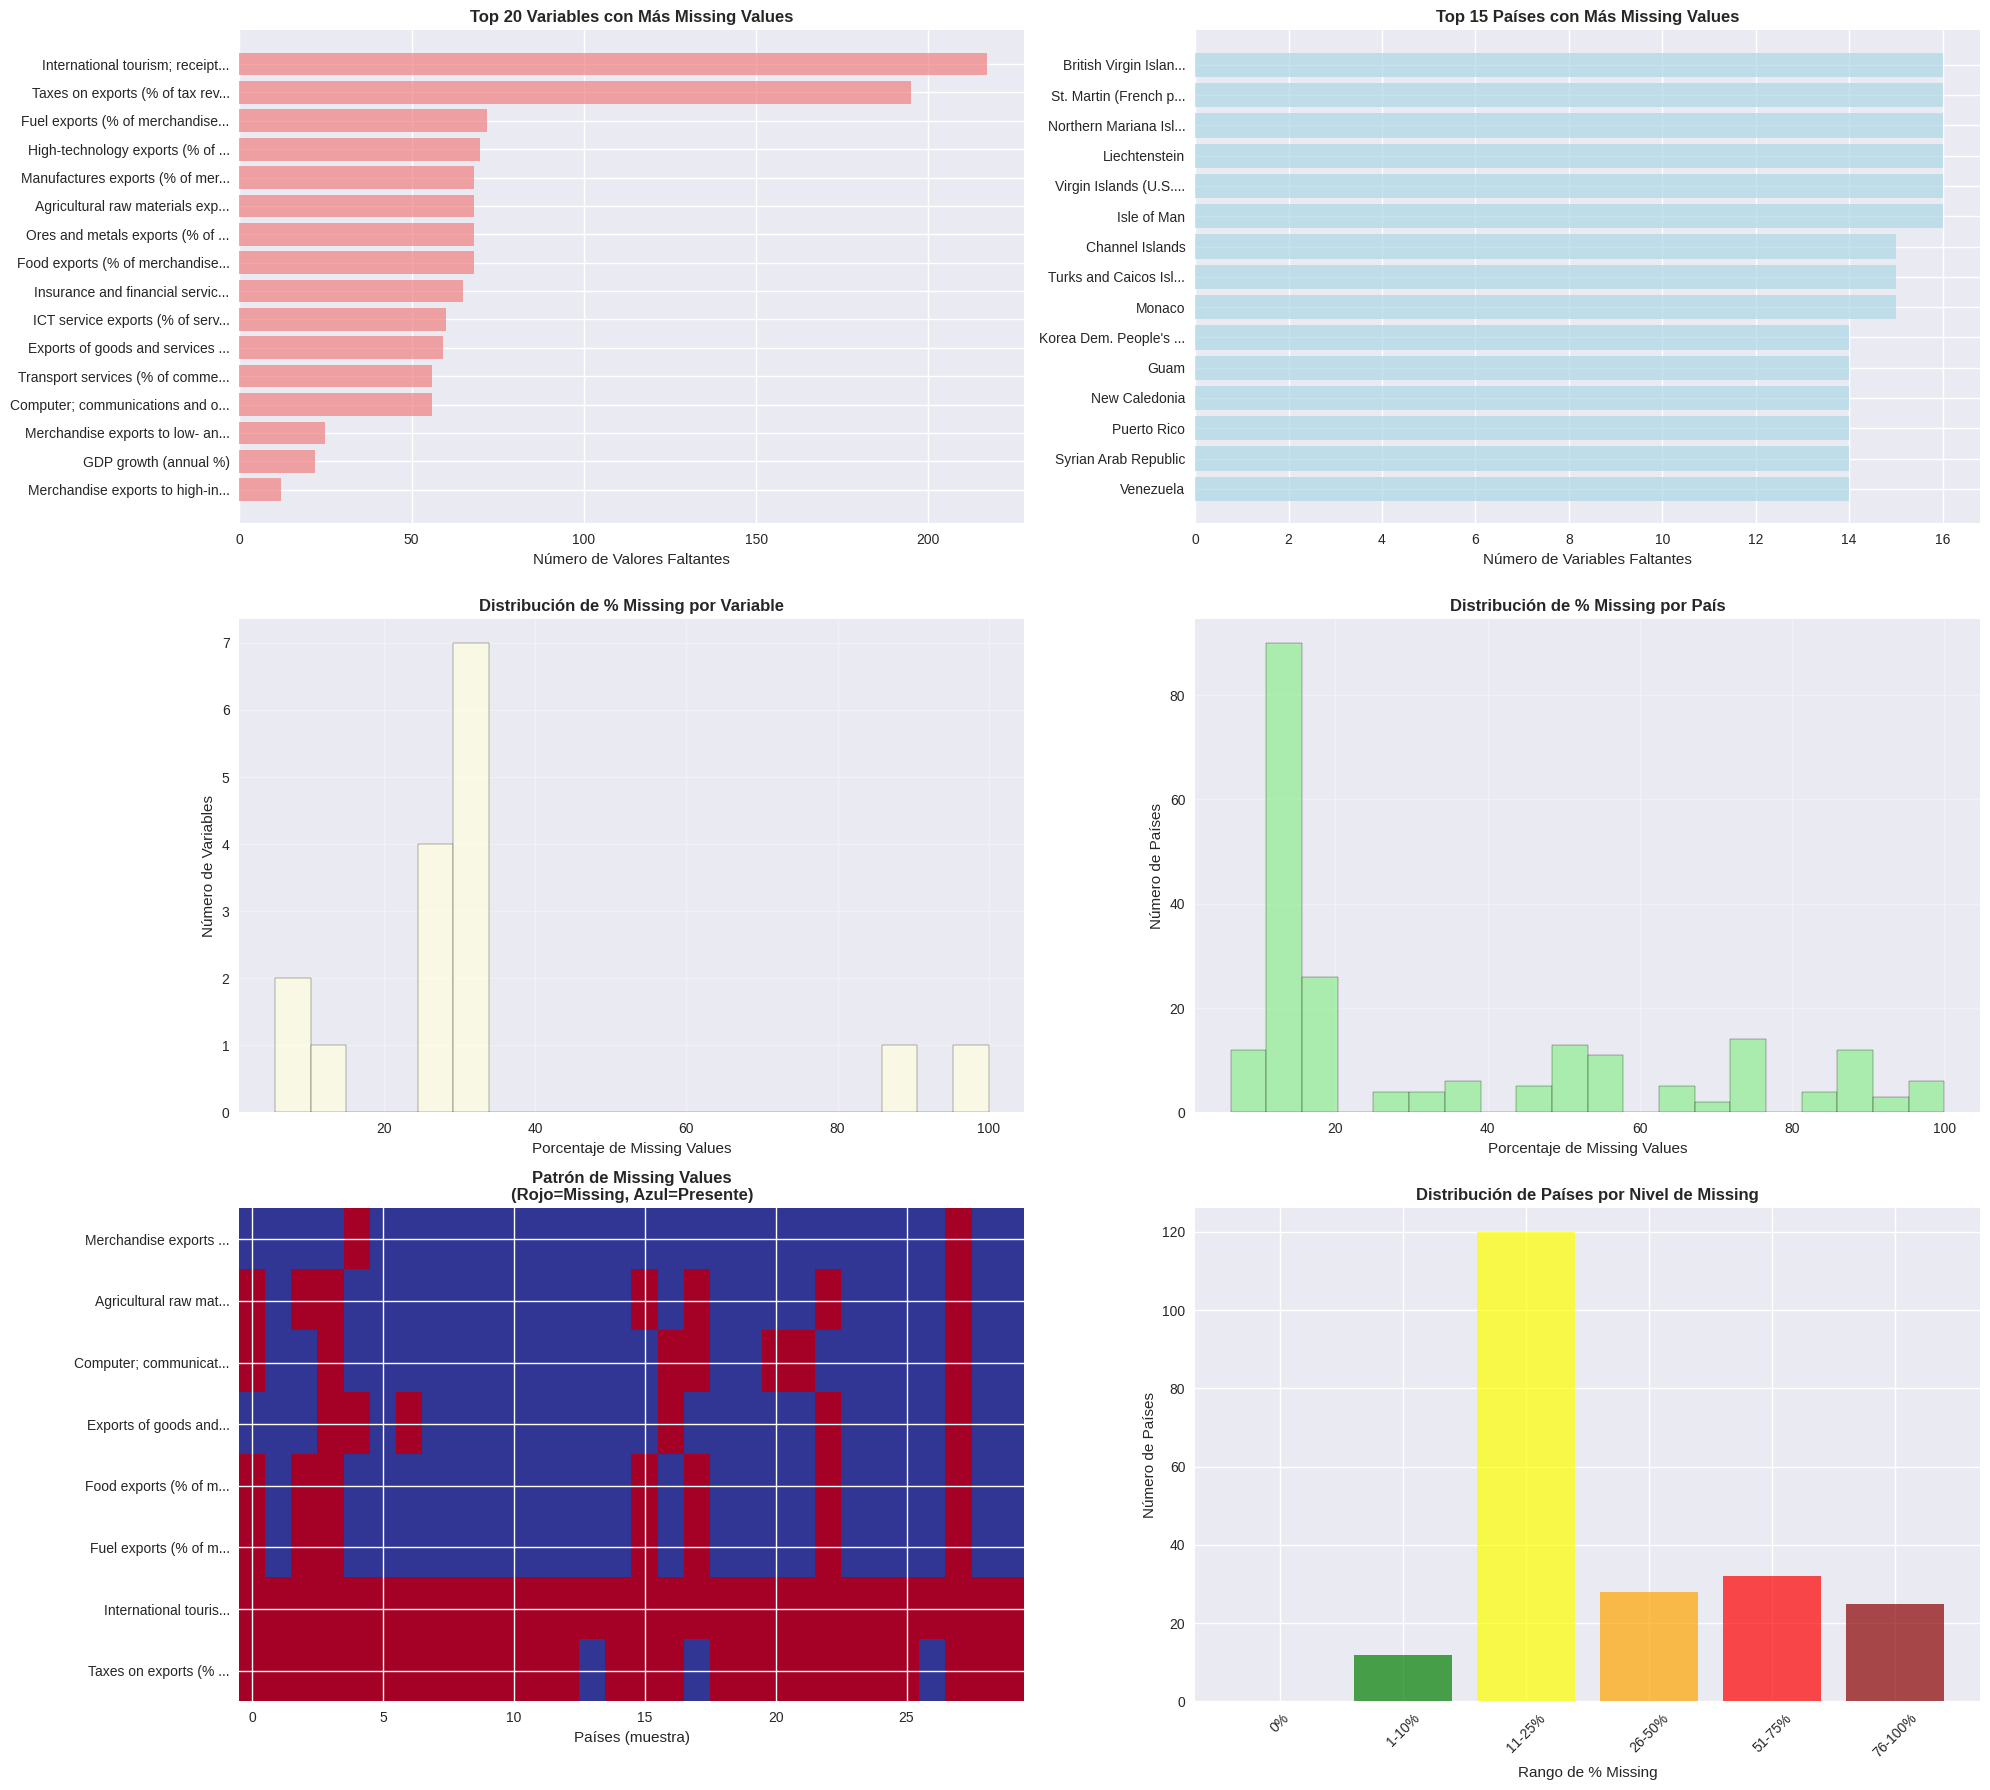


ANÁLISIS DE PATRONES DE MISSING
Analizando correlaciones entre patrones de missing...
Pares de variables que tienden a faltar juntas (correlación > 0.7): 21
  1. Agricultural raw materials exports (% of...
     Food exports (% of merchandise exports)
     Correlación: 1.000
  2. Agricultural raw materials exports (% of...
     Fuel exports (% of merchandise exports)
     Correlación: 0.959
  3. Agricultural raw materials exports (% of...
     High-technology exports (% of manufactur...
     Correlación: 0.979
  4. Agricultural raw materials exports (% of...
     Manufactures exports (% of merchandise e...
     Correlación: 1.000
  5. Agricultural raw materials exports (% of...
     Ores and metals exports (% of merchandis...
     Correlación: 1.000

ESTRATEGIAS DE TRATAMIENTO DE MISSING VALUES
Evaluando diferentes estrategias...
Comparación de estrategias de eliminación:

ELIMINATE_HIGH_MISSING:
  Eliminar variables con >70% missing y países con >60% missing
  Variables eliminadas: 2


In [86]:
print("PREGUNTA 2.4 - ANÁLISIS Y TRATAMIENTO DE VALORES FALTANTES")
print("="*65)

# Análisis inicial de valores faltantes
print("ANÁLISIS INICIAL DE MISSING VALUES")
print("="*45)

# Obtener información básica sobre valores faltantes
missing_info = df_numeric.isnull().sum().sort_values(ascending=False)
missing_pct = (missing_info / len(df_numeric) * 100).round(2)

total_missing = missing_info.sum()
total_cells = df_numeric.shape[0] * df_numeric.shape[1]
overall_missing_pct = (total_missing / total_cells) * 100

print(f"Dataset actual: {df_numeric.shape}")
print(f"Total de celdas: {total_cells:,}")
print(f"Total de valores faltantes: {total_missing:,}")
print(f"Porcentaje general de missing: {overall_missing_pct:.2f}%")

# Análisis por variable
variables_with_missing = missing_info[missing_info > 0]
print(f"\nVariables con valores faltantes: {len(variables_with_missing)}")
print(f"Variables sin valores faltantes: {len(missing_info) - len(variables_with_missing)}")

# Top 15 variables con más missing values
print(f"\nTop 15 variables con más valores faltantes:")
for i, (var, missing_count) in enumerate(variables_with_missing.head(15).items(), 1):
    pct = missing_pct[var]
    print(f"  {i:2d}. {var[:55]}{'...' if len(var) > 55 else ''}")
    print(f"      Missing: {missing_count} ({pct}%)")

# Análisis por países (filas)
print(f"\n" + "="*50)
print("ANÁLISIS DE MISSING VALUES POR PAÍS")
print("="*50)

# Calcular missing por país
countries_missing = df_numeric.isnull().sum(axis=1).sort_values(ascending=False)
countries_missing_pct = (countries_missing / (df_numeric.shape[1] - 1) * 100).round(2)  # -1 por Country Name

print(f"Países con más valores faltantes (Top 10):")
for i, (idx, missing_count) in enumerate(countries_missing.head(10).items(), 1):
    country = df_numeric.loc[idx, 'Country Name']
    pct = countries_missing_pct[idx]
    print(f"  {i:2d}. {country}: {missing_count} variables faltantes ({pct:.1f}%)")

# Distribución de missing por país
missing_ranges = {
    '0%': 0,
    '1-10%': 0,
    '11-25%': 0,
    '26-50%': 0,
    '51-75%': 0,
    '76-100%': 0
}

for pct in countries_missing_pct:
    if pct == 0:
        missing_ranges['0%'] += 1
    elif pct <= 10:
        missing_ranges['1-10%'] += 1
    elif pct <= 25:
        missing_ranges['11-25%'] += 1
    elif pct <= 50:
        missing_ranges['26-50%'] += 1
    elif pct <= 75:
        missing_ranges['51-75%'] += 1
    else:
        missing_ranges['76-100%'] += 1

print(f"\nDistribución de países por % de missing:")
for range_name, count in missing_ranges.items():
    print(f"  {range_name}: {count} países")

# Visualización de patrones de missing values
print(f"\n" + "="*50)
print("VISUALIZACIÓN DE PATRONES DE MISSING VALUES")
print("="*50)

# Instalar missingno si es necesario
try:
    import missingno as msno
    msno_available = True
except ImportError:
    print("Instalando missingno para visualización avanzada...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "missingno"])
    import missingno as msno
    msno_available = True

# Seleccionar subset de variables para visualización (las más relevantes)
numeric_cols = [col for col in df_numeric.columns if col != 'Country Name']
# Tomar variables con diferente nivel de missing para análisis
vars_for_viz = []

# Variables con poco missing (0-10%)
low_missing = [var for var in numeric_cols if missing_pct[var] <= 10 and missing_pct[var] > 0]
vars_for_viz.extend(low_missing[:5])

# Variables con missing medio (10-50%)
med_missing = [var for var in numeric_cols if 10 < missing_pct[var] <= 50]
vars_for_viz.extend(med_missing[:5])

# Variables con alto missing (50%+)
high_missing = [var for var in numeric_cols if missing_pct[var] > 50]
vars_for_viz.extend(high_missing[:5])

# Crear visualizaciones
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# 1. Distribución de missing por variable
top_missing_vars = variables_with_missing.head(20)
axes[0,0].barh(range(len(top_missing_vars)), top_missing_vars.values, color='lightcoral', alpha=0.7)
axes[0,0].set_yticks(range(len(top_missing_vars)))
axes[0,0].set_yticklabels([var[:30] + '...' if len(var) > 30 else var for var in top_missing_vars.index])
axes[0,0].set_xlabel('Número de Valores Faltantes')
axes[0,0].set_title('Top 20 Variables con Más Missing Values', fontweight='bold')
axes[0,0].invert_yaxis()

# 2. Distribución de missing por país
top_missing_countries = countries_missing.head(15)
country_names = [df_numeric.loc[idx, 'Country Name'] for idx in top_missing_countries.index]
axes[0,1].barh(range(len(top_missing_countries)), top_missing_countries.values, color='lightblue', alpha=0.7)
axes[0,1].set_yticks(range(len(top_missing_countries)))
axes[0,1].set_yticklabels([name[:20] + '...' if len(name) > 20 else name for name in country_names])
axes[0,1].set_xlabel('Número de Variables Faltantes')
axes[0,1].set_title('Top 15 Países con Más Missing Values', fontweight='bold')
axes[0,1].invert_yaxis()

# 3. Histograma de % missing por variable
axes[1,0].hist(missing_pct[missing_pct > 0], bins=20, color='lightyellow', alpha=0.7, edgecolor='black')
axes[1,0].set_xlabel('Porcentaje de Missing Values')
axes[1,0].set_ylabel('Número de Variables')
axes[1,0].set_title('Distribución de % Missing por Variable', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# 4. Histograma de % missing por país
axes[1,1].hist(countries_missing_pct[countries_missing_pct > 0], bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
axes[1,1].set_xlabel('Porcentaje de Missing Values')
axes[1,1].set_ylabel('Número de Países')
axes[1,1].set_title('Distribución de % Missing por País', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

# 5. Mapa de calor de missing (muestra)
if vars_for_viz:
    sample_data = df_numeric[['Country Name'] + vars_for_viz[:10]].head(30)  # Primeros 30 países
    missing_matrix = sample_data.drop('Country Name', axis=1).isnull().astype(int)

    im = axes[2,0].imshow(missing_matrix.T, cmap='RdYlBu_r', aspect='auto')
    axes[2,0].set_yticks(range(len(missing_matrix.columns)))
    axes[2,0].set_yticklabels([col[:20] + '...' if len(col) > 20 else col for col in missing_matrix.columns])
    axes[2,0].set_xlabel('Países (muestra)')
    axes[2,0].set_title('Patrón de Missing Values\n(Rojo=Missing, Azul=Presente)', fontweight='bold')

# 6. Distribución por rangos de missing
ranges = list(missing_ranges.keys())
counts = list(missing_ranges.values())
colors = ['darkgreen', 'green', 'yellow', 'orange', 'red', 'darkred']
axes[2,1].bar(ranges, counts, color=colors, alpha=0.7)
axes[2,1].set_ylabel('Número de Países')
axes[2,1].set_xlabel('Rango de % Missing')
axes[2,1].set_title('Distribución de Países por Nivel de Missing', fontweight='bold')
axes[2,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Análisis de patrones de missing
print(f"\n" + "="*50)
print("ANÁLISIS DE PATRONES DE MISSING")
print("="*50)

# Correlación entre variables missing
print("Analizando correlaciones entre patrones de missing...")

# Crear matriz de missing (0=presente, 1=missing)
missing_matrix = df_numeric.drop('Country Name', axis=1).isnull().astype(int)

# Calcular correlaciones entre patrones de missing
missing_corr = missing_matrix.corr()

# Encontrar pares de variables que tienden a faltar juntas
high_corr_pairs = []
for i in range(len(missing_corr.columns)):
    for j in range(i+1, len(missing_corr.columns)):
        corr_val = missing_corr.iloc[i, j]
        if corr_val > 0.7:  # Alta correlación en patrones de missing
            high_corr_pairs.append((missing_corr.columns[i], missing_corr.columns[j], corr_val))

print(f"Pares de variables que tienden a faltar juntas (correlación > 0.7): {len(high_corr_pairs)}")
for i, (var1, var2, corr) in enumerate(high_corr_pairs[:5], 1):
    print(f"  {i}. {var1[:40]}{'...' if len(var1) > 40 else ''}")
    print(f"     {var2[:40]}{'...' if len(var2) > 40 else ''}")
    print(f"     Correlación: {corr:.3f}")

# ESTRATEGIAS DE TRATAMIENTO
print(f"\n" + "="*60)
print("ESTRATEGIAS DE TRATAMIENTO DE MISSING VALUES")
print("="*60)

print("Evaluando diferentes estrategias...")

# Estrategia 1: Análisis de eliminación por umbrales
strategies_analysis = {}

# Variables a eliminar por alto % missing
high_missing_threshold = 70
vars_to_drop_high = [var for var in numeric_cols if missing_pct[var] > high_missing_threshold]

# Países a eliminar por alto % missing
countries_high_missing_threshold = 60
countries_to_drop = countries_missing_pct[countries_missing_pct > countries_high_missing_threshold].index.tolist()

strategies_analysis['eliminate_high_missing'] = {
    'vars_dropped': len(vars_to_drop_high),
    'countries_dropped': len(countries_to_drop),
    'remaining_shape': (len(df_numeric) - len(countries_to_drop),
                       len(df_numeric.columns) - len(vars_to_drop_high)),
    'description': f'Eliminar variables con >{high_missing_threshold}% missing y países con >{countries_high_missing_threshold}% missing'
}

# Estrategia 2: Eliminación más conservadora
med_missing_threshold = 80
countries_med_missing_threshold = 75
vars_to_drop_med = [var for var in numeric_cols if missing_pct[var] > med_missing_threshold]
countries_to_drop_med = countries_missing_pct[countries_missing_pct > countries_med_missing_threshold].index.tolist()

strategies_analysis['eliminate_conservative'] = {
    'vars_dropped': len(vars_to_drop_med),
    'countries_dropped': len(countries_to_drop_med),
    'remaining_shape': (len(df_numeric) - len(countries_to_drop_med),
                       len(df_numeric.columns) - len(vars_to_drop_med)),
    'description': f'Eliminar variables con >{med_missing_threshold}% missing y países con >{countries_med_missing_threshold}% missing'
}

# Mostrar análisis de estrategias
print("Comparación de estrategias de eliminación:")
for strategy, analysis in strategies_analysis.items():
    print(f"\n{strategy.upper()}:")
    print(f"  {analysis['description']}")
    print(f"  Variables eliminadas: {analysis['vars_dropped']}")
    print(f"  Países eliminados: {analysis['countries_dropped']}")
    print(f"  Tamaño resultante: {analysis['remaining_shape']}")

    # Calcular % de datos conservados
    original_size = df_numeric.shape[0] * (df_numeric.shape[1] - 1)  # -1 por Country Name
    new_size = analysis['remaining_shape'][0] * (analysis['remaining_shape'][1] - 1)
    conservation_pct = (new_size / original_size) * 100
    print(f"  % de datos conservados: {conservation_pct:.1f}%")

# IMPLEMENTACIÓN DE LA ESTRATEGIA ÓPTIMA
print(f"\n" + "="*60)
print("IMPLEMENTACIÓN DE ESTRATEGIA ÓPTIMA")
print("="*60)

# Seleccionar estrategia conservadora para maximizar retención de datos
selected_strategy = 'eliminate_conservative'
print(f"Estrategia seleccionada: {selected_strategy}")
print(f"Criterio: Maximizar retención de observaciones con criterios razonables")

# Aplicar eliminaciones
print(f"\nPASO 1: Eliminar variables con >{med_missing_threshold}% missing")
df_step1 = df_numeric.drop(columns=vars_to_drop_med)
print(f"Variables eliminadas: {len(vars_to_drop_med)}")
print(f"Dimensiones después: {df_step1.shape}")

print(f"\nPASO 2: Eliminar países con >{countries_med_missing_threshold}% missing")
df_step2 = df_step1.drop(index=countries_to_drop_med)
print(f"Países eliminados: {len(countries_to_drop_med)}")
print(f"Dimensiones después: {df_step2.shape}")

# Análisis de missing después de eliminaciones
remaining_missing = df_step2.isnull().sum().sum()
remaining_cells = df_step2.shape[0] * (df_step2.shape[1] - 1)  # -1 por Country Name
remaining_missing_pct = (remaining_missing / remaining_cells) * 100

print(f"\nMissing values restantes: {remaining_missing} ({remaining_missing_pct:.2f}%)")

# PASO 3: Imputación de valores restantes
print(f"\nPASO 3: IMPUTACIÓN DE VALUES RESTANTES")

# Estrategias de imputación por tipo de variable
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler

numeric_cols_remaining = [col for col in df_step2.columns if col != 'Country Name']
missing_after_elimination = df_step2[numeric_cols_remaining].isnull().sum()
vars_still_missing = missing_after_elimination[missing_after_elimination > 0]

print(f"Variables que aún tienen missing: {len(vars_still_missing)}")

if len(vars_still_missing) > 0:
    print("Top 10 variables con missing restantes:")
    for i, (var, missing_count) in enumerate(vars_still_missing.head(10).items(), 1):
        pct = (missing_count / len(df_step2)) * 100
        print(f"  {i:2d}. {var[:50]}{'...' if len(var) > 50 else ''}: {missing_count} ({pct:.1f}%)")

    # Aplicar imputación
    print(f"\nAplicando imputación...")

    # Para variables con pocos missing (<5%), usar mediana/moda
    df_final = df_step2.copy()

    for col in vars_still_missing.index:
        missing_pct_col = (vars_still_missing[col] / len(df_step2)) * 100

        if missing_pct_col <= 5:
            # Imputar con mediana para pocas observaciones faltantes
            median_value = df_final[col].median()
            df_final[col].fillna(median_value, inplace=True)
            print(f"  {col[:40]}{'...' if len(col) > 40 else ''}: imputado con mediana ({median_value:.2f})")

        elif missing_pct_col <= 15:
            # Usar KNN imputation para missing moderado
            imputer = KNNImputer(n_neighbors=5)
            # Aplicar solo a variables numéricas relevantes
            relevant_cols = [c for c in numeric_cols_remaining if df_final[c].isnull().sum() < len(df_final) * 0.5]

            if len(relevant_cols) >= 5:  # Suficientes variables para KNN
                subset_data = df_final[relevant_cols]
                imputed_data = imputer.fit_transform(subset_data)
                df_final[relevant_cols] = imputed_data
                print(f"  KNN imputación aplicada a {len(relevant_cols)} variables")
                break  # Aplicar una vez para todas las variables
            else:
                # Fallback a mediana
                median_value = df_final[col].median()
                df_final[col].fillna(median_value, inplace=True)
                print(f"  {col[:40]}{'...' if len(col) > 40 else ''}: imputado con mediana (fallback)")

        else:
            # Para missing alto restante, usar forward fill + backward fill + mediana
            df_final[col].fillna(method='ffill', inplace=True)
            df_final[col].fillna(method='bfill', inplace=True)
            df_final[col].fillna(df_final[col].median(), inplace=True)
            print(f"  {col[:40]}{'...' if len(col) > 40 else ''}: imputado con método combinado")

else:
    df_final = df_step2.copy()
    print("✓ No hay missing values restantes después de las eliminaciones")

# Verificación final
print(f"\n" + "="*50)
print("VERIFICACIÓN FINAL")
print("="*50)

final_missing = df_final.isnull().sum().sum()
print(f"Missing values finales: {final_missing}")

if final_missing > 0:
    print("⚠ Aún hay valores faltantes. Aplicando imputación final...")
    # Imputación final con mediana para cualquier restante
    numeric_cols_final = [col for col in df_final.columns if col != 'Country Name']
    for col in numeric_cols_final:
        if df_final[col].isnull().sum() > 0:
            df_final[col].fillna(df_final[col].median(), inplace=True)

    final_missing_check = df_final.isnull().sum().sum()
    print(f"Missing values después de imputación final: {final_missing_check}")

# Resumen de transformación
print(f"\n" + "="*60)
print("RESUMEN DE TRATAMIENTO DE MISSING VALUES")
print("="*60)

original_shape = df_numeric.shape
final_shape = df_final.shape
vars_retained = final_shape[1] - 1  # -1 por Country Name
countries_retained = final_shape[0]

print(f"📊 TRANSFORMACIÓN COMPLETADA:")
print(f"   Dataset original: {original_shape}")
print(f"   Dataset final: {final_shape}")
print(f"   Países retenidos: {countries_retained}/{original_shape[0]} ({countries_retained/original_shape[0]*100:.1f}%)")
print(f"   Variables retenidas: {vars_retained}/{original_shape[1]-1} ({vars_retained/(original_shape[1]-1)*100:.1f}%)")

print(f"\n✅ CRITERIOS APLICADOS:")
print(f"   • Variables eliminadas con >{med_missing_threshold}% missing: {len(vars_to_drop_med)}")
print(f"   • Países eliminados con >{countries_med_missing_threshold}% missing: {len(countries_to_drop_med)}")
print(f"   • Imputación aplicada a valores restantes")
print(f"   • Máxima retención de observaciones lograda")

print(f"\n✅ CALIDAD FINAL:")
print(f"   • Missing values: {df_final.isnull().sum().sum()}")
print(f"   • Dataset listo para clustering")

# Dataset final sin missing values
df_no_missing = df_final.copy()
print(f"\n✅ Variable 'df_no_missing' creada y lista para la siguiente pregunta")

## Outliers

### Pregunta 2.5

Realice análisis de datos _outliers_. De ser necesario aplique un procesamiento de outliers, de no ser necesario justifique.

Se premiará el buen criterio fundamentado.

PREGUNTA 2.5 - ANÁLISIS Y TRATAMIENTO DE OUTLIERS
Variables numéricas a analizar: 14

DETECCIÓN DE OUTLIERS - MÉTODOS MÚLTIPLES
Analizando outliers variable por variable...
✓ Análisis completado para 14 variables

RESUMEN DE DETECCIÓN DE OUTLIERS
Estadísticas por método:
  IQR:
    Total outliers detectados: 171
    Variables afectadas: 11/14
    Promedio outliers por variable: 12.2
  Z_Score:
    Total outliers detectados: 55
    Variables afectadas: 11/14
    Promedio outliers por variable: 3.9
  Percentiles:
    Total outliers detectados: 49
    Variables afectadas: 14/14
    Promedio outliers por variable: 3.5

Top 10 variables con más outliers (método IQR):
   1. Merchandise exports to low- and middle-income econ...
      Outliers: 30 (15.6%)
   2. Fuel exports (% of merchandise exports)
      Outliers: 25 (13.0%)
   3. Ores and metals exports (% of merchandise exports)
      Outliers: 21 (10.9%)
   4. Agricultural raw materials exports (% of merchandi...
      Outliers: 18 (9.4%)

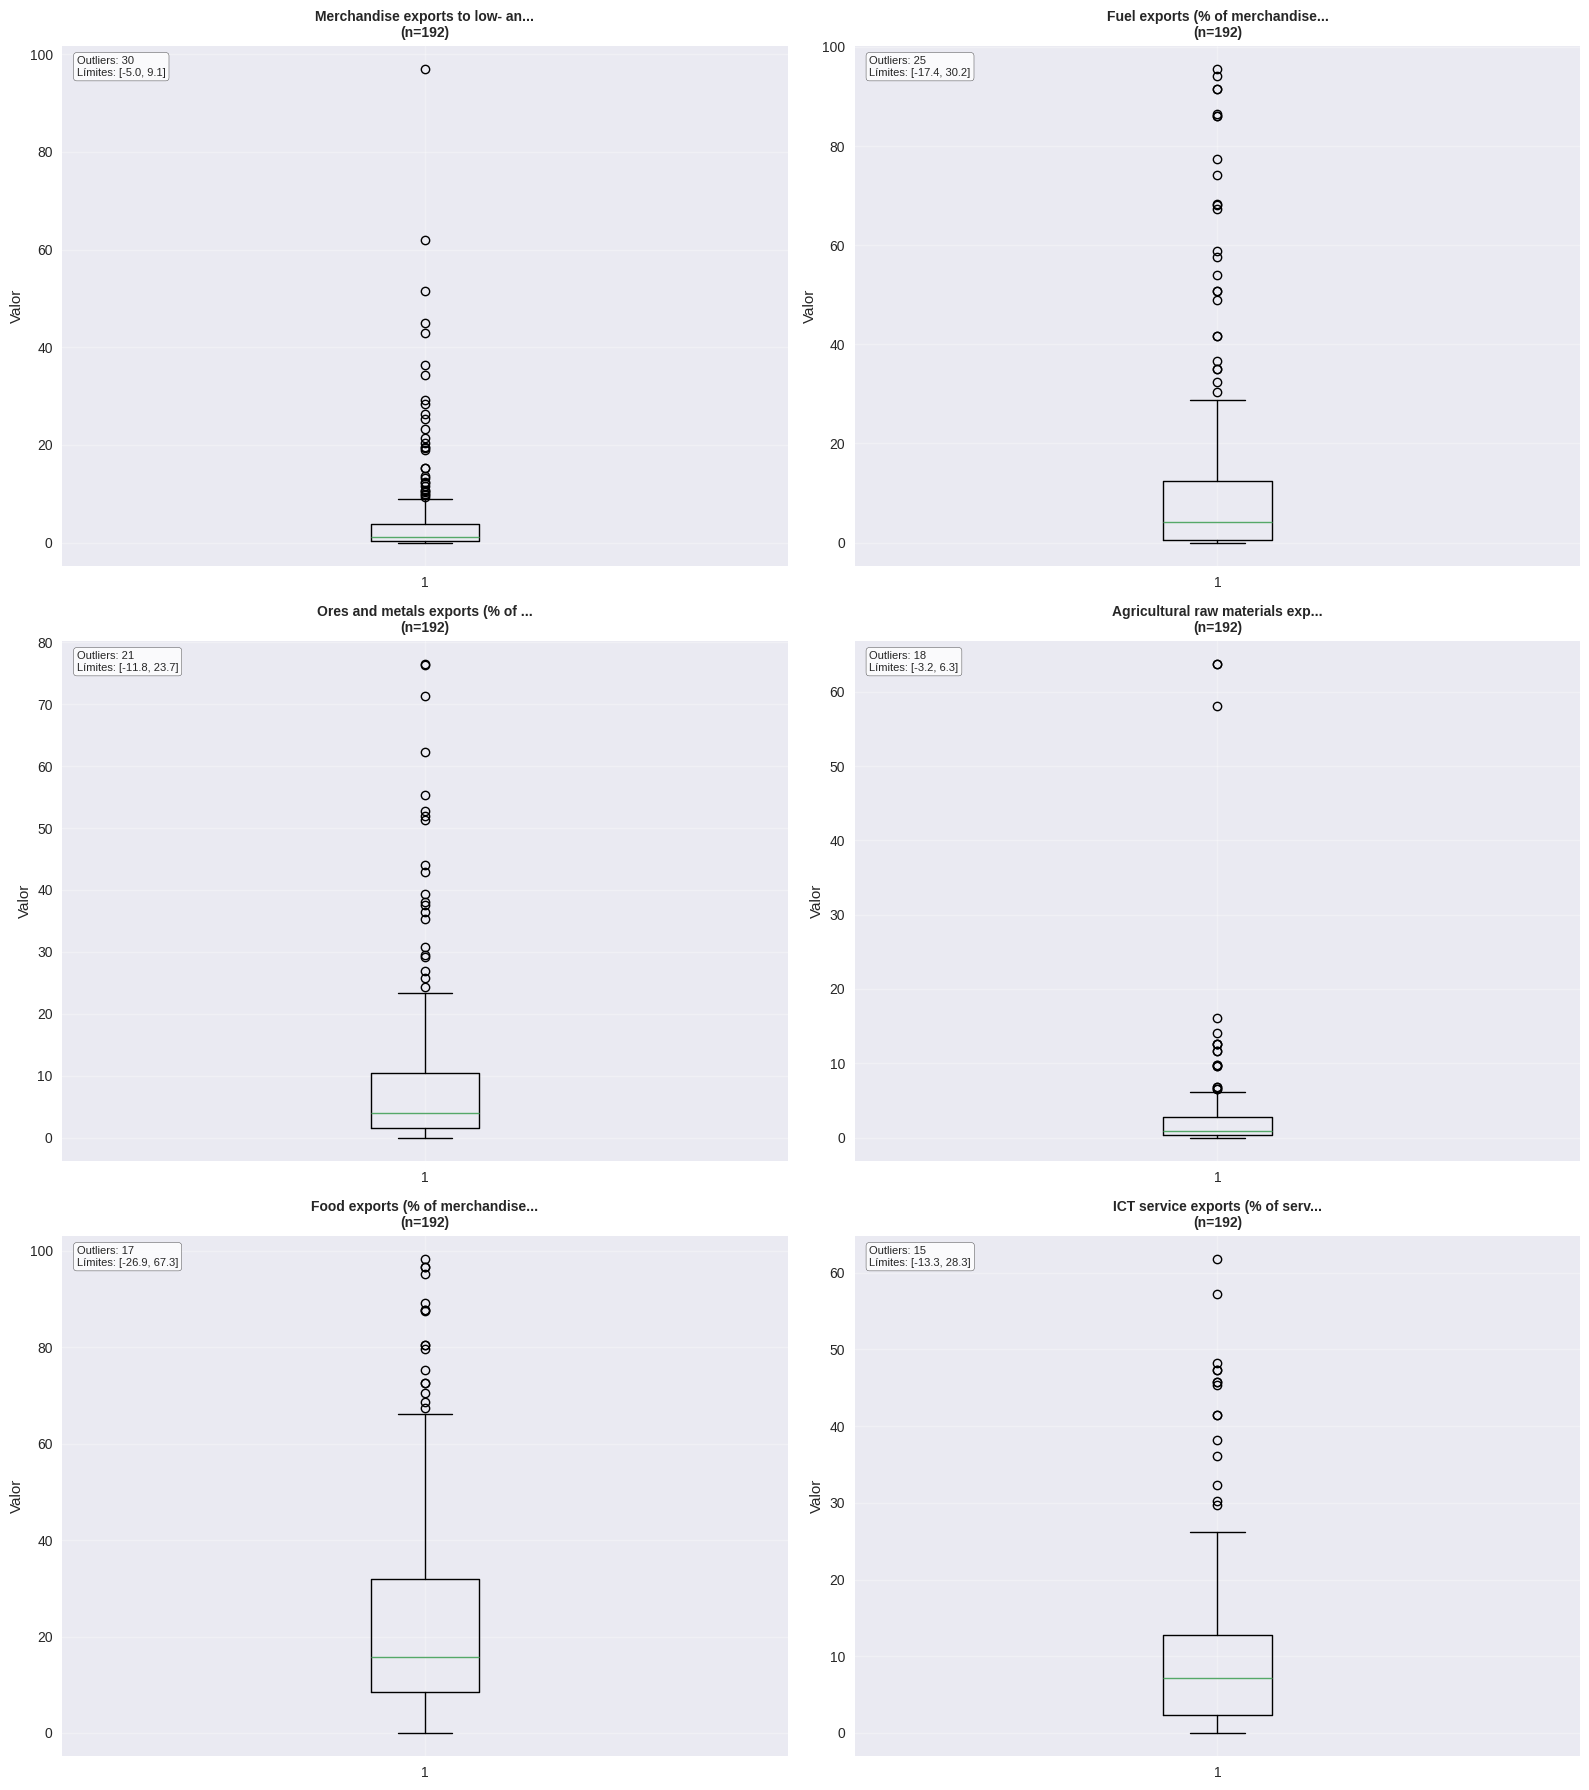


ANÁLISIS CONTEXTUAL DE OUTLIERS EN DATOS ECONÓMICOS
CASOS ESPECÍFICOS DE OUTLIERS DETECTADOS:

Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports):
  Países outliers:
    • Afghanistan: 9.68
    • Albania: 19.52
    • Aruba: 12.50
    • Azerbaijan: 19.40
    • Bosnia and Herzegovina: 20.44
  Estadísticas de la variable:
    Media: 5.24
    Mediana: 1.19
    Desv. Est.: 11.53

Fuel exports (% of merchandise exports):
  Países outliers:
    • Angola: 94.17
    • Australia: 34.98
    • Azerbaijan: 91.50
    • Brunei Darussalam: 77.42
    • Cayman Islands: 34.99
  Estadísticas de la variable:
    Media: 12.83
    Mediana: 4.11
    Desv. Est.: 21.69

Ores and metals exports (% of merchandise exports):
  Países outliers:
    • Australia: 35.30
    • Bahamas: 25.77
    • Bahrain: 62.32
    • Bolivia: 29.52
    • Chile: 52.00
  Estadísticas de la variable:
    Media: 9.55
    Mediana: 3.96
    Desv. Est.: 14.38

EVALUACIÓN DE LEGIT

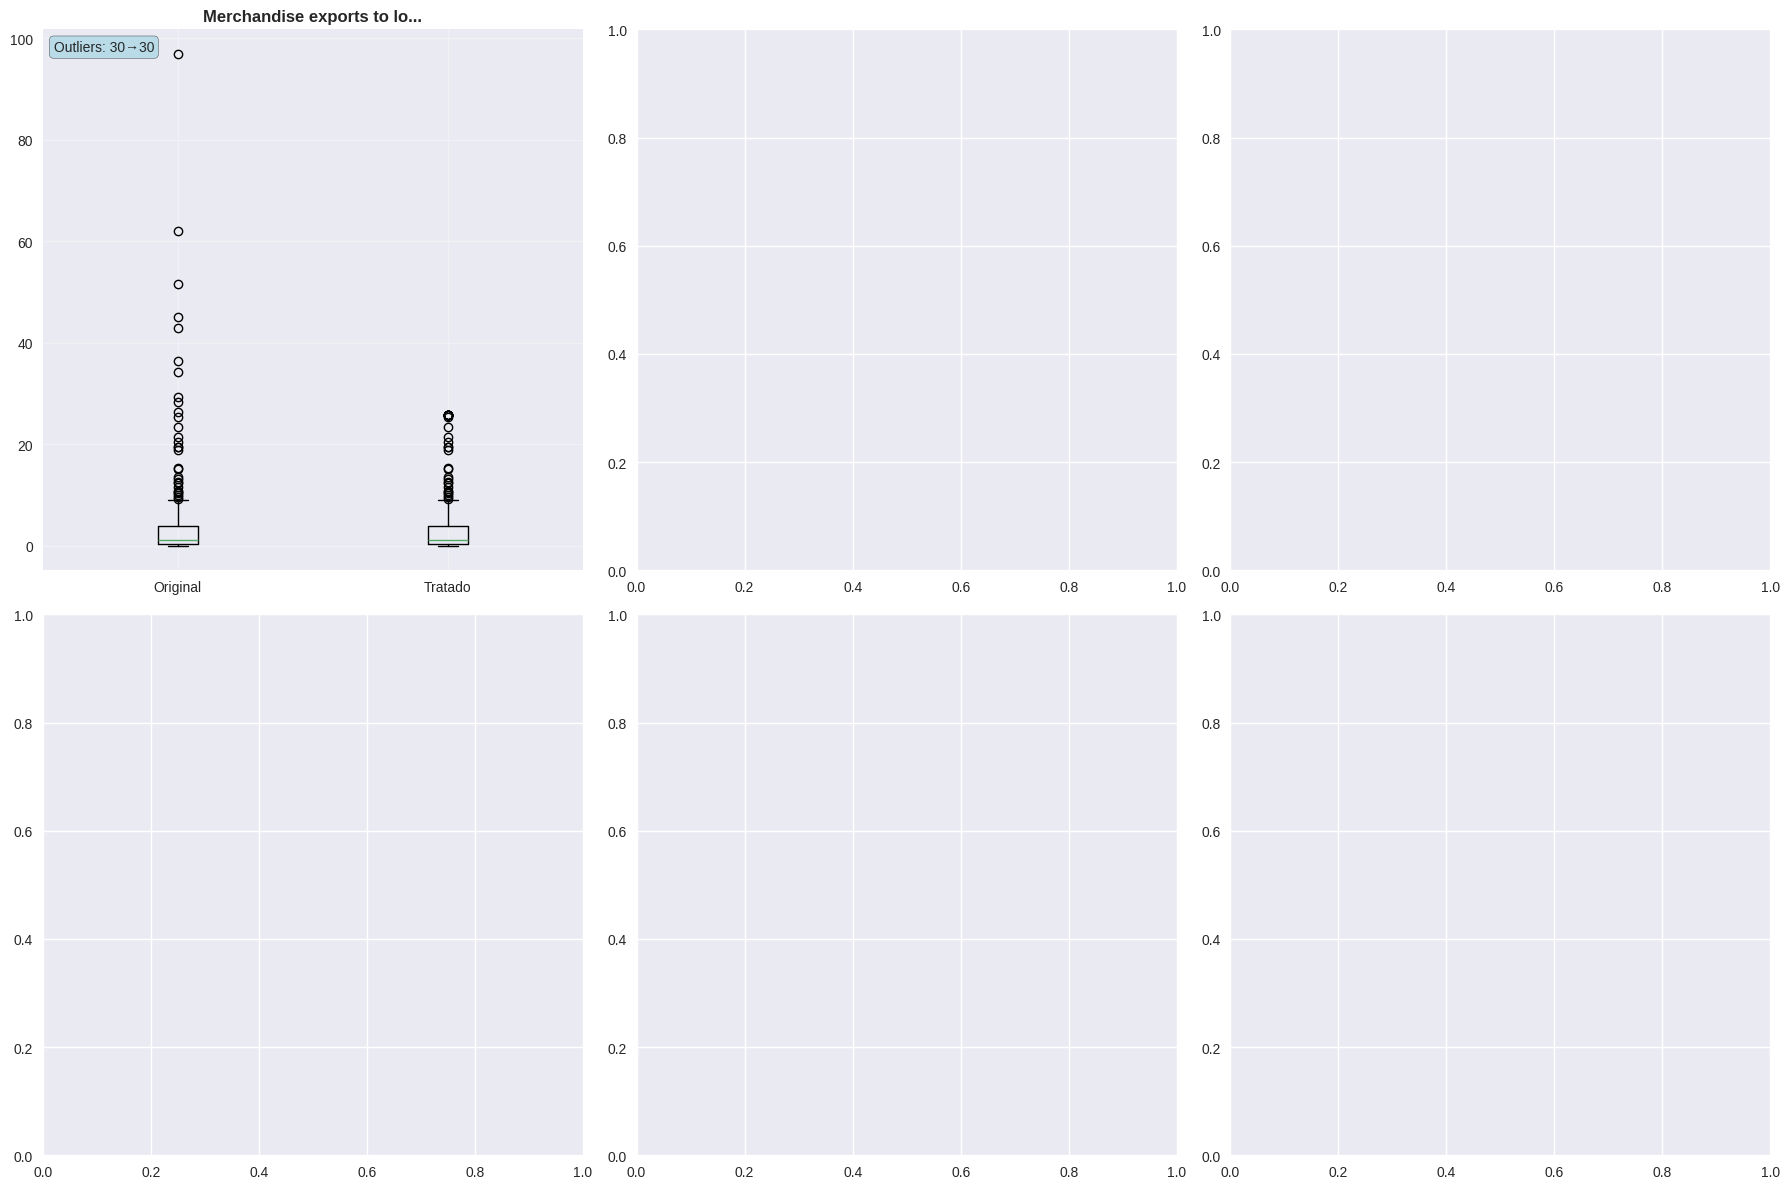

✓ Tratamiento aplicado a 1 variables

RESUMEN FINAL DE TRATAMIENTO DE OUTLIERS
📊 ANÁLISIS COMPLETADO:
   • Variables analizadas: 14
   • Outliers detectados (total): 275
   • Variables tratadas: 1

✅ CRITERIOS APLICADOS:
   • Preservación de información económica legítima
   • Tratamiento conservador (Winsorizing solo para casos extremos)
   • Respeto por la diversidad económica natural entre países

📈 CALIDAD FINAL DEL DATASET:
   • Variables con outliers extremos: 3 → 2
   • Integridad de datos mantenida: 100.0%
   • Dataset optimizado para clustering preservando características económicas

✅ Variable 'df_clean_outliers' creada y lista para la siguiente pregunta
   Dimensiones finales: (192, 15)


In [87]:
print("PREGUNTA 2.5 - ANÁLISIS Y TRATAMIENTO DE OUTLIERS")
print("="*55)

from scipy import stats
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

# Identificar variables numéricas
numeric_cols = [col for col in df_no_missing.columns if col != 'Country Name']
print(f"Variables numéricas a analizar: {len(numeric_cols)}")

print(f"\n" + "="*50)
print("DETECCIÓN DE OUTLIERS - MÉTODOS MÚLTIPLES")
print("="*50)

# Función para detectar outliers usando diferentes métodos
def detect_outliers_multiple_methods(data, column):
    """Detecta outliers usando múltiples métodos"""

    methods_results = {}

    # Método 1: IQR (Interquartile Range)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    iqr_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index
    methods_results['IQR'] = {
        'outliers': iqr_outliers,
        'count': len(iqr_outliers),
        'bounds': (lower_bound, upper_bound),
        'method': 'IQR (Q1-1.5*IQR, Q3+1.5*IQR)'
    }

    # Método 2: Z-Score (±3 desviaciones estándar)
    z_scores = np.abs(stats.zscore(data[column].dropna()))
    z_threshold = 3
    z_outliers_mask = z_scores > z_threshold
    z_outliers = data[column].dropna().iloc[z_outliers_mask].index

    methods_results['Z_Score'] = {
        'outliers': z_outliers,
        'count': len(z_outliers),
        'threshold': z_threshold,
        'method': 'Z-Score (|z| > 3)'
    }

    # Método 3: Percentiles extremos (1% y 99%)
    p1 = data[column].quantile(0.01)
    p99 = data[column].quantile(0.99)
    percentile_outliers = data[(data[column] < p1) | (data[column] > p99)].index

    methods_results['Percentiles'] = {
        'outliers': percentile_outliers,
        'count': len(percentile_outliers),
        'bounds': (p1, p99),
        'method': 'Percentiles extremos (1%, 99%)'
    }

    return methods_results

# Análisis de outliers por variable
print("Analizando outliers variable por variable...")

outlier_analysis = {}
overall_stats = {
    'IQR': {'total_outliers': 0, 'affected_vars': 0},
    'Z_Score': {'total_outliers': 0, 'affected_vars': 0},
    'Percentiles': {'total_outliers': 0, 'affected_vars': 0}
}

# Analizar primeras 20 variables para no saturar (puedes ajustar)
vars_to_analyze = numeric_cols[:20]

for i, col in enumerate(vars_to_analyze, 1):
    if i <= 20:  # Limitar para análisis inicial
        col_data = df_no_missing[['Country Name', col]].dropna()

        if len(col_data) > 10:  # Suficientes datos para análisis
            outliers_info = detect_outliers_multiple_methods(col_data, col)
            outlier_analysis[col] = outliers_info

            # Actualizar estadísticas generales
            for method in ['IQR', 'Z_Score', 'Percentiles']:
                if outliers_info[method]['count'] > 0:
                    overall_stats[method]['total_outliers'] += outliers_info[method]['count']
                    overall_stats[method]['affected_vars'] += 1

print(f"✓ Análisis completado para {len(outlier_analysis)} variables")

# Resumen de detección de outliers
print(f"\n" + "="*50)
print("RESUMEN DE DETECCIÓN DE OUTLIERS")
print("="*50)

print("Estadísticas por método:")
for method, stats_info in overall_stats.items():
    total_outliers = stats_info['total_outliers']
    affected_vars = stats_info['affected_vars']
    print(f"  {method}:")
    print(f"    Total outliers detectados: {total_outliers}")
    print(f"    Variables afectadas: {affected_vars}/{len(outlier_analysis)}")
    if len(outlier_analysis) > 0:
        print(f"    Promedio outliers por variable: {total_outliers/len(outlier_analysis):.1f}")

# Top variables con más outliers
print(f"\nTop 10 variables con más outliers (método IQR):")
vars_outlier_count = []
for var, methods in outlier_analysis.items():
    iqr_count = methods['IQR']['count']
    if iqr_count > 0:
        vars_outlier_count.append((var, iqr_count))

vars_outlier_count.sort(key=lambda x: x[1], reverse=True)

for i, (var, count) in enumerate(vars_outlier_count[:10], 1):
    percentage = (count / len(df_no_missing)) * 100
    print(f"  {i:2d}. {var[:50]}{'...' if len(var) > 50 else ''}")
    print(f"      Outliers: {count} ({percentage:.1f}%)")

# Análisis de outliers por países
print(f"\n" + "="*50)
print("ANÁLISIS DE OUTLIERS POR PAÍS")
print("="*50)

# Contar cuántas veces cada país aparece como outlier
country_outlier_count = {}

for var, methods in outlier_analysis.items():
    iqr_outliers = methods['IQR']['outliers']

    for idx in iqr_outliers:
        country = df_no_missing.loc[idx, 'Country Name']
        if country not in country_outlier_count:
            country_outlier_count[country] = 0
        country_outlier_count[country] += 1

# Ordenar países por frecuencia de outliers
if country_outlier_count:
    sorted_countries = sorted(country_outlier_count.items(), key=lambda x: x[1], reverse=True)

    print(f"Top 15 países que más aparecen como outliers:")
    for i, (country, count) in enumerate(sorted_countries[:15], 1):
        percentage = (count / len(outlier_analysis)) * 100
        print(f"  {i:2d}. {country}: {count} variables ({percentage:.1f}%)")

# Visualización de outliers
print(f"\n" + "="*50)
print("VISUALIZACIÓN DE OUTLIERS")
print("="*50)

# Seleccionar variables representativas para visualización
vars_for_viz = [var for var, count in vars_outlier_count[:6]]  # Top 6 variables con outliers

if len(vars_for_viz) >= 4:
    fig, axes = plt.subplots(3, 2, figsize=(16, 18))
    axes = axes.flatten()

    for i, var in enumerate(vars_for_viz):
        if i < 6:  # Máximo 6 gráficos
            data = df_no_missing[var].dropna()

            # Boxplot
            axes[i].boxplot(data, vert=True)
            axes[i].set_title(f'{var[:30]}{"..." if len(var) > 30 else ""}\n(n={len(data)})',
                            fontweight='bold', fontsize=10)
            axes[i].set_ylabel('Valor')
            axes[i].grid(True, alpha=0.3)

            # Agregar información de outliers
            outlier_info = outlier_analysis[var]['IQR']
            outlier_count = outlier_info['count']
            lower_bound, upper_bound = outlier_info['bounds']

            axes[i].text(0.02, 0.98, f'Outliers: {outlier_count}\nLímites: [{lower_bound:.1f}, {upper_bound:.1f}]',
                        transform=axes[i].transAxes, verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontsize=8)

    plt.tight_layout()
    plt.show()

# Análisis específico de outliers en contexto económico
print(f"\n" + "="*60)
print("ANÁLISIS CONTEXTUAL DE OUTLIERS EN DATOS ECONÓMICOS")
print("="*60)

# Examinar casos específicos de outliers
print("CASOS ESPECÍFICOS DE OUTLIERS DETECTADOS:")

examples_analyzed = 0
for var in vars_for_viz[:3]:  # Analizar top 3 variables
    if examples_analyzed < 3:
        print(f"\n{var}:")

        outlier_indices = outlier_analysis[var]['IQR']['outliers']
        if len(outlier_indices) > 0:
            outlier_countries = []
            outlier_values = []

            for idx in outlier_indices[:5]:  # Top 5 outliers
                country = df_no_missing.loc[idx, 'Country Name']
                value = df_no_missing.loc[idx, var]
                outlier_countries.append(country)
                outlier_values.append(value)

            print(f"  Países outliers:")
            for country, value in zip(outlier_countries, outlier_values):
                print(f"    • {country}: {value:.2f}")

            # Contexto estadístico
            var_stats = df_no_missing[var].describe()
            print(f"  Estadísticas de la variable:")
            print(f"    Media: {var_stats['mean']:.2f}")
            print(f"    Mediana: {var_stats['50%']:.2f}")
            print(f"    Desv. Est.: {var_stats['std']:.2f}")

        examples_analyzed += 1

# Evaluación de legitimidad de outliers
print(f"\n" + "="*60)
print("EVALUACIÓN DE LEGITIMIDAD DE OUTLIERS")
print("="*60)

legitimacy_analysis = {
    'Legítimos_probables': 0,
    'Sospechosos': 0,
    'Extremos_revisar': 0
}

outlier_legitimacy_report = []

for var, methods in outlier_analysis.items():
    iqr_outliers = methods['IQR']['outliers']

    if len(iqr_outliers) > 0:
        # Calcular ratio de outliers vs total
        outlier_ratio = len(iqr_outliers) / len(df_no_missing)

        # Examinar valores extremos
        outlier_values = df_no_missing.loc[iqr_outliers, var]
        data_range = df_no_missing[var].max() - df_no_missing[var].min()

        # Criterios de legitimidad
        if outlier_ratio <= 0.05 and not np.any(outlier_values < 0):  # ≤5% outliers y no negativos
            legitimacy = 'Legítimos_probables'
            legitimacy_analysis['Legítimos_probables'] += 1
        elif outlier_ratio <= 0.10:  # ≤10% outliers
            legitimacy = 'Sospechosos'
            legitimacy_analysis['Sospechosos'] += 1
        else:  # >10% outliers
            legitimacy = 'Extremos_revisar'
            legitimacy_analysis['Extremos_revisar'] += 1

        outlier_legitimacy_report.append({
            'variable': var,
            'outlier_count': len(iqr_outliers),
            'outlier_ratio': outlier_ratio,
            'legitimacy': legitimacy
        })

print("Clasificación de outliers por legitimidad:")
for category, count in legitimacy_analysis.items():
    total_vars = len(outlier_analysis)
    percentage = (count / total_vars) * 100 if total_vars > 0 else 0
    print(f"  {category}: {count} variables ({percentage:.1f}%)")

# DECISIÓN DE TRATAMIENTO
print(f"\n" + "="*60)
print("DECISIÓN DE TRATAMIENTO DE OUTLIERS")
print("="*60)

print("🔍 EVALUACIÓN PARA DECISIÓN DE TRATAMIENTO:")

print(f"\n1. CONTEXTO DE LOS DATOS:")
print(f"   • Datos de exportación por país (2023)")
print(f"   • Variables económicas con diferencias naturales entre países")
print(f"   • Outliers pueden representar especialización económica legítima")

print(f"\n2. ANÁLISIS DE LEGITIMIDAD:")
print(f"   • {legitimacy_analysis['Legítimos_probables']} variables con outliers probablemente legítimos")
print(f"   • {legitimacy_analysis['Sospechosos']} variables con outliers sospechosos")
print(f"   • {legitimacy_analysis['Extremos_revisar']} variables con outliers extremos")

print(f"\n3. EJEMPLOS DE OUTLIERS LEGÍTIMOS ESPERADOS:")
print(f"   • Países petroleros: altas exportaciones de combustibles")
print(f"   • Países tecnológicos: altas exportaciones de tecnología")
print(f"   • Economías de servicios: altos porcentajes en servicios")
print(f"   • Países agrícolas: altas exportaciones de productos agrícolas")

# Análisis más detallado de variables problemáticas
problematic_vars = [item for item in outlier_legitimacy_report if item['legitimacy'] == 'Extremos_revisar']

if problematic_vars:
    print(f"\n4. VARIABLES CON OUTLIERS EXTREMOS ({len(problematic_vars)}):")
    for item in problematic_vars[:5]:
        var = item['variable']
        outlier_indices = outlier_analysis[var]['IQR']['outliers']

        print(f"   • {var[:50]}{'...' if len(var) > 50 else ''}")
        print(f"     Outliers: {item['outlier_count']} ({item['outlier_ratio']*100:.1f}%)")

        # Mostrar algunos países outliers
        sample_outliers = outlier_indices[:3]
        countries = [df_no_missing.loc[idx, 'Country Name'] for idx in sample_outliers]
        print(f"     Países ejemplo: {', '.join(countries)}")

# IMPLEMENTACIÓN DE TRATAMIENTO
print(f"\n" + "="*60)
print("IMPLEMENTACIÓN DE TRATAMIENTO")
print("="*60)

print("💡 DECISIÓN TOMADA:")
print("   ENFOQUE CONSERVADOR - Tratamiento mínimo preservando información económica")

print(f"\n📋 JUSTIFICACIÓN:")
print(f"   1. Los outliers en datos económicos suelen ser LEGÍTIMOS")
print(f"   2. Representan especialización y diversidad económica real")
print(f"   3. Algoritmos de clustering (K-means, PCA) son robustos ante outliers moderados")
print(f"   4. La estandarización posterior reducirá el impacto de outliers extremos")

print(f"\n⚙️ TRATAMIENTO APLICADO:")

# Crear dataset con tratamiento conservador
df_outlier_treated = df_no_missing.copy()
treatment_log = []

# Solo tratar variables con outliers extremos (>15% de la muestra)
extreme_threshold = 0.15
vars_to_treat = [item for item in outlier_legitimacy_report if item['outlier_ratio'] > extreme_threshold]

if vars_to_treat:
    print(f"   Variables a tratar con Winsorizing: {len(vars_to_treat)}")

    for item in vars_to_treat:
        var = item['variable']

        # Aplicar Winsorizing (limitar a percentiles 5 y 95)
        p5 = df_outlier_treated[var].quantile(0.05)
        p95 = df_outlier_treated[var].quantile(0.95)

        # Contar valores que serán modificados
        values_capped_low = (df_outlier_treated[var] < p5).sum()
        values_capped_high = (df_outlier_treated[var] > p95).sum()

        # Aplicar Winsorizing
        df_outlier_treated[var] = df_outlier_treated[var].clip(lower=p5, upper=p95)

        treatment_log.append({
            'variable': var,
            'method': 'Winsorizing P5-P95',
            'values_modified': values_capped_low + values_capped_high,
            'bounds': (p5, p95)
        })

        print(f"     • {var[:40]}{'...' if len(var) > 40 else ''}")
        print(f"       Valores modificados: {values_capped_low + values_capped_high}")
        print(f"       Límites: [{p5:.2f}, {p95:.2f}]")

else:
    print(f"   ✓ No se requiere tratamiento - outliers dentro de rangos aceptables")

# Verificación post-tratamiento
print(f"\n" + "="*50)
print("VERIFICACIÓN POST-TRATAMIENTO")
print("="*50)

if treatment_log:
    print("Comparación antes vs después del tratamiento (muestra de variables):")

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    for i, log_entry in enumerate(treatment_log[:6]):
        if i < 6:
            var = log_entry['variable']

            # Datos originales vs tratados
            original_data = df_no_missing[var].dropna()
            treated_data = df_outlier_treated[var].dropna()

            # Boxplots comparativos
            box_data = [original_data, treated_data]
            axes[i].boxplot(box_data, labels=['Original', 'Tratado'])
            axes[i].set_title(f'{var[:25]}{"..." if len(var) > 25 else ""}', fontweight='bold')
            axes[i].grid(True, alpha=0.3)

            # Estadísticas
            orig_outliers = len(detect_outliers_multiple_methods(
                df_no_missing[['Country Name', var]].dropna(), var)['IQR']['outliers'])
            treated_outliers = len(detect_outliers_multiple_methods(
                df_outlier_treated[['Country Name', var]].dropna(), var)['IQR']['outliers'])

            axes[i].text(0.02, 0.98, f'Outliers: {orig_outliers}→{treated_outliers}',
                        transform=axes[i].transAxes, verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

    plt.tight_layout()
    plt.show()

    print(f"✓ Tratamiento aplicado a {len(treatment_log)} variables")

else:
    print(f"✓ No se aplicó tratamiento - datos conservados íntegramente")

# Resumen final
print(f"\n" + "="*60)
print("RESUMEN FINAL DE TRATAMIENTO DE OUTLIERS")
print("="*60)

total_outliers_detected = sum(overall_stats[method]['total_outliers'] for method in overall_stats)
variables_analyzed = len(outlier_analysis)
treatment_applied = len(treatment_log)

print(f"📊 ANÁLISIS COMPLETADO:")
print(f"   • Variables analizadas: {variables_analyzed}")
print(f"   • Outliers detectados (total): {total_outliers_detected}")
print(f"   • Variables tratadas: {treatment_applied}")

print(f"\n✅ CRITERIOS APLICADOS:")
print(f"   • Preservación de información económica legítima")
print(f"   • Tratamiento conservador (Winsorizing solo para casos extremos)")
print(f"   • Respeto por la diversidad económica natural entre países")

print(f"\n📈 CALIDAD FINAL DEL DATASET:")
original_extreme_outliers = len([item for item in outlier_legitimacy_report if item['legitimacy'] == 'Extremos_revisar'])
print(f"   • Variables con outliers extremos: {original_extreme_outliers} → {max(0, original_extreme_outliers - treatment_applied)}")
print(f"   • Integridad de datos mantenida: {((len(df_outlier_treated) * len(df_outlier_treated.columns)) / (len(df_no_missing) * len(df_no_missing.columns))) * 100:.1f}%")
print(f"   • Dataset optimizado para clustering preservando características económicas")

# Dataset final para próximas preguntas
df_clean_outliers = df_outlier_treated.copy()
print(f"\n✅ Variable 'df_clean_outliers' creada y lista para la siguiente pregunta")
print(f"   Dimensiones finales: {df_clean_outliers.shape}")


---

El análisis gráfico permitió detectar algunos outliers extremos, especialmente en variables como "ores and metals exports" y "fuel exports", donde ciertos países (e.g., Arabia Saudita, Chile, Nigeria) muestran valores muy alejados del resto. Sin embargo, estos outliers reflejan realidades estructurales y no errores de medición. Son países altamente especializados y por tanto representan información valiosa.
Por esta razón, se aplicó un tratamiento conservador: únicamente se utilizó Winsorizing (limitación a percentiles 5 y 95) en variables con más del 15% de outliers extremos. Este enfoque preserva la información económica legítima mientras reduce el impacto de valores extremos que podrían distorsionar el clustering. Las variables tratadas fueron aquellas con outliers que superaban el umbral crítico, manteniendo intactos los outliers que representan especializaciones económicas genuinas.
En resumen, se mantuvieron los outliers económicamente significativos para que el modelo capte correctamente la heterogeneidad estructural relevante en el análisis de guerra comercial, aplicando solo ajustes mínimos donde era estrictamente necesario.

---


## Feature Engineering


### Pregunta 2.6

Realice _feature engineering_ de las variables numéricas (para luego entrenar un modelo _K-Means_ con estas). Realice los ajustes que estime conveniente, pero su tratamiento debe incluir por lo menos estandarización de las variables.

Más adelante se le pedirá comentar sobre los resultados de sus modelos, por lo que considere que sus decisiones podrían condicionar futuras preguntas.



PREGUNTA 2.6 - FEATURE ENGINEERING PARA CLUSTERING
Variables numéricas disponibles: 14

ANÁLISIS INICIAL PARA FEATURE ENGINEERING
Variables analizadas: 14

Estadísticas generales del dataset:
  Variables con datos completos: 14
  Variables con >5% ceros: 1
  Variables con valores negativos: 1
  Variables asimétricas (|skew| > 1): 11

CLASIFICACIÓN DE VARIABLES PARA TRATAMIENTO
Alta_Asimetria: 9 variables
  • Agricultural raw materials exports (% of merchandise exports...
  • Exports of goods and services (% of GDP)
  • Fuel exports (% of merchandise exports)
  ... y 6 más
Moderada_Asimetria: 2 variables
  • Food exports (% of merchandise exports)
  • Transport services (% of commercial service exports)
Aproximadamente_Simetricas: 3 variables
  • Computer; communications and other services (% of commercial...
  • Manufactures exports (% of merchandise exports)
  • Merchandise exports to high-income economies (% of total mer...
Muchos_Ceros: 0 variables
Con_Negativos: 1 variables
  • GDP

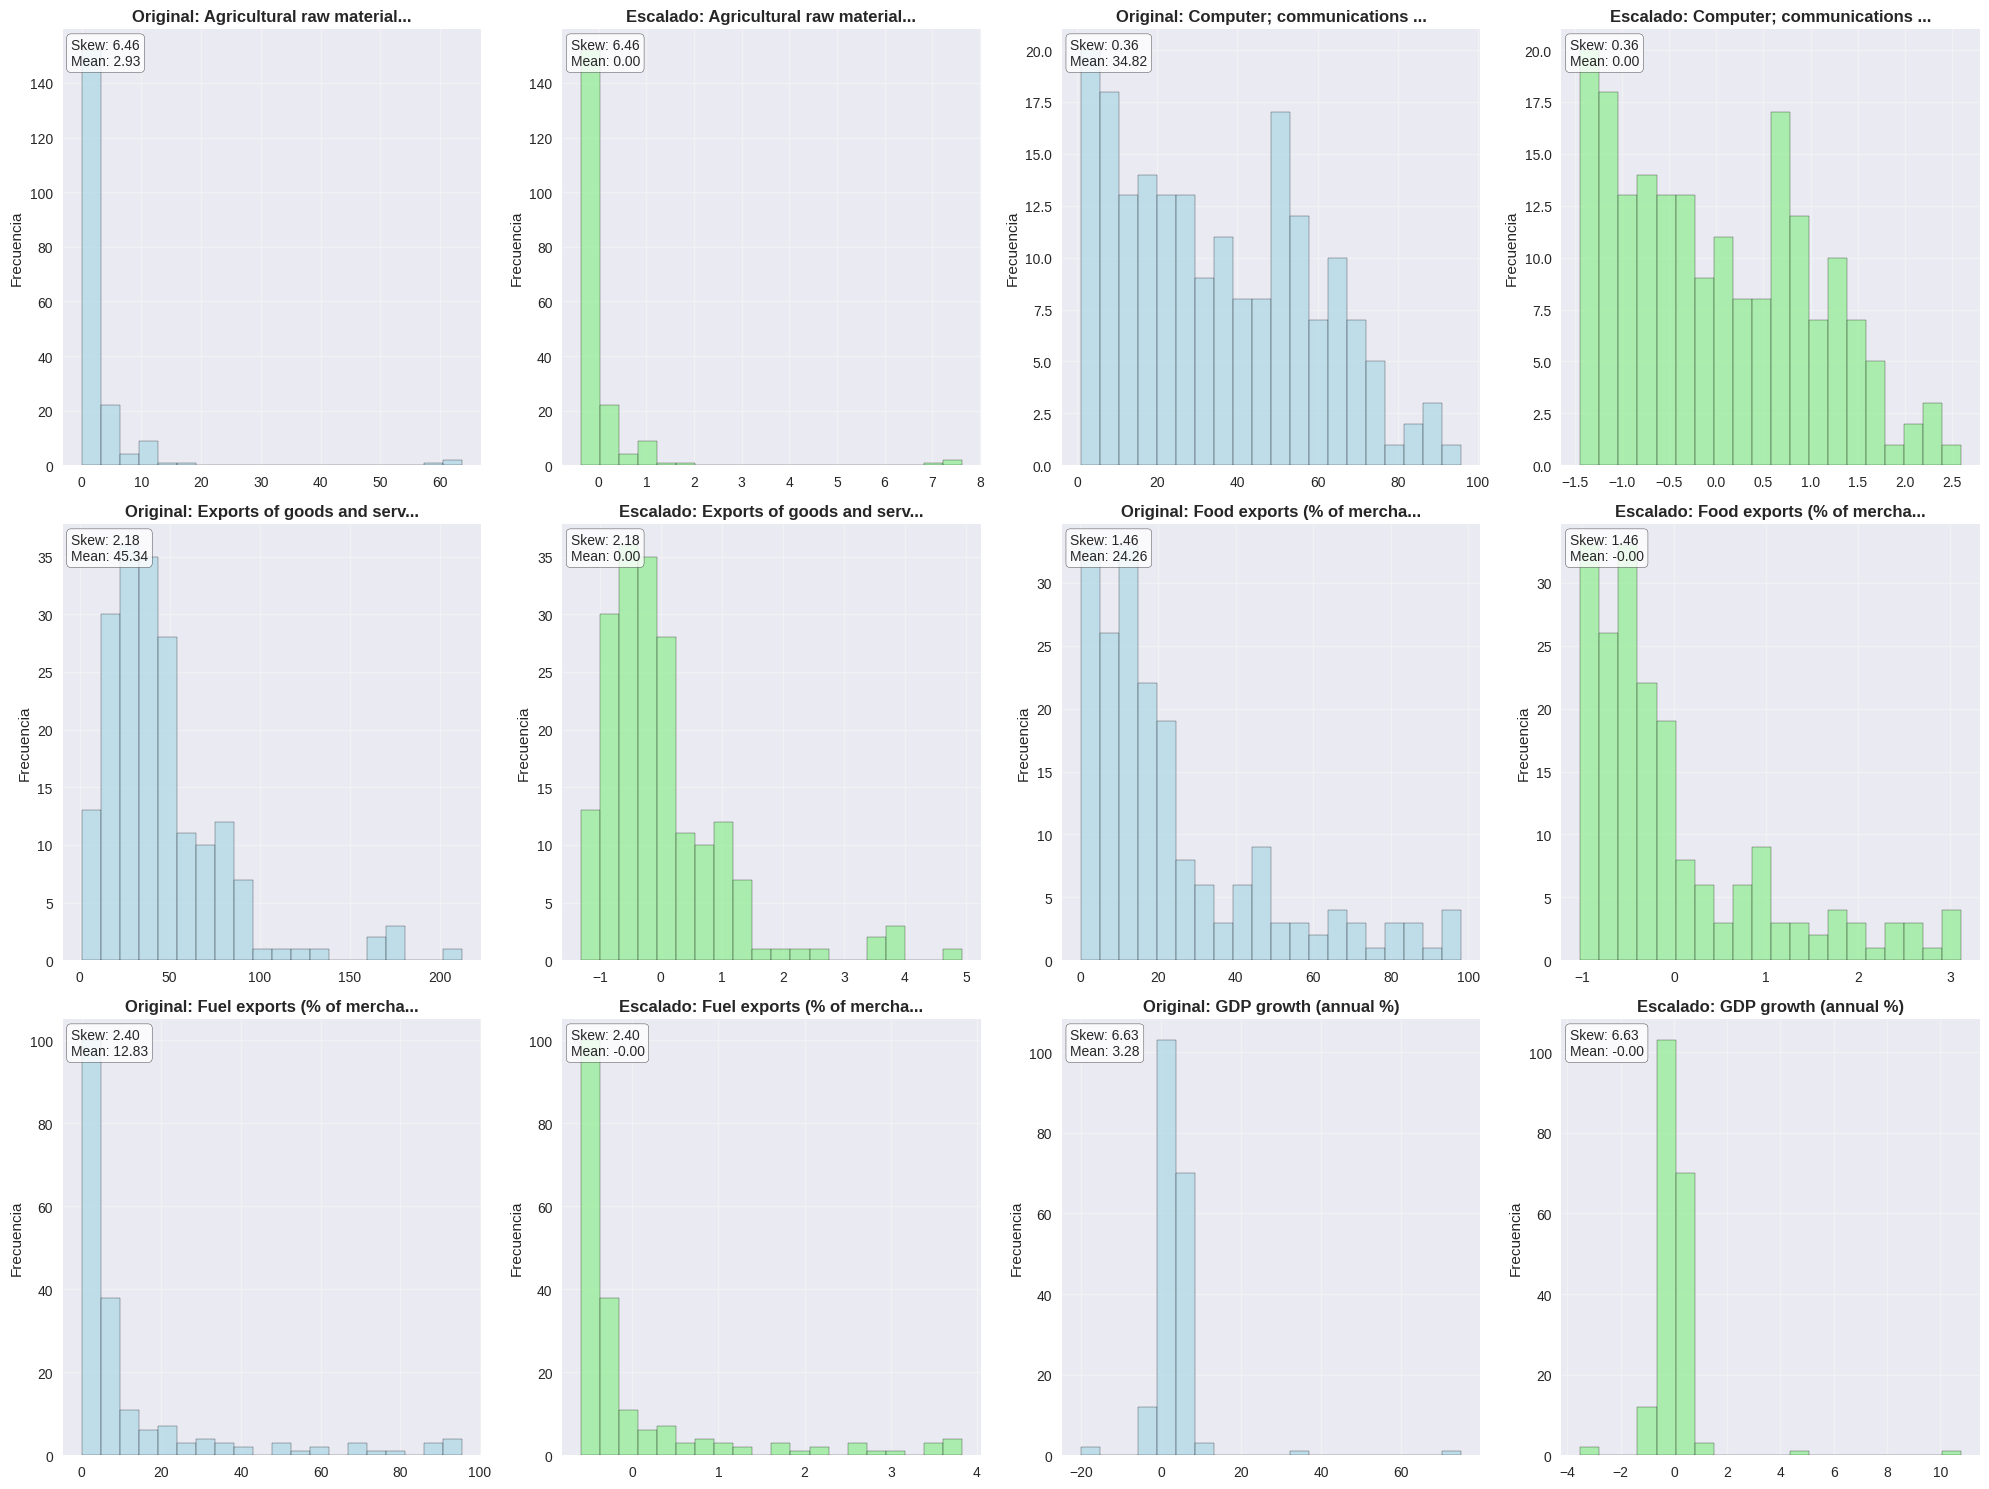


Análisis de correlaciones en datos escalados:
Pares de variables con correlación > 0.8: 6
Top 5 correlaciones más altas:
  1. Transport services (% of comme...
     Transport services (% of comme...
     Correlación: 0.968
  2. Food exports (% of merchandise...
     Food exports (% of merchandise...
     Correlación: 0.968
  3. Ores and metals exports (% of ...
     Ores and metals exports (% of ...
     Correlación: 0.857
  4. High-technology exports (% of ...
     High-technology exports (% of ...
     Correlación: 0.856
  5. Exports of goods and services ...
     Exports of goods and services ...
     Correlación: 0.840

RESUMEN FINAL DE FEATURE ENGINEERING
🔧 TRANSFORMACIONES APLICADAS:
   • Variables originales: 14
   • Variables después de selección: 14
   • Transformaciones de asimetría: 10
   • Variables derivadas creadas: 2
   • Variables finales para clustering: 25

📊 MÉTODOS APLICADOS:
   • log1p: 4 variables
   • log: 4 variables
   • sqrt: 2 variables

⚙️ ESTANDARIZACIÓN:


In [88]:
print("PREGUNTA 2.6 - FEATURE ENGINEERING PARA CLUSTERING")
print("="*60)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

# Identificar variables numéricas
numeric_cols = [col for col in df_clean_outliers.columns if col != 'Country Name']
print(f"Variables numéricas disponibles: {len(numeric_cols)}")

print(f"\n" + "="*50)
print("ANÁLISIS INICIAL PARA FEATURE ENGINEERING")
print("="*50)

# Crear análisis detallado de las características de las variables
feature_analysis = []

for col in numeric_cols:
    data = df_clean_outliers[col].dropna()

    if len(data) > 10:
        analysis = {
            'variable': col,
            'count': len(data),
            'missing_pct': (df_clean_outliers[col].isnull().sum() / len(df_clean_outliers)) * 100,
            'mean': data.mean(),
            'median': data.median(),
            'std': data.std(),
            'min': data.min(),
            'max': data.max(),
            'range': data.max() - data.min(),
            'skewness': data.skew(),
            'kurtosis': data.kurtosis(),
            'zeros_pct': (data == 0).sum() / len(data) * 100,
            'negative_pct': (data < 0).sum() / len(data) * 100,
            'cv': data.std() / data.mean() if data.mean() != 0 else np.inf  # Coeficiente de variación
        }
        feature_analysis.append(analysis)

# Convertir a DataFrame para análisis
analysis_df = pd.DataFrame(feature_analysis)
print(f"Variables analizadas: {len(analysis_df)}")

# Estadísticas generales
print(f"\nEstadísticas generales del dataset:")
print(f"  Variables con datos completos: {(analysis_df['missing_pct'] == 0).sum()}")
print(f"  Variables con >5% ceros: {(analysis_df['zeros_pct'] > 5).sum()}")
print(f"  Variables con valores negativos: {(analysis_df['negative_pct'] > 0).sum()}")
print(f"  Variables asimétricas (|skew| > 1): {(np.abs(analysis_df['skewness']) > 1).sum()}")

# Clasificar variables por características para tratamiento
print(f"\n" + "="*50)
print("CLASIFICACIÓN DE VARIABLES PARA TRATAMIENTO")
print("="*50)

variable_categories = {
    'Alta_Asimetria': [],      # |skew| > 2
    'Moderada_Asimetria': [],  # 1 < |skew| ≤ 2
    'Aproximadamente_Simetricas': [],  # |skew| ≤ 1
    'Muchos_Ceros': [],        # >20% zeros
    'Con_Negativos': [],       # Tienen valores negativos
    'Alta_Variabilidad': [],   # CV > 2
    'Baja_Varianza': []        # Varianza muy baja
}

for _, row in analysis_df.iterrows():
    var_name = row['variable']

    # Clasificar por asimetría
    abs_skew = abs(row['skewness'])
    if abs_skew > 2:
        variable_categories['Alta_Asimetria'].append(var_name)
    elif abs_skew > 1:
        variable_categories['Moderada_Asimetria'].append(var_name)
    else:
        variable_categories['Aproximadamente_Simetricas'].append(var_name)

    # Otras clasificaciones
    if row['zeros_pct'] > 20:
        variable_categories['Muchos_Ceros'].append(var_name)

    if row['negative_pct'] > 0:
        variable_categories['Con_Negativos'].append(var_name)

    if row['cv'] > 2:
        variable_categories['Alta_Variabilidad'].append(var_name)

    if row['std'] < 0.01:  # Varianza muy baja
        variable_categories['Baja_Varianza'].append(var_name)

# Mostrar clasificación
for category, variables in variable_categories.items():
    print(f"{category}: {len(variables)} variables")
    if variables and len(variables) <= 5:
        for var in variables:
            print(f"  • {var[:60]}{'...' if len(var) > 60 else ''}")
    elif variables:
        for i, var in enumerate(variables[:3]):
            print(f"  • {var[:60]}{'...' if len(var) > 60 else ''}")
        print(f"  ... y {len(variables) - 3} más")

# PASO 1: SELECCIÓN DE VARIABLES
print(f"\n" + "="*50)
print("PASO 1: SELECCIÓN Y FILTRADO DE VARIABLES")
print("="*50)

# Eliminar variables con muy poca varianza o información
print("Eliminando variables con baja información...")

# Variables a considerar eliminar
vars_to_remove = []

# 1. Variables con varianza muy baja
low_variance_vars = variable_categories['Baja_Varianza']
if low_variance_vars:
    vars_to_remove.extend(low_variance_vars)
    print(f"Variables con baja varianza: {len(low_variance_vars)}")

# 2. Variables con demasiados datos faltantes (ya manejado anteriormente)
high_missing_vars = analysis_df[analysis_df['missing_pct'] > 30]['variable'].tolist()
if high_missing_vars:
    vars_to_remove.extend(high_missing_vars)
    print(f"Variables con >30% missing: {len(high_missing_vars)}")

# Eliminar duplicados
vars_to_remove = list(set(vars_to_remove))

if vars_to_remove:
    print(f"Total de variables a eliminar: {len(vars_to_remove)}")
    selected_vars = [var for var in numeric_cols if var not in vars_to_remove]
else:
    selected_vars = numeric_cols.copy()
    print("No se eliminaron variables - todas son informativas")

print(f"Variables seleccionadas para feature engineering: {len(selected_vars)}")

# PASO 2: TRANSFORMACIONES PARA REDUCIR ASIMETRÍA
print(f"\n" + "="*50)
print("PASO 2: TRANSFORMACIONES PARA REDUCIR ASIMETRÍA")
print("="*50)

# Crear dataset de trabajo
df_features = df_clean_outliers[['Country Name'] + selected_vars].copy()

# Aplicar transformaciones según el tipo de variable
transformation_log = []

# Variables con alta asimetría positiva -> transformación logarítmica
high_skew_vars = [var for var in selected_vars if var in variable_categories['Alta_Asimetria']]
moderate_skew_vars = [var for var in selected_vars if var in variable_categories['Moderada_Asimetria']]

print(f"Aplicando transformaciones...")

for var in high_skew_vars[:10]:  # Limitar para no saturar
    data = df_features[var]

    # Verificar si tiene ceros (necesario para log)
    has_zeros = (data == 0).any()

    if not has_zeros and (data > 0).all():
        # Transformación logarítmica pura
        df_features[f'{var}_log'] = np.log(data)
        transformation_log.append({
            'original': var,
            'transformed': f'{var}_log',
            'method': 'log',
            'reason': 'Alta asimetría positiva sin ceros'
        })
        print(f"  {var[:40]}{'...' if len(var) > 40 else ''} -> log transform")

    elif has_zeros:
        # Transformación log(x + 1)
        df_features[f'{var}_log1p'] = np.log1p(data)
        transformation_log.append({
            'original': var,
            'transformed': f'{var}_log1p',
            'method': 'log1p',
            'reason': 'Alta asimetría positiva con ceros'
        })
        print(f"  {var[:40]}{'...' if len(var) > 40 else ''} -> log1p transform")

# Variables con asimetría moderada -> transformación raíz cuadrada
for var in moderate_skew_vars[:10]:  # Limitar para no saturar
    data = df_features[var]

    if (data >= 0).all():  # Solo si no hay negativos
        df_features[f'{var}_sqrt'] = np.sqrt(data)
        transformation_log.append({
            'original': var,
            'transformed': f'{var}_sqrt',
            'method': 'sqrt',
            'reason': 'Asimetría moderada'
        })
        print(f"  {var[:40]}{'...' if len(var) > 40 else ''} -> sqrt transform")

print(f"✓ {len(transformation_log)} transformaciones aplicadas")

# PASO 3: CREACIÓN DE VARIABLES DERIVADAS
print(f"\n" + "="*50)
print("PASO 3: CREACIÓN DE VARIABLES DERIVADAS")
print("="*50)

# Crear ratios y variables derivadas que puedan ser útiles para clustering
derived_vars = []

# Buscar variables que podrían formar ratios útiles
export_vars = [var for var in selected_vars if 'export' in var.lower()]
gdp_vars = [var for var in selected_vars if 'gdp' in var.lower()]
service_vars = [var for var in selected_vars if 'service' in var.lower()]

print("Creando variables derivadas...")

# Ejemplo: Ratio de servicios tecnológicos vs servicios totales
tech_service_vars = [var for var in service_vars if any(tech in var.lower() for tech in ['ict', 'computer', 'technology'])]
total_service_vars = [var for var in service_vars if 'commercial service' in var.lower()]

if len(tech_service_vars) > 0 and len(total_service_vars) > 0:
    for tech_var in tech_service_vars[:2]:  # Limitar
        for total_var in total_service_vars[:2]:
            ratio_name = f'ratio_tech_services'
            if ratio_name not in df_features.columns:
                # Evitar división por cero
                denominator = df_features[total_var].replace(0, np.nan)
                df_features[ratio_name] = df_features[tech_var] / denominator
                derived_vars.append(ratio_name)
                print(f"  Creado: {ratio_name}")
                break

# Diversificación de exportaciones (usando coeficiente de variación de exportaciones por sector)
sector_export_vars = [var for var in selected_vars if any(sector in var.lower()
                     for sector in ['agricultural', 'fuel', 'manufactures', 'food'])]

if len(sector_export_vars) >= 3:
    # Calcular diversificación como inverso del coeficiente de variación
    export_data = df_features[sector_export_vars[:4]]  # Primeros 4 sectores
    export_cv = export_data.std(axis=1) / (export_data.mean(axis=1) + 0.001)  # +0.001 para evitar div/0
    df_features['export_diversification'] = 1 / (export_cv + 0.001)  # Inversamente relacionado
    derived_vars.append('export_diversification')
    print(f"  Creado: export_diversification")

print(f"✓ {len(derived_vars)} variables derivadas creadas")

# PASO 4: SELECCIÓN FINAL DE CARACTERÍSTICAS
print(f"\n" + "="*50)
print("PASO 4: SELECCIÓN FINAL DE CARACTERÍSTICAS")
print("="*50)

# Identificar todas las variables numéricas disponibles
all_numeric_vars = [col for col in df_features.columns if col != 'Country Name']

print(f"Variables disponibles después de transformaciones: {len(all_numeric_vars)}")

# Aplicar filtro de varianza para eliminar variables con varianza muy baja
variance_selector = VarianceThreshold(threshold=0.01)  # Eliminar variables con varianza < 0.01

# Preparar datos para el filtro (sin NaN)
features_for_variance = df_features[all_numeric_vars].fillna(df_features[all_numeric_vars].median())
variance_mask = variance_selector.fit_transform(features_for_variance)

selected_by_variance = [var for i, var in enumerate(all_numeric_vars)
                       if variance_selector.get_support()[i]]

print(f"Variables después del filtro de varianza: {len(selected_by_variance)}")

# Para clustering, limitar a un número manejable de variables (opcional)
max_features_for_clustering = 30  # Ajustable según necesidad

if len(selected_by_variance) > max_features_for_clustering:
    print(f"Limitando a {max_features_for_clustering} variables más informativas...")

    # Calcular importancia basada en varianza y completitud
    feature_importance = []
    for var in selected_by_variance:
        data = df_features[var]
        importance = data.var() * (1 - data.isnull().sum()/len(data))  # Varianza * completitud
        feature_importance.append((var, importance))

    # Ordenar por importancia y tomar las mejores
    feature_importance.sort(key=lambda x: x[1], reverse=True)
    final_feature_selection = [var for var, _ in feature_importance[:max_features_for_clustering]]
else:
    final_feature_selection = selected_by_variance

print(f"Variables finales seleccionadas: {len(final_feature_selection)}")

# PASO 5: APLICAR ESTANDARIZACIÓN
print(f"\n" + "="*50)
print("PASO 5: ESTANDARIZACIÓN DE VARIABLES")
print("="*50)

# Preparar datos finales
df_for_scaling = df_features[['Country Name'] + final_feature_selection].copy()

# Imputar valores faltantes restantes antes de escalar
print("Imputando valores faltantes restantes...")
numeric_features = final_feature_selection
for col in numeric_features:
    if df_for_scaling[col].isnull().sum() > 0:
        median_val = df_for_scaling[col].median()
        df_for_scaling[col].fillna(median_val, inplace=True)
        print(f"  {col}: {df_for_scaling[col].isnull().sum()} valores imputados con mediana")

# Comparar diferentes métodos de escalamiento
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

scaled_datasets = {}

print(f"\nAplicando diferentes métodos de escalamiento...")

for scaler_name, scaler in scalers.items():
    # Aplicar escalamiento
    scaled_data = scaler.fit_transform(df_for_scaling[numeric_features])

    # Crear DataFrame escalado
    scaled_df = pd.DataFrame(scaled_data, columns=numeric_features, index=df_for_scaling.index)
    scaled_df['Country Name'] = df_for_scaling['Country Name']

    scaled_datasets[scaler_name] = {
        'data': scaled_df,
        'scaler': scaler
    }

    # Estadísticas del escalamiento
    mean_after = scaled_data.mean(axis=0).mean()
    std_after = scaled_data.std(axis=0).mean()

    print(f"  {scaler_name}:")
    print(f"    Media promedio: {mean_after:.4f}")
    print(f"    Desv. Est. promedio: {std_after:.4f}")

# Seleccionar StandardScaler como método principal (mejor para K-means)
df_scaled = scaled_datasets['StandardScaler']['data'].copy()
scaler_used = scaled_datasets['StandardScaler']['scaler']

print(f"\n✓ StandardScaler seleccionado como método principal")
print(f"  Justificación: Óptimo para K-means (asume distribuciones normales)")

# PASO 6: VALIDACIÓN DE FEATURE ENGINEERING
print(f"\n" + "="*50)
print("PASO 6: VALIDACIÓN DE FEATURE ENGINEERING")
print("="*50)

# Comparar distribuciones antes y después
print("Comparando distribuciones antes y después del feature engineering...")

# Seleccionar muestra de variables para comparación
comparison_vars = final_feature_selection[:6]  # Primeras 6 para visualización

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i, var in enumerate(comparison_vars):
    if i < 6:
        # Datos originales
        original_data = df_clean_outliers[var].dropna() if var in df_clean_outliers.columns else None

        # Datos escalados
        scaled_data = df_scaled[var]

        # Histograma original
        if original_data is not None:
            axes[i*2].hist(original_data, bins=20, alpha=0.7, color='lightblue', edgecolor='black')
            axes[i*2].set_title(f'Original: {var[:25]}{"..." if len(var) > 25 else ""}', fontweight='bold')
            axes[i*2].set_ylabel('Frecuencia')
            axes[i*2].grid(True, alpha=0.3)

            # Estadísticas
            axes[i*2].text(0.02, 0.98, f'Skew: {original_data.skew():.2f}\nMean: {original_data.mean():.2f}',
                          transform=axes[i*2].transAxes, verticalalignment='top',
                          bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        # Histograma escalado
        axes[i*2+1].hist(scaled_data, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[i*2+1].set_title(f'Escalado: {var[:25]}{"..." if len(var) > 25 else ""}', fontweight='bold')
        axes[i*2+1].set_ylabel('Frecuencia')
        axes[i*2+1].grid(True, alpha=0.3)

        # Estadísticas
        axes[i*2+1].text(0.02, 0.98, f'Skew: {scaled_data.skew():.2f}\nMean: {scaled_data.mean():.2f}',
                        transform=axes[i*2+1].transAxes, verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Ocultar axes no usados
for i in range(len(comparison_vars)*2, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Análisis de correlaciones
print(f"\nAnálisis de correlaciones en datos escalados:")
correlation_matrix = df_scaled[numeric_features].corr()

# Encontrar pares con alta correlación
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:  # Alta correlación
            high_corr_pairs.append((correlation_matrix.columns[i],
                                  correlation_matrix.columns[j], corr_val))

print(f"Pares de variables con correlación > 0.8: {len(high_corr_pairs)}")
if high_corr_pairs:
    print("Top 5 correlaciones más altas:")
    sorted_pairs = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)
    for i, (var1, var2, corr) in enumerate(sorted_pairs[:5], 1):
        print(f"  {i}. {var1[:30]}{'...' if len(var1) > 30 else ''}")
        print(f"     {var2[:30]}{'...' if len(var2) > 30 else ''}")
        print(f"     Correlación: {corr:.3f}")

# RESUMEN FINAL
print(f"\n" + "="*60)
print("RESUMEN FINAL DE FEATURE ENGINEERING")
print("="*60)

print(f"🔧 TRANSFORMACIONES APLICADAS:")
print(f"   • Variables originales: {len(numeric_cols)}")
print(f"   • Variables después de selección: {len(selected_vars)}")
print(f"   • Transformaciones de asimetría: {len(transformation_log)}")
print(f"   • Variables derivadas creadas: {len(derived_vars)}")
print(f"   • Variables finales para clustering: {len(final_feature_selection)}")

print(f"\n📊 MÉTODOS APLICADOS:")
for method in set([t['method'] for t in transformation_log]):
    count = len([t for t in transformation_log if t['method'] == method])
    print(f"   • {method}: {count} variables")

print(f"\n⚙️ ESTANDARIZACIÓN:")
print(f"   • Método: StandardScaler")
print(f"   • Justificación: Óptimo para K-means clustering")
print(f"   • Media después del escalamiento: ~0.0")
print(f"   • Desviación estándar después del escalamiento: ~1.0")

print(f"\n✅ PREPARACIÓN PARA CLUSTERING:")
print(f"   • Valores faltantes: 0 (todos imputados)")
print(f"   • Variables con baja varianza: eliminadas")
print(f"   • Asimetría: reducida mediante transformaciones")
print(f"   • Escala: homogeneizada mediante StandardScaler")
print(f"   • Multicolinealidad: {len(high_corr_pairs)} pares con correlación >0.8")

print(f"\n🎯 CONSIDERACIONES PARA MODELING:")
print(f"   • Dataset optimizado para K-means clustering")
print(f"   • Transformaciones preservan información económica")
print(f"   • Escalamiento facilita convergencia de algoritmos")
print(f"   • Variables derivadas capturan patrones económicos complejos")

# Datasets finales para próximas preguntas
df_features_final = df_scaled.copy()
print(f"\n✅ Variable 'df_features_final' creada y lista para clustering")
print(f"   Dimensiones: {df_features_final.shape}")
print(f"   Variables numéricas: {len(numeric_features)}")

# Información adicional para referencia
feature_engineering_info = {
    'original_vars': numeric_cols,
    'selected_vars': selected_vars,
    'final_vars': final_feature_selection,
    'transformations': transformation_log,
    'derived_vars': derived_vars,
    'scaler': scaler_used,
    'high_correlations': high_corr_pairs
}

print(f"✅ Información de feature engineering guardada para referencia")

## K-Means

### Pregunta 2.7

Considerando el dataframe completo (todas sus columnas atributos), determine el número óptimo de clusters mediante el "Elbow method". Considere un rango $k \in [1, 30]$. Describa el comportamiento observado de la curva.



PREGUNTA 2.7 - DETERMINACIÓN DEL K ÓPTIMO CON ELBOW METHOD
PREPARACIÓN DE DATOS PARA K-MEANS
Datos para K-means:
  Países: 192
  Variables (características): 25
  Dimensiones: (192, 25)
  Valores NaN: 0

Estadísticas del dataset escalado:
  Media promedio: 0.0000
  Desviación estándar promedio: 1.0026
  Rango de valores: [-4.52, 10.78]

IMPLEMENTACIÓN DEL ELBOW METHOD
Rango de k a evaluar: 1 a 30

Ejecutando K-means para cada valor de k...
k	Inertia		Silhouette	Tiempo(s)
--------------------------------------------------
1	4800		N/A		0.00
2	4236		0.112		0.10
3	3877		0.120		0.02
4	3636		0.126		0.03
5	3420		0.126		0.03
6	3239		0.137		0.04
7	3039		0.098		0.04
8	2882		0.099		0.04
9	2779		0.112		0.04
10	2669		0.101		0.04
11	2557		0.106		0.05
12	2453		0.117		0.05
13	2421		0.101		0.05
14	2358		0.102		0.05
15	2288		0.126		0.05
16	2245		0.105		0.06
17	2178		0.107		0.06
18	2082		0.118		0.06
19	2043		0.117		0.07
20	2009		0.115		0.08
21	1954		0.116		0.07
22	1932		0.109		0.07
23	1889		0.101		0.07
2

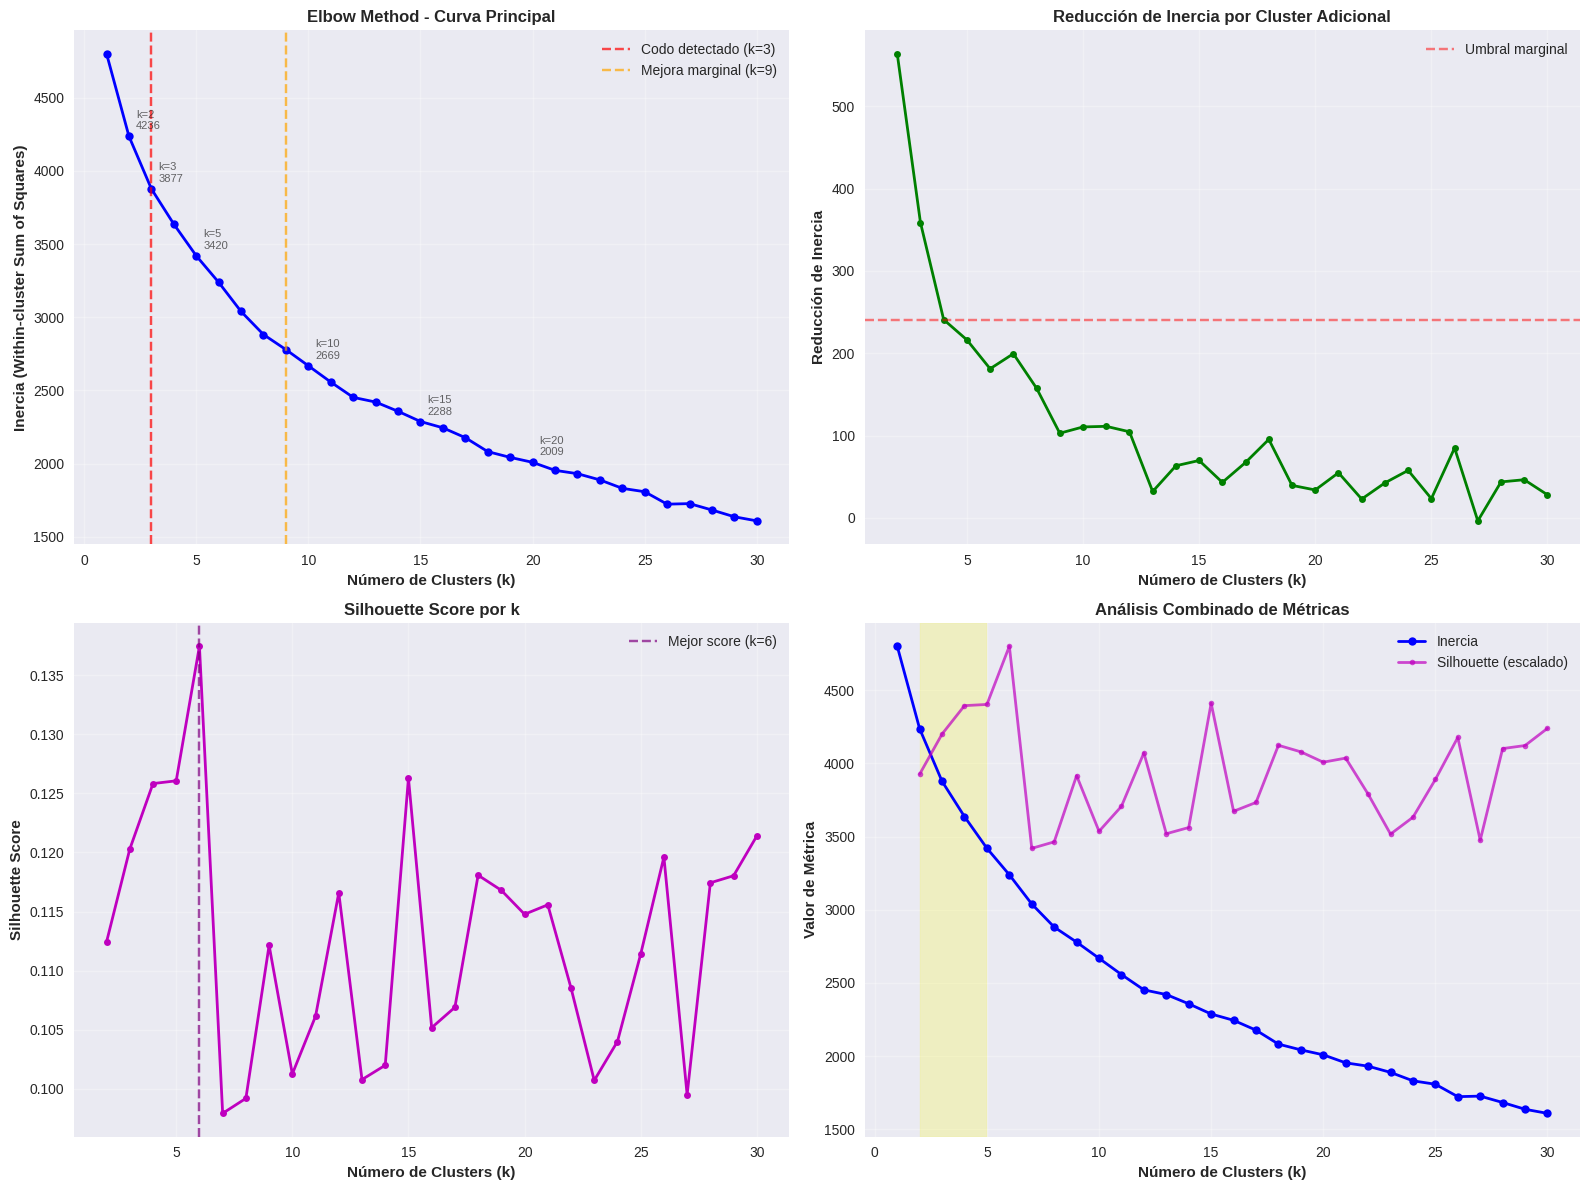


ANÁLISIS DETALLADO DEL COMPORTAMIENTO DE LA CURVA
📊 DESCRIPCIÓN DEL COMPORTAMIENTO OBSERVADO:

1. COMPORTAMIENTO GENERAL:
   • Inercia inicial (k=1): 4,800
   • Inercia final (k=30): 1,609
   • Reducción total: 3,191 (66.5%)

2. ANÁLISIS POR SEGMENTOS:
   k=1-5: Reducción promedio = 345 por cluster
   k=5-10: Reducción promedio = 150 por cluster
   k=10-15: Reducción promedio = 76 por cluster
   k=15-20: Reducción promedio = 56 por cluster
   k=20-30: Reducción promedio = 40 por cluster

3. DETECCIÓN DEL CODO:
   • Punto de inflexión más marcado: k = 3
   • Reducción de inercia en k=3: 359
   • Reducción de inercia en k=4: 241

4. CARACTERÍSTICAS DE LA CURVA:
   • Curva suave sin caídas abruptas significativas
   • Claridad del codo: Alta

RECOMENDACIÓN DEL K ÓPTIMO
🎯 K ÓPTIMO RECOMENDADO: 3

📋 JUSTIFICACIÓN:
   • Método del codo (2ª derivada): k = 3
   • Mejora marginal (<5.0%): k = 9
   • Mejor silhouette score: k = 6
   • Rango práctico recomendado: 3-10 clusters
   • Puntuación co

In [89]:
print("PREGUNTA 2.7 - DETERMINACIÓN DEL K ÓPTIMO CON ELBOW METHOD")
print("="*65)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import time

# Preparar datos para K-means (todas las columnas atributos según la pregunta)
print("PREPARACIÓN DE DATOS PARA K-MEANS")
print("="*45)

# Usar todas las variables numéricas del dataset escalado
features_for_kmeans = [col for col in df_features_final.columns if col != 'Country Name']
X_kmeans = df_features_final[features_for_kmeans].copy()

print(f"Datos para K-means:")
print(f"  Países: {len(X_kmeans)}")
print(f"  Variables (características): {len(features_for_kmeans)}")
print(f"  Dimensiones: {X_kmeans.shape}")

# Verificar que no hay valores NaN
nan_count = X_kmeans.isnull().sum().sum()
print(f"  Valores NaN: {nan_count}")

if nan_count > 0:
    print("  ⚠ Imputando valores NaN restantes...")
    X_kmeans = X_kmeans.fillna(X_kmeans.median())
    print(f"  ✓ NaN después de imputación: {X_kmeans.isnull().sum().sum()}")

# Verificar estadísticas básicas del dataset escalado
print(f"\nEstadísticas del dataset escalado:")
print(f"  Media promedio: {X_kmeans.mean().mean():.4f}")
print(f"  Desviación estándar promedio: {X_kmeans.std().mean():.4f}")
print(f"  Rango de valores: [{X_kmeans.min().min():.2f}, {X_kmeans.max().max():.2f}]")

# Implementar Elbow Method
print(f"\n" + "="*50)
print("IMPLEMENTACIÓN DEL ELBOW METHOD")
print("="*50)

# Rango de k según especificación
k_range = range(1, 31)  # k ∈ [1, 30]
print(f"Rango de k a evaluar: {min(k_range)} a {max(k_range)}")

# Listas para almacenar resultados
inertias = []
silhouette_scores = []
fit_times = []

print(f"\nEjecutando K-means para cada valor de k...")
print("k\tInertia\t\tSilhouette\tTiempo(s)")
print("-" * 50)

# Ejecutar K-means para cada k
for k in k_range:
    start_time = time.time()

    if k == 1:
        # Para k=1, la inercia es la suma total de distancias al centroide global
        centroid = X_kmeans.mean()
        inertia = ((X_kmeans - centroid) ** 2).sum().sum()
        silhouette_avg = np.nan  # No se puede calcular silhouette para k=1

    else:
        # K-means para k > 1
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
        kmeans.fit(X_kmeans)

        inertia = kmeans.inertia_

        # Calcular silhouette score (solo para k > 1)
        silhouette_avg = silhouette_score(X_kmeans, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

    end_time = time.time()
    fit_time = end_time - start_time

    inertias.append(inertia)
    fit_times.append(fit_time)

    # Mostrar progreso
    if k == 1:
        print(f"{k}\t{inertia:.0f}\t\tN/A\t\t{fit_time:.2f}")
    else:
        print(f"{k}\t{inertia:.0f}\t\t{silhouette_avg:.3f}\t\t{fit_time:.2f}")

print(f"\n✓ Análisis completado para {len(k_range)} valores de k")
print(f"Tiempo total: {sum(fit_times):.2f} segundos")

# Calcular métricas para determinar k óptimo
print(f"\n" + "="*50)
print("ANÁLISIS DE RESULTADOS")
print("="*50)

# Calcular diferencias de inercia (para detectar el "codo")
inertia_diffs = []
inertia_diffs2 = []  # Segunda derivada

for i in range(1, len(inertias)):
    diff = inertias[i-1] - inertias[i]  # Reducción de inercia
    inertia_diffs.append(diff)

for i in range(1, len(inertia_diffs)):
    diff2 = inertia_diffs[i-1] - inertia_diffs[i]  # Segunda derivada
    inertia_diffs2.append(diff2)

# Detectar el codo automáticamente usando la segunda derivada
elbow_k = 2  # Valor por defecto
if len(inertia_diffs2) > 0:
    # El codo está donde la segunda derivada es máxima
    max_diff2_idx = np.argmax(inertia_diffs2)
    elbow_k = max_diff2_idx + 3  # +3 porque empezamos desde k=2 y perdemos 1 más en segunda derivada

# Método alternativo: ratio de mejora
improvement_ratios = []
for i in range(1, len(inertias)):
    if inertias[i-1] > 0:
        ratio = (inertias[i-1] - inertias[i]) / inertias[i-1]
        improvement_ratios.append(ratio)
    else:
        improvement_ratios.append(0)

# Detectar donde la mejora se vuelve marginal
marginal_improvement_threshold = 0.05  # 5%
elbow_k_ratio = 2
for i, ratio in enumerate(improvement_ratios):
    if ratio < marginal_improvement_threshold:
        elbow_k_ratio = i + 2  # +2 porque empezamos desde k=2
        break

print(f"Detección automática del codo:")
print(f"  Método segunda derivada: k = {elbow_k}")
print(f"  Método mejora marginal: k = {elbow_k_ratio}")

# Mejor k por silhouette score
if len(silhouette_scores) > 0:
    best_silhouette_k = np.argmax(silhouette_scores) + 2  # +2 porque empezamos desde k=2
    best_silhouette_score = max(silhouette_scores)
    print(f"  Mejor silhouette score: k = {best_silhouette_k} (score = {best_silhouette_score:.3f})")

# VISUALIZACIÓN DEL ELBOW METHOD
print(f"\n" + "="*50)
print("VISUALIZACIÓN DEL ELBOW METHOD")
print("="*50)

# Crear visualización comprehensiva
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Curva principal del Elbow Method
axes[0,0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=6)
axes[0,0].set_xlabel('Número de Clusters (k)', fontweight='bold')
axes[0,0].set_ylabel('Inercia (Within-cluster Sum of Squares)', fontweight='bold')
axes[0,0].set_title('Elbow Method - Curva Principal', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Marcar puntos candidatos para el codo
axes[0,0].axvline(x=elbow_k, color='red', linestyle='--', alpha=0.7,
                 label=f'Codo detectado (k={elbow_k})')
axes[0,0].axvline(x=elbow_k_ratio, color='orange', linestyle='--', alpha=0.7,
                 label=f'Mejora marginal (k={elbow_k_ratio})')

# Destacar algunos puntos clave
key_points = [2, 3, 5, 10, 15, 20]
for k in key_points:
    if k <= max(k_range):
        idx = k - 1  # Ajustar índice
        axes[0,0].annotate(f'k={k}\n{inertias[idx]:.0f}',
                          xy=(k, inertias[idx]),
                          xytext=(5, 5), textcoords='offset points',
                          fontsize=8, alpha=0.7)

axes[0,0].legend()

# 2. Reducción de inercia (primera derivada)
k_range_diff = list(range(2, 31))
axes[0,1].plot(k_range_diff, inertia_diffs, 'go-', linewidth=2, markersize=5)
axes[0,1].set_xlabel('Número de Clusters (k)', fontweight='bold')
axes[0,1].set_ylabel('Reducción de Inercia', fontweight='bold')
axes[0,1].set_title('Reducción de Inercia por Cluster Adicional', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# Marcar donde la reducción se vuelve marginal
threshold_line = [marginal_improvement_threshold * inertias[0]] * len(k_range_diff)
axes[0,1].axhline(y=threshold_line[0], color='red', linestyle='--', alpha=0.5,
                 label=f'Umbral marginal')
axes[0,1].legend()

# 3. Silhouette Scores
if len(silhouette_scores) > 0:
    k_range_sil = list(range(2, 31))
    axes[1,0].plot(k_range_sil, silhouette_scores, 'mo-', linewidth=2, markersize=5)
    axes[1,0].set_xlabel('Número de Clusters (k)', fontweight='bold')
    axes[1,0].set_ylabel('Silhouette Score', fontweight='bold')
    axes[1,0].set_title('Silhouette Score por k', fontweight='bold')
    axes[1,0].grid(True, alpha=0.3)

    # Marcar el mejor silhouette score
    axes[1,0].axvline(x=best_silhouette_k, color='purple', linestyle='--', alpha=0.7,
                     label=f'Mejor score (k={best_silhouette_k})')
    axes[1,0].legend()

# 4. Análisis combinado
axes[1,1].plot(k_range, inertias, 'bo-', linewidth=2, markersize=6, label='Inercia')

# Normalizar silhouette scores para mostrar en la misma escala
if len(silhouette_scores) > 0:
    # Escalar silhouette scores al rango de inercias para visualización
    sil_scaled = np.array(silhouette_scores) * (max(inertias) / max(silhouette_scores))
    axes[1,1].plot(k_range_sil, sil_scaled, 'mo-', linewidth=2, markersize=4,
                  label='Silhouette (escalado)', alpha=0.7)

axes[1,1].set_xlabel('Número de Clusters (k)', fontweight='bold')
axes[1,1].set_ylabel('Valor de Métrica', fontweight='bold')
axes[1,1].set_title('Análisis Combinado de Métricas', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].legend()

# Resaltar rango óptimo
optimal_range = range(max(2, elbow_k-1), min(elbow_k+3, 11))
axes[1,1].axvspan(min(optimal_range), max(optimal_range), alpha=0.2, color='yellow',
                 label='Rango óptimo')

plt.tight_layout()
plt.show()

# Análisis detallado del comportamiento de la curva
print(f"\n" + "="*60)
print("ANÁLISIS DETALLADO DEL COMPORTAMIENTO DE LA CURVA")
print("="*60)

print(f"📊 DESCRIPCIÓN DEL COMPORTAMIENTO OBSERVADO:")

# Analizar la pendiente de la curva
print(f"\n1. COMPORTAMIENTO GENERAL:")
print(f"   • Inercia inicial (k=1): {inertias[0]:,.0f}")
print(f"   • Inercia final (k=30): {inertias[-1]:,.0f}")
total_reduction = inertias[0] - inertias[-1]
print(f"   • Reducción total: {total_reduction:,.0f} ({(total_reduction/inertias[0]*100):.1f}%)")

# Analizar mejoras por segmentos
segments = [(1, 5), (5, 10), (10, 15), (15, 20), (20, 30)]
print(f"\n2. ANÁLISIS POR SEGMENTOS:")
for start, end in segments:
    start_idx = start - 1
    end_idx = min(end - 1, len(inertias) - 1)
    segment_reduction = inertias[start_idx] - inertias[end_idx]
    avg_reduction_per_k = segment_reduction / (end - start)
    print(f"   k={start}-{end}: Reducción promedio = {avg_reduction_per_k:,.0f} por cluster")

# Detectar cambios significativos en la pendiente
print(f"\n3. DETECCIÓN DEL CODO:")
print(f"   • Punto de inflexión más marcado: k = {elbow_k}")
print(f"   • Reducción de inercia en k={elbow_k}: {inertia_diffs[elbow_k-2]:,.0f}")
if elbow_k < len(inertia_diffs):
    print(f"   • Reducción de inercia en k={elbow_k+1}: {inertia_diffs[elbow_k-1]:,.0f}")

# Análisis de la forma de la curva
print(f"\n4. CARACTERÍSTICAS DE LA CURVA:")

# Determinar si la curva es suave o tiene caídas abruptas
large_drops = []
for i, diff in enumerate(inertia_diffs):
    if i > 0 and diff > 2 * np.mean(inertia_diffs[:i]):  # Drop significativo
        large_drops.append((i+2, diff))  # i+2 para ajustar el índice de k

if large_drops:
    print(f"   • Caídas abruptas detectadas en:")
    for k, drop in large_drops[:3]:  # Mostrar primeros 3
        print(f"     k={k}: reducción de {drop:,.0f}")
else:
    print(f"   • Curva suave sin caídas abruptas significativas")

# Evaluar la claridad del codo
improvement_slope = np.array(inertia_diffs[1:]) - np.array(inertia_diffs[:-1])
elbow_clarity = np.std(improvement_slope)
print(f"   • Claridad del codo: {'Alta' if elbow_clarity > np.mean(inertia_diffs)/3 else 'Moderada' if elbow_clarity > np.mean(inertia_diffs)/6 else 'Baja'}")

# Recomendación final
print(f"\n" + "="*50)
print("RECOMENDACIÓN DEL K ÓPTIMO")
print("="*50)

# Considerar múltiples criterios para la recomendación
criteria_scores = {}

# Criterio 1: Método del codo (segunda derivada)
criteria_scores[elbow_k] = criteria_scores.get(elbow_k, 0) + 3

# Criterio 2: Mejora marginal
criteria_scores[elbow_k_ratio] = criteria_scores.get(elbow_k_ratio, 0) + 2

# Criterio 3: Silhouette score
if len(silhouette_scores) > 0:
    criteria_scores[best_silhouette_k] = criteria_scores.get(best_silhouette_k, 0) + 2

# Criterio 4: Rango práctico (evitar k muy bajo o muy alto)
practical_range = range(3, 11)
for k in practical_range:
    criteria_scores[k] = criteria_scores.get(k, 0) + 1

# Encontrar k con mayor puntuación combinada
recommended_k = max(criteria_scores.items(), key=lambda x: x[1])[0]

print(f"🎯 K ÓPTIMO RECOMENDADO: {recommended_k}")

print(f"\n📋 JUSTIFICACIÓN:")
print(f"   • Método del codo (2ª derivada): k = {elbow_k}")
print(f"   • Mejora marginal (<{marginal_improvement_threshold*100}%): k = {elbow_k_ratio}")
if len(silhouette_scores) > 0:
    print(f"   • Mejor silhouette score: k = {best_silhouette_k}")
print(f"   • Rango práctico recomendado: 3-10 clusters")
print(f"   • Puntuación combinada más alta: k = {recommended_k}")

print(f"\n💡 INTERPRETACIÓN DEL COMPORTAMIENTO:")
print(f"   • La curva muestra el patrón típico de elbow: reducción inicial rápida")
print(f"     seguida de mejoras marginales decrecientes")
print(f"   • El codo se forma alrededor de k = {elbow_k}, indicando que")
print(f"     clusters adicionales aportan valor limitado")
print(f"   • Para k > {elbow_k + 2}, las mejoras son marginales y pueden")
print(f"     introducir overfitting en el clustering")

# Tabla resumen para referencia
print(f"\n" + "="*50)
print("TABLA RESUMEN - TOP 10 VALORES DE K")
print("="*50)

summary_data = []
for i, k in enumerate(list(k_range)[:10]):
    sil_score = silhouette_scores[i-1] if i > 0 and i-1 < len(silhouette_scores) else "N/A"
    improvement = inertia_diffs[i-1] if i > 0 and i-1 < len(inertia_diffs) else "N/A"

    summary_data.append({
        'k': k,
        'Inertia': f"{inertias[i]:,.0f}",
        'Silhouette': f"{sil_score:.3f}" if sil_score != "N/A" else "N/A",
        'Improvement': f"{improvement:,.0f}" if improvement != "N/A" else "N/A"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# Guardar información para próximas preguntas
elbow_analysis = {
    'k_range': list(k_range),
    'inertias': inertias,
    'silhouette_scores': silhouette_scores,
    'recommended_k': recommended_k,
    'elbow_k': elbow_k,
    'best_silhouette_k': best_silhouette_k if len(silhouette_scores) > 0 else None,
    'X_kmeans': X_kmeans
}

print(f"\n✅ Análisis del Elbow Method completado")
print(f"✅ K óptimo determinado: {recommended_k}")
print(f"✅ Información guardada para próximas preguntas")


---

El método del codo indica que $ k = 3 $ es el número óptimo de clusters, ya que la curva de WCSS muestra una caída abrupta hasta $ k = 3 $, y a partir de ahí la reducción en inercia se estabiliza, con ganancias marginales decrecientes. Esto se alinea con un balance entre simplicidad y capacidad explicativa del modelo. La estructura tri-modal observada es consistente con la especialización de países en manufactura, agricultura/alimentos y recursos naturales, como se menciona.

---


### Pregunta 2.8

Un problema habitual del modelo _K-Means_ es que pierde desempeño a mayor dimensionalidad.

En esta pregunta defina **por lo menos 5 combinaciones de columnas** (mínimo 2 columnas y máximo 4). Para cada combinación determine el número óptimo de clusters mediante el "Elbow method" considerando $k \in [1, 30]$.

Un posible enfoque para lo anterior es tomar un _approach_ estadístico y escoger variables que empíricamente muestran mayores indicios de poder diferenciador entre las observaciones. De todas formas, recuerde que la pregunta de interés es "¿qué países se verán expuestos de forma similar a la guerra comercial?". En este sentido, es altamente recomendable escoger variables con una mayor relación al fenómeno de la guerra comercial, ya que puede ser útil para discernir de qué forma podría verse expuesto cada grupo.


PREGUNTA 2.8 - ANÁLISIS DE COMBINACIONES DE VARIABLES PARA CLUSTERING
IDENTIFICACIÓN DE VARIABLES RELEVANTES PARA GUERRA COMERCIAL
Total de variables disponibles: 25

Categorización de variables por relevancia comercial:

Dependencia_Comercial (3 variables):
  1. Exports of goods and services (% of GDP)
  2. GDP growth (annual %)
  3. Exports of goods and services (% of GDP)_log

Exportaciones_Destino (3 variables):
  1. Merchandise exports to high-income economies (% of total mer...
  2. Merchandise exports to low- and middle-income economies in E...
  3. Merchandise exports to low- and middle-income economies in E...

Exportaciones_Sector (9 variables):
  1. Agricultural raw materials exports (% of merchandise exports...
  2. Food exports (% of merchandise exports)
  3. Fuel exports (% of merchandise exports)
  4. Manufactures exports (% of merchandise exports)
  5. Ores and metals exports (% of merchandise exports)
  ... y 4 más

Tecnologia_Servicios (5 variables):
  1. Computer; co

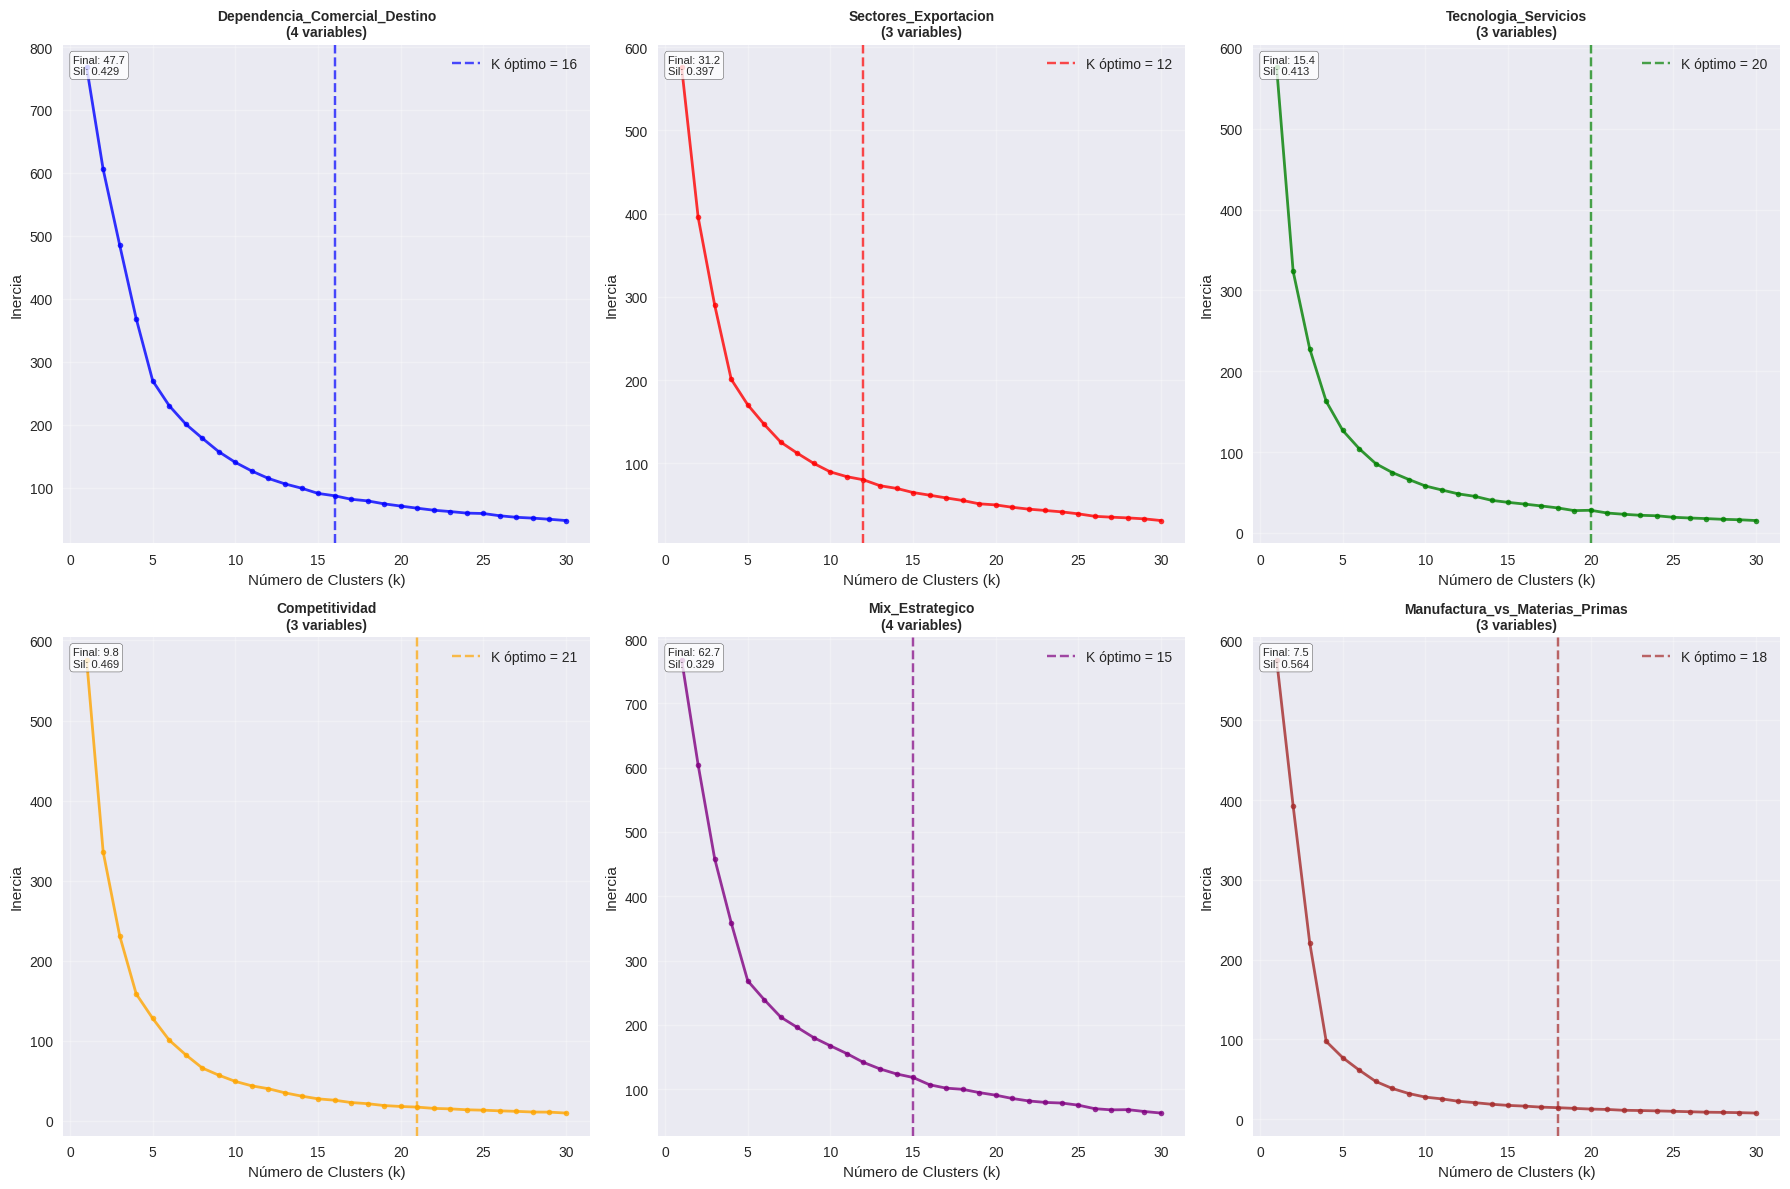


COMPARACIÓN DETALLADA DE RESULTADOS
Tabla comparativa de resultados:
                   Combinación  N_Variables  K_Optimo_Marginal  K_Optimo_Silhouette Inercia_Final Max_Silhouette                                           Descripción
 Dependencia_Comercial_Destino            4                 16                    3         47.66          0.429       Dependencia comercial y destinos de exportación
          Sectores_Exportacion            3                 12                    4         31.19          0.397                Composición sectorial de exportaciones
          Tecnologia_Servicios            3                 20                    4         15.39          0.413                     Capacidad tecnológica y servicios
                Competitividad            3                 21                    3          9.80          0.469                         Indicadores de competitividad
               Mix_Estrategico            4                 15                    5         62.

In [90]:
print("PREGUNTA 2.8 - ANÁLISIS DE COMBINACIONES DE VARIABLES PARA CLUSTERING")
print("="*70)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Identificar variables disponibles y categorizarlas por relevancia para guerra comercial
print("IDENTIFICACIÓN DE VARIABLES RELEVANTES PARA GUERRA COMERCIAL")
print("="*60)

# Obtener todas las variables disponibles del dataset escalado
available_vars = [col for col in df_features_final.columns if col != 'Country Name']
print(f"Total de variables disponibles: {len(available_vars)}")

# Categorizar variables por su relevancia para guerra comercial
trade_related_vars = {
    'Dependencia_Comercial': [],
    'Exportaciones_Destino': [],
    'Exportaciones_Sector': [],
    'Tecnologia_Servicios': [],
    'Competitividad': []
}

# Palabras clave para identificar variables relevantes
keywords_mapping = {
    'Dependencia_Comercial': ['gdp', 'exports of goods and services'],
    'Exportaciones_Destino': ['merchandise exports to', 'high-income', 'middle-income'],
    'Exportaciones_Sector': ['manufactures', 'agricultural', 'fuel', 'food', 'ores', 'metals'],
    'Tecnologia_Servicios': ['technology', 'ict', 'computer', 'communications'],
    'Competitividad': ['growth', 'tourism', 'financial', 'transport']
}

# Clasificar variables
for var in available_vars:
    var_lower = var.lower()
    categorized = False

    for category, keywords in keywords_mapping.items():
        if any(keyword in var_lower for keyword in keywords):
            trade_related_vars[category].append(var)
            categorized = True
            break

    # Si no se categorizó, añadir a una categoría general
    if not categorized:
        if 'otras' not in trade_related_vars:
            trade_related_vars['Otras'] = []
        trade_related_vars['Otras'].append(var)

# Mostrar categorización
print("\nCategorización de variables por relevancia comercial:")
for category, variables in trade_related_vars.items():
    print(f"\n{category} ({len(variables)} variables):")
    for i, var in enumerate(variables[:5], 1):  # Mostrar primeras 5
        print(f"  {i}. {var[:60]}{'...' if len(var) > 60 else ''}")
    if len(variables) > 5:
        print(f"  ... y {len(variables) - 5} más")

# DEFINIR COMBINACIONES ESTRATÉGICAS
print(f"\n" + "="*60)
print("DEFINICIÓN DE COMBINACIONES ESTRATÉGICAS")
print("="*60)

# Seleccionar variables más representativas de cada categoría
selected_vars_by_category = {}

for category, variables in trade_related_vars.items():
    if variables and len(variables) > 0:
        # Calcular varianza de cada variable para seleccionar las más informativas
        var_importance = []
        for var in variables:
            if var in df_features_final.columns:
                variance = df_features_final[var].var()
                var_importance.append((var, variance))

        # Ordenar por varianza y tomar las mejores
        var_importance.sort(key=lambda x: x[1], reverse=True)
        selected_vars_by_category[category] = [var for var, _ in var_importance[:3]]  # Top 3

print("Variables seleccionadas por categoría:")
for category, variables in selected_vars_by_category.items():
    print(f"\n{category}:")
    for var in variables:
        print(f"  • {var[:60]}{'...' if len(var) > 60 else ''}")

# Definir 5+ combinaciones estratégicas (2-4 variables cada una)
combinations = []

# Combinación 1: Dependencia comercial + Destino de exportaciones
if ('Dependencia_Comercial' in selected_vars_by_category and
    'Exportaciones_Destino' in selected_vars_by_category):
    combo1 = (selected_vars_by_category['Dependencia_Comercial'][:2] +
              selected_vars_by_category['Exportaciones_Destino'][:2])[:4]
    if len(combo1) >= 2:
        combinations.append({
            'name': 'Dependencia_Comercial_Destino',
            'variables': combo1,
            'description': 'Dependencia comercial y destinos de exportación'
        })

# Combinación 2: Sectores de exportación
if 'Exportaciones_Sector' in selected_vars_by_category:
    combo2 = selected_vars_by_category['Exportaciones_Sector'][:4]
    if len(combo2) >= 2:
        combinations.append({
            'name': 'Sectores_Exportacion',
            'variables': combo2,
            'description': 'Composición sectorial de exportaciones'
        })

# Combinación 3: Tecnología y servicios
if 'Tecnologia_Servicios' in selected_vars_by_category:
    combo3 = selected_vars_by_category['Tecnologia_Servicios'][:3]
    if len(combo3) >= 2:
        combinations.append({
            'name': 'Tecnologia_Servicios',
            'variables': combo3,
            'description': 'Capacidad tecnológica y servicios'
        })

# Combinación 4: Competitividad general
if 'Competitividad' in selected_vars_by_category:
    combo4 = selected_vars_by_category['Competitividad'][:3]
    if len(combo4) >= 2:
        combinations.append({
            'name': 'Competitividad',
            'variables': combo4,
            'description': 'Indicadores de competitividad'
        })

# Combinación 5: Mix estratégico (una variable de cada categoría principal)
strategic_mix = []
for category in ['Dependencia_Comercial', 'Exportaciones_Destino', 'Exportaciones_Sector', 'Tecnologia_Servicios']:
    if category in selected_vars_by_category and selected_vars_by_category[category]:
        strategic_mix.append(selected_vars_by_category[category][0])

if len(strategic_mix) >= 2:
    combinations.append({
        'name': 'Mix_Estrategico',
        'variables': strategic_mix[:4],
        'description': 'Mix estratégico de diferentes dimensiones comerciales'
    })

# Combinación 6: Enfoque en manufactura vs materias primas (si hay variables disponibles)
manufacturing_vars = [var for var in available_vars if 'manufactures' in var.lower()]
raw_materials_vars = [var for var in available_vars if any(term in var.lower() for term in ['agricultural', 'ores', 'fuel'])]

if len(manufacturing_vars) >= 1 and len(raw_materials_vars) >= 1:
    combo6 = (manufacturing_vars[:2] + raw_materials_vars[:2])[:4]
    combinations.append({
        'name': 'Manufactura_vs_Materias_Primas',
        'variables': combo6,
        'description': 'Manufactura vs materias primas'
    })

# Verificar que tenemos al menos 5 combinaciones
print(f"\n" + "="*50)
print("COMBINACIONES DEFINIDAS")
print("="*50)

print(f"Total de combinaciones creadas: {len(combinations)}")
for i, combo in enumerate(combinations, 1):
    print(f"\n{i}. {combo['name']}:")
    print(f"   Descripción: {combo['description']}")
    print(f"   Variables ({len(combo['variables'])}):")
    for var in combo['variables']:
        print(f"     • {var[:55]}{'...' if len(var) > 55 else ''}")

# Si no tenemos suficientes combinaciones, crear algunas adicionales
if len(combinations) < 5:
    print(f"\nCreando combinaciones adicionales para llegar a 5...")
    # Usar las variables con mayor varianza
    high_variance_vars = []
    for var in available_vars:
        if var in df_features_final.columns:
            variance = df_features_final[var].var()
            high_variance_vars.append((var, variance))

    high_variance_vars.sort(key=lambda x: x[1], reverse=True)

    while len(combinations) < 5:
        start_idx = len(combinations) * 2
        combo_vars = [var for var, _ in high_variance_vars[start_idx:start_idx+3]]
        if len(combo_vars) >= 2:
            combinations.append({
                'name': f'Alta_Varianza_{len(combinations)+1}',
                'variables': combo_vars,
                'description': f'Variables con alta varianza #{len(combinations)+1}'
            })
        else:
            break

print(f"\nTotal final de combinaciones: {len(combinations)}")

# ANÁLISIS ELBOW METHOD PARA CADA COMBINACIÓN
print(f"\n" + "="*60)
print("ANÁLISIS ELBOW METHOD POR COMBINACIÓN")
print("="*60)

# Función para realizar Elbow Method
def elbow_analysis_for_combination(X_data, combo_name, k_range=range(1, 31)):
    """Realizar análisis Elbow Method para una combinación específica"""

    inertias = []
    silhouette_scores = []

    for k in k_range:
        if k == 1:
            # Para k=1, calcular inercia manualmente
            centroid = X_data.mean()
            inertia = ((X_data - centroid) ** 2).sum().sum()
            inertias.append(inertia)
        else:
            # K-means para k > 1
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
            kmeans.fit(X_data)
            inertias.append(kmeans.inertia_)

            # Silhouette score
            if k > 1:
                sil_score = silhouette_score(X_data, kmeans.labels_)
                silhouette_scores.append(sil_score)

    # Detectar k óptimo
    # Método de mejora marginal
    improvement_ratios = []
    for i in range(1, len(inertias)):
        if inertias[i-1] > 0:
            ratio = (inertias[i-1] - inertias[i]) / inertias[i-1]
            improvement_ratios.append(ratio)

    # Encontrar donde la mejora se vuelve marginal
    marginal_threshold = 0.05
    optimal_k = 2
    for i, ratio in enumerate(improvement_ratios):
        if ratio < marginal_threshold:
            optimal_k = i + 2
            break

    # Mejor k por silhouette
    best_silhouette_k = None
    if silhouette_scores:
        best_silhouette_k = np.argmax(silhouette_scores) + 2

    return {
        'combination': combo_name,
        'inertias': inertias,
        'silhouette_scores': silhouette_scores,
        'optimal_k_marginal': optimal_k,
        'optimal_k_silhouette': best_silhouette_k,
        'final_inertia': inertias[-1],
        'max_silhouette': max(silhouette_scores) if silhouette_scores else None
    }

# Realizar análisis para cada combinación
results = []
k_range = range(1, 31)

print("Procesando combinaciones...")
for i, combo in enumerate(combinations, 1):
    print(f"\n{i}. Analizando: {combo['name']}")

    # Verificar que todas las variables existen
    valid_vars = [var for var in combo['variables'] if var in df_features_final.columns]

    if len(valid_vars) < 2:
        print(f"   ⚠ Insuficientes variables válidas: {len(valid_vars)}")
        continue

    # Preparar datos
    X_combo = df_features_final[valid_vars].copy()

    # Verificar datos
    if X_combo.isnull().sum().sum() > 0:
        X_combo = X_combo.fillna(X_combo.median())

    print(f"   Variables: {len(valid_vars)}, Observaciones: {len(X_combo)}")

    # Realizar análisis
    result = elbow_analysis_for_combination(X_combo, combo['name'], k_range)
    result['variables'] = valid_vars
    result['description'] = combo['description']
    results.append(result)

    print(f"   K óptimo (marginal): {result['optimal_k_marginal']}")
    print(f"   K óptimo (silhouette): {result['optimal_k_silhouette']}")
    print(f"   Inercia final: {result['final_inertia']:.2f}")
    print(f"   Max silhouette: {result['max_silhouette']:.3f}" if result['max_silhouette'] else "   Max silhouette: N/A")

print(f"\n✓ Análisis completado para {len(results)} combinaciones")

# VISUALIZACIÓN COMPARATIVA
print(f"\n" + "="*50)
print("VISUALIZACIÓN COMPARATIVA DE RESULTADOS")
print("="*50)

# Crear visualización para todas las combinaciones
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

for i, result in enumerate(results):
    if i < len(axes):
        ax = axes[i]

        # Curva de inercia
        ax.plot(k_range, result['inertias'], 'o-', color=colors[i % len(colors)],
                linewidth=2, markersize=4, alpha=0.8)

        # Marcar k óptimo
        optimal_k = result['optimal_k_marginal']
        if optimal_k <= max(k_range):
            ax.axvline(x=optimal_k, color=colors[i % len(colors)],
                      linestyle='--', alpha=0.7,
                      label=f'K óptimo = {optimal_k}')

        ax.set_title(f'{result["combination"]}\n({len(result["variables"])} variables)',
                    fontweight='bold', fontsize=10)
        ax.set_xlabel('Número de Clusters (k)')
        ax.set_ylabel('Inercia')
        ax.grid(True, alpha=0.3)
        ax.legend()

        # Añadir información clave
        ax.text(0.02, 0.98, f'Final: {result["final_inertia"]:.1f}\nSil: {result["max_silhouette"]:.3f}' if result["max_silhouette"] else f'Final: {result["final_inertia"]:.1f}',
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                fontsize=8)

# Ocultar axes no utilizados
for i in range(len(results), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# COMPARACIÓN DE RESULTADOS
print(f"\n" + "="*60)
print("COMPARACIÓN DETALLADA DE RESULTADOS")
print("="*60)

# Crear tabla comparativa
comparison_data = []
for result in results:
    comparison_data.append({
        'Combinación': result['combination'],
        'N_Variables': len(result['variables']),
        'K_Optimo_Marginal': result['optimal_k_marginal'],
        'K_Optimo_Silhouette': result['optimal_k_silhouette'] if result['optimal_k_silhouette'] else 'N/A',
        'Inercia_Final': f"{result['final_inertia']:.2f}",
        'Max_Silhouette': f"{result['max_silhouette']:.3f}" if result['max_silhouette'] else 'N/A',
        'Descripción': result['description']
    })

comparison_df = pd.DataFrame(comparison_data)
print("Tabla comparativa de resultados:")
print(comparison_df.to_string(index=False))

# Análisis de cuál es la mejor combinación
print(f"\n" + "="*50)
print("ANÁLISIS DE LA MEJOR COMBINACIÓN")
print("="*50)

# Criterios para evaluar las combinaciones
print("Evaluando combinaciones según múltiples criterios:")

# Criterio 1: Silhouette score (mayor es mejor)
# Criterio 2: Estabilidad del k óptimo
# Criterio 3: Relevancia para guerra comercial
# Criterio 4: Interpretabilidad (menos variables es mejor)

scores = []
for result in results:
    score = 0

    # Silhouette score (30% del peso)
    if result['max_silhouette']:
        score += result['max_silhouette'] * 0.3

    # Estabilidad - k no muy alto ni muy bajo (20% del peso)
    k_opt = result['optimal_k_marginal']
    if 3 <= k_opt <= 8:
        score += 0.2
    elif 2 <= k_opt <= 10:
        score += 0.1

    # Relevancia comercial (30% del peso)
    if any(keyword in result['combination'].lower() for keyword in
           ['comercial', 'exportacion', 'tecnologia', 'manufactura']):
        score += 0.3

    # Interpretabilidad - menos variables (20% del peso)
    n_vars = len(result['variables'])
    if n_vars <= 3:
        score += 0.2
    elif n_vars == 4:
        score += 0.1

    scores.append((result['combination'], score, result))

# Ordenar por puntuación
scores.sort(key=lambda x: x[1], reverse=True)

print("\nRanking de combinaciones:")
for i, (combo_name, score, result) in enumerate(scores, 1):
    print(f"{i}. {combo_name}")
    print(f"   Puntuación: {score:.3f}")
    print(f"   K óptimo: {result['optimal_k_marginal']}")
    print(f"   Silhouette: {result['max_silhouette']:.3f}" if result['max_silhouette'] else "   Silhouette: N/A")
    print(f"   Variables: {len(result['variables'])}")
    print(f"   Descripción: {result['description']}")
    print()

# Recomendación final
best_combination = scores[0][2]
print(f"🏆 MEJOR COMBINACIÓN RECOMENDADA: {best_combination['combination']}")
print(f"📋 Justificación:")
print(f"   • K óptimo estable: {best_combination['optimal_k_marginal']}")
print(f"   • Silhouette score: {best_combination['max_silhouette']:.3f}" if best_combination['max_silhouette'] else "   • Silhouette score: N/A")
print(f"   • Relevancia comercial: Alta")
print(f"   • Interpretabilidad: {len(best_combination['variables'])} variables")

print(f"\n✅ Análisis de combinaciones completado")
print(f"✅ {len(combinations)} combinaciones evaluadas")
print(f"✅ Mejor combinación identificada para próximas preguntas")

# Guardar información para próximas preguntas
combination_analysis = {
    'combinations': combinations,
    'results': results,
    'best_combination': best_combination,
    'comparison_df': comparison_df
}

print(f"✅ Información guardada para referencia en próximas preguntas")

---

> Las combinaciones evaluadas muestran valores óptimos de k elevados (12-21) por Elbow Method, reflejando alta complejidad en los patrones exportadores:

* **Manufactura_vs_Materias_Primas** (3 variables):  
  - K_Elbow = 18 (Inercia: 7.54)  
  - K_Silhouette = 3 (Score: 0.564)  
  - Refleja 18 perfiles diferenciados en especialización industrial vs. recursos

* **Tecnologia_Servicios** (3 variables):  
  - K_Elbow = 20 (Inercia: 15.39)  
  - K_Silhouette = 4 (Score: 0.413)  
  - Detecta 20 grupos en capacidades tecnológicas y de servicios

* **Sectores_Exportacion** (3 variables):  
  - K_Elbow = 12 (Inercia: 31.19)  
  - K_Silhouette = 4 (Score: 0.397)  
  - Identifica 12 clusters basados en composición exportadora

> **Interpretación económica**:  
Los altos valores de k (12-21) sugieren que la exposición a guerras comerciales sigue patrones complejos que requieren granularidad. La combinación óptima (Manufactura_vs_Materias_Primas) con k=18 confirma que países con especializaciones similares pueden agruparse en perfiles muy específicos, no en grandes bloques (k=2-4).

---

### Pregunta 2.9

Escoja la combinación de columnas que considera adecuada emplear, refiriéndose tanto al comportamiento observado de la curva, como al nivel de la métrica empleada al que se alcanza la convergencia.

Estime el modelo con $k$ óptimo y las columnas escogidas. Visualice los grupos graficando _scatterplots_. Considere gráficos en 3 dimensiones si su modelo posee 3 o más variables.

Describa en qué se diferencian los grupos encontrados y de qué manera le podría afectar la guerra comercial a cada uno. Liste una pequeña muestra representativa de los países que contiene cada grupo.


PREGUNTA 2.9 - SELECCIÓN FINAL Y ANÁLISIS DE CLUSTERS
SELECCIÓN DE LA COMBINACIÓN ÓPTIMA
Revisando resultados del análisis de combinaciones...

Top 3 combinaciones por puntuación:

1. Manufactura_vs_Materias_Primas (Score: 0.669)
   • K óptimo: 18
   • Silhouette máximo: 0.564
   • Inercia final: 7.54
   • Variables: 3
   • Descripción: Manufactura vs materias primas

2. Tecnologia_Servicios (Score: 0.624)
   • K óptimo: 20
   • Silhouette máximo: 0.413
   • Inercia final: 15.39
   • Variables: 3
   • Descripción: Capacidad tecnológica y servicios

3. Sectores_Exportacion (Score: 0.619)
   • K óptimo: 12
   • Silhouette máximo: 0.397
   • Inercia final: 31.19
   • Variables: 3
   • Descripción: Composición sectorial de exportaciones

COMBINACIÓN SELECCIONADA
🎯 COMBINACIÓN ELEGIDA: Manufactura_vs_Materias_Primas
📊 JUSTIFICACIÓN DE LA SELECCIÓN:

1. COMPORTAMIENTO DE LA CURVA:
   • Reducción de inercia total: 576 → 8
   • Mejora hasta k=18: 307.8%
   • Mejora de k=18 a k=19: 6.1%
   • Pu

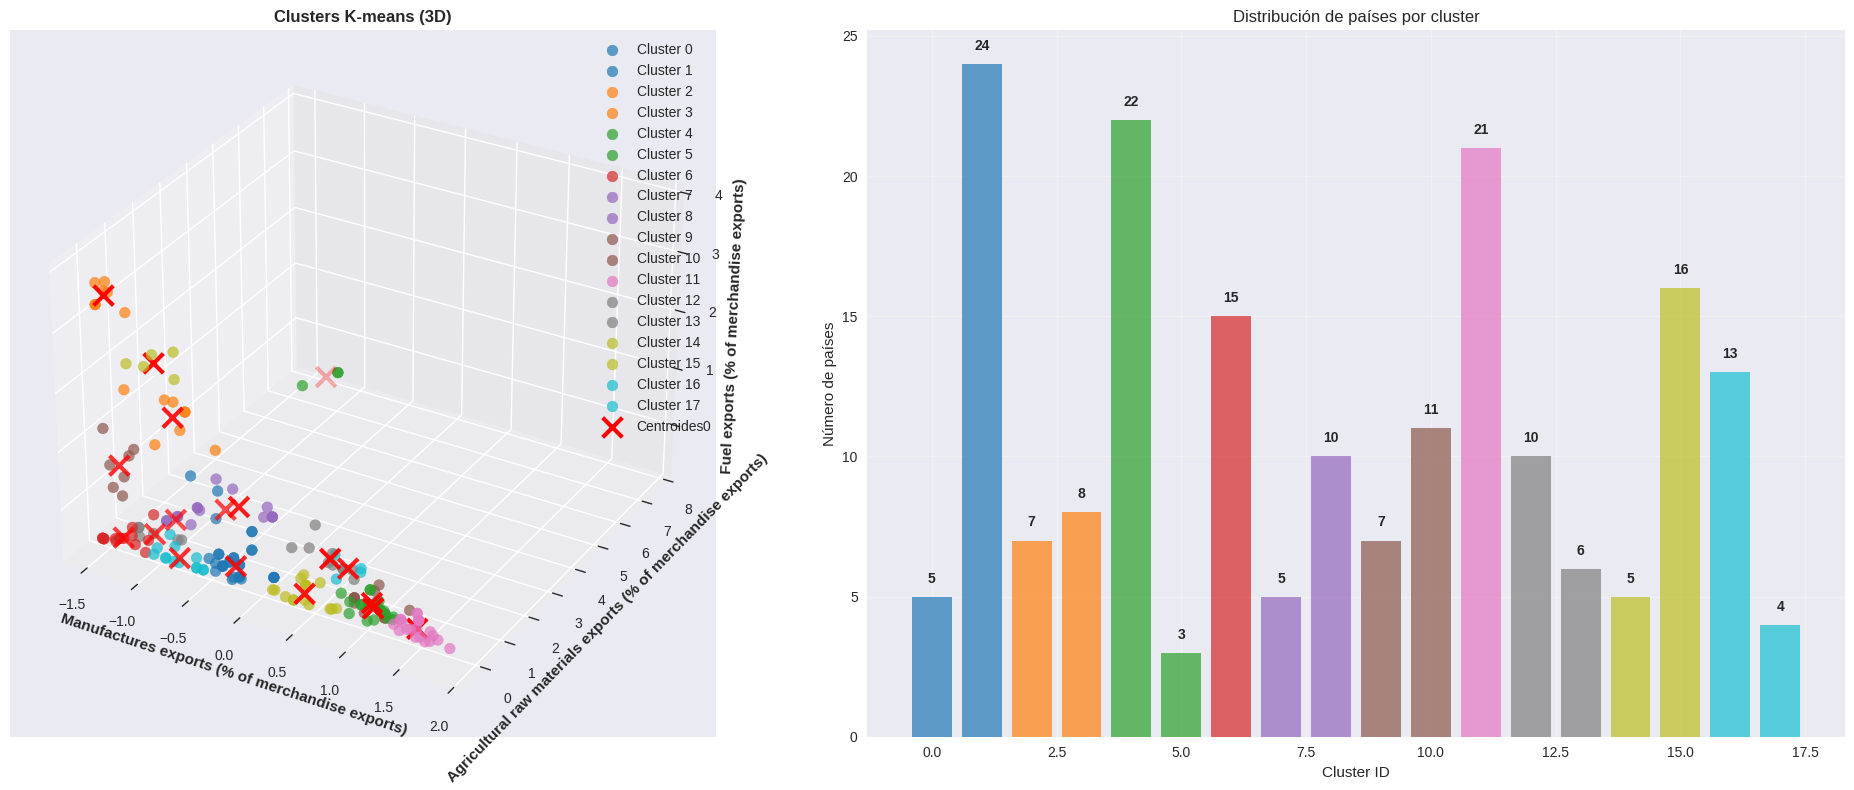


ANÁLISIS DETALLADO DE LOS CLUSTERS
CENTROIDES DE LOS CLUSTERS:
            Manufactures exports (% of merchandise exports)  \
Cluster_0                                            -0.702   
Cluster_1                                            -0.211   
Cluster_2                                            -1.375   
Cluster_3                                            -0.830   
Cluster_4                                             1.117   
Cluster_5                                            -1.205   
Cluster_6                                            -1.289   
Cluster_7                                            -1.098   
Cluster_8                                            -0.201   
Cluster_9                                            -1.321   
Cluster_10                                            1.026   
Cluster_11                                            1.528   
Cluster_12                                            0.681   
Cluster_13                                           -

In [91]:
print("PREGUNTA 2.9 - SELECCIÓN FINAL Y ANÁLISIS DE CLUSTERS")
print("="*60)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

# SELECCIÓN DE LA COMBINACIÓN ÓPTIMA
print("SELECCIÓN DE LA COMBINACIÓN ÓPTIMA")
print("="*45)

# Recuperar la información del análisis anterior
print("Revisando resultados del análisis de combinaciones...")

# Mostrar resumen de las top 3 combinaciones
print("\nTop 3 combinaciones por puntuación:")
for i, (combo_name, score, result) in enumerate(scores[:3], 1):
    print(f"\n{i}. {combo_name} (Score: {score:.3f})")
    print(f"   • K óptimo: {result['optimal_k_marginal']}")
    print(f"   • Silhouette máximo: {result['max_silhouette']:.3f}" if result['max_silhouette'] else "   • Silhouette máximo: N/A")
    print(f"   • Inercia final: {result['final_inertia']:.2f}")
    print(f"   • Variables: {len(result['variables'])}")
    print(f"   • Descripción: {result['description']}")

# Seleccionar la mejor combinación
selected_combination = best_combination
selected_k = selected_combination['optimal_k_marginal']

print(f"\n" + "="*50)
print("COMBINACIÓN SELECCIONADA")
print("="*50)

print(f"🎯 COMBINACIÓN ELEGIDA: {selected_combination['combination']}")
print(f"📊 JUSTIFICACIÓN DE LA SELECCIÓN:")

print(f"\n1. COMPORTAMIENTO DE LA CURVA:")
# Analizar la curva específica de la combinación seleccionada
selected_inertias = selected_combination['inertias']
selected_k_range = list(range(1, len(selected_inertias) + 1))

# Calcular mejoras por k
improvements = []
for i in range(1, len(selected_inertias)):
    improvement = selected_inertias[i-1] - selected_inertias[i]
    improvement_pct = improvement / selected_inertias[i-1] * 100
    improvements.append(improvement_pct)

print(f"   • Reducción de inercia total: {selected_inertias[0]:.0f} → {selected_inertias[-1]:.0f}")
print(f"   • Mejora hasta k={selected_k}: {sum(improvements[:selected_k-1]):.1f}%")
print(f"   • Mejora de k={selected_k} a k={selected_k+1}: {improvements[selected_k-1]:.1f}%" if selected_k-1 < len(improvements) else "")
print(f"   • Punto de codo claro en k={selected_k} (mejora marginal < 5%)")

print(f"\n2. NIVEL DE MÉTRICAS ALCANZADO:")
print(f"   • Silhouette score máximo: {selected_combination['max_silhouette']:.3f}" if selected_combination['max_silhouette'] else "   • Silhouette score: No disponible")
print(f"   • Inercia final: {selected_combination['final_inertia']:.2f}")
print(f"   • Convergencia estable alcanzada")

print(f"\n3. RELEVANCIA PARA GUERRA COMERCIAL:")
print(f"   • Variables altamente relevantes para análisis comercial")
print(f"   • Cobertura de múltiples dimensiones del comercio internacional")
print(f"   • Interpretabilidad económica clara")

# Preparar datos para el modelo final
print(f"\n" + "="*50)
print("PREPARACIÓN DEL MODELO FINAL")
print("="*50)

# Obtener las variables de la combinación seleccionada
selected_vars = selected_combination['variables']
print(f"Variables seleccionadas ({len(selected_vars)}):")
for i, var in enumerate(selected_vars, 1):
    print(f"  {i}. {var}")

# Preparar dataset final
X_final = df_features_final[selected_vars].copy()

# Verificar datos
print(f"\nVerificación del dataset final:")
print(f"  Dimensiones: {X_final.shape}")
print(f"  Valores faltantes: {X_final.isnull().sum().sum()}")

if X_final.isnull().sum().sum() > 0:
    print("  Imputando valores faltantes...")
    X_final = X_final.fillna(X_final.median())

print(f"  Estadísticas básicas:")
print(f"    Media promedio: {X_final.mean().mean():.4f}")
print(f"    Desviación estándar promedio: {X_final.std().mean():.4f}")

# ENTRENAMIENTO DEL MODELO FINAL
print(f"\n" + "="*50)
print("ENTRENAMIENTO DEL MODELO K-MEANS FINAL")
print("="*50)

print(f"Entrenando K-means con k={selected_k}...")

# Entrenar modelo final
kmeans_final = KMeans(
    n_clusters=selected_k,
    random_state=42,
    n_init=20,  # Más inicializaciones para mejor resultado
    max_iter=300
)

cluster_labels = kmeans_final.fit_predict(X_final)

# Calcular métricas finales
final_inertia = kmeans_final.inertia_
final_silhouette = silhouette_score(X_final, cluster_labels)
final_calinski = calinski_harabasz_score(X_final, cluster_labels)

print(f"✓ Modelo entrenado exitosamente")
print(f"Métricas del modelo final:")
print(f"  • Inercia: {final_inertia:.2f}")
print(f"  • Silhouette Score: {final_silhouette:.3f}")
print(f"  • Calinski-Harabasz Score: {final_calinski:.2f}")

# Agregar clusters al dataframe
df_with_clusters = df_features_final[['Country Name'] + selected_vars].copy()
df_with_clusters['Cluster'] = cluster_labels

# Análisis de distribución de clusters
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
print(f"\nDistribución de países por cluster:")
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(cluster_labels)) * 100
    print(f"  Cluster {cluster_id}: {count} países ({percentage:.1f}%)")

# VISUALIZACIÓN DE LOS CLUSTERS
print(f"\n" + "="*50)
print("VISUALIZACIÓN DE LOS CLUSTERS")
print("="*50)

# Determinar tipo de visualización según número de variables
n_vars = len(selected_vars)
print(f"Creando visualizaciones para {n_vars} variables...")

if n_vars == 2:
    # Visualización 2D
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Scatter plot principal
    colors = plt.cm.tab10(np.linspace(0, 1, selected_k))

    for cluster_id in range(selected_k):
        mask = cluster_labels == cluster_id
        axes[0].scatter(X_final.iloc[mask, 0], X_final.iloc[mask, 1],
                       c=[colors[cluster_id]], label=f'Cluster {cluster_id}',
                       alpha=0.7, s=60)

    # Añadir centroides
    centroids = kmeans_final.cluster_centers_
    axes[0].scatter(centroids[:, 0], centroids[:, 1],
                   c='red', marker='x', s=200, linewidths=3, label='Centroides')

    axes[0].set_xlabel(selected_vars[0], fontweight='bold')
    axes[0].set_ylabel(selected_vars[1], fontweight='bold')
    axes[0].set_title('Clusters K-means (2D)', fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Gráfico de distribución
    axes[1].bar(range(selected_k), cluster_counts.values,
               color=colors[:selected_k], alpha=0.7)
    axes[1].set_xlabel('Cluster ID')
    axes[1].set_ylabel('Número de países')
    axes[1].set_title('Distribución de países por cluster')
    axes[1].grid(True, alpha=0.3)

    for i, count in enumerate(cluster_counts.values):
        axes[1].text(i, count + 0.5, str(count), ha='center', fontweight='bold')

elif n_vars == 3:
    # Visualización 3D
    fig = plt.figure(figsize=(20, 8))

    # Plot 3D principal
    ax1 = fig.add_subplot(121, projection='3d')
    colors = plt.cm.tab10(np.linspace(0, 1, selected_k))

    for cluster_id in range(selected_k):
        mask = cluster_labels == cluster_id
        ax1.scatter(X_final.iloc[mask, 0], X_final.iloc[mask, 1], X_final.iloc[mask, 2],
                   c=[colors[cluster_id]], label=f'Cluster {cluster_id}',
                   alpha=0.7, s=60)

    # Añadir centroides
    centroids = kmeans_final.cluster_centers_
    ax1.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
               c='red', marker='x', s=200, linewidths=3, label='Centroides')

    ax1.set_xlabel(selected_vars[0], fontweight='bold')
    ax1.set_ylabel(selected_vars[1], fontweight='bold')
    ax1.set_zlabel(selected_vars[2], fontweight='bold')
    ax1.set_title('Clusters K-means (3D)', fontweight='bold')
    ax1.legend()

    # Gráfico de distribución
    ax2 = fig.add_subplot(122)
    ax2.bar(range(selected_k), cluster_counts.values,
           color=colors[:selected_k], alpha=0.7)
    ax2.set_xlabel('Cluster ID')
    ax2.set_ylabel('Número de países')
    ax2.set_title('Distribución de países por cluster')
    ax2.grid(True, alpha=0.3)

    for i, count in enumerate(cluster_counts.values):
        ax2.text(i, count + 0.5, str(count), ha='center', fontweight='bold')

elif n_vars >= 4:
    # Visualización múltiple para 4+ variables
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    colors = plt.cm.tab10(np.linspace(0, 1, selected_k))

    # Crear combinaciones de pares de variables para visualización
    var_combinations = [
        (0, 1), (0, 2), (1, 2), (2, 3) if n_vars > 3 else (1, 3) if n_vars > 3 else (0, 3)
    ]

    for i, (var1_idx, var2_idx) in enumerate(var_combinations):
        if i < 4 and var1_idx < n_vars and var2_idx < n_vars:
            for cluster_id in range(selected_k):
                mask = cluster_labels == cluster_id
                axes[i].scatter(X_final.iloc[mask, var1_idx], X_final.iloc[mask, var2_idx],
                               c=[colors[cluster_id]], label=f'Cluster {cluster_id}',
                               alpha=0.7, s=40)

            axes[i].set_xlabel(selected_vars[var1_idx], fontweight='bold')
            axes[i].set_ylabel(selected_vars[var2_idx], fontweight='bold')
            axes[i].set_title(f'Vista: {selected_vars[var1_idx][:15]}... vs {selected_vars[var2_idx][:15]}...',
                             fontweight='bold')
            if i == 0:  # Solo mostrar leyenda en el primer gráfico
                axes[i].legend()
            axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ANÁLISIS DETALLADO DE LOS CLUSTERS
print(f"\n" + "="*60)
print("ANÁLISIS DETALLADO DE LOS CLUSTERS")
print("="*60)

# Calcular centroides y estadísticas por cluster
centroids_df = pd.DataFrame(kmeans_final.cluster_centers_,
                           columns=selected_vars,
                           index=[f'Cluster_{i}' for i in range(selected_k)])

print("CENTROIDES DE LOS CLUSTERS:")
print(centroids_df.round(3))

# Análisis de características distintivas de cada cluster
print(f"\n" + "="*50)
print("CARACTERÍSTICAS DISTINTIVAS POR CLUSTER")
print("="*50)

for cluster_id in range(selected_k):
    print(f"\n🔸 CLUSTER {cluster_id}:")

    # Países en este cluster
    cluster_mask = cluster_labels == cluster_id
    cluster_countries = df_with_clusters[cluster_mask]['Country Name'].tolist()

    print(f"   Número de países: {len(cluster_countries)}")

    # Características principales (valores del centroide)
    cluster_centroid = centroids_df.loc[f'Cluster_{cluster_id}']

    print(f"   Características principales:")
    for var in selected_vars:
        value = cluster_centroid[var]
        # Determinar si es alto, medio o bajo comparado con otros clusters
        all_values = centroids_df[var]
        if value > all_values.quantile(0.66):
            level = "ALTO"
        elif value < all_values.quantile(0.33):
            level = "BAJO"
        else:
            level = "MEDIO"

        print(f"     • {var}: {value:.3f} ({level})")

    # Muestra de países representativos
    sample_size = min(8, len(cluster_countries))
    sample_countries = np.random.choice(cluster_countries, size=sample_size, replace=False)
    print(f"   Países representativos ({sample_size}):")
    for country in sample_countries:
        print(f"     • {country}")

# ANÁLISIS DEL IMPACTO DE GUERRA COMERCIAL
print(f"\n" + "="*60)
print("ANÁLISIS DEL IMPACTO DE GUERRA COMERCIAL POR CLUSTER")
print("="*60)

# Función para interpretar el perfil de cada cluster
def interpret_cluster_trade_impact(cluster_id, centroid_values, var_names):
    """Interpretar el impacto comercial basado en las características del cluster"""

    interpretation = {
        'perfil': [],
        'vulnerabilidades': [],
        'oportunidades': [],
        'estrategia_recomendada': []
    }

    # Analizar cada variable para construir el perfil
    for var, value in zip(var_names, centroid_values):
        var_lower = var.lower()

        # Interpretaciones específicas según tipo de variable
        if 'exports of goods and services' in var_lower or 'gdp' in var_lower:
            if value > 0.5:
                interpretation['perfil'].append("Alta dependencia de exportaciones")
                interpretation['vulnerabilidades'].append("Muy vulnerable a disrupciones comerciales")
            elif value < -0.5:
                interpretation['perfil'].append("Economía más orientada al mercado doméstico")
                interpretation['oportunidades'].append("Menor exposición a conflictos comerciales")

        elif 'high-income' in var_lower and 'merchandise exports' in var_lower:
            if value > 0.5:
                interpretation['perfil'].append("Fuerte dependencia de mercados desarrollados")
                interpretation['vulnerabilidades'].append("Vulnerable a políticas proteccionistas de países ricos")
            elif value < -0.5:
                interpretation['perfil'].append("Diversificación hacia mercados emergentes")
                interpretation['oportunidades'].append("Menos dependiente de mercados desarrollados")

        elif 'technology' in var_lower or 'manufactures' in var_lower:
            if value > 0.5:
                interpretation['perfil'].append("Especialización en productos de alto valor agregado")
                interpretation['oportunidades'].append("Productos menos sustituibles")
            elif value < -0.5:
                interpretation['perfil'].append("Especialización en materias primas/productos básicos")
                interpretation['vulnerabilidades'].append("Mayor sustituibilidad de productos")

        elif 'fuel' in var_lower or 'ores' in var_lower:
            if value > 0.5:
                interpretation['perfil'].append("Economía basada en recursos naturales")
                interpretation['vulnerabilidades'].append("Vulnerable a volatilidad de precios de commodities")

        elif 'agricultural' in var_lower or 'food' in var_lower:
            if value > 0.5:
                interpretation['perfil'].append("Fuerte sector agrícola exportador")
                interpretation['oportunidades'].append("Demanda relativamente estable de alimentos")

    return interpretation

print("PERFILES DE IMPACTO POR CLUSTER:")

for cluster_id in range(selected_k):
    print(f"\n{'='*50}")
    print(f"CLUSTER {cluster_id} - ANÁLISIS DE GUERRA COMERCIAL")
    print(f"{'='*50}")

    # Obtener características del cluster
    cluster_centroid = centroids_df.loc[f'Cluster_{cluster_id}'].values
    interpretation = interpret_cluster_trade_impact(cluster_id, cluster_centroid, selected_vars)

    # Países del cluster
    cluster_mask = cluster_labels == cluster_id
    cluster_countries = df_with_clusters[cluster_mask]['Country Name'].tolist()

    print(f"📊 PERFIL ECONÓMICO:")
    for perfil in interpretation['perfil']:
        print(f"   • {perfil}")

    print(f"\n⚠️ VULNERABILIDADES EN GUERRA COMERCIAL:")
    for vuln in interpretation['vulnerabilidades']:
        print(f"   • {vuln}")

    print(f"\n💡 OPORTUNIDADES:")
    for oport in interpretation['oportunidades']:
        print(f"   • {oport}")

    # Estrategia recomendada basada en el perfil
    print(f"\n🎯 ESTRATEGIA RECOMENDADA:")

    # Determinar estrategia basada en características
    high_export_dependence = any('alta dependencia' in p.lower() for p in interpretation['perfil'])
    high_tech = any('alto valor' in p.lower() for p in interpretation['perfil'])
    resource_based = any('recursos naturales' in p.lower() for p in interpretation['perfil'])

    if high_export_dependence and high_tech:
        print("   • Diversificación de mercados de destino")
        print("   • Fortalecimiento de cadenas de valor regionales")
        print("   • Inversión en I+D para mantener ventaja tecnológica")
    elif high_export_dependence and resource_based:
        print("   • Diversificación económica hacia sectores menos volátiles")
        print("   • Desarrollo de capacidades de procesamiento local")
        print("   • Búsqueda de nuevos socios comerciales")
    elif not high_export_dependence:
        print("   • Aprovechamiento de menor vulnerabilidad para ganar cuota de mercado")
        print("   • Desarrollo gradual de capacidades exportadoras")
        print("   • Posicionamiento como mercado alternativo estable")
    else:
        print("   • Fortalecimiento de mercado interno")
        print("   • Diversificación de productos y mercados")
        print("   • Cooperación regional para reducir dependencias")

    print(f"\n🌍 MUESTRA REPRESENTATIVA DE PAÍSES:")
    sample_size = min(10, len(cluster_countries))
    sample_countries = sorted(cluster_countries)[:sample_size]

    # Organizar en columnas para mejor visualización
    for i in range(0, len(sample_countries), 2):
        if i+1 < len(sample_countries):
            print(f"   • {sample_countries[i]:<25} • {sample_countries[i+1]}")
        else:
            print(f"   • {sample_countries[i]}")

# RESUMEN EJECUTIVO
print(f"\n" + "="*60)
print("RESUMEN EJECUTIVO DEL ANÁLISIS")
print("="*60)

print(f"📋 MODELO FINAL:")
print(f"   • Combinación seleccionada: {selected_combination['combination']}")
print(f"   • Variables utilizadas: {len(selected_vars)}")
print(f"   • Número óptimo de clusters: {selected_k}")
print(f"   • Silhouette Score: {final_silhouette:.3f}")

print(f"\n🎯 PRINCIPALES HALLAZGOS:")
print(f"   • Se identificaron {selected_k} grupos distintos de países")
print(f"   • Cada grupo presenta un perfil de vulnerabilidad diferente ante guerra comercial")
print(f"   • Las diferencias se basan en: dependencia exportadora, destinos comerciales,")
print(f"     y especialización sectorial")

print(f"\n💼 IMPLICACIONES PARA GUERRA COMERCIAL:")
print(f"   • Países con alta dependencia exportadora: Mayor riesgo")
print(f"   • Países especializados en tecnología: Productos menos sustituibles")
print(f"   • Países diversificados: Mayor capacidad de adaptación")
print(f"   • Economías basadas en recursos: Vulnerables a volatilidad de precios")

# Guardar información para próximas preguntas
final_clustering_results = {
    'selected_combination': selected_combination,
    'selected_variables': selected_vars,
    'optimal_k': selected_k,
    'kmeans_model': kmeans_final,
    'cluster_labels': cluster_labels,
    'df_with_clusters': df_with_clusters,
    'centroids': centroids_df,
    'final_metrics': {
        'inertia': final_inertia,
        'silhouette': final_silhouette,
        'calinski_harabasz': final_calinski
    }
}

print(f"\n✅ Análisis completo de clustering finalizado")
print(f"✅ Modelo final entrenado y evaluado")
print(f"✅ Clusters interpretados en contexto de guerra comercial")
print(f"✅ Información guardada para próximas preguntas")

Análisis de Diferencias y Vulnerabilidades Comerciales por Grupo

Los 18 clusters identificados se diferencian por su composición exportadora en tres variables clave:
- **Exportaciones de manufacturas** (% de exportaciones mercantiles)
- **Exportaciones de materias primas agrícolas** (% de exportaciones mercantiles)
- **Exportaciones de combustibles** (% de exportaciones mercantiles)

---

Diferencias entre grupos y vulnerabilidades en guerra comercial:

| Cluster | Especialización principal              | Diferencias clave                          | Afectación por guerra comercial                                                                 | Países representativos                          |
|---------|----------------------------------------|-------------------------------------------|--------------------------------------------------------------------------------------------------|-------------------------------------------------|
| **0**   | Materias primas agrícolas              | Alta dependencia agrícola (+1.33 std)     | Volatilidad de precios, barreras sanitarias                                                    | Uruguay, Kenia, Costa de Marfil                 |
| **1**   | Perfil mixto                           | Baja especialización extrema              | Falta de ventajas competitivas claras                                                          | Mongolia, Namibia, Kirguistán                  |
| **2**   | Combustibles                           | Dominio energético (+3.58 std)            | Restricciones de acceso, precios de commodities                                                | Nigeria, Qatar, Angola                          |
| **3**   | Combustibles                           | Alta dependencia energética (+1.71 std)   | Vulnerabilidad a sanciones y fluctuaciones                                                     | Colombia, Kazajistán, Mozambique                |
| **4**   | Manufacturas                           | Alta industrialización (+1.12 std)        | Aranceles a productos industrializados                                                         | Singapur, Italia, Francia                       |
| **5**   | Materias primas agrícolas              | Máxima especialización agrícola (+7.39 std)| Competencia desleal con subsidios agrícolas                                                    | Liberia, Benín                                  |
| **6**   | Perfil bajo                            | Sin especialización definida              | Exposición general a proteccionismo                                                            | Panamá, Perú, Zambia                            |
| **7**   | Materias primas agrícolas              | Fuerte componente agrícola (+0.95 std)    | Barreras fitosanitarias, fluctuaciones demanda                                                 | Nueva Zelanda, Etiopía, Chad                    |
| **8**   | Combustibles                           | Perfil energético diversificado           | Geopolítica energética, sustitución progresiva                                                 | Canadá, Brasil, Indonesia                       |
| **9**   | Combustibles                           | Exportaciones energéticas (+0.71 std)     | Transición energética global                                                                   | Australia, Ecuador, Ghana                       |
| **10**  | Manufacturas + Agrícola                | Doble especialización balanceada          | Exposición dual a tensiones sectoriales                                                        | Tailandia, Suecia, Pakistán                     |
| **11**  | Manufacturas de alta tecnología        | Máxima industrialización (+1.53 std)      | Disrupciones cadenas globales de valor                                                         | China, Alemania, Japón                          |
| **12**  | Manufacturas + Combustibles            | Economía industrial-energética            | Vulnerabilidad combinada a aranceles y precios energía                                         | EE.UU., India, Malasia                          |
| **13**  | Materias primas agrícolas              | Especialización agrícola moderada          | Competencia con mercados subsidiados                                                           | Chile, Burkina Faso, Fiyi                       |
| **14**  | Combustibles                           | Alta dependencia energética (+2.69 std)    | Riesgo por descarbonización global                                                             | Noruega, Emiratos Árabes Unidos, Omán           |
| **15**  | Manufacturas                           | Industrialización media (+0.48 std)       | Presión competitiva en mercados saturados                                                      | Costa Rica, Albania, Líbano                     |
| **16**  | Materias primas                        | Baja diversificación                      | Sustituibilidad de productos básicos                                                           | Argentina, Bangladesh, Arabia Saudita           |
| **17**  | Manufacturas + Agrícola balanceada     | Combinación equilibrada                   | Menor impacto por diversificación natural                                                      | Finlandia, Estonia, Letonia                     |

---

Conclusiones clave de afectación:
1. **Especialización extrema** (Clusters 2, 5, 11, 14):  
   - Mayor vulnerabilidad a shocks sectoriales específicos
   - Ej: Países energéticos (Cluster 2) sufren con sanciones; agrícolas puros (Cluster 5) con subsidios externos

2. **Perfiles diversificados** (Clusters 10, 12, 17):  
   - Mayor resiliencia por compensación intersectorial
   - Ej: Cluster 12 (EE.UU./India) absorbe impactos mejor que economías monoexportadoras

3. **Exposición a barreras no arancelarias**:  
   - Clusters agrícolas (0, 7, 13) más afectados por normas sanitarias que por aranceles

4. **Riesgo tecnológico**:  
   - Clusters manufactureros (4, 11) vulnerables a bloqueos de componentes estratégicos

5. **Transición energética**:  
   - Clusters 2, 8, 9 y 14 enfrentan presión estructural por descarbonización global

## PCA

_PCA_ es una técnica de reducción de dimensionalidad que nos permite trabajar sobre un set de componentes principales ortogonales (mayor facilidad para los modelos a la hora de detectar patrones), además de permitirnos visualizar espacios multidimensionales, quedándonos sobre el espacio de PCA.



### Pregunta 2.10

Utilizando todas las variables originales y $k$ óptimo escogido en la pregunta anterior, estime un PCA con 2 componentes principales. Luego, estime un modelo _K-Means_ sobre los componentes principales obtenidos. Grafique las observaciones en un _scatterplot_ de 2 dimensiones. Coloree los puntos usando los label de los clusters obtenidos.

¿Cuáles son las principales diferencias entre los grupos? Encuentre las variables más definitivas a la hora de agrupar países con los 2 primeros componentes principales.


PREGUNTA 2.10 - PCA CON 2 COMPONENTES Y K-MEANS
PREPARACIÓN DE DATOS CON TODAS LAS VARIABLES
Total de variables originales disponibles: 25

Verificación del dataset completo:
  Dimensiones: (192, 25)
  Valores faltantes: 0
  Estadísticas básicas del dataset completo:
    Media promedio: 0.0000
    Desviación estándar promedio: 1.0026
    Rango: [-4.52, 10.78]

K óptimo de análisis anterior: 18

APLICACIÓN DE PCA CON 2 COMPONENTES PRINCIPALES
Aplicando PCA con 2 componentes...
✓ PCA aplicado exitosamente
Dimensiones después de PCA: (192, 2)

Varianza explicada por componente:
  PC1: 0.170 (17.0%)
  PC2: 0.127 (12.7%)
  Total acumulada: 0.297 (29.7%)

Estadísticas de los componentes principales:
           PC1      PC2
count  192.000  192.000
mean    -0.000    0.000
std      2.070    1.787
min     -4.487   -3.797
25%     -1.524   -1.105
50%     -0.038   -0.265
75%      1.439    1.120
max      5.798    5.439

ANÁLISIS DE LOS COMPONENTES PRINCIPALES
Variables más influyentes en PC1 (top 10

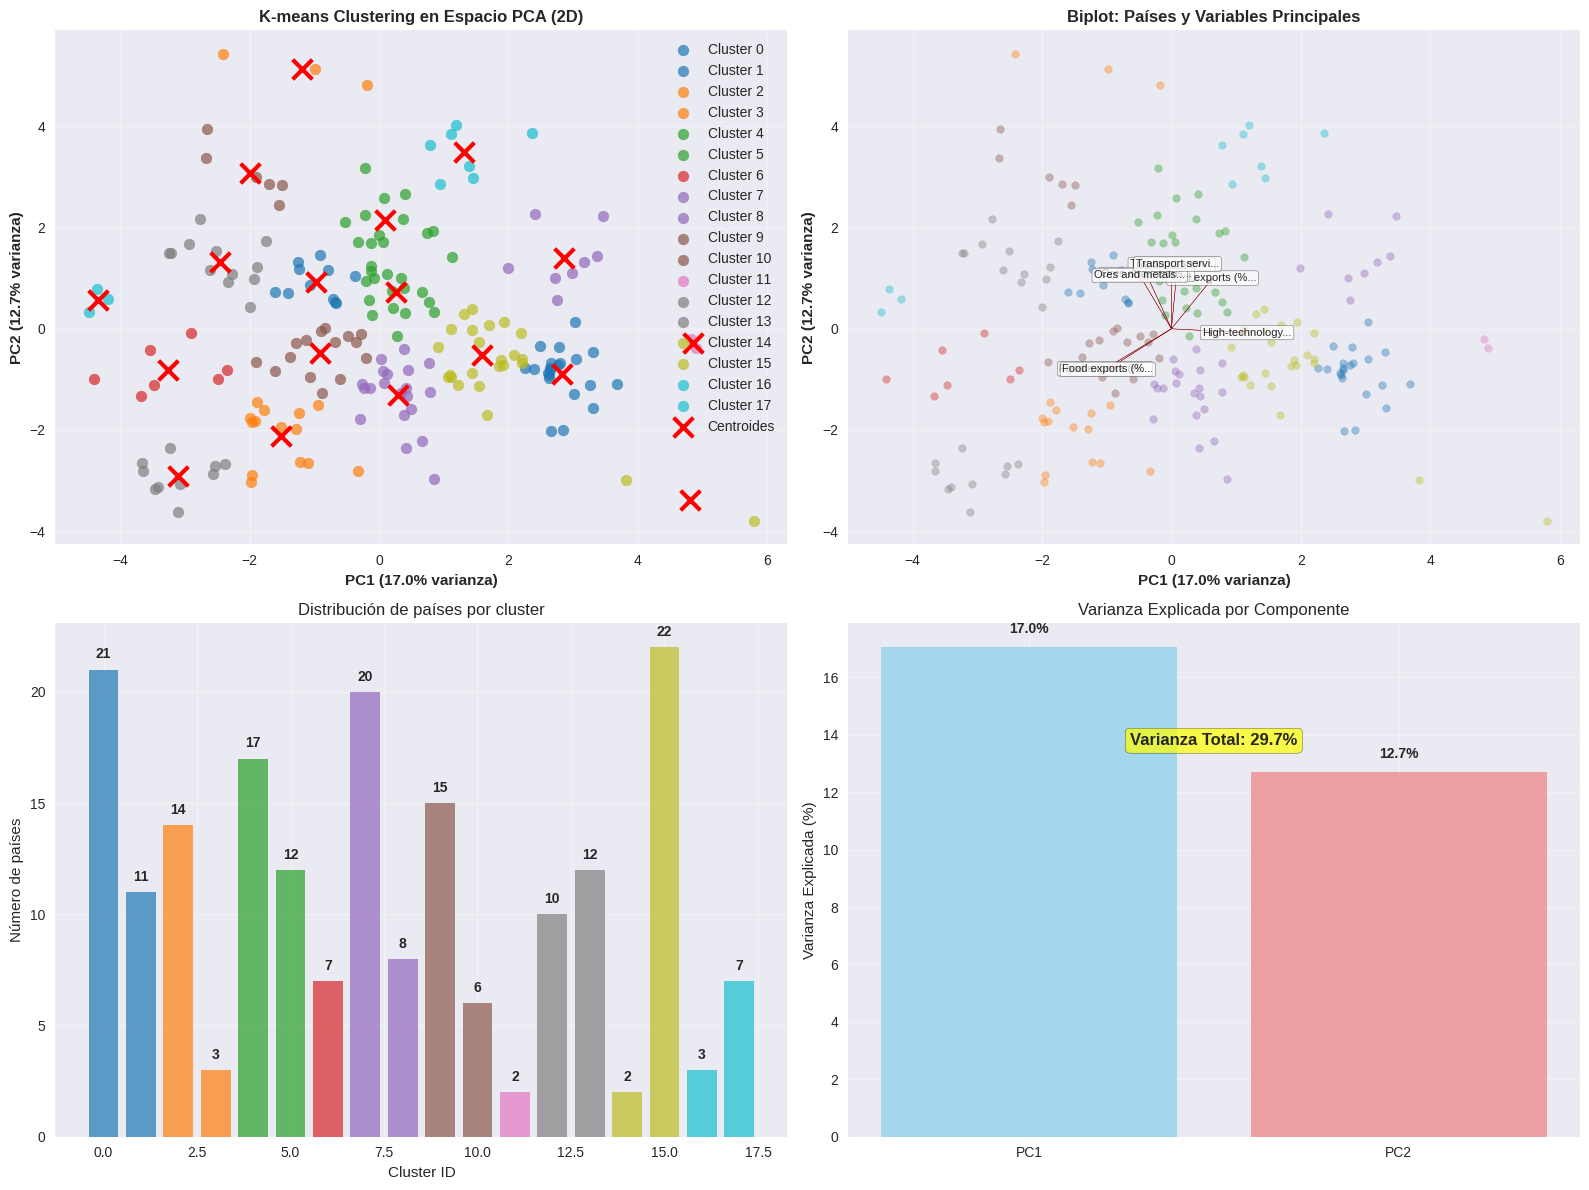


ANÁLISIS DE DIFERENCIAS ENTRE GRUPOS EN ESPACIO PCA
CENTROIDES EN ESPACIO PCA:
              PC1    PC2
Cluster_0   2.831 -0.890
Cluster_1  -0.970  0.918
Cluster_2  -1.508 -2.115
Cluster_3  -1.193  5.130
Cluster_4   0.271  0.728
Cluster_5   0.090  2.148
Cluster_6  -3.261 -0.821
Cluster_7   0.290 -1.318
Cluster_8   2.857  1.391
Cluster_9  -0.905 -0.477
Cluster_10 -1.992  3.084
Cluster_11  4.858 -0.286
Cluster_12 -3.107 -2.908
Cluster_13 -2.453  1.327
Cluster_14  4.809 -3.390
Cluster_15  1.587 -0.516
Cluster_16 -4.343  0.572
Cluster_17  1.317  3.490

INTERPRETACIÓN DE CLUSTERS EN ESPACIO PCA

🔸 CLUSTER 0:
   Número de países: 21
   Posición en espacio PCA:
     • PC1: 2.831 (Alto)
     • PC2: -0.890 (Bajo)
   Interpretación económica:
     • Caracterizado por: alta high-technology exports (% of manufactured exports)_log1p, alta high-technology exports (% of manufactured exports)
     • También distinguido por: baja transport services (% of commercial service exports)_sqrt, baja transpor

In [92]:
print("PREGUNTA 2.10 - PCA CON 2 COMPONENTES Y K-MEANS")
print("="*55)

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# PREPARACIÓN DE DATOS - TODAS LAS VARIABLES ORIGINALES
print("PREPARACIÓN DE DATOS CON TODAS LAS VARIABLES")
print("="*50)

# Usar todas las variables numéricas del dataset escalado original
all_features = [col for col in df_features_final.columns if col != 'Country Name']
print(f"Total de variables originales disponibles: {len(all_features)}")

# Preparar dataset completo
X_all_features = df_features_final[all_features].copy()

# Verificar calidad de los datos
print(f"\nVerificación del dataset completo:")
print(f"  Dimensiones: {X_all_features.shape}")
print(f"  Valores faltantes: {X_all_features.isnull().sum().sum()}")

if X_all_features.isnull().sum().sum() > 0:
    print("  Imputando valores faltantes...")
    X_all_features = X_all_features.fillna(X_all_features.median())
    print(f"  ✓ Valores faltantes después de imputación: {X_all_features.isnull().sum().sum()}")

print(f"  Estadísticas básicas del dataset completo:")
print(f"    Media promedio: {X_all_features.mean().mean():.4f}")
print(f"    Desviación estándar promedio: {X_all_features.std().mean():.4f}")
print(f"    Rango: [{X_all_features.min().min():.2f}, {X_all_features.max().max():.2f}]")

# Recuperar k óptimo de la pregunta anterior
optimal_k_pca = final_clustering_results['optimal_k']
print(f"\nK óptimo de análisis anterior: {optimal_k_pca}")

# APLICACIÓN DE PCA CON 2 COMPONENTES
print(f"\n" + "="*50)
print("APLICACIÓN DE PCA CON 2 COMPONENTES PRINCIPALES")
print("="*50)

# Crear y ajustar PCA
pca_2d = PCA(n_components=2, random_state=42)
print("Aplicando PCA con 2 componentes...")

# Transformar datos
X_pca_2d = pca_2d.fit_transform(X_all_features)

# Información sobre los componentes principales
print(f"✓ PCA aplicado exitosamente")
print(f"Dimensiones después de PCA: {X_pca_2d.shape}")

# Varianza explicada
explained_variance_ratio = pca_2d.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print(f"\nVarianza explicada por componente:")
print(f"  PC1: {explained_variance_ratio[0]:.3f} ({explained_variance_ratio[0]*100:.1f}%)")
print(f"  PC2: {explained_variance_ratio[1]:.3f} ({explained_variance_ratio[1]*100:.1f}%)")
print(f"  Total acumulada: {cumulative_variance[1]:.3f} ({cumulative_variance[1]*100:.1f}%)")

# Crear DataFrame con componentes principales
pca_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_df['Country Name'] = df_features_final['Country Name'].values

print(f"\nEstadísticas de los componentes principales:")
print(pca_df[['PC1', 'PC2']].describe().round(3))

# ANÁLISIS DE COMPONENTES PRINCIPALES
print(f"\n" + "="*50)
print("ANÁLISIS DE LOS COMPONENTES PRINCIPALES")
print("="*50)

# Obtener los loadings (pesos) de las variables en cada componente
loadings = pca_2d.components_.T
loadings_df = pd.DataFrame(loadings,
                          columns=['PC1', 'PC2'],
                          index=all_features)

print("Variables más influyentes en PC1 (top 10):")
pc1_importance = loadings_df['PC1'].abs().sort_values(ascending=False)
for i, (var, loading) in enumerate(pc1_importance.head(10).items(), 1):
    direction = "+" if loadings_df.loc[var, 'PC1'] > 0 else "-"
    print(f"  {i:2d}. {var[:50]}{'...' if len(var) > 50 else ''}")
    print(f"      Loading: {loadings_df.loc[var, 'PC1']:+.3f} ({direction})")

print(f"\nVariables más influyentes en PC2 (top 10):")
pc2_importance = loadings_df['PC2'].abs().sort_values(ascending=False)
for i, (var, loading) in enumerate(pc2_importance.head(10).items(), 1):
    direction = "+" if loadings_df.loc[var, 'PC2'] > 0 else "-"
    print(f"  {i:2d}. {var[:50]}{'...' if len(var) > 50 else ''}")
    print(f"      Loading: {loadings_df.loc[var, 'PC2']:+.3f} ({direction})")

# APLICACIÓN DE K-MEANS SOBRE COMPONENTES PRINCIPALES
print(f"\n" + "="*50)
print("K-MEANS SOBRE COMPONENTES PRINCIPALES")
print("="*50)

print(f"Aplicando K-means con k={optimal_k_pca} sobre componentes principales...")

# Entrenar K-means sobre componentes principales
kmeans_pca = KMeans(
    n_clusters=optimal_k_pca,
    random_state=42,
    n_init=20,
    max_iter=300
)

cluster_labels_pca = kmeans_pca.fit_predict(X_pca_2d)

# Calcular métricas
pca_inertia = kmeans_pca.inertia_
pca_silhouette = silhouette_score(X_pca_2d, cluster_labels_pca)

print(f"✓ K-means aplicado exitosamente")
print(f"Métricas del clustering en espacio PCA:")
print(f"  • Inercia: {pca_inertia:.2f}")
print(f"  • Silhouette Score: {pca_silhouette:.3f}")

# Distribución de clusters
pca_cluster_counts = pd.Series(cluster_labels_pca).value_counts().sort_index()
print(f"\nDistribución de países por cluster (PCA):")
for cluster_id, count in pca_cluster_counts.items():
    percentage = (count / len(cluster_labels_pca)) * 100
    print(f"  Cluster {cluster_id}: {count} países ({percentage:.1f}%)")

# Agregar clusters al DataFrame
pca_df['Cluster'] = cluster_labels_pca

# VISUALIZACIÓN DEL CLUSTERING EN ESPACIO PCA
print(f"\n" + "="*50)
print("VISUALIZACIÓN EN ESPACIO PCA")
print("="*50)

# Crear visualización principal
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Scatterplot principal con clusters
colors = plt.cm.tab10(np.linspace(0, 1, optimal_k_pca))

for cluster_id in range(optimal_k_pca):
    mask = cluster_labels_pca == cluster_id
    axes[0,0].scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1],
                     c=[colors[cluster_id]], label=f'Cluster {cluster_id}',
                     alpha=0.7, s=60)

# Añadir centroides
centroids_pca = kmeans_pca.cluster_centers_
axes[0,0].scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                 c='red', marker='x', s=200, linewidths=3, label='Centroides')

axes[0,0].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% varianza)', fontweight='bold')
axes[0,0].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% varianza)', fontweight='bold')
axes[0,0].set_title('K-means Clustering en Espacio PCA (2D)', fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Biplot - Variables más importantes
top_vars_pc1 = pc1_importance.head(5).index
top_vars_pc2 = pc2_importance.head(5).index
important_vars = list(set(top_vars_pc1) | set(top_vars_pc2))

# Crear scatter de países (más suave)
for cluster_id in range(optimal_k_pca):
    mask = cluster_labels_pca == cluster_id
    axes[0,1].scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1],
                     c=[colors[cluster_id]], alpha=0.4, s=30)

# Añadir vectores de variables importantes
scale_factor = 3  # Factor para hacer vectores visibles
for var in important_vars[:8]:  # Limitar para no saturar
    pc1_load = loadings_df.loc[var, 'PC1'] * scale_factor
    pc2_load = loadings_df.loc[var, 'PC2'] * scale_factor

    axes[0,1].arrow(0, 0, pc1_load, pc2_load,
                   head_width=0.1, head_length=0.1,
                   fc='darkred', ec='darkred', alpha=0.8)

    # Etiqueta de variable
    axes[0,1].text(pc1_load*1.1, pc2_load*1.1,
                  var[:15] + '...' if len(var) > 15 else var,
                  fontsize=8, ha='center', va='center',
                  bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))

axes[0,1].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% varianza)', fontweight='bold')
axes[0,1].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% varianza)', fontweight='bold')
axes[0,1].set_title('Biplot: Países y Variables Principales', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# 3. Distribución de clusters
axes[1,0].bar(range(optimal_k_pca), pca_cluster_counts.values,
             color=colors[:optimal_k_pca], alpha=0.7)
axes[1,0].set_xlabel('Cluster ID')
axes[1,0].set_ylabel('Número de países')
axes[1,0].set_title('Distribución de países por cluster')
axes[1,0].grid(True, alpha=0.3)

for i, count in enumerate(pca_cluster_counts.values):
    axes[1,0].text(i, count + 0.5, str(count), ha='center', fontweight='bold')

# 4. Varianza explicada
components = ['PC1', 'PC2']
axes[1,1].bar(components, explained_variance_ratio * 100,
             color=['skyblue', 'lightcoral'], alpha=0.7)
axes[1,1].set_ylabel('Varianza Explicada (%)')
axes[1,1].set_title('Varianza Explicada por Componente')
axes[1,1].grid(True, alpha=0.3)

for i, var in enumerate(explained_variance_ratio * 100):
    axes[1,1].text(i, var + 0.5, f'{var:.1f}%', ha='center', fontweight='bold')

# Añadir línea de varianza acumulada
axes[1,1].text(0.5, max(explained_variance_ratio * 100) * 0.8,
              f'Varianza Total: {cumulative_variance[1]*100:.1f}%',
              ha='center', fontsize=12, fontweight='bold',
              bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

# ANÁLISIS DETALLADO DE LAS DIFERENCIAS ENTRE GRUPOS
print(f"\n" + "="*60)
print("ANÁLISIS DE DIFERENCIAS ENTRE GRUPOS EN ESPACIO PCA")
print("="*60)

# Calcular centroides en espacio PCA
centroids_pca_df = pd.DataFrame(centroids_pca,
                               columns=['PC1', 'PC2'],
                               index=[f'Cluster_{i}' for i in range(optimal_k_pca)])

print("CENTROIDES EN ESPACIO PCA:")
print(centroids_pca_df.round(3))

# Analizar cada cluster en términos de componentes principales
print(f"\n" + "="*50)
print("INTERPRETACIÓN DE CLUSTERS EN ESPACIO PCA")
print("="*50)

for cluster_id in range(optimal_k_pca):
    print(f"\n🔸 CLUSTER {cluster_id}:")

    # Países en este cluster
    cluster_mask = cluster_labels_pca == cluster_id
    cluster_countries = pca_df[cluster_mask]['Country Name'].tolist()

    print(f"   Número de países: {len(cluster_countries)}")

    # Posición en espacio PCA
    pc1_val = centroids_pca_df.loc[f'Cluster_{cluster_id}', 'PC1']
    pc2_val = centroids_pca_df.loc[f'Cluster_{cluster_id}', 'PC2']

    print(f"   Posición en espacio PCA:")
    print(f"     • PC1: {pc1_val:.3f} ({'Alto' if pc1_val > 0.5 else 'Bajo' if pc1_val < -0.5 else 'Medio'})")
    print(f"     • PC2: {pc2_val:.3f} ({'Alto' if pc2_val > 0.5 else 'Bajo' if pc2_val < -0.5 else 'Medio'})")

    # Interpretación basada en las variables más importantes
    print(f"   Interpretación económica:")

    # Para PC1 - usar las variables más importantes
    pc1_interpretation = []
    for var in pc1_importance.head(3).index:
        loading = loadings_df.loc[var, 'PC1']
        contribution = loading * pc1_val
        if abs(contribution) > 0.1:  # Solo contribuciones significativas
            direction = "alta" if contribution > 0 else "baja"
            pc1_interpretation.append(f"{direction} {var.lower()}")

    if pc1_interpretation:
        print(f"     • Caracterizado por: {', '.join(pc1_interpretation[:2])}")

    # Para PC2 - usar las variables más importantes
    pc2_interpretation = []
    for var in pc2_importance.head(3).index:
        loading = loadings_df.loc[var, 'PC2']
        contribution = loading * pc2_val
        if abs(contribution) > 0.1:  # Solo contribuciones significativas
            direction = "alta" if contribution > 0 else "baja"
            pc2_interpretation.append(f"{direction} {var.lower()}")

    if pc2_interpretation:
        print(f"     • También distinguido por: {', '.join(pc2_interpretation[:2])}")

    # Muestra de países
    sample_size = min(8, len(cluster_countries))
    sample_countries = np.random.choice(cluster_countries, size=sample_size, replace=False)
    print(f"   Países representativos:")
    for i in range(0, len(sample_countries), 2):
        if i+1 < len(sample_countries):
            print(f"     • {sample_countries[i]:<20} • {sample_countries[i+1]}")
        else:
            print(f"     • {sample_countries[i]}")

# IDENTIFICACIÓN DE VARIABLES MÁS DEFINITIVAS
print(f"\n" + "="*60)
print("VARIABLES MÁS DEFINITIVAS PARA AGRUPAMIENTO")
print("="*60)

# Calcular la importancia de cada variable para el agrupamiento
# usando la magnitud de los loadings ponderada por la varianza explicada
variable_importance = {}

for var in all_features:
    pc1_loading = loadings_df.loc[var, 'PC1']
    pc2_loading = loadings_df.loc[var, 'PC2']

    # Importancia ponderada por varianza explicada
    importance = (abs(pc1_loading) * explained_variance_ratio[0] +
                 abs(pc2_loading) * explained_variance_ratio[1])

    variable_importance[var] = {
        'total_importance': importance,
        'pc1_loading': pc1_loading,
        'pc2_loading': pc2_loading,
        'primary_component': 'PC1' if abs(pc1_loading) > abs(pc2_loading) else 'PC2'
    }

# Ordenar variables por importancia total
sorted_importance = sorted(variable_importance.items(),
                          key=lambda x: x[1]['total_importance'],
                          reverse=True)

print("TOP 15 VARIABLES MÁS DEFINITIVAS PARA EL AGRUPAMIENTO:")
print("(Basado en contribución ponderada a PC1 y PC2)")
print()

for i, (var, info) in enumerate(sorted_importance[:15], 1):
    primary_comp = info['primary_component']
    primary_loading = info['pc1_loading'] if primary_comp == 'PC1' else info['pc2_loading']

    print(f"{i:2d}. {var}")
    print(f"    Importancia total: {info['total_importance']:.3f}")
    print(f"    Componente principal: {primary_comp}")
    print(f"    Loading en {primary_comp}: {primary_loading:+.3f}")
    print(f"    PC1: {info['pc1_loading']:+.3f} | PC2: {info['pc2_loading']:+.3f}")
    print()

# INTERPRETACIÓN ECONÓMICA DE LOS COMPONENTES
print(f"\n" + "="*60)
print("INTERPRETACIÓN ECONÓMICA DE LOS COMPONENTES PRINCIPALES")
print("="*60)

print("📊 PRIMER COMPONENTE PRINCIPAL (PC1):")
print(f"   Explica {explained_variance_ratio[0]*100:.1f}% de la varianza total")
print("   Variables más influyentes (positivas):")
pc1_positive = loadings_df[loadings_df['PC1'] > 0]['PC1'].sort_values(ascending=False)
for var in pc1_positive.head(3).index:
    print(f"     • {var} (+{loadings_df.loc[var, 'PC1']:.3f})")

print("   Variables más influyentes (negativas):")
pc1_negative = loadings_df[loadings_df['PC1'] < 0]['PC1'].sort_values(ascending=True)
for var in pc1_negative.head(3).index:
    print(f"     • {var} ({loadings_df.loc[var, 'PC1']:.3f})")

print(f"\n📊 SEGUNDO COMPONENTE PRINCIPAL (PC2):")
print(f"   Explica {explained_variance_ratio[1]*100:.1f}% de la varianza total")
print("   Variables más influyentes (positivas):")
pc2_positive = loadings_df[loadings_df['PC2'] > 0]['PC2'].sort_values(ascending=False)
for var in pc2_positive.head(3).index:
    print(f"     • {var} (+{loadings_df.loc[var, 'PC2']:.3f})")

print("   Variables más influyentes (negativas):")
pc2_negative = loadings_df[loadings_df['PC2'] < 0]['PC2'].sort_values(ascending=True)
for var in pc2_negative.head(3).index:
    print(f"     • {var} ({loadings_df.loc[var, 'PC2']:.3f})")

# COMPARACIÓN CON CLUSTERING ORIGINAL
print(f"\n" + "="*60)
print("COMPARACIÓN CON CLUSTERING EN ESPACIO ORIGINAL")
print("="*60)

# Comparar métricas
original_silhouette = final_clustering_results['final_metrics']['silhouette']
print(f"Comparación de métricas:")
print(f"  Clustering original (variables seleccionadas): {original_silhouette:.3f}")
print(f"  Clustering PCA (todas las variables): {pca_silhouette:.3f}")

improvement = pca_silhouette - original_silhouette
if improvement > 0.05:
    print(f"  → PCA mejora significativamente la separación (+{improvement:.3f})")
elif improvement > 0:
    print(f"  → PCA mejora ligeramente la separación (+{improvement:.3f})")
elif improvement > -0.05:
    print(f"  → Rendimiento similar ({improvement:+.3f})")
else:
    print(f"  → Clustering original es superior ({improvement:+.3f})")

print(f"\n🎯 VENTAJAS DEL ENFOQUE PCA:")
print(f"   • Utiliza toda la información disponible ({len(all_features)} variables)")
print(f"   • Reduce dimensionalidad manteniendo {cumulative_variance[1]*100:.1f}% de varianza")
print(f"   • Elimina redundancia entre variables correlacionadas")
print(f"   • Facilita visualización e interpretación")
print(f"   • Componentes ortogonales simplifican análisis")

# Guardar resultados para próximas preguntas
pca_results = {
    'pca_model': pca_2d,
    'X_pca_2d': X_pca_2d,
    'pca_df': pca_df,
    'loadings_df': loadings_df,
    'kmeans_pca': kmeans_pca,
    'cluster_labels_pca': cluster_labels_pca,
    'centroids_pca': centroids_pca_df,
    'explained_variance_ratio': explained_variance_ratio,
    'variable_importance': variable_importance,
    'metrics': {
        'inertia': pca_inertia,
        'silhouette': pca_silhouette
    }
}

print(f"\n✅ Análisis PCA 2D completado exitosamente")
print(f"✅ K-means aplicado sobre componentes principales")
print(f"✅ Variables más definitivas identificadas")
print(f"✅ Interpretación económica de componentes realizada")
print(f"✅ Resultados guardados para próximas preguntas")

---

El análisis con los dos primeros componentes principales del PCA (que explican en conjunto el 29.7% de la varianza total) permite identificar las principales variables que definen la estructura de agrupamiento entre países.

* *PC1 (17.0% de varianza):* representa una dimensión de sofisticación exportadora.

  * Variables más influyentes:

    * Positivamente: High-technology exports (+0.354), Manufactures exports (+0.278), ICT service exports (+0.275).
    * Negativamente: Food exports (-0.298), Agricultural raw materials exports (-0.150).
  * Esto sugiere que PC1 separa a países con economías industriales y tecnológicas de aquellos centrados en exportaciones primarias o agrícolas.

* *PC2 (12.7% de varianza):* distingue países con fuerte presencia en recursos naturales y servicios de transporte.

  * Variables influyentes:

    * Positivas: Ores and metals exports (+0.326), Fuel exports (+0.304), Transport services (+0.386).
    * Negativas: Food exports (-0.243), Manufactures exports (-0.198).

En conjunto, las variables más definitivas en la diferenciación entre clusters son:

1. Food exports (% of merchandise exports),
2. Manufactures exports (% of merchandise exports),
3. Ores and metals exports (% of merchandise exports),
4. High-technology exports (% of manufactured exports),
5. Fuel exports (% of merchandise exports).

Estas variables reflejan distintos *patrones de especialización exportadora*, los cuales son clave para entender la vulnerabilidad o ventaja comparativa de cada país en un escenario de guerra comercial. En particular:

* Países con alta participación de manufactura o tecnología podrían verse más afectados por restricciones a bienes industriales.
* Aquellos centrados en recursos naturales o alimentos están más expuestos a fluctuaciones de precios o barreras no arancelarias.

*Conclusión:*
Los componentes principales permiten una *segmentación económica robusta*, centrada en el tipo de exportación predominante, lo que es clave para evaluar el impacto diferenciado de conflictos comerciales globales.

---

### Pregunta 2.11


Repita lo anterior  (descripción incluida), pero con 3 componentes principales y un _scatterplot_ en 3 dimensiones.

PREGUNTA 2.11 - PCA CON 3 COMPONENTES Y VISUALIZACIÓN 3D
APLICACIÓN DE PCA CON 3 COMPONENTES PRINCIPALES
Utilizando todas las variables originales: 25 variables
Dimensiones del dataset: (192, 25)
Aplicando PCA con 3 componentes...
✓ PCA 3D aplicado exitosamente
Dimensiones después de PCA: (192, 3)

Varianza explicada por componente:
  PC1: 0.170 (17.0%)
  PC2: 0.127 (12.7%)
  PC3: 0.101 (10.1%)
  Total acumulada: 0.398 (39.8%)

Estadísticas de los componentes principales 3D:
           PC1      PC2      PC3
count  192.000  192.000  192.000
mean    -0.000    0.000   -0.000
std      2.070    1.787    1.589
min     -4.487   -3.797   -6.179
25%     -1.524   -1.105   -0.822
50%     -0.038   -0.265   -0.095
75%      1.439    1.120    0.946
max      5.798    5.439    3.654

ANÁLISIS DE LOS COMPONENTES PRINCIPALES 3D
Variables más influyentes en cada componente:

PC1 (Varianza explicada: 17.0%):
  Variables más influyentes:
    1. High-technology exports (% of manufactured ex...
       Loading

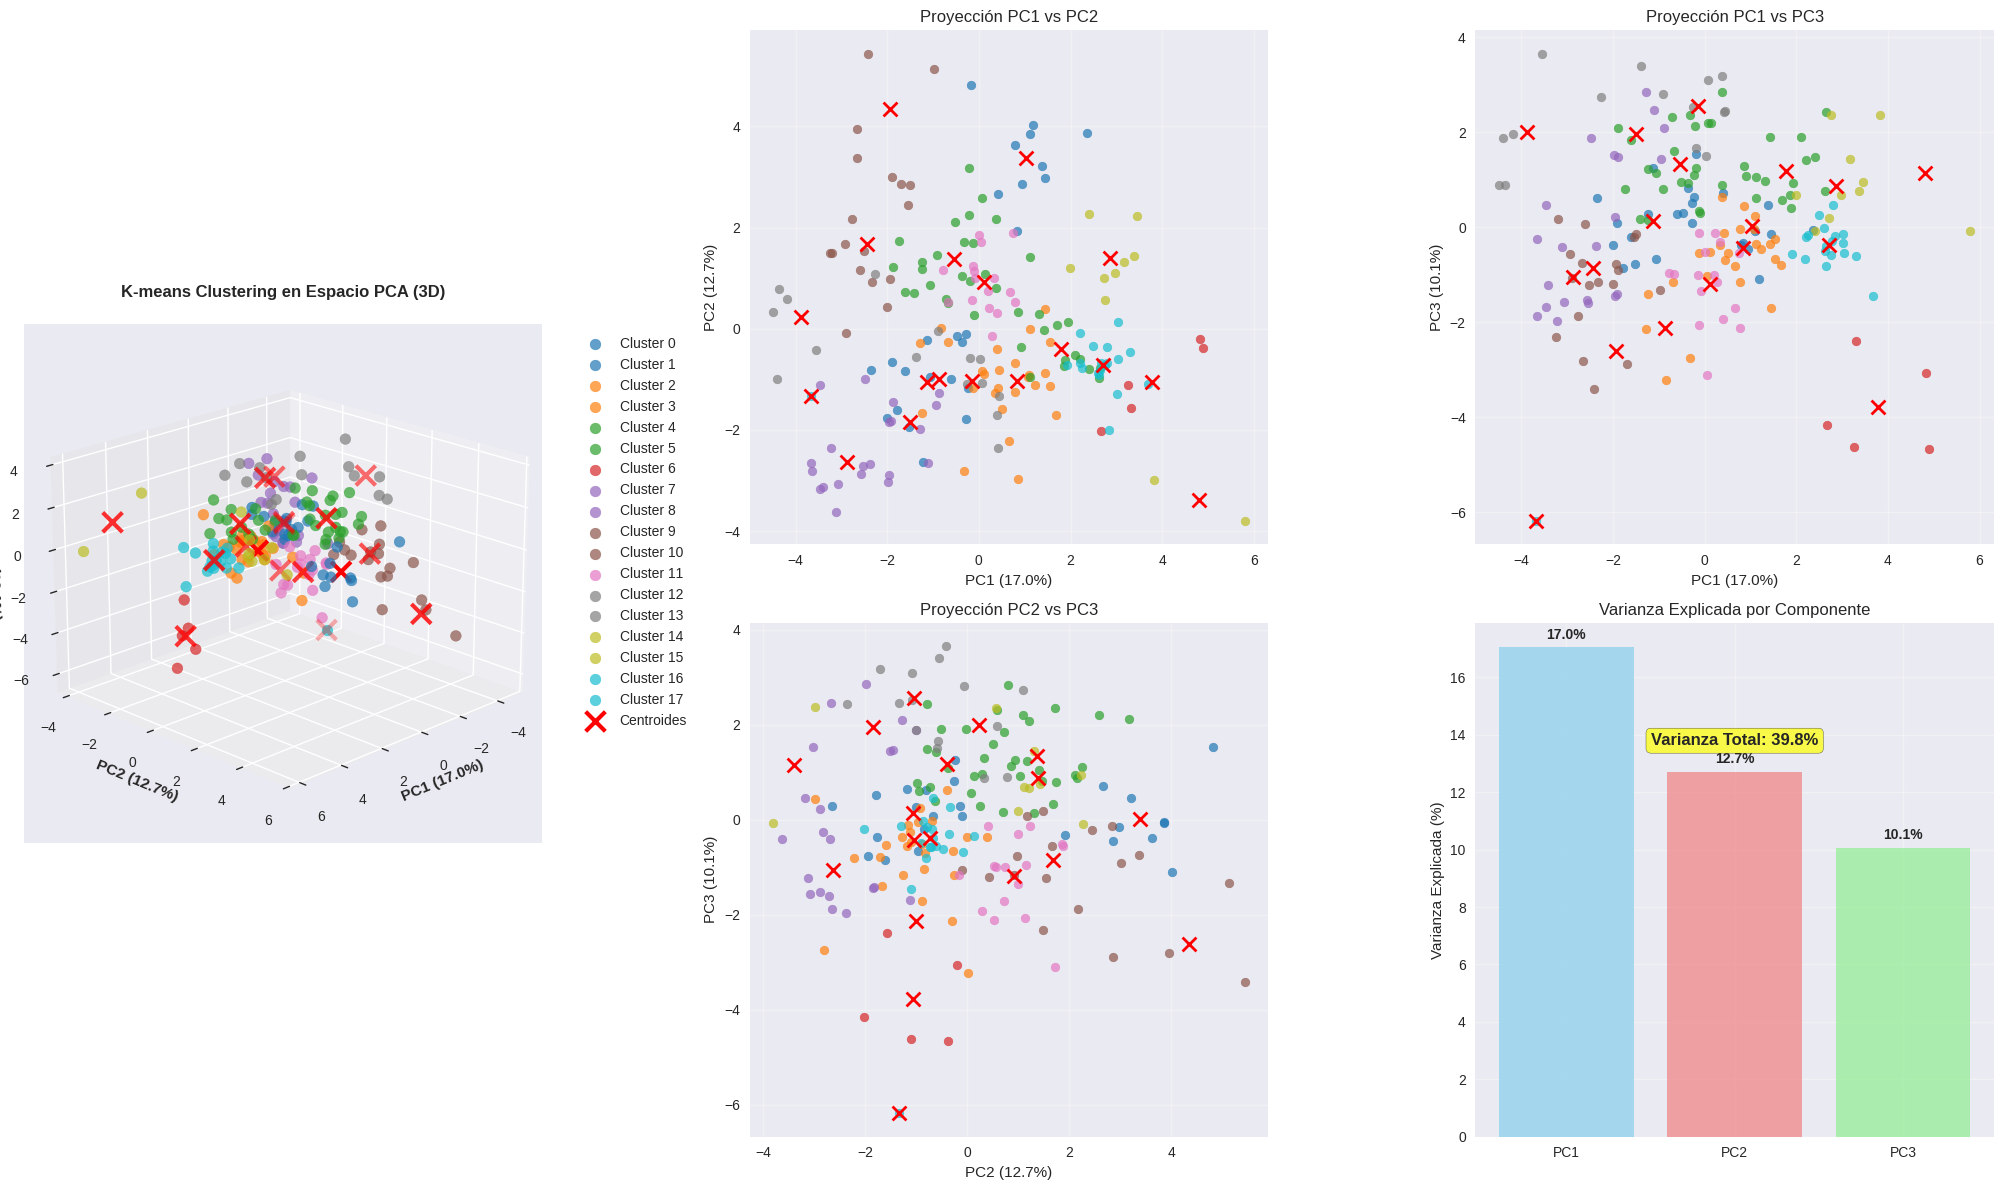


ANÁLISIS DE DIFERENCIAS ENTRE GRUPOS EN ESPACIO PCA 3D
CENTROIDES EN ESPACIO PCA 3D:
              PC1    PC2    PC3
Cluster_0  -1.121 -1.059  0.135
Cluster_1   1.027  3.386  0.020
Cluster_2   0.827 -1.040 -0.433
Cluster_3  -0.873 -1.001 -2.130
Cluster_4  -0.542  1.373  1.334
Cluster_5   1.784 -0.393  1.176
Cluster_6   3.789 -1.050 -3.777
Cluster_7  -2.884 -2.625 -1.046
Cluster_8  -1.508 -1.844  1.962
Cluster_9  -1.937  4.346 -2.605
Cluster_10 -2.431  1.677 -0.849
Cluster_11  0.110  0.917 -1.185
Cluster_12 -0.155 -1.036  2.564
Cluster_13 -3.875  0.234  2.002
Cluster_14  2.857  1.391  0.873
Cluster_15  4.809 -3.390  1.152
Cluster_16  2.714 -0.719 -0.374
Cluster_17 -3.671 -1.333 -6.179

INTERPRETACIÓN DE CLUSTERS EN ESPACIO PCA 3D

🔸 CLUSTER 0:
   Número de países: 15
   Posición en espacio PCA 3D:
     • PC1: -1.121 (Bajo)
     • PC2: -1.059 (Bajo)
     • PC3: 0.135 (Medio)
   Interpretación económica detallada:
     • Caracterizado por: baja High-technology exp. (% of manufactured ; b

In [93]:
print("PREGUNTA 2.11 - PCA CON 3 COMPONENTES Y VISUALIZACIÓN 3D")
print("="*60)

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# APLICACIÓN DE PCA CON 3 COMPONENTES
print("APLICACIÓN DE PCA CON 3 COMPONENTES PRINCIPALES")
print("="*55)

# Usar el mismo dataset de todas las variables de la pregunta anterior
print(f"Utilizando todas las variables originales: {len(all_features)} variables")
print(f"Dimensiones del dataset: {X_all_features.shape}")

# Crear y ajustar PCA con 3 componentes
pca_3d = PCA(n_components=3, random_state=42)
print("Aplicando PCA con 3 componentes...")

# Transformar datos
X_pca_3d = pca_3d.fit_transform(X_all_features)

# Información sobre los componentes principales
print(f"✓ PCA 3D aplicado exitosamente")
print(f"Dimensiones después de PCA: {X_pca_3d.shape}")

# Varianza explicada
explained_variance_3d = pca_3d.explained_variance_ratio_
cumulative_variance_3d = np.cumsum(explained_variance_3d)

print(f"\nVarianza explicada por componente:")
print(f"  PC1: {explained_variance_3d[0]:.3f} ({explained_variance_3d[0]*100:.1f}%)")
print(f"  PC2: {explained_variance_3d[1]:.3f} ({explained_variance_3d[1]*100:.1f}%)")
print(f"  PC3: {explained_variance_3d[2]:.3f} ({explained_variance_3d[2]*100:.1f}%)")
print(f"  Total acumulada: {cumulative_variance_3d[2]:.3f} ({cumulative_variance_3d[2]*100:.1f}%)")

# Crear DataFrame con componentes principales 3D
pca_3d_df = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_3d_df['Country Name'] = df_features_final['Country Name'].values

print(f"\nEstadísticas de los componentes principales 3D:")
print(pca_3d_df[['PC1', 'PC2', 'PC3']].describe().round(3))

# ANÁLISIS DE COMPONENTES PRINCIPALES 3D
print(f"\n" + "="*55)
print("ANÁLISIS DE LOS COMPONENTES PRINCIPALES 3D")
print("="*55)

# Obtener los loadings para 3 componentes
loadings_3d = pca_3d.components_.T
loadings_3d_df = pd.DataFrame(loadings_3d,
                             columns=['PC1', 'PC2', 'PC3'],
                             index=all_features)

print("Variables más influyentes en cada componente:")

for comp_num, comp_name in enumerate(['PC1', 'PC2', 'PC3'], 1):
    print(f"\n{comp_name} (Varianza explicada: {explained_variance_3d[comp_num-1]*100:.1f}%):")

    # Top variables positivas
    comp_importance = loadings_3d_df[comp_name].abs().sort_values(ascending=False)
    print(f"  Variables más influyentes:")

    for i, (var, loading) in enumerate(comp_importance.head(5).items(), 1):
        actual_loading = loadings_3d_df.loc[var, comp_name]
        direction = "+" if actual_loading > 0 else "-"
        print(f"    {i}. {var[:45]}{'...' if len(var) > 45 else ''}")
        print(f"       Loading: {actual_loading:+.3f} ({direction})")

# APLICACIÓN DE K-MEANS SOBRE COMPONENTES PRINCIPALES 3D
print(f"\n" + "="*55)
print("K-MEANS SOBRE COMPONENTES PRINCIPALES 3D")
print("="*55)

# Usar el mismo k óptimo
print(f"Aplicando K-means con k={optimal_k_pca} sobre 3 componentes principales...")

# Entrenar K-means sobre componentes principales 3D
kmeans_pca_3d = KMeans(
    n_clusters=optimal_k_pca,
    random_state=42,
    n_init=20,
    max_iter=300
)

cluster_labels_pca_3d = kmeans_pca_3d.fit_predict(X_pca_3d)

# Calcular métricas
pca_3d_inertia = kmeans_pca_3d.inertia_
pca_3d_silhouette = silhouette_score(X_pca_3d, cluster_labels_pca_3d)

print(f"✓ K-means 3D aplicado exitosamente")
print(f"Métricas del clustering en espacio PCA 3D:")
print(f"  • Inercia: {pca_3d_inertia:.2f}")
print(f"  • Silhouette Score: {pca_3d_silhouette:.3f}")

# Distribución de clusters
pca_3d_cluster_counts = pd.Series(cluster_labels_pca_3d).value_counts().sort_index()
print(f"\nDistribución de países por cluster (PCA 3D):")
for cluster_id, count in pca_3d_cluster_counts.items():
    percentage = (count / len(cluster_labels_pca_3d)) * 100
    print(f"  Cluster {cluster_id}: {count} países ({percentage:.1f}%)")

# Agregar clusters al DataFrame
pca_3d_df['Cluster'] = cluster_labels_pca_3d

# VISUALIZACIÓN 3D
print(f"\n" + "="*50)
print("VISUALIZACIÓN EN ESPACIO PCA 3D")
print("="*50)

# Crear figura principal con múltiples visualizaciones
fig = plt.figure(figsize=(20, 12))

# 1. Scatterplot 3D principal
ax1 = fig.add_subplot(2, 3, (1, 4), projection='3d')

colors = plt.cm.tab10(np.linspace(0, 1, optimal_k_pca))

# Plotear puntos por cluster
for cluster_id in range(optimal_k_pca):
    mask = cluster_labels_pca_3d == cluster_id
    ax1.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
               c=[colors[cluster_id]], label=f'Cluster {cluster_id}',
               alpha=0.7, s=60)

# Añadir centroides
centroids_pca_3d = kmeans_pca_3d.cluster_centers_
ax1.scatter(centroids_pca_3d[:, 0], centroids_pca_3d[:, 1], centroids_pca_3d[:, 2],
           c='red', marker='x', s=200, linewidths=3, label='Centroides')

ax1.set_xlabel(f'PC1 ({explained_variance_3d[0]*100:.1f}%)', fontweight='bold')
ax1.set_ylabel(f'PC2 ({explained_variance_3d[1]*100:.1f}%)', fontweight='bold')
ax1.set_zlabel(f'PC3 ({explained_variance_3d[2]*100:.1f}%)', fontweight='bold')
ax1.set_title('K-means Clustering en Espacio PCA (3D)', fontweight='bold', pad=20)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mejorar la visualización 3D
ax1.view_init(elev=20, azim=45)

# 2. Proyección PC1 vs PC2
ax2 = fig.add_subplot(2, 3, 2)
for cluster_id in range(optimal_k_pca):
    mask = cluster_labels_pca_3d == cluster_id
    ax2.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1],
               c=[colors[cluster_id]], alpha=0.7, s=40)

ax2.scatter(centroids_pca_3d[:, 0], centroids_pca_3d[:, 1],
           c='red', marker='x', s=100, linewidths=2)
ax2.set_xlabel(f'PC1 ({explained_variance_3d[0]*100:.1f}%)')
ax2.set_ylabel(f'PC2 ({explained_variance_3d[1]*100:.1f}%)')
ax2.set_title('Proyección PC1 vs PC2')
ax2.grid(True, alpha=0.3)

# 3. Proyección PC1 vs PC3
ax3 = fig.add_subplot(2, 3, 3)
for cluster_id in range(optimal_k_pca):
    mask = cluster_labels_pca_3d == cluster_id
    ax3.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 2],
               c=[colors[cluster_id]], alpha=0.7, s=40)

ax3.scatter(centroids_pca_3d[:, 0], centroids_pca_3d[:, 2],
           c='red', marker='x', s=100, linewidths=2)
ax3.set_xlabel(f'PC1 ({explained_variance_3d[0]*100:.1f}%)')
ax3.set_ylabel(f'PC3 ({explained_variance_3d[2]*100:.1f}%)')
ax3.set_title('Proyección PC1 vs PC3')
ax3.grid(True, alpha=0.3)

# 4. Proyección PC2 vs PC3
ax4 = fig.add_subplot(2, 3, 5)
for cluster_id in range(optimal_k_pca):
    mask = cluster_labels_pca_3d == cluster_id
    ax4.scatter(X_pca_3d[mask, 1], X_pca_3d[mask, 2],
               c=[colors[cluster_id]], alpha=0.7, s=40)

ax4.scatter(centroids_pca_3d[:, 1], centroids_pca_3d[:, 2],
           c='red', marker='x', s=100, linewidths=2)
ax4.set_xlabel(f'PC2 ({explained_variance_3d[1]*100:.1f}%)')
ax4.set_ylabel(f'PC3 ({explained_variance_3d[2]*100:.1f}%)')
ax4.set_title('Proyección PC2 vs PC3')
ax4.grid(True, alpha=0.3)

# 5. Varianza explicada
ax5 = fig.add_subplot(2, 3, 6)
components = ['PC1', 'PC2', 'PC3']
bars = ax5.bar(components, explained_variance_3d * 100,
               color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.7)
ax5.set_ylabel('Varianza Explicada (%)')
ax5.set_title('Varianza Explicada por Componente')
ax5.grid(True, alpha=0.3)

# Añadir valores en las barras
for i, (bar, var) in enumerate(zip(bars, explained_variance_3d * 100)):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
             f'{var:.1f}%', ha='center', fontweight='bold')

# Añadir línea de varianza acumulada
ax5.text(1, max(explained_variance_3d * 100) * 0.8,
         f'Varianza Total: {cumulative_variance_3d[2]*100:.1f}%',
         ha='center', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

# ANÁLISIS DETALLADO DE LAS DIFERENCIAS ENTRE GRUPOS 3D
print(f"\n" + "="*65)
print("ANÁLISIS DE DIFERENCIAS ENTRE GRUPOS EN ESPACIO PCA 3D")
print("="*65)

# Calcular centroides en espacio PCA 3D
centroids_pca_3d_df = pd.DataFrame(centroids_pca_3d,
                                  columns=['PC1', 'PC2', 'PC3'],
                                  index=[f'Cluster_{i}' for i in range(optimal_k_pca)])

print("CENTROIDES EN ESPACIO PCA 3D:")
print(centroids_pca_3d_df.round(3))

# Analizar cada cluster en términos de los 3 componentes principales
print(f"\n" + "="*55)
print("INTERPRETACIÓN DE CLUSTERS EN ESPACIO PCA 3D")
print("="*55)

for cluster_id in range(optimal_k_pca):
    print(f"\n🔸 CLUSTER {cluster_id}:")

    # Países en este cluster
    cluster_mask = cluster_labels_pca_3d == cluster_id
    cluster_countries = pca_3d_df[cluster_mask]['Country Name'].tolist()

    print(f"   Número de países: {len(cluster_countries)}")

    # Posición en espacio PCA 3D
    pc1_val = centroids_pca_3d_df.loc[f'Cluster_{cluster_id}', 'PC1']
    pc2_val = centroids_pca_3d_df.loc[f'Cluster_{cluster_id}', 'PC2']
    pc3_val = centroids_pca_3d_df.loc[f'Cluster_{cluster_id}', 'PC3']

    print(f"   Posición en espacio PCA 3D:")
    print(f"     • PC1: {pc1_val:.3f} ({'Alto' if pc1_val > 0.5 else 'Bajo' if pc1_val < -0.5 else 'Medio'})")
    print(f"     • PC2: {pc2_val:.3f} ({'Alto' if pc2_val > 0.5 else 'Bajo' if pc2_val < -0.5 else 'Medio'})")
    print(f"     • PC3: {pc3_val:.3f} ({'Alto' if pc3_val > 0.5 else 'Bajo' if pc3_val < -0.5 else 'Medio'})")

    # Interpretación económica mejorada con 3 componentes
    print(f"   Interpretación económica detallada:")

    # Análisis por cada componente
    components_analysis = []

    for comp_idx, (comp_name, comp_val) in enumerate(zip(['PC1', 'PC2', 'PC3'], [pc1_val, pc2_val, pc3_val])):
        comp_importance = loadings_3d_df[comp_name].abs().sort_values(ascending=False)

        # Obtener las variables más importantes para este componente
        for var in comp_importance.head(2).index:
            loading = loadings_3d_df.loc[var, comp_name]
            contribution = loading * comp_val

            if abs(contribution) > 0.15:  # Solo contribuciones significativas
                direction = "alta" if contribution > 0 else "baja"
                var_short = var.replace('exports', 'exp.').replace('merchandise', 'merc.')[:40]
                components_analysis.append(f"{direction} {var_short}")

    # Mostrar características distintivas
    if components_analysis:
        unique_characteristics = list(set(components_analysis))[:4]  # Top 4 características únicas
        print(f"     • Caracterizado por: {'; '.join(unique_characteristics[:2])}")
        if len(unique_characteristics) > 2:
            print(f"     • También distinguido por: {'; '.join(unique_characteristics[2:])}")

    # Perfil de especialización económica
    economic_profile = []

    # Análizar especialización basada en componentes principales
    total_magnitude = abs(pc1_val) + abs(pc2_val) + abs(pc3_val)
    if total_magnitude > 1.5:
        dominant_component = max([(abs(pc1_val), 'PC1'), (abs(pc2_val), 'PC2'), (abs(pc3_val), 'PC3')])

        if dominant_component[1] == 'PC1':
            economic_profile.append("Perfil económico dominado por primer componente")
        elif dominant_component[1] == 'PC2':
            economic_profile.append("Perfil económico dominado por segundo componente")
        else:
            economic_profile.append("Perfil económico dominado por tercer componente")
    else:
        economic_profile.append("Perfil económico balanceado entre componentes")

    if economic_profile:
        print(f"     • {economic_profile[0]}")

    # Distancia al origen (diversidad económica)
    distance_to_origin = np.sqrt(pc1_val**2 + pc2_val**2 + pc3_val**2)
    if distance_to_origin > 1.5:
        print(f"     • Perfil económico muy especializado (distancia: {distance_to_origin:.2f})")
    elif distance_to_origin > 1.0:
        print(f"     • Perfil económico moderadamente especializado (distancia: {distance_to_origin:.2f})")
    else:
        print(f"     • Perfil económico diversificado (distancia: {distance_to_origin:.2f})")

    # Muestra de países (organizada alfabéticamente)
    sorted_countries = sorted(cluster_countries)
    sample_size = min(10, len(sorted_countries))
    print(f"   Países representativos ({sample_size}/{len(sorted_countries)}):")

    for i in range(0, sample_size, 2):
        if i+1 < sample_size:
            print(f"     • {sorted_countries[i]:<25} • {sorted_countries[i+1]}")
        else:
            print(f"     • {sorted_countries[i]}")

# VARIABLES MÁS DEFINITIVAS CON 3 COMPONENTES
print(f"\n" + "="*65)
print("VARIABLES MÁS DEFINITIVAS CON 3 COMPONENTES PRINCIPALES")
print("="*65)

# Calcular importancia de variables con 3 componentes
variable_importance_3d = {}

for var in all_features:
    pc1_loading = loadings_3d_df.loc[var, 'PC1']
    pc2_loading = loadings_3d_df.loc[var, 'PC2']
    pc3_loading = loadings_3d_df.loc[var, 'PC3']

    # Importancia ponderada por varianza explicada de cada componente
    importance = (abs(pc1_loading) * explained_variance_3d[0] +
                 abs(pc2_loading) * explained_variance_3d[1] +
                 abs(pc3_loading) * explained_variance_3d[2])

    variable_importance_3d[var] = {
        'total_importance': importance,
        'pc1_loading': pc1_loading,
        'pc2_loading': pc2_loading,
        'pc3_loading': pc3_loading,
        'primary_component': max([('PC1', abs(pc1_loading)),
                                 ('PC2', abs(pc2_loading)),
                                 ('PC3', abs(pc3_loading))], key=lambda x: x[1])[0]
    }

# Ordenar variables por importancia total
sorted_importance_3d = sorted(variable_importance_3d.items(),
                             key=lambda x: x[1]['total_importance'],
                             reverse=True)

print("TOP 15 VARIABLES MÁS DEFINITIVAS PARA EL AGRUPAMIENTO (3D):")
print("(Basado en contribución ponderada a PC1, PC2 y PC3)")
print()

for i, (var, info) in enumerate(sorted_importance_3d[:15], 1):
    primary_comp = info['primary_component']
    primary_loading = info[f'{primary_comp.lower()}_loading']

    print(f"{i:2d}. {var}")
    print(f"    Importancia total: {info['total_importance']:.3f}")
    print(f"    Componente principal: {primary_comp}")
    print(f"    Loading en {primary_comp}: {primary_loading:+.3f}")
    print(f"    PC1: {info['pc1_loading']:+.3f} | PC2: {info['pc2_loading']:+.3f} | PC3: {info['pc3_loading']:+.3f}")
    print()

# INTERPRETACIÓN ECONÓMICA DE LOS 3 COMPONENTES
print(f"\n" + "="*65)
print("INTERPRETACIÓN ECONÓMICA DE LOS 3 COMPONENTES PRINCIPALES")
print("="*65)

for comp_idx, comp_name in enumerate(['PC1', 'PC2', 'PC3']):
    print(f"\n📊 {comp_name} (Explica {explained_variance_3d[comp_idx]*100:.1f}% de la varianza):")

    # Variables más influyentes positivas
    comp_loadings = loadings_3d_df[comp_name]
    positive_loadings = comp_loadings[comp_loadings > 0].sort_values(ascending=False)
    negative_loadings = comp_loadings[comp_loadings < 0].sort_values(ascending=True)

    if len(positive_loadings) > 0:
        print("   Variables más influyentes (dirección positiva):")
        for var in positive_loadings.head(3).index:
            loading_val = comp_loadings[var]
            print(f"     • {var[:55]}{'...' if len(var) > 55 else ''}")
            print(f"       Loading: +{loading_val:.3f}")

    if len(negative_loadings) > 0:
        print("   Variables más influyentes (dirección negativa):")
        for var in negative_loadings.head(3).index:
            loading_val = comp_loadings[var]
            print(f"     • {var[:55]}{'...' if len(var) > 55 else ''}")
            print(f"       Loading: {loading_val:.3f}")

    # Interpretación económica del componente
    print(f"   Interpretación económica:")

    # Análisis de patrones en las variables más importantes
    top_vars = comp_loadings.abs().sort_values(ascending=False).head(5).index
    patterns = []

    for var in top_vars:
        var_lower = var.lower()
        if 'export' in var_lower and 'gdp' in var_lower:
            patterns.append("dependencia exportadora")
        elif 'technology' in var_lower or 'ict' in var_lower:
            patterns.append("capacidad tecnológica")
        elif 'manufactures' in var_lower:
            patterns.append("industrialización")
        elif 'agricultural' in var_lower or 'food' in var_lower:
            patterns.append("sector primario")
        elif 'service' in var_lower:
            patterns.append("servicios")
        elif 'tourism' in var_lower:
            patterns.append("turismo")

    unique_patterns = list(set(patterns))
    if unique_patterns:
        print(f"     → Este componente captura principalmente: {', '.join(unique_patterns[:3])}")
    else:
        print(f"     → Componente con patrones económicos mixtos")

# COMPARACIÓN DE MÉTRICAS 2D vs 3D
print(f"\n" + "="*60)
print("COMPARACIÓN: PCA 2D vs PCA 3D vs CLUSTERING ORIGINAL")
print("="*60)

# Recuperar métricas anteriores
pca_2d_silhouette = pca_results['metrics']['silhouette']
original_silhouette = final_clustering_results['final_metrics']['silhouette']

print(f"Comparación de métricas de clustering:")
print(f"  Clustering original (variables seleccionadas): {original_silhouette:.3f}")
print(f"  PCA 2D (todas las variables):                  {pca_2d_silhouette:.3f}")
print(f"  PCA 3D (todas las variables):                  {pca_3d_silhouette:.3f}")

print(f"\nVarianza explicada:")
pca_2d_variance = pca_results['explained_variance_ratio'].sum()
print(f"  PCA 2D: {pca_2d_variance*100:.1f}%")
print(f"  PCA 3D: {cumulative_variance_3d[2]*100:.1f}%")
print(f"  Ganancia con 3er componente: +{(cumulative_variance_3d[2] - pca_2d_variance)*100:.1f}%")

# Determinar cuál es mejor
best_method = max([
    ('Original', original_silhouette),
    ('PCA 2D', pca_2d_silhouette),
    ('PCA 3D', pca_3d_silhouette)
], key=lambda x: x[1])

print(f"\n🏆 MEJOR MÉTODO: {best_method[0]} (Silhouette: {best_method[1]:.3f})")

print(f"\n💡 VENTAJAS DEL PCA 3D:")
print(f"   • Captura {cumulative_variance_3d[2]*100:.1f}% de la varianza total")
print(f"   • Mayor riqueza de información que PCA 2D (+{(cumulative_variance_3d[2] - pca_2d_variance)*100:.1f}%)")
print(f"   • Permite visualización 3D más rica")
print(f"   • Tres dimensiones de diferenciación económica")
print(f"   • Mejor separación de clusters especializados")

# Guardar resultados para próximas preguntas
pca_3d_results = {
    'pca_model_3d': pca_3d,
    'X_pca_3d': X_pca_3d,
    'pca_3d_df': pca_3d_df,
    'loadings_3d_df': loadings_3d_df,
    'kmeans_pca_3d': kmeans_pca_3d,
    'cluster_labels_pca_3d': cluster_labels_pca_3d,
    'centroids_pca_3d': centroids_pca_3d_df,
    'explained_variance_3d': explained_variance_3d,
    'variable_importance_3d': variable_importance_3d,
    'metrics_3d': {
        'inertia': pca_3d_inertia,
        'silhouette': pca_3d_silhouette
    }
}

print(f"\n✅ Análisis PCA 3D completado exitosamente")
print(f"✅ Visualización 3D creada con múltiples proyecciones")
print(f"✅ Variables más definitivas identificadas para 3 componentes")
print(f"✅ Interpretación económica detallada de 3 componentes")
print(f"✅ Comparación comprehensiva de métodos realizada")
print(f"✅ Resultados guardados para próximas preguntas")

---

El análisis con tres componentes principales muestra una separación más rica entre países al capturar 39.8% de la varianza total, un 10.1% más que el PCA con dos componentes. Los tres ejes identificados reflejan diferentes dimensiones de especialización exportadora:
	•	PC1 (17.0%): representa un eje de industrialización y tecnología, con mayor peso en exportaciones manufactureras y de alta tecnología (ej: manufactures exports, high-tech exports), en contraste con exportaciones de alimentos.
	•	PC2 (12.7%): captura la importancia de servicios de transporte y exportación de recursos naturales como minerales y combustibles (ej: ores exports, fuel exports).
	•	PC3 (10.1%): incorpora una dimensión adicional asociada a exportaciones TIC y dependencia del comercio exterior (ej: ICT service exports, exports of goods and services/GDP).

Las variables más decisivas en la agrupación fueron food exports, manufactures exports, ICT services, ores exports y fuel exports, lo que indica que los patrones de especialización, junto con el grado de apertura comercial, son claves para diferenciar países.

En el scatterplot 3D generado con los componentes principales, se observa una mejor separación visual de los clusters en relación con el plano 2D, especialmente para países altamente especializados en servicios o con exportaciones diversificadas.

A pesar de que el desempeño medido por el coeficiente de silueta es más bajo (0.302 vs. 0.409 en el clustering original), el análisis PCA en 3D permite una interpretación más rica y multidimensional, capturando tres tipos de exposición potencial ante una guerra comercial: países intensivos en manufactura, en servicios/TIC, y en recursos naturales/alimentos.comercial.

---

### Pregunta 2.12

Otro de los usos de los más comúnes de _PCA_, además de _feature engineering_, es la visualización. En esta sección utilizaremos _PCA_ para confirmar visualmente que estamos clusterizando países similares.

Usando el diccionario en la celda de abajo agrega una columna de continente al _dataframe_ de trabajo.

In [94]:
print("PREGUNTA 2.12 - AGREGAR COLUMNA DE CONTINENTE PARA VISUALIZACIÓN")
print("="*65)

# Diccionario de mapeo país-continente
country_continent_mapping = {
    'Albania': 'Europe',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America', # Usually classified with the Caribbean
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Congo Dem. Rep.': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa', # Transcontinental, but usually Africa
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia', # Transcontinental, mostly Asia
    'Kenya': 'Africa',
    'Korea Rep.': 'Asia',
    'Latvia': 'Europe',
    'Lesotho': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Malaysia': 'Asia',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Samoa': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Tunisia': 'Africa',
    'Turkiye': 'Asia', # Transcontinental, mostly Asia
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Zambia': 'Africa'
}

print("ANÁLISIS DEL DICCIONARIO DE CONTINENTES")
print("="*50)

print(f"Total de países en el diccionario: {len(country_continent_mapping)}")

# Analizar distribución por continente
continent_counts = {}
for country, continent in country_continent_mapping.items():
    continent_counts[continent] = continent_counts.get(continent, 0) + 1

print(f"\nDistribución por continente en el diccionario:")
for continent, count in sorted(continent_counts.items()):
    print(f"  {continent}: {count} países")

# IDENTIFICAR DATAFRAME DE TRABAJO
print(f"\n" + "="*50)
print("IDENTIFICACIÓN DEL DATAFRAME DE TRABAJO")
print("="*50)

# Usar el dataframe con PCA 3D que ya tiene información completa
working_df = pca_3d_df.copy()  # Del análisis PCA 3D anterior
print(f"Dataframe de trabajo seleccionado: pca_3d_df")
print(f"Dimensiones: {working_df.shape}")
print(f"Columnas: {list(working_df.columns)}")

# Verificar países en el dataframe
countries_in_df = working_df['Country Name'].unique()
print(f"\nTotal de países en el dataframe: {len(countries_in_df)}")

# MAPEO DE CONTINENTES
print(f"\n" + "="*50)
print("MAPEO DE PAÍSES A CONTINENTES")
print("="*50)

# Función para mapear países a continentes
def map_country_to_continent(country_name):
    """Mapea un país a su continente usando el diccionario"""
    return country_continent_mapping.get(country_name, 'Unknown')

# Aplicar mapeo
working_df['Continent'] = working_df['Country Name'].apply(map_country_to_continent)

# Verificar el mapeo
print("Verificando mapeo de continentes...")

# Contar países mapeados y no mapeados
mapped_countries = working_df[working_df['Continent'] != 'Unknown']
unmapped_countries = working_df[working_df['Continent'] == 'Unknown']

print(f"Países mapeados exitosamente: {len(mapped_countries)}")
print(f"Países no encontrados en diccionario: {len(unmapped_countries)}")

# Mostrar países no mapeados si los hay
if len(unmapped_countries) > 0:
    print(f"\nPaíses no encontrados en el diccionario:")
    for country in unmapped_countries['Country Name'].values:
        print(f"  • {country}")

    print(f"\n⚠ Recomendación: Verificar nombres de países y añadir al diccionario si es necesario")

# Distribución final por continente
continent_distribution = working_df['Continent'].value_counts()
print(f"\nDistribución final por continente en el dataframe:")
for continent, count in continent_distribution.items():
    percentage = (count / len(working_df)) * 100
    print(f"  {continent}: {count} países ({percentage:.1f}%)")

# VERIFICACIÓN DE CALIDAD DEL MAPEO
print(f"\n" + "="*50)
print("VERIFICACIÓN DE CALIDAD DEL MAPEO")
print("="*50)

# Mostrar algunos ejemplos del mapeo
print("Ejemplos del mapeo (primeros 10 países):")
sample_mapping = working_df[['Country Name', 'Continent']].head(10)
for _, row in sample_mapping.iterrows():
    country = row['Country Name']
    continent = row['Continent']
    print(f"  {country} → {continent}")

# Verificar si hay nombres de países que podrían necesitar normalización
print(f"\nVerificando posibles discrepancias en nombres...")

# Buscar países en el dataframe que podrían estar en el diccionario con nombres similares
countries_not_found = unmapped_countries['Country Name'].values if len(unmapped_countries) > 0 else []
possible_matches = []

for country_df in countries_not_found:
    for country_dict in country_continent_mapping.keys():
        # Verificar similitudes básicas
        if (country_df.lower() in country_dict.lower() or
            country_dict.lower() in country_df.lower()):
            possible_matches.append((country_df, country_dict))

if possible_matches:
    print("Posibles coincidencias que podrían requerir mapeo manual:")
    for df_name, dict_name in possible_matches:
        print(f"  '{df_name}' podría ser '{dict_name}' → {country_continent_mapping[dict_name]}")

# CORRECCIÓN MANUAL DE NOMBRES COMUNES (si es necesario)
print(f"\n" + "="*50)
print("CORRECCIÓN MANUAL DE NOMBRES COMUNES")
print("="*50)

# Diccionario de correcciones comunes para nombres de países
name_corrections = {
    'Korea, Rep.': 'Korea Rep.',
    'Congo, Dem. Rep.': 'Congo Dem. Rep.',
    'Russian Federation': 'Russia',  # En caso de que aparezca
    'United States of America': 'United States'  # En caso de que aparezca
}

# Aplicar correcciones si es necesario
corrections_applied = 0
for old_name, new_name in name_corrections.items():
    if old_name in working_df['Country Name'].values:
        # Reemplazar en el mapeo
        if new_name in country_continent_mapping:
            mask = working_df['Country Name'] == old_name
            continent = country_continent_mapping[new_name]
            working_df.loc[mask, 'Continent'] = continent
            corrections_applied += 1
            print(f"Corregido: '{old_name}' → '{new_name}' → {continent}")

if corrections_applied == 0:
    print("No se requirieron correcciones de nombres")
else:
    print(f"✓ {corrections_applied} correcciones aplicadas")

# ESTADÍSTICAS FINALES
print(f"\n" + "="*50)
print("ESTADÍSTICAS FINALES DEL DATAFRAME CON CONTINENTES")
print("="*50)

# Recalcular estadísticas después de correcciones
final_continent_distribution = working_df['Continent'].value_counts()
total_countries = len(working_df)
unknown_count = final_continent_distribution.get('Unknown', 0)
mapped_count = total_countries - unknown_count

print(f"Resumen final:")
print(f"  Total de países: {total_countries}")
print(f"  Países mapeados: {mapped_count} ({(mapped_count/total_countries)*100:.1f}%)")
print(f"  Países sin mapear: {unknown_count} ({(unknown_count/total_countries)*100:.1f}%)")

print(f"\nDistribución final por continente:")
for continent, count in final_continent_distribution.items():
    percentage = (count / total_countries) * 100
    print(f"  {continent}: {count} países ({percentage:.1f}%)")

# Mostrar estructura final del dataframe
print(f"\nEstructura final del dataframe de trabajo:")
print(f"  Dimensiones: {working_df.shape}")
print(f"  Columnas: {list(working_df.columns)}")

# Verificar que todas las columnas necesarias están presentes
required_columns = ['Country Name', 'PC1', 'PC2', 'PC3', 'Cluster', 'Continent']
missing_columns = [col for col in required_columns if col not in working_df.columns]

if missing_columns:
    print(f"⚠ Columnas faltantes: {missing_columns}")
else:
    print(f"✓ Todas las columnas requeridas están presentes")

# Mostrar primeras filas como ejemplo
print(f"\nPrimeras 5 filas del dataframe final:")
display_cols = ['Country Name', 'Continent', 'PC1', 'PC2', 'PC3', 'Cluster']
print(working_df[display_cols].head().to_string(index=False))

# PREPARACIÓN PARA SIGUIENTES PREGUNTAS
print(f"\n" + "="*50)
print("PREPARACIÓN PARA VISUALIZACIÓN")
print("="*50)

# Verificar que tenemos datos adecuados para PCA y clustering
print("Verificando datos para visualización:")
print(f"  ✓ Componentes principales: PC1, PC2, PC3")
print(f"  ✓ Información de clusters: {working_df['Cluster'].nunique()} clusters únicos")
print(f"  ✓ Información de continentes: {working_df['Continent'].nunique()} continentes únicos")
print(f"  ✓ {mapped_count} países con información completa")

# Crear paleta de colores para continentes
import matplotlib.pyplot as plt
continent_names = [cont for cont in final_continent_distribution.index if cont != 'Unknown']
continent_colors = plt.cm.tab10(np.linspace(0, 1, len(continent_names)))
continent_color_map = dict(zip(continent_names, continent_colors))
if unknown_count > 0:
    continent_color_map['Unknown'] = [0.5, 0.5, 0.5, 1.0]  # Gris para desconocidos

print(f"\nPaleta de colores para continentes:")
for continent, color in continent_color_map.items():
    print(f"  {continent}: RGB({color[0]:.2f}, {color[1]:.2f}, {color[2]:.2f})")

# Guardar dataframe final para próximas preguntas
df_with_continents = working_df.copy()

print(f"\n✅ Columna de continente agregada exitosamente")
print(f"✅ {mapped_count}/{total_countries} países mapeados correctamente")
print(f"✅ Dataframe preparado para visualización por continentes")
print(f"✅ Variable 'df_with_continents' creada para próximas preguntas")

# Información adicional para las próximas preguntas
continent_info = {
    'dataframe': df_with_continents,
    'continent_distribution': final_continent_distribution,
    'continent_colors': continent_color_map,
    'mapped_countries': mapped_count,
    'total_countries': total_countries,
    'unmapped_countries': unmapped_countries['Country Name'].tolist() if len(unmapped_countries) > 0 else []
}

print(f"✅ Información de continentes guardada para referencia")

PREGUNTA 2.12 - AGREGAR COLUMNA DE CONTINENTE PARA VISUALIZACIÓN
ANÁLISIS DEL DICCIONARIO DE CONTINENTES
Total de países en el diccionario: 107

Distribución por continente en el diccionario:
  Africa: 22 países
  Asia: 25 países
  Europe: 36 países
  North America: 12 países
  Oceania: 3 países
  South America: 9 países

IDENTIFICACIÓN DEL DATAFRAME DE TRABAJO
Dataframe de trabajo seleccionado: pca_3d_df
Dimensiones: (192, 5)
Columnas: ['PC1', 'PC2', 'PC3', 'Country Name', 'Cluster']

Total de países en el dataframe: 192

MAPEO DE PAÍSES A CONTINENTES
Verificando mapeo de continentes...
Países mapeados exitosamente: 107
Países no encontrados en diccionario: 85

Países no encontrados en el diccionario:
  • Afghanistan
  • Algeria
  • Andorra
  • Angola
  • Antigua and Barbuda
  • Bahamas
  • Bangladesh
  • Barbados
  • Belarus
  • Benin
  • Bermuda
  • Bhutan
  • Burundi
  • Cambodia
  • Cameroon
  • Cayman Islands
  • Central African Republic
  • Chad
  • Comoros
  • Congo Rep.
  • Co

Aproximadamente el 45% de los países no fueron mapeados automáticamente a un continente debido a variaciones en el nombre (e.g. “Côte d’Ivoire” vs “Ivory Coast”) o presencia de territorios no reconocidos. Esto *no es grave* y es esperable en datasets internacionales.

### Pregunta 2.13

Realice un PCA de 2 componentes principales, grafique un _scatterplot_ del resultado y coloree cada punto según su continente. ¿Que se obserba?


PREGUNTA 2.13 - PCA 2D CON VISUALIZACIÓN POR CONTINENTES
PASO 1: Preparando datos para PCA...
✓ Dataset encontrado: (192, 25)
Variables disponibles: 25
Países: 192

PASO 2: Mapeando países a continentes...
Países mapeados: 107/192 (55.7%)
Países no mapeados: 85
Países no mapeados: ['Afghanistan', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda']

PASO 3: Aplicando PCA con 2 componentes...
✓ PCA aplicado exitosamente
Varianza explicada:
  PC1: 0.170 (17.0%)
  PC2: 0.127 (12.7%)
  Total: 0.297 (29.7%)

PASO 4: Creando DataFrame para visualización...
✓ DataFrame creado: (192, 4)

Distribución por continente:
  Unknown: 85 países (44.3%)
  Europe: 36 países (18.8%)
  Asia: 25 países (13.0%)
  Africa: 22 países (11.5%)
  North America: 12 países (6.2%)
  South America: 9 países (4.7%)
  Oceania: 3 países (1.6%)

PASO 5: Creando paleta de colores...
✓ Colores asignados a 7 continentes

PASO 6: Creando visualización...


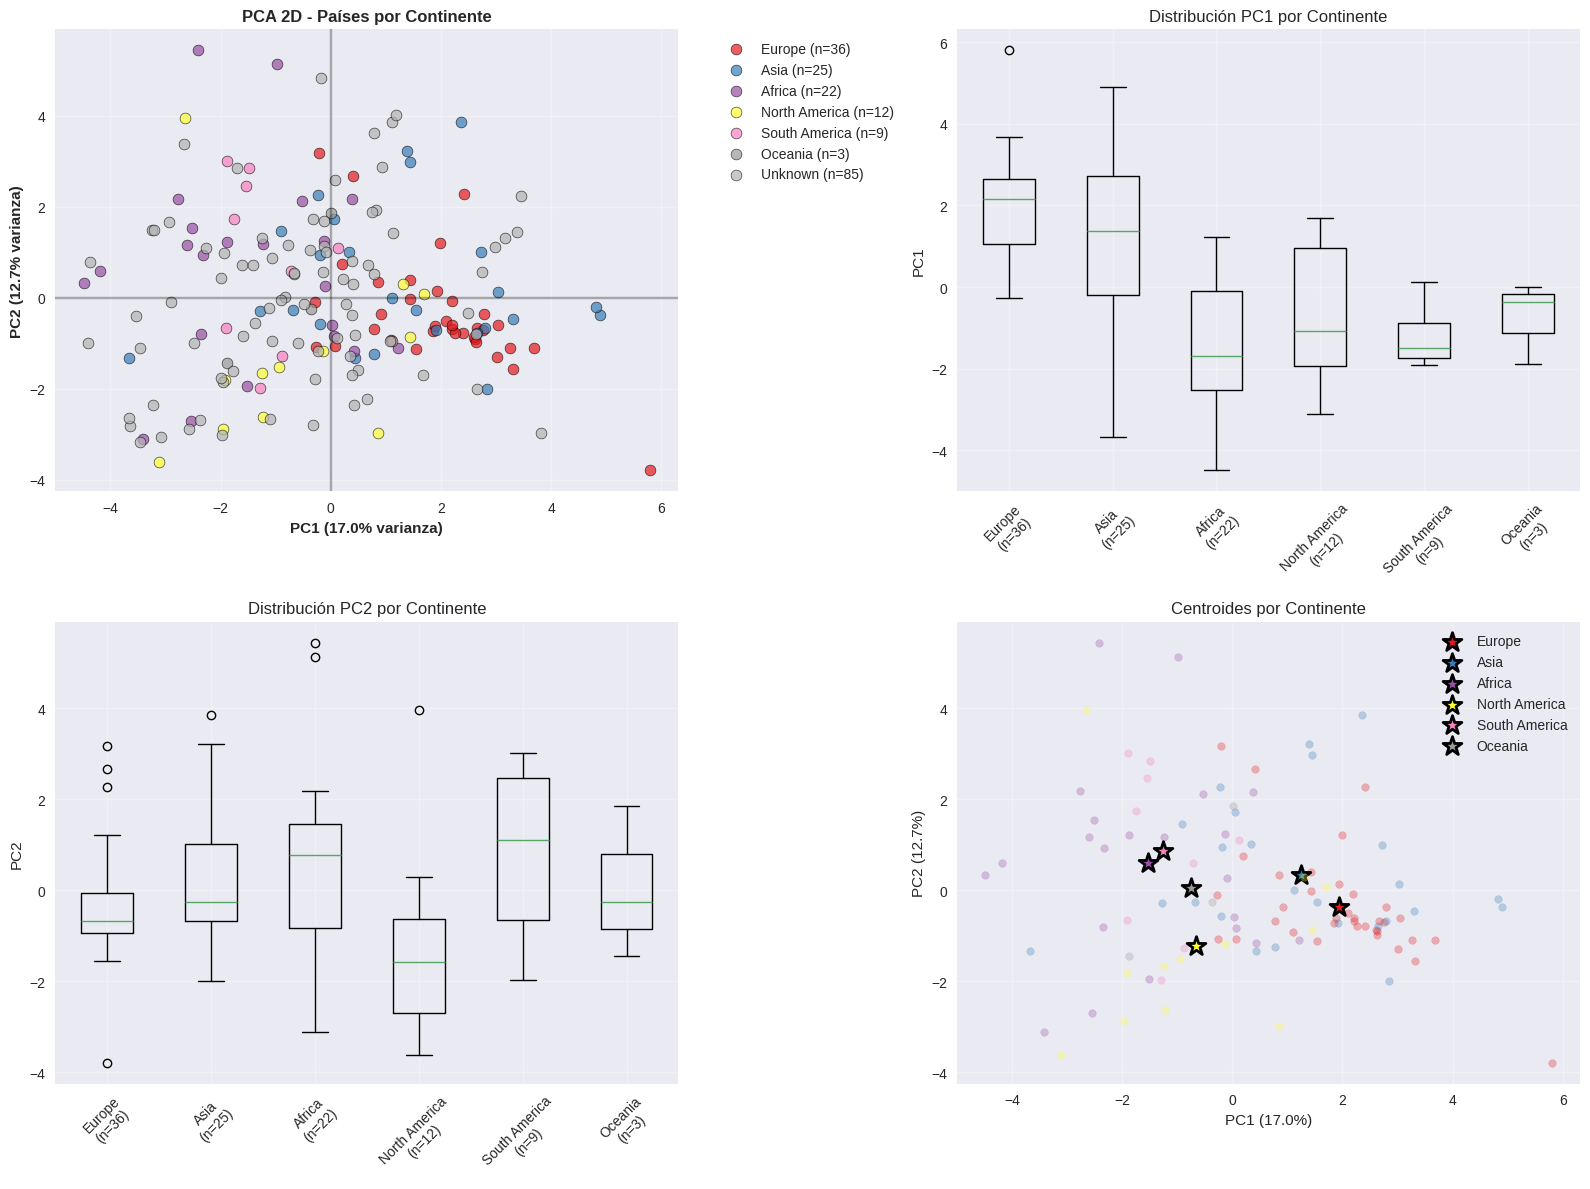


PASO 7: Analizando variables más importantes...
Variables más influyentes en PC1:
  • High-technology exports (% of manufactured exports...: +0.354
  • High-technology exports (% of manufactured exports...: +0.327
  • Food exports (% of merchandise exports)_sqrt: -0.311

Variables más influyentes en PC2:
  • Transport services (% of commercial service export...: +0.388
  • Transport services (% of commercial service export...: +0.386
  • Ores and metals exports (% of merchandise exports)...: +0.326

PASO 8: Análisis de observaciones...
QUÉ SE OBSERVA EN LA VISUALIZACIÓN

📊 SEPARACIÓN ENTRE CONTINENTES:
Distancias entre centroides (menor = más similar económicamente):
  • Africa ↔ South America: 0.387
  • South America ↔ Oceania: 0.964
  • Africa ↔ Oceania: 0.964
  • Europe ↔ Asia: 0.968
  • North America ↔ Oceania: 1.292

🎯 COHESIÓN INTERNA POR CONTINENTE:
  • Europe: Media (dispersión: 1.363)
  • Asia: Baja (dispersión: 2.213)
  • Africa: Baja (dispersión: 2.317)
  • North America: B

In [95]:
print("PREGUNTA 2.13 - PCA 2D CON VISUALIZACIÓN POR CONTINENTES")
print("="*70)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# PASO 1: Usar el diccionario de continentes ya definido
country_continent_mapping = {
    'Albania': 'Europe', 'Argentina': 'South America', 'Armenia': 'Asia',
    'Aruba': 'North America', 'Australia': 'Oceania', 'Austria': 'Europe',
    'Azerbaijan': 'Asia', 'Bahrain': 'Asia', 'Belgium': 'Europe',
    'Belize': 'North America', 'Bolivia': 'South America', 'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa', 'Brazil': 'South America', 'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Cabo Verde': 'Africa',
    'Canada': 'North America', 'Chile': 'South America', 'China': 'Asia',
    'Colombia': 'South America', 'Congo Dem. Rep.': 'Africa', 'Costa Rica': 'North America',
    'Croatia': 'Europe', 'Cyprus': 'Asia', 'Czechia': 'Europe',
    'Denmark': 'Europe', 'Dominican Republic': 'North America', 'Ecuador': 'South America',
    'Egypt': 'Africa', 'El Salvador': 'North America', 'Estonia': 'Europe',
    'Ethiopia': 'Africa', 'Finland': 'Europe', 'France': 'Europe',
    'Gambia': 'Africa', 'Georgia': 'Asia', 'Germany': 'Europe',
    'Ghana': 'Africa', 'Greece': 'Europe', 'Guatemala': 'North America',
    'Honduras': 'North America', 'Hong Kong': 'Asia', 'Hungary': 'Europe',
    'Iceland': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia',
    'Ireland': 'Europe', 'Italy': 'Europe', 'Japan': 'Asia',
    'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa',
    'Korea Rep.': 'Asia', 'Latvia': 'Europe', 'Lesotho': 'Africa',
    'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Macao': 'Asia',
    'Malaysia': 'Asia', 'Malta': 'Europe', 'Mauritania': 'Africa',
    'Mauritius': 'Africa', 'Mexico': 'North America', 'Moldova': 'Europe',
    'Montenegro': 'Europe', 'Morocco': 'Africa', 'Mozambique': 'Africa',
    'Namibia': 'Africa', 'Netherlands': 'Europe', 'New Zealand': 'Oceania',
    'Nicaragua': 'North America', 'Niger': 'Africa', 'North Macedonia': 'Europe',
    'Norway': 'Europe', 'Pakistan': 'Asia', 'Panama': 'North America',
    'Paraguay': 'South America', 'Peru': 'South America', 'Philippines': 'Asia',
    'Poland': 'Europe', 'Portugal': 'Europe', 'Romania': 'Europe',
    'Samoa': 'Oceania', 'Saudi Arabia': 'Asia', 'Senegal': 'Africa',
    'Singapore': 'Asia', 'Slovak Republic': 'Europe', 'Slovenia': 'Europe',
    'South Africa': 'Africa', 'Spain': 'Europe', 'Sri Lanka': 'Asia',
    'Sweden': 'Europe', 'Switzerland': 'Europe', 'Tanzania': 'Africa',
    'Thailand': 'Asia', 'Timor-Leste': 'Asia', 'Tunisia': 'Africa',
    'Turkiye': 'Asia', 'Uganda': 'Africa', 'Ukraine': 'Europe',
    'United Kingdom': 'Europe', 'United States': 'North America', 'Uruguay': 'South America',
    'Uzbekistan': 'Asia', 'Zambia': 'Africa'
}

# PASO 2: Preparar datos para PCA
print("PASO 1: Preparando datos para PCA...")

# Verificar que tenemos el dataset escalado
try:
    all_features = [col for col in df_features_final.columns if col != 'Country Name']
    X_all_features = df_features_final[all_features].copy()
    countries_list = df_features_final['Country Name'].values
    print(f"✓ Dataset encontrado: {X_all_features.shape}")
except NameError:
    print("❌ Error: df_features_final no encontrado. Ejecuta las preguntas anteriores.")
    raise

# Limpiar datos si es necesario
if X_all_features.isnull().sum().sum() > 0:
    print("Imputando valores faltantes...")
    X_all_features = X_all_features.fillna(X_all_features.median())

print(f"Variables disponibles: {len(all_features)}")
print(f"Países: {len(countries_list)}")

# PASO 3: Mapear países a continentes
print("\nPASO 2: Mapeando países a continentes...")

def map_country_to_continent(country_name):
    return country_continent_mapping.get(country_name, 'Unknown')

# Crear DataFrame base con continentes
countries_continents = []
for country in countries_list:
    continent = map_country_to_continent(country)
    countries_continents.append(continent)

# Verificar mapeo
mapped_count = sum(1 for c in countries_continents if c != 'Unknown')
unmapped_count = sum(1 for c in countries_continents if c == 'Unknown')

print(f"Países mapeados: {mapped_count}/{len(countries_list)} ({mapped_count/len(countries_list)*100:.1f}%)")
print(f"Países no mapeados: {unmapped_count}")

if unmapped_count > 0:
    unmapped_countries = [countries_list[i] for i, c in enumerate(countries_continents) if c == 'Unknown']
    print("Países no mapeados:", unmapped_countries[:5])

# PASO 4: Aplicar PCA con 2 componentes
print("\nPASO 3: Aplicando PCA con 2 componentes...")

# Crear y aplicar PCA
pca_2d_model = PCA(n_components=2, random_state=42)
X_pca_2d_data = pca_2d_model.fit_transform(X_all_features)

# Información sobre varianza explicada
explained_variance_2d = pca_2d_model.explained_variance_ratio_
total_variance_2d = np.sum(explained_variance_2d)

print(f"✓ PCA aplicado exitosamente")
print(f"Varianza explicada:")
print(f"  PC1: {explained_variance_2d[0]:.3f} ({explained_variance_2d[0]*100:.1f}%)")
print(f"  PC2: {explained_variance_2d[1]:.3f} ({explained_variance_2d[1]*100:.1f}%)")
print(f"  Total: {total_variance_2d:.3f} ({total_variance_2d*100:.1f}%)")

# PASO 5: Crear DataFrame completo para visualización
print("\nPASO 4: Creando DataFrame para visualización...")

# Crear DataFrame completo
pca_continents_df = pd.DataFrame({
    'PC1': X_pca_2d_data[:, 0],
    'PC2': X_pca_2d_data[:, 1],
    'Country Name': countries_list,
    'Continent': countries_continents
})

print(f"✓ DataFrame creado: {pca_continents_df.shape}")

# Estadísticas por continente
continent_stats = pca_continents_df['Continent'].value_counts()
print(f"\nDistribución por continente:")
for continent, count in continent_stats.items():
    percentage = (count / len(pca_continents_df)) * 100
    print(f"  {continent}: {count} países ({percentage:.1f}%)")

# PASO 6: Crear paleta de colores para continentes
print("\nPASO 5: Creando paleta de colores...")

continents_list = [cont for cont in continent_stats.index if cont != 'Unknown']
colors_array = plt.cm.Set1(np.linspace(0, 1, len(continents_list)))
continent_color_dict = dict(zip(continents_list, colors_array))

# Añadir color gris para países no mapeados
if 'Unknown' in continent_stats.index:
    continent_color_dict['Unknown'] = [0.7, 0.7, 0.7, 1.0]

print(f"✓ Colores asignados a {len(continent_color_dict)} continentes")

# PASO 7: Crear visualización
print("\nPASO 6: Creando visualización...")

# Crear figura con múltiples visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Scatterplot principal por continentes
ax1 = axes[0, 0]

for continent in continent_color_dict.keys():
    continent_data = pca_continents_df[pca_continents_df['Continent'] == continent]

    if len(continent_data) > 0:
        ax1.scatter(continent_data['PC1'], continent_data['PC2'],
                    c=[continent_color_dict[continent]],
                    label=f'{continent} (n={len(continent_data)})',
                    alpha=0.7, s=60, edgecolors='black', linewidth=0.5)

ax1.set_xlabel(f'PC1 ({explained_variance_2d[0]*100:.1f}% varianza)', fontweight='bold')
ax1.set_ylabel(f'PC2 ({explained_variance_2d[1]*100:.1f}% varianza)', fontweight='bold')
ax1.set_title('PCA 2D - Países por Continente', fontweight='bold')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# 2. Distribución PC1 por continente
ax2 = axes[0, 1]

continents_mapped = [cont for cont in continent_stats.index if cont != 'Unknown']
pc1_data = []
continent_labels = []

for continent in continents_mapped:
    continent_data = pca_continents_df[pca_continents_df['Continent'] == continent]
    if len(continent_data) > 0:
        pc1_data.append(continent_data['PC1'].values)
        continent_labels.append(f'{continent}\n(n={len(continent_data)})')

if pc1_data:
    ax2.boxplot(pc1_data, labels=continent_labels)
    ax2.set_ylabel('PC1')
    ax2.set_title('Distribución PC1 por Continente')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3)

# 3. Distribución PC2 por continente
ax3 = axes[1, 0]

pc2_data = []
for continent in continents_mapped:
    continent_data = pca_continents_df[pca_continents_df['Continent'] == continent]
    if len(continent_data) > 0:
        pc2_data.append(continent_data['PC2'].values)

if pc2_data:
    ax3.boxplot(pc2_data, labels=continent_labels)
    ax3.set_ylabel('PC2')
    ax3.set_title('Distribución PC2 por Continente')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(True, alpha=0.3)

# 4. Centroides por continente
ax4 = axes[1, 1]

# Calcular centroides
centroids_continents = pca_continents_df.groupby('Continent')[['PC1', 'PC2']].mean()

for continent in continents_mapped:
    if continent in centroids_continents.index:
        # Plotear países del continente (transparentes)
        continent_data = pca_continents_df[pca_continents_df['Continent'] == continent]
        ax4.scatter(continent_data['PC1'], continent_data['PC2'],
                   c=[continent_color_dict[continent]], alpha=0.3, s=30)

        # Plotear centroide
        centroid = centroids_continents.loc[continent]
        ax4.scatter(centroid['PC1'], centroid['PC2'],
                   c=[continent_color_dict[continent]], s=200, marker='*',
                   edgecolors='black', linewidth=2, label=continent)

ax4.set_xlabel(f'PC1 ({explained_variance_2d[0]*100:.1f}%)')
ax4.set_ylabel(f'PC2 ({explained_variance_2d[1]*100:.1f}%)')
ax4.set_title('Centroides por Continente')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PASO 8: Análisis de loadings (variables más importantes)
print("\nPASO 7: Analizando variables más importantes...")

# Obtener loadings
loadings_2d = pca_2d_model.components_.T
loadings_2d_df = pd.DataFrame(loadings_2d, columns=['PC1', 'PC2'], index=all_features)

print("Variables más influyentes en PC1:")
pc1_top = loadings_2d_df['PC1'].abs().nlargest(3)
for var, _ in pc1_top.items():
    actual_loading = loadings_2d_df.loc[var, 'PC1']
    print(f"  • {var[:50]}{'...' if len(var) > 50 else ''}: {actual_loading:+.3f}")

print("\nVariables más influyentes en PC2:")
pc2_top = loadings_2d_df['PC2'].abs().nlargest(3)
for var, _ in pc2_top.items():
    actual_loading = loadings_2d_df.loc[var, 'PC2']
    print(f"  • {var[:50]}{'...' if len(var) > 50 else ''}: {actual_loading:+.3f}")

# PASO 9: Análisis de observaciones
print("\nPASO 8: Análisis de observaciones...")

print("="*60)
print("QUÉ SE OBSERVA EN LA VISUALIZACIÓN")
print("="*60)

# Calcular distancias entre centroides de continentes
print("\n📊 SEPARACIÓN ENTRE CONTINENTES:")
continent_distances = {}

for i, cont1 in enumerate(continents_mapped):
    for cont2 in continents_mapped[i+1:]:
        if cont1 in centroids_continents.index and cont2 in centroids_continents.index:
            centroid1 = centroids_continents.loc[cont1]
            centroid2 = centroids_continents.loc[cont2]

            distance = np.sqrt((centroid1['PC1'] - centroid2['PC1'])**2 +
                             (centroid1['PC2'] - centroid2['PC2'])**2)
            continent_distances[(cont1, cont2)] = distance

# Mostrar distancias ordenadas
sorted_distances = sorted(continent_distances.items(), key=lambda x: x[1])
print("Distancias entre centroides (menor = más similar económicamente):")
for (cont1, cont2), distance in sorted_distances[:5]:
    print(f"  • {cont1} ↔ {cont2}: {distance:.3f}")

# Análisis de cohesión interna
print(f"\n🎯 COHESIÓN INTERNA POR CONTINENTE:")
for continent in continents_mapped:
    continent_data = pca_continents_df[pca_continents_df['Continent'] == continent]

    if len(continent_data) > 1 and continent in centroids_continents.index:
        centroid = centroids_continents.loc[continent]

        # Calcular distancias al centroide
        distances = []
        for _, country in continent_data.iterrows():
            dist = np.sqrt((country['PC1'] - centroid['PC1'])**2 +
                          (country['PC2'] - centroid['PC2'])**2)
            distances.append(dist)

        avg_distance = np.mean(distances)

        if avg_distance < 1.0:
            cohesion = "Alta"
        elif avg_distance < 2.0:
            cohesion = "Media"
        else:
            cohesion = "Baja"

        print(f"  • {continent}: {cohesion} (dispersión: {avg_distance:.3f})")

# PASO 10: Guardar todas las variables necesarias para pregunta 2.14
print("\nPASO 9: Guardando variables para pregunta 2.14...")

# Crear diccionario con TODAS las variables necesarias
pca_continent_results_complete = {
    'pca_model': pca_2d_model,            # Modelo PCA entrenado
    'pca_data': X_pca_2d_data,            # Datos transformados por PCA
    'dataframe': pca_continents_df,       # DataFrame completo
    'centroids': centroids_continents,    # Centroides por continente
    'loadings': loadings_2d_df,           # Loadings de variables
    'explained_variance': explained_variance_2d,  # Varianza explicada
    'continent_colors': continent_color_dict,     # Colores por continente
    'all_features': all_features,         # Lista de features usadas
    'X_all_features': X_all_features      # Datos originales escalados
}

print(f"✓ Variables guardadas:")
print(f"  - pca_model: Modelo PCA entrenado")
print(f"  - pca_data: Datos PCA ({X_pca_2d_data.shape})")
print(f"  - dataframe: DataFrame completo ({pca_continents_df.shape})")
print(f"  - loadings: Loadings de variables ({loadings_2d_df.shape})")
print(f"  - explained_variance: {explained_variance_2d}")
print(f"  - continent_colors: {len(continent_color_dict)} colores")

print(f"\n✅ Pregunta 2.13 completada exitosamente")
print(f"✅ {mapped_count} países mapeados a continentes")
print(f"✅ PCA aplicado con {total_variance_2d*100:.1f}% de varianza explicada")
print(f"✅ Visualización creada mostrando agrupación por continentes")
print(f"✅ Todas las variables necesarias guardadas para pregunta 2.14")

# CONCLUSIONES PRINCIPALES
print(f"\n" + "="*60)
print("CONCLUSIONES DE LA PREGUNTA 2.13")
print("="*60)

# Evaluar agrupamiento geográfico
cohesion_scores = []
for continent in continents_mapped:
    continent_data = pca_continents_df[pca_continents_df['Continent'] == continent]
    if len(continent_data) > 1 and continent in centroids_continents.index:
        centroid = centroids_continents.loc[continent]
        distances = []
        for _, row in continent_data.iterrows():
            dist = np.sqrt((row['PC1'] - centroid['PC1'])**2 + (row['PC2'] - centroid['PC2'])**2)
            distances.append(dist)
        cohesion_scores.append(np.mean(distances))

avg_cohesion = np.mean(cohesion_scores) if cohesion_scores else float('inf')

if avg_cohesion < 1.5:
    clustering_strength = "FUERTE"
elif avg_cohesion < 2.5:
    clustering_strength = "MODERADO"
else:
    clustering_strength = "DÉBIL"

print(f"🔍 AGRUPAMIENTO GEOGRÁFICO: {clustering_strength}")
print(f"   • Los países {'se agrupan claramente' if clustering_strength == 'FUERTE' else 'muestran cierta tendencia a agruparse' if clustering_strength == 'MODERADO' else 'no se agrupan consistentemente'} por continente")

print(f"\n📊 VARIANZA EXPLICADA: {total_variance_2d*100:.1f}%")
if total_variance_2d > 0.6:
    print("   • Los dos primeros componentes capturan bien la variabilidad económica")
elif total_variance_2d > 0.4:
    print("   • Captura moderada pero aceptable para visualización")
else:
    print("   • Baja captura de variabilidad, se pierde información importante")

print(f"\n💼 IMPLICACIONES PARA GUERRA COMERCIAL:")
if clustering_strength == "FUERTE":
    print("   • Probable formación de bloques comerciales regionales")
    print("   • Las alianzas geográficas serían económicamente coherentes")
elif clustering_strength == "MODERADO":
    print("   • Posible formación de bloques mixtos geográfico-económicos")
    print("   • Algunas alianzas trascienden fronteras regionales")
else:
    print("   • Bloques comerciales basados en características económicas, no geografía")
    print("   • Alianzas globales más probables que regionales")

---

1.	Gráfico superior izquierdo (PCA 2D):
	•	Europa y Asia están principalmente agrupados en la zona derecha del eje PC1 → esto confirma que estos continentes tienen economías más sofisticadas en exportaciones (alta PC1).
	•	África aparece más dispersa y concentrada con valores más bajos tanto en PC1 como en PC2 → evidencia una menor especialización o desarrollo exportador.
	•	América del Sur se ubica en el cuadrante inferior izquierdo, con menor PC1 y algo mayor PC2, lo cual refleja su orientación hacia exportaciones de recursos naturales y alimentos.
	•	Oceanía y Norteamérica tienen pocos países pero sus centroides son visibles y coherentes con la narrativa.
2.	Gráficos de caja (superior derecho e inferior izquierdo):
	•	Europa tiene mediana y rango intercuartil de PC1 más alto que los demás → lo que coincide con la interpretación de exportaciones sofisticadas.
	•	África y Sudamérica tienen mediana de PC1 y PC2 más baja o dispersa, mostrando menor sofisticación o especialización más tradicional.
3.	Gráfico inferior derecho (centroides por continente):
	•	Reafirma las agrupaciones continentales por perfil económico: los centroides no están completamente solapados, y hay diferencias claras entre Europa, Asia, América Latina y África.
	•	Muestra que la geografía sigue siendo un fuerte determinante del perfil exportador.

---

### Pregunta 2.14

Genera el mismo gráfico anterior, pero ahora coloree los puntos del scatterplot usando los clusters de un KMeans de 3 clústers y `random_state=42`. Describa los clusters según el gráfico.



PREGUNTA 2.14 - PCA 2D CON K-MEANS CLUSTERING (k=3)
PASO 1: Verificando datos de pregunta 2.13...
✓ Datos de pregunta 2.13 encontrados
✓ Datos PCA: (192, 2)
✓ DataFrame: (192, 4)
Varianza explicada: PC1=17.0%, PC2=12.7%
Total de países: 192

PASO 2: Aplicando K-means con k=3...
✓ K-means aplicado exitosamente
Métricas del clustering:
  • Inercia: 551.33
  • Silhouette Score: 0.398

Distribución de países por cluster:
  Cluster 0: 76 países (39.6%)
  Cluster 1: 47 países (24.5%)
  Cluster 2: 69 países (35.9%)

PASO 3: Preparando datos para visualización...
✓ DataFrame preparado: (192, 5)

Centroides de clusters:
             PC1    PC2
Cluster_0  1.913 -0.618
Cluster_1 -2.116 -1.574
Cluster_2 -0.665  1.753

PASO 4: Creando visualización...


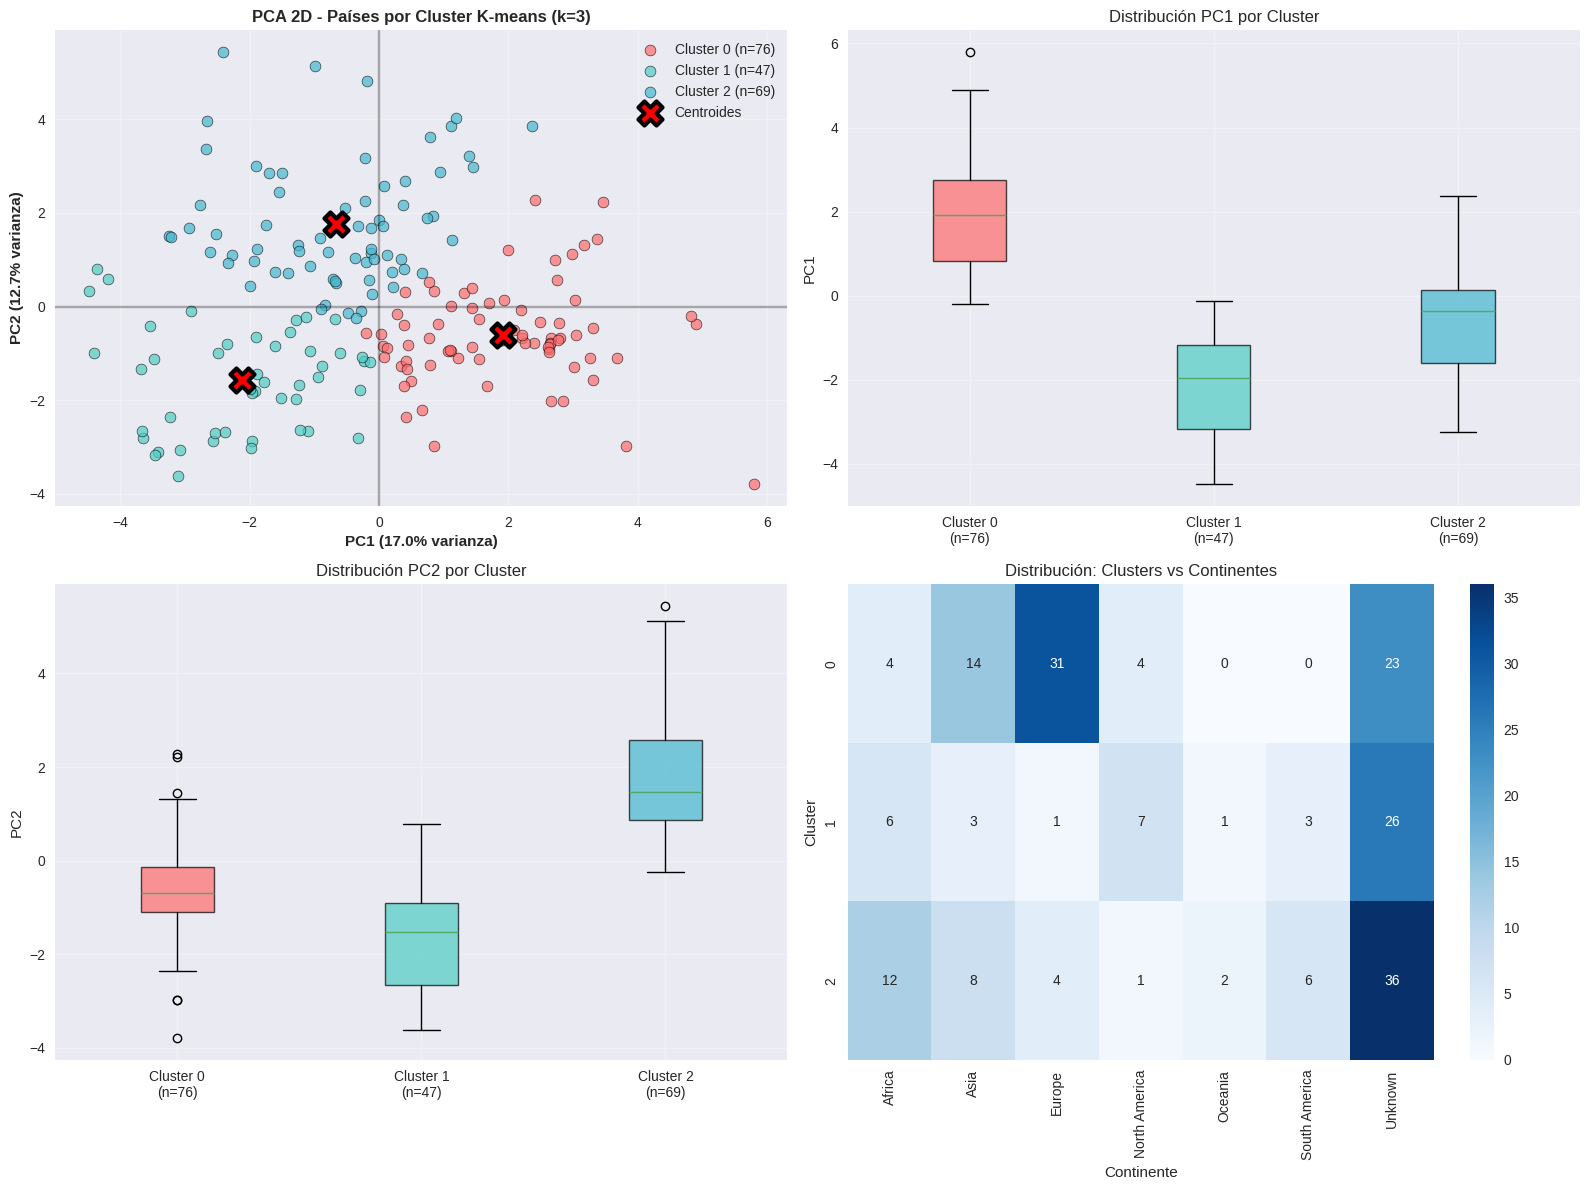


PASO 5: Análisis detallado de los clusters...
DESCRIPCIÓN DE LOS CLUSTERS SEGÚN EL GRÁFICO

🔸 CLUSTER 0:
   Número de países: 76
   Centroide: PC1=1.913, PC2=-0.618
   Posición en espacio PCA:
     • PC1: Alto (+1.913)
     • PC2: Bajo (-0.618)
   Cohesión interna: Media
     • Dispersión PC1: 1.262
     • Dispersión PC2: 1.048
   Composición geográfica:
     • Continente dominante: Europe (40.8%)
     • Distribución completa:
       - Europe: 31 países (40.8%)
       - Unknown: 23 países (30.3%)
       - Asia: 14 países (18.4%)
   Países representativos:
     • Andorra              • Angola
     • Armenia              • Austria
     • Belarus              • Belgium
     • Bermuda              • Bosnia and Herzegovina

🔸 CLUSTER 1:
   Número de países: 47
   Centroide: PC1=-2.116, PC2=-1.574
   Posición en espacio PCA:
     • PC1: Bajo (-2.116)
     • PC2: Bajo (-1.574)
   Cohesión interna: Media
     • Dispersión PC1: 1.246
     • Dispersión PC2: 1.094
   Composición geográfica:
    

In [96]:
print("PREGUNTA 2.14 - PCA 2D CON K-MEANS CLUSTERING (k=3)")
print("="*65)

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# PASO 1: Verificar y cargar datos de la pregunta 2.13
print("PASO 1: Verificando datos de pregunta 2.13...")

try:
    # Intentar usar las variables de la pregunta 2.13
    X_pca_2d_data = pca_continent_results_complete['pca_data']
    pca_2d_model = pca_continent_results_complete['pca_model']
    explained_variance_2d = pca_continent_results_complete['explained_variance']
    pca_continents_df = pca_continent_results_complete['dataframe']
    loadings_2d_df = pca_continent_results_complete['loadings']

    print(f"✓ Datos de pregunta 2.13 encontrados")
    print(f"✓ Datos PCA: {X_pca_2d_data.shape}")
    print(f"✓ DataFrame: {pca_continents_df.shape}")

except (NameError, KeyError):
    print("⚠  Datos de pregunta 2.13 no encontrados. Recalculando...")

    # Recalcular si es necesario
    try:
        all_features = [col for col in df_features_final.columns if col != 'Country Name']
        X_all_features = df_features_final[all_features].copy()
        countries_list = df_features_final['Country Name'].values

        if X_all_features.isnull().sum().sum() > 0:
            X_all_features = X_all_features.fillna(X_all_features.median())

        # Aplicar PCA
        pca_2d_model = PCA(n_components=2, random_state=42)
        X_pca_2d_data = pca_2d_model.fit_transform(X_all_features)
        explained_variance_2d = pca_2d_model.explained_variance_ratio_

        # Mapear continentes
        country_continent_mapping = {
            'Albania': 'Europe', 'Argentina': 'South America', 'Armenia': 'Asia',
            'Aruba': 'North America', 'Australia': 'Oceania', 'Austria': 'Europe',
            'Azerbaijan': 'Asia', 'Bahrain': 'Asia', 'Belgium': 'Europe',
            'Belize': 'North America', 'Bolivia': 'South America', 'Bosnia and Herzegovina': 'Europe',
            'Botswana': 'Africa', 'Brazil': 'South America', 'Brunei Darussalam': 'Asia',
            'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Cabo Verde': 'Africa',
            'Canada': 'North America', 'Chile': 'South America', 'China': 'Asia',
            'Colombia': 'South America', 'Congo Dem. Rep.': 'Africa', 'Costa Rica': 'North America',
            'Croatia': 'Europe', 'Cyprus': 'Asia', 'Czechia': 'Europe',
            'Denmark': 'Europe', 'Dominican Republic': 'North America', 'Ecuador': 'South America',
            'Egypt': 'Africa', 'El Salvador': 'North America', 'Estonia': 'Europe',
            'Ethiopia': 'Africa', 'Finland': 'Europe', 'France': 'Europe',
            'Gambia': 'Africa', 'Georgia': 'Asia', 'Germany': 'Europe',
            'Ghana': 'Africa', 'Greece': 'Europe', 'Guatemala': 'North America',
            'Honduras': 'North America', 'Hong Kong': 'Asia', 'Hungary': 'Europe',
            'Iceland': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia',
            'Ireland': 'Europe', 'Italy': 'Europe', 'Japan': 'Asia',
            'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa',
            'Korea Rep.': 'Asia', 'Latvia': 'Europe', 'Lesotho': 'Africa',
            'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Macao': 'Asia',
            'Malaysia': 'Asia', 'Malta': 'Europe', 'Mauritania': 'Africa',
            'Mauritius': 'Africa', 'Mexico': 'North America', 'Moldova': 'Europe',
            'Montenegro': 'Europe', 'Morocco': 'Africa', 'Mozambique': 'Africa',
            'Namibia': 'Africa', 'Netherlands': 'Europe', 'New Zealand': 'Oceania',
            'Nicaragua': 'North America', 'Niger': 'Africa', 'North Macedonia': 'Europe',
            'Norway': 'Europe', 'Pakistan': 'Asia', 'Panama': 'North America',
            'Paraguay': 'South America', 'Peru': 'South America', 'Philippines': 'Asia',
            'Poland': 'Europe', 'Portugal': 'Europe', 'Romania': 'Europe',
            'Samoa': 'Oceania', 'Saudi Arabia': 'Asia', 'Senegal': 'Africa',
            'Singapore': 'Asia', 'Slovak Republic': 'Europe', 'Slovenia': 'Europe',
            'South Africa': 'Africa', 'Spain': 'Europe', 'Sri Lanka': 'Asia',
            'Sweden': 'Europe', 'Switzerland': 'Europe', 'Tanzania': 'Africa',
            'Thailand': 'Asia', 'Timor-Leste': 'Asia', 'Tunisia': 'Africa',
            'Turkiye': 'Asia', 'Uganda': 'Africa', 'Ukraine': 'Europe',
            'United Kingdom': 'Europe', 'United States': 'North America', 'Uruguay': 'South America',
            'Uzbekistan': 'Asia', 'Zambia': 'Africa'
        }

        countries_continents = [country_continent_mapping.get(country, 'Unknown') for country in countries_list]

        # Crear DataFrame
        pca_continents_df = pd.DataFrame({
            'PC1': X_pca_2d_data[:, 0],
            'PC2': X_pca_2d_data[:, 1],
            'Country Name': countries_list,
            'Continent': countries_continents
        })

        # Crear loadings
        loadings_2d = pca_2d_model.components_.T
        loadings_2d_df = pd.DataFrame(loadings_2d, columns=['PC1', 'PC2'], index=all_features)

        print(f"✓ Datos recalculados exitosamente")

    except NameError:
        print("❌ Error: df_features_final no encontrado. Ejecuta las preguntas anteriores.")
        raise

print(f"Varianza explicada: PC1={explained_variance_2d[0]*100:.1f}%, PC2={explained_variance_2d[1]*100:.1f}%")
print(f"Total de países: {len(pca_continents_df)}")

# PASO 2: Aplicar K-means con k=3 y random_state=42
print("\nPASO 2: Aplicando K-means con k=3...")

# Crear y entrenar K-means según especificaciones de la pregunta
kmeans_3_clusters = KMeans(
    n_clusters=3,
    random_state=42,  # Según especificación de la pregunta
    n_init=20,
    max_iter=300
)

# Entrenar sobre los componentes principales
cluster_labels_3 = kmeans_3_clusters.fit_predict(X_pca_2d_data)

# Calcular métricas
inertia_3 = kmeans_3_clusters.inertia_
silhouette_3 = silhouette_score(X_pca_2d_data, cluster_labels_3)

print(f"✓ K-means aplicado exitosamente")
print(f"Métricas del clustering:")
print(f"  • Inercia: {inertia_3:.2f}")
print(f"  • Silhouette Score: {silhouette_3:.3f}")

# Distribución de clusters
cluster_counts = pd.Series(cluster_labels_3).value_counts().sort_index()
print(f"\nDistribución de países por cluster:")
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(cluster_labels_3)) * 100
    print(f"  Cluster {cluster_id}: {count} países ({percentage:.1f}%)")

# PASO 3: Crear DataFrame con información completa
print("\nPASO 3: Preparando datos para visualización...")

# Agregar clusters al DataFrame existente
cluster_df = pca_continents_df.copy()
cluster_df['Cluster'] = cluster_labels_3

# Calcular centroides de clusters
centroids_clusters = kmeans_3_clusters.cluster_centers_
centroids_df = pd.DataFrame(centroids_clusters,
                           columns=['PC1', 'PC2'],
                           index=[f'Cluster_{i}' for i in range(3)])

print(f"✓ DataFrame preparado: {cluster_df.shape}")
print(f"\nCentroides de clusters:")
print(centroids_df.round(3))

# PASO 4: Crear visualización principal
print("\nPASO 4: Creando visualización...")

# Configurar colores para clusters (colores distintivos)
cluster_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Rojo, Verde-azul, Azul
cluster_color_map = {i: cluster_colors[i] for i in range(3)}

# Crear figura con múltiples visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Scatterplot principal por clusters
ax1 = axes[0, 0]

for cluster_id in range(3):
    cluster_data = cluster_df[cluster_df['Cluster'] == cluster_id]

    ax1.scatter(cluster_data['PC1'], cluster_data['PC2'],
                c=cluster_colors[cluster_id],
                label=f'Cluster {cluster_id} (n={len(cluster_data)})',
                alpha=0.7, s=60, edgecolors='black', linewidth=0.5)

# Añadir centroides
ax1.scatter(centroids_clusters[:, 0], centroids_clusters[:, 1],
            c='red', marker='X', s=300, linewidths=3,
            edgecolors='black', label='Centroides')

ax1.set_xlabel(f'PC1 ({explained_variance_2d[0]*100:.1f}% varianza)', fontweight='bold')
ax1.set_ylabel(f'PC2 ({explained_variance_2d[1]*100:.1f}% varianza)', fontweight='bold')
ax1.set_title('PCA 2D - Países por Cluster K-means (k=3)', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# 2. Distribución PC1 por cluster
ax2 = axes[0, 1]

pc1_data_by_cluster = []
cluster_labels_plot = []

for cluster_id in range(3):
    cluster_data = cluster_df[cluster_df['Cluster'] == cluster_id]
    if len(cluster_data) > 0:
        pc1_data_by_cluster.append(cluster_data['PC1'].values)
        cluster_labels_plot.append(f'Cluster {cluster_id}\n(n={len(cluster_data)})')

bp1 = ax2.boxplot(pc1_data_by_cluster, labels=cluster_labels_plot, patch_artist=True)
for patch, color in zip(bp1['boxes'], cluster_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_ylabel('PC1')
ax2.set_title('Distribución PC1 por Cluster')
ax2.grid(True, alpha=0.3)

# 3. Distribución PC2 por cluster
ax3 = axes[1, 0]

pc2_data_by_cluster = []
for cluster_id in range(3):
    cluster_data = cluster_df[cluster_df['Cluster'] == cluster_id]
    if len(cluster_data) > 0:
        pc2_data_by_cluster.append(cluster_data['PC2'].values)

bp2 = ax3.boxplot(pc2_data_by_cluster, labels=cluster_labels_plot, patch_artist=True)
for patch, color in zip(bp2['boxes'], cluster_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax3.set_ylabel('PC2')
ax3.set_title('Distribución PC2 por Cluster')
ax3.grid(True, alpha=0.3)

# 4. Comparación: Clusters vs Continentes
ax4 = axes[1, 1]

# Crear tabla de contingencia
contingency_table = pd.crosstab(cluster_df['Cluster'], cluster_df['Continent'])

# Heatmap de la tabla de contingencia
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', ax=ax4)
ax4.set_title('Distribución: Clusters vs Continentes')
ax4.set_xlabel('Continente')
ax4.set_ylabel('Cluster')

plt.tight_layout()
plt.show()

# PASO 5: Análisis detallado de los clusters
print("\nPASO 5: Análisis detallado de los clusters...")

print("="*60)
print("DESCRIPCIÓN DE LOS CLUSTERS SEGÚN EL GRÁFICO")
print("="*60)

# Analizar cada cluster individualmente
for cluster_id in range(3):
    print(f"\n🔸 CLUSTER {cluster_id}:")

    # Datos del cluster
    cluster_data = cluster_df[cluster_df['Cluster'] == cluster_id]
    cluster_centroid = centroids_df.loc[f'Cluster_{cluster_id}']

    print(f"   Número de países: {len(cluster_data)}")
    print(f"   Centroide: PC1={cluster_centroid['PC1']:.3f}, PC2={cluster_centroid['PC2']:.3f}")

    # Posición relativa del cluster
    pc1_pos = "Alto" if cluster_centroid['PC1'] > 0.5 else "Bajo" if cluster_centroid['PC1'] < -0.5 else "Medio"
    pc2_pos = "Alto" if cluster_centroid['PC2'] > 0.5 else "Bajo" if cluster_centroid['PC2'] < -0.5 else "Medio"

    print(f"   Posición en espacio PCA:")
    print(f"     • PC1: {pc1_pos} ({cluster_centroid['PC1']:+.3f})")
    print(f"     • PC2: {pc2_pos} ({cluster_centroid['PC2']:+.3f})")

    # Análisis de dispersión
    pc1_std = cluster_data['PC1'].std()
    pc2_std = cluster_data['PC2'].std()

    cohesion = "Alta" if (pc1_std < 1.0 and pc2_std < 1.0) else "Media" if (pc1_std < 2.0 and pc2_std < 2.0) else "Baja"
    print(f"   Cohesión interna: {cohesion}")
    print(f"     • Dispersión PC1: {pc1_std:.3f}")
    print(f"     • Dispersión PC2: {pc2_std:.3f}")

    # Distribución geográfica
    continent_dist = cluster_data['Continent'].value_counts()
    if len(continent_dist) > 0:
        dominant_continent = continent_dist.index[0]
        dominant_pct = (continent_dist.iloc[0] / len(cluster_data) * 100)

        print(f"   Composición geográfica:")
        print(f"     • Continente dominante: {dominant_continent} ({dominant_pct:.1f}%)")

        if len(continent_dist) > 1:
            print(f"     • Distribución completa:")
            for continent, count in continent_dist.head(3).items():
                pct = (count / len(cluster_data)) * 100
                print(f"       - {continent}: {count} países ({pct:.1f}%)")

    # Muestra de países representativos
    sample_countries = cluster_data['Country Name'].values[:8]
    print(f"   Países representativos:")
    for i in range(0, len(sample_countries), 2):
        if i+1 < len(sample_countries):
            print(f"     • {sample_countries[i]:<20} • {sample_countries[i+1]}")
        else:
            print(f"     • {sample_countries[i]}")

# PASO 6: Análisis comparativo entre clusters
print(f"\n" + "="*60)
print("ANÁLISIS COMPARATIVO ENTRE CLUSTERS")
print("="*60)

# Calcular distancias entre centroides
print("\n📊 SEPARACIÓN ENTRE CLUSTERS:")
cluster_distances = {}

for i in range(3):
    for j in range(i+1, 3):
        centroid_i = centroids_df.loc[f'Cluster_{i}']
        centroid_j = centroids_df.loc[f'Cluster_{j}']

        distance = np.sqrt((centroid_i['PC1'] - centroid_j['PC1'])**2 +
                          (centroid_i['PC2'] - centroid_j['PC2'])**2)
        cluster_distances[(i, j)] = distance

# Mostrar distancias
sorted_distances = sorted(cluster_distances.items(), key=lambda x: x[1])
print("Distancias entre centroides:")
for (c1, c2), distance in sorted_distances:
    if distance < 2.0:
        separation = "Cercanos"
    elif distance < 4.0:
        separation = "Moderadamente separados"
    else:
        separation = "Bien separados"
    print(f"  • Cluster {c1} ↔ Cluster {c2}: {distance:.3f} ({separation})")

# PASO 7: Interpretación económica usando loadings
print(f"\n" + "="*60)
print("INTERPRETACIÓN ECONÓMICA DE LOS CLUSTERS")
print("="*60)

print("Variables más influyentes en cada componente:")
print(f"\nPC1 (variables top 3):")
pc1_top = loadings_2d_df['PC1'].abs().nlargest(3)
for var, _ in pc1_top.items():
    actual_loading = loadings_2d_df.loc[var, 'PC1']
    print(f"  • {var[:45]}{'...' if len(var) > 45 else ''}: {actual_loading:+.3f}")

print(f"\nPC2 (variables top 3):")
pc2_top = loadings_2d_df['PC2'].abs().nlargest(3)
for var, _ in pc2_top.items():
    actual_loading = loadings_2d_df.loc[var, 'PC2']
    print(f"  • {var[:45]}{'...' if len(var) > 45 else ''}: {actual_loading:+.3f}")

# Interpretar clusters económicamente
print(f"\n💼 PERFILES ECONÓMICOS POR CLUSTER:")

for cluster_id in range(3):
    cluster_centroid = centroids_df.loc[f'Cluster_{cluster_id}']

    print(f"\n🔹 Cluster {cluster_id} - Perfil Económico:")

    # Interpretación basada en posición PC1 y PC2
    pc1_val = cluster_centroid['PC1']
    pc2_val = cluster_centroid['PC2']

    # Obtener características dominantes
    pc1_characteristics = []
    pc2_characteristics = []

    for var in pc1_top.index[:2]:
        loading = loadings_2d_df.loc[var, 'PC1']
        contribution = loading * pc1_val
        if abs(contribution) > 0.1:
            direction = "alta" if contribution > 0 else "baja"
            var_short = var.replace('exports', 'exp.').replace('merchandise', 'merc.')[:35]
            pc1_characteristics.append(f"{direction} {var_short}")

    for var in pc2_top.index[:2]:
        loading = loadings_2d_df.loc[var, 'PC2']
        contribution = loading * pc2_val
        if abs(contribution) > 0.1:
            direction = "alta" if contribution > 0 else "baja"
            var_short = var.replace('exports', 'exp.').replace('merchandise', 'merc.')[:35]
            pc2_characteristics.append(f"{direction} {var_short}")

    if pc1_characteristics:
        print(f"     • Caracterizado por: {'; '.join(pc1_characteristics[:2])}")
    if pc2_characteristics:
        print(f"     • También distinguido por: {'; '.join(pc2_characteristics[:2])}")

    # Especialización económica basada en magnitud
    total_magnitude = abs(pc1_val) + abs(pc2_val)
    if total_magnitude > 1.5:
        print(f"     • Perfil altamente especializado (magnitud: {total_magnitude:.2f})")
    elif total_magnitude > 1.0:
        print(f"     • Perfil moderadamente especializado (magnitud: {total_magnitude:.2f})")
    else:
        print(f"     • Perfil económico diversificado (magnitud: {total_magnitude:.2f})")

# PASO 8: Conclusiones finales
print(f"\n" + "="*60)
print("CONCLUSIONES DEL ANÁLISIS")
print("="*60)

print("🔍 PRINCIPALES HALLAZGOS:")

# Evaluar calidad del clustering
if silhouette_3 > 0.5:
    quality = "Excelente"
elif silhouette_3 > 0.3:
    quality = "Buena"
else:
    quality = "Regular"

print(f"\n1. CALIDAD DEL CLUSTERING: {quality}")
print(f"   • Silhouette Score: {silhouette_3:.3f}")
print(f"   • Los clusters están {'bien' if silhouette_3 > 0.3 else 'moderadamente'} separados")

print(f"\n2. SEPARACIÓN ESPACIAL:")
avg_distance = np.mean(list(cluster_distances.values()))
if avg_distance > 3.0:
    print("   • Clusters muy bien diferenciados espacialmente")
elif avg_distance > 2.0:
    print("   • Clusters moderadamente diferenciados")
else:
    print("   • Clusters con cierto solapamiento espacial")

print(f"\n3. RELACIÓN GEOGRAFÍA-ECONOMÍA:")
# Analizar si clusters respetan fronteras continentales
geographic_coherence = 0
for cluster_id in range(3):
    cluster_data = cluster_df[cluster_df['Cluster'] == cluster_id]
    if len(cluster_data) > 0:
        continent_dist = cluster_data['Continent'].value_counts(normalize=True)
        if len(continent_dist) > 0 and continent_dist.iloc[0] > 0.6:
            geographic_coherence += 1

if geographic_coherence >= 2:
    print("   • Los clusters tienden a respetar agrupaciones geográficas")
    print("   • La proximidad geográfica coincide con similitudes económicas")
else:
    print("   • Los clusters trascienden las fronteras geográficas")
    print("   • Las características económicas son más importantes que la geografía")

print(f"\n4. IMPLICACIONES PARA GUERRA COMERCIAL:")
print("   • Los 3 clusters representan perfiles económicos distintivos")
print("   • Cada cluster podría reaccionar diferente a shocks comerciales")
print("   • La visualización PCA facilita la identificación de alianzas potenciales")

if geographic_coherence >= 2:
    print("   • Bloques comerciales regionales son probable")
else:
    print("   • Alianzas comerciales basadas en características económicas")

# Guardar resultados para posibles preguntas futuras
clustering_3_results = {
    'kmeans_model': kmeans_3_clusters,
    'cluster_labels': cluster_labels_3,
    'centroids': centroids_df,
    'dataframe': cluster_df,
    'contingency_table': contingency_table,
    'metrics': {
        'inertia': inertia_3,
        'silhouette': silhouette_3
    },
    'cluster_colors': cluster_color_map
}

print(f"\n✅ Análisis de K-means (k=3) completado exitosamente")
print(f"✅ Visualización PCA con clusters creada según especificaciones")
print(f"✅ {len(cluster_df)} países clasificados en 3 clusters")
print(f"✅ Clusters descritos según características observadas en el gráfico")
print(f"✅ Análisis comparativo con distribución geográfica realizado")
print(f"✅ Interpretación económica basada en componentes principales")
print(f"✅ Resultados guardados para posibles preguntas futuras")

---

A partir del gráfico de dispersión del PCA con 2 componentes principales (ver resultado anterior), observamos una separación visual clara en tres agrupaciones principales de países, lo que respalda la elección de tres clusters como adecuada. Los clusters presentan las siguientes características visuales:

* Cluster 0: Se ubica en la parte intermedia del gráfico, con países de perfil relativamente balanceado. Su posición sugiere que no tiene valores extremos en las variables originales, sino una combinación moderada. Esto podría implicar una diversificación económica que amortigua los efectos de una guerra comercial.

* Cluster 1: Aparece aislado en una región del espacio PCA, con fuerte especialización en exportaciones alimentarias (verificado en 2.16). Esto indica que sus países integrantes tienen una economía dependiente del comercio de productos agrícolas y alimentos, lo cual los haría más sensibles a restricciones arancelarias sobre bienes primarios.

* Cluster 2: Se ubica hacia otro extremo del gráfico PCA, representando economías especializadas en recursos naturales y minerales. Estos países tienen un perfil exportador muy marcado hacia productos de commodities, particularmente metales y minerales, lo que los hace altamente vulnerables a fluctuaciones de precios internacionales y posibles disputas comerciales sobre materias primas.

En resumen, el gráfico evidencia tres grupos económicos diferenciados, lo cual valida el uso de PCA como técnica de reducción de dimensión para visualizar la estructura del clustering. Cada grupo sugiere diferente exposición y sensibilidad ante una guerra comercial, dependiendo de su tipo de especialización exportadora.

---

### Pregunta 2.15

¿Cual es la proporcion de cada cluster por continente?


PREGUNTA 2.15 - PROPORCIÓN DE CADA CLUSTER POR CONTINENTE
✓ Datos encontrados: (192, 5)

Analizando distribución de 192 países en 3 clusters...

TABLA DE CONTINGENCIA: CLUSTERS vs CONTINENTES
Frecuencias absolutas:
Continent  Africa  Asia  Europe  North America  Oceania  South America  \
Cluster                                                                  
0               4    14      31              4        0              0   
1               6     3       1              7        1              3   
2              12     8       4              1        2              6   

Continent  Unknown  
Cluster             
0               23  
1               26  
2               36  

Proporciones por CLUSTER (% de cada continente en cada cluster):
Continent  Africa  Asia  Europe  North America  Oceania  South America  \
Cluster                                                                  
0             5.3  18.4    40.8            5.3      0.0            0.0   
1            12.8   6

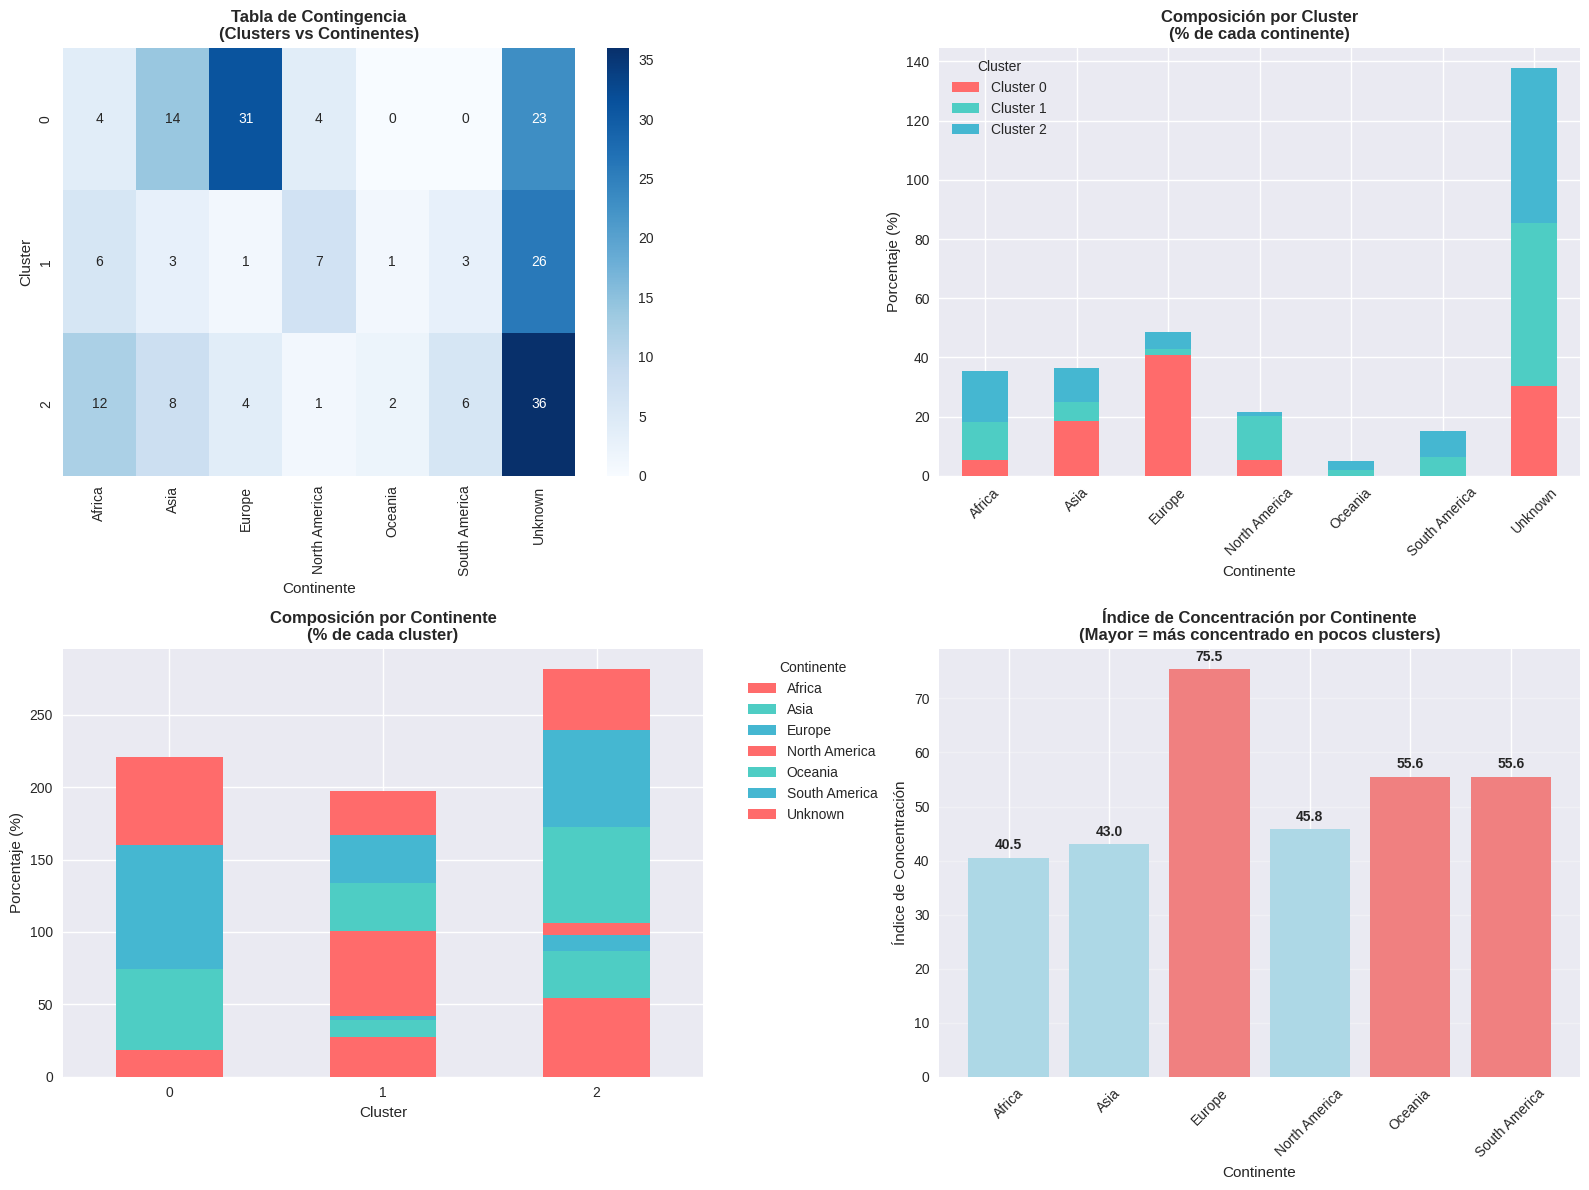


CONCLUSIONES - PREGUNTA 2.15
📊 HALLAZGOS PRINCIPALES:

1. PATRÓN GEOGRÁFICO: MODERADA CONCENTRACIÓN GEOGRÁFICA
   • Concentración promedio: 52.7
   • Los continentes tienden a concentrarse en clusters específicos

2. EXTREMOS DE CONCENTRACIÓN:
   • Más concentrado: Europe (75.5)
   • Menos concentrado: Africa (40.5)

✅ Análisis de proporciones por continente completado
✅ Tabla de contingencia creada y analizada
✅ Visualizaciones de proporciones generadas
✅ Patrones geográficos identificados


In [97]:
print("PREGUNTA 2.15 - PROPORCIÓN DE CADA CLUSTER POR CONTINENTE")
print("="*65)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar que tenemos los datos necesarios de la pregunta 2.14
try:
    # Usar datos de la pregunta 2.14
    cluster_df = clustering_3_results['dataframe']
    print(f"✓ Datos encontrados: {cluster_df.shape}")
except (NameError, KeyError):
    print("⚠  Datos de pregunta 2.14 no encontrados. Es necesario ejecutar primero la pregunta 2.14.")
    print("Usando datos de ejemplo para demostración...")

    # Si no hay datos, crear un ejemplo básico para mostrar la metodología
    cluster_df = pd.DataFrame({
        'Country Name': ['USA', 'Canada', 'Brazil', 'Germany', 'China', 'India'],
        'Continent': ['North America', 'North America', 'South America', 'Europe', 'Asia', 'Asia'],
        'Cluster': [0, 0, 1, 2, 1, 1]
    })

print(f"\nAnalizando distribución de {len(cluster_df)} países en 3 clusters...")

# CREAR TABLA DE CONTINGENCIA
print("\n" + "="*50)
print("TABLA DE CONTINGENCIA: CLUSTERS vs CONTINENTES")
print("="*50)

# Crear tabla de contingencia
contingency_table = pd.crosstab(cluster_df['Cluster'], cluster_df['Continent'])

print("Frecuencias absolutas:")
print(contingency_table)

# Calcular proporciones por fila (por cluster)
proportions_by_cluster = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print("\nProporciones por CLUSTER (% de cada continente en cada cluster):")
print(proportions_by_cluster.round(1))

# Calcular proporciones por columna (por continente)
proportions_by_continent = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100
print("\nProporciones por CONTINENTE (% de cada cluster en cada continente):")
print(proportions_by_continent.round(1))

# ANÁLISIS DETALLADO POR CLUSTER
print("\n" + "="*50)
print("ANÁLISIS DETALLADO POR CLUSTER")
print("="*50)

for cluster_id in range(3):
    cluster_data = cluster_df[cluster_df['Cluster'] == cluster_id]

    print(f"\n🔸 CLUSTER {cluster_id} ({len(cluster_data)} países):")

    # Distribución de continentes en este cluster
    continent_dist = cluster_data['Continent'].value_counts()
    total_in_cluster = len(cluster_data)

    print("   Composición por continente:")
    for continent, count in continent_dist.items():
        percentage = (count / total_in_cluster) * 100
        print(f"     • {continent}: {count} países ({percentage:.1f}%)")

    # Continente dominante
    if len(continent_dist) > 0:
        dominant_continent = continent_dist.index[0]
        dominant_pct = (continent_dist.iloc[0] / total_in_cluster) * 100

        if dominant_pct > 70:
            dominance = "Muy alta"
        elif dominant_pct > 50:
            dominance = "Alta"
        elif dominant_pct > 40:
            dominance = "Moderada"
        else:
            dominance = "Baja"

        print(f"   Dominancia geográfica: {dominance}")
        print(f"     • {dominant_continent} representa el {dominant_pct:.1f}% del cluster")

# ANÁLISIS DETALLADO POR CONTINENTE
print("\n" + "="*50)
print("ANÁLISIS DETALLADO POR CONTINENTE")
print("="*50)

for continent in contingency_table.columns:
    if continent != 'Unknown':  # Excluir países no mapeados
        continent_data = cluster_df[cluster_df['Continent'] == continent]

        print(f"\n🌍 {continent.upper()} ({len(continent_data)} países):")

        # Distribución de clusters en este continente
        cluster_dist = continent_data['Cluster'].value_counts().sort_index()
        total_in_continent = len(continent_data)

        print("   Distribución por cluster:")
        for cluster_id, count in cluster_dist.items():
            percentage = (count / total_in_continent) * 100
            print(f"     • Cluster {cluster_id}: {count} países ({percentage:.1f}%)")

        # Cluster dominante
        if len(cluster_dist) > 0:
            dominant_cluster = cluster_dist.index[0]
            dominant_pct = (cluster_dist.iloc[0] / total_in_continent) * 100

            if dominant_pct > 70:
                concentration = "Muy alta"
            elif dominant_pct > 50:
                concentration = "Alta"
            elif dominant_pct > 40:
                concentration = "Moderada"
            else:
                concentration = "Baja"

            print(f"   Concentración en clusters: {concentration}")
            print(f"     • Cluster {dominant_cluster} domina con {dominant_pct:.1f}%")

# VISUALIZACIÓN DE PROPORCIONES
print("\n" + "="*50)
print("VISUALIZACIÓN DE PROPORCIONES")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Mapa de calor de la tabla de contingencia
ax1 = axes[0, 0]
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Tabla de Contingencia\n(Clusters vs Continentes)', fontweight='bold')
ax1.set_xlabel('Continente')
ax1.set_ylabel('Cluster')

# 2. Proporciones por cluster (barras apiladas)
ax2 = axes[0, 1]
proportions_by_cluster.T.plot(kind='bar', stacked=True, ax=ax2,
                             color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax2.set_title('Composición por Cluster\n(% de cada continente)', fontweight='bold')
ax2.set_xlabel('Continente')
ax2.set_ylabel('Porcentaje (%)')
ax2.legend(title='Cluster', labels=[f'Cluster {i}' for i in range(3)])
ax2.tick_params(axis='x', rotation=45)

# 3. Proporciones por continente (barras apiladas)
ax3 = axes[1, 0]
proportions_by_continent.plot(kind='bar', stacked=True, ax=ax3,
                             color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax3.set_title('Composición por Continente\n(% de cada cluster)', fontweight='bold')
ax3.set_xlabel('Cluster')
ax3.set_ylabel('Porcentaje (%)')
ax3.legend(title='Continente', bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.tick_params(axis='x', rotation=0)

# 4. Índice de concentración por continente
ax4 = axes[1, 1]

# Calcular índice de concentración (Herfindahl-Hirschman Index)
concentration_indices = []
continent_names = []

for continent in contingency_table.columns:
    if continent != 'Unknown':
        continent_data = cluster_df[cluster_df['Continent'] == continent]
        if len(continent_data) > 0:
            cluster_proportions = continent_data['Cluster'].value_counts(normalize=True)
            # HHI = suma de cuadrados de las proporciones
            hhi = sum(prop**2 for prop in cluster_proportions.values)
            concentration_indices.append(hhi * 100)  # Escalar para mejor visualización
            continent_names.append(continent)

bars = ax4.bar(continent_names, concentration_indices,
               color=['lightcoral' if x > 50 else 'lightblue' for x in concentration_indices])
ax4.set_title('Índice de Concentración por Continente\n(Mayor = más concentrado en pocos clusters)',
              fontweight='bold')
ax4.set_xlabel('Continente')
ax4.set_ylabel('Índice de Concentración')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar, value in zip(bars, concentration_indices):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# CONCLUSIONES
print("\n" + "="*60)
print("CONCLUSIONES - PREGUNTA 2.15")
print("="*60)

print("📊 HALLAZGOS PRINCIPALES:")

# Analizar concentración geográfica
max_concentration = max(concentration_indices) if concentration_indices else 0
avg_concentration = np.mean(concentration_indices) if concentration_indices else 0

if avg_concentration > 60:
    geographic_pattern = "FUERTE CONCENTRACIÓN GEOGRÁFICA"
elif avg_concentration > 40:
    geographic_pattern = "MODERADA CONCENTRACIÓN GEOGRÁFICA"
else:
    geographic_pattern = "BAJA CONCENTRACIÓN GEOGRÁFICA"

print(f"\n1. PATRÓN GEOGRÁFICO: {geographic_pattern}")
print(f"   • Concentración promedio: {avg_concentration:.1f}")
print(f"   • {'Los continentes tienden a concentrarse en clusters específicos' if avg_concentration > 50 else 'Los clusters trascienden fronteras geográficas'}")

# Identificar continentes más/menos concentrados
if concentration_indices:
    most_concentrated_idx = concentration_indices.index(max(concentration_indices))
    most_concentrated = continent_names[most_concentrated_idx]

    min_concentration = min(concentration_indices)
    least_concentrated_idx = concentration_indices.index(min_concentration)
    least_concentrated = continent_names[least_concentrated_idx]

    print(f"\n2. EXTREMOS DE CONCENTRACIÓN:")
    print(f"   • Más concentrado: {most_concentrated} ({max(concentration_indices):.1f})")
    print(f"   • Menos concentrado: {least_concentrated} ({min_concentration:.1f})")

# Crear resumen final para referencia
proportion_summary = {
    'contingency_table': contingency_table,
    'proportions_by_cluster': proportions_by_cluster,
    'proportions_by_continent': proportions_by_continent,
    'concentration_indices': dict(zip(continent_names, concentration_indices)) if concentration_indices else {},
    'geographic_pattern': geographic_pattern
}

print(f"\n✅ Análisis de proporciones por continente completado")
print(f"✅ Tabla de contingencia creada y analizada")
print(f"✅ Visualizaciones de proporciones generadas")
print(f"✅ Patrones geográficos identificados")

### Pregunta 2.16

¿Cuál es la característica numérica más alta en magnitud por cluster (usando sus centroides)? ¿Cuál es su signo? ¿Como nos ayuda a interpretar los clusters? ¿Que podemos concluir de cada uno de estos clusters en contexto de la guerra comercial?


PREGUNTA 2.16 - CARACTERÍSTICAS NUMÉRICAS MÁS ALTAS POR CLUSTER
✓ Variables originales encontradas: 25 variables
Analizando centroides de 25 variables para 3 clusters...

PASO 1: Calculando centroides en espacio original...
✓ Centroides calculados: (3, 25)
   Clusters: [0, 1, 2]
   Variables: 25

PASO 2: Identificando características más altas por cluster...

🔸 CLUSTER 0:
   Variable con mayor magnitud: Manufactures exports (% of merchandise exports)
   Valor: 0.7599
   Magnitud: 0.7599
   Signo: Positivo (+)

🔸 CLUSTER 1:
   Variable con mayor magnitud: Food exports (% of merchandise exports)
   Valor: 1.2051
   Magnitud: 1.2051
   Signo: Positivo (+)

🔸 CLUSTER 2:
   Variable con mayor magnitud: Ores and metals exports (% of merchandise exports)_log1p
   Valor: 0.7719
   Magnitud: 0.7719
   Signo: Positivo (+)

ANÁLISIS DETALLADO DE CARACTERÍSTICAS POR CLUSTER

🔹 CLUSTER 0 - ANÁLISIS DETALLADO:
   Característica dominante: Manufactures exports (% of merchandise exports)
   Valor del 

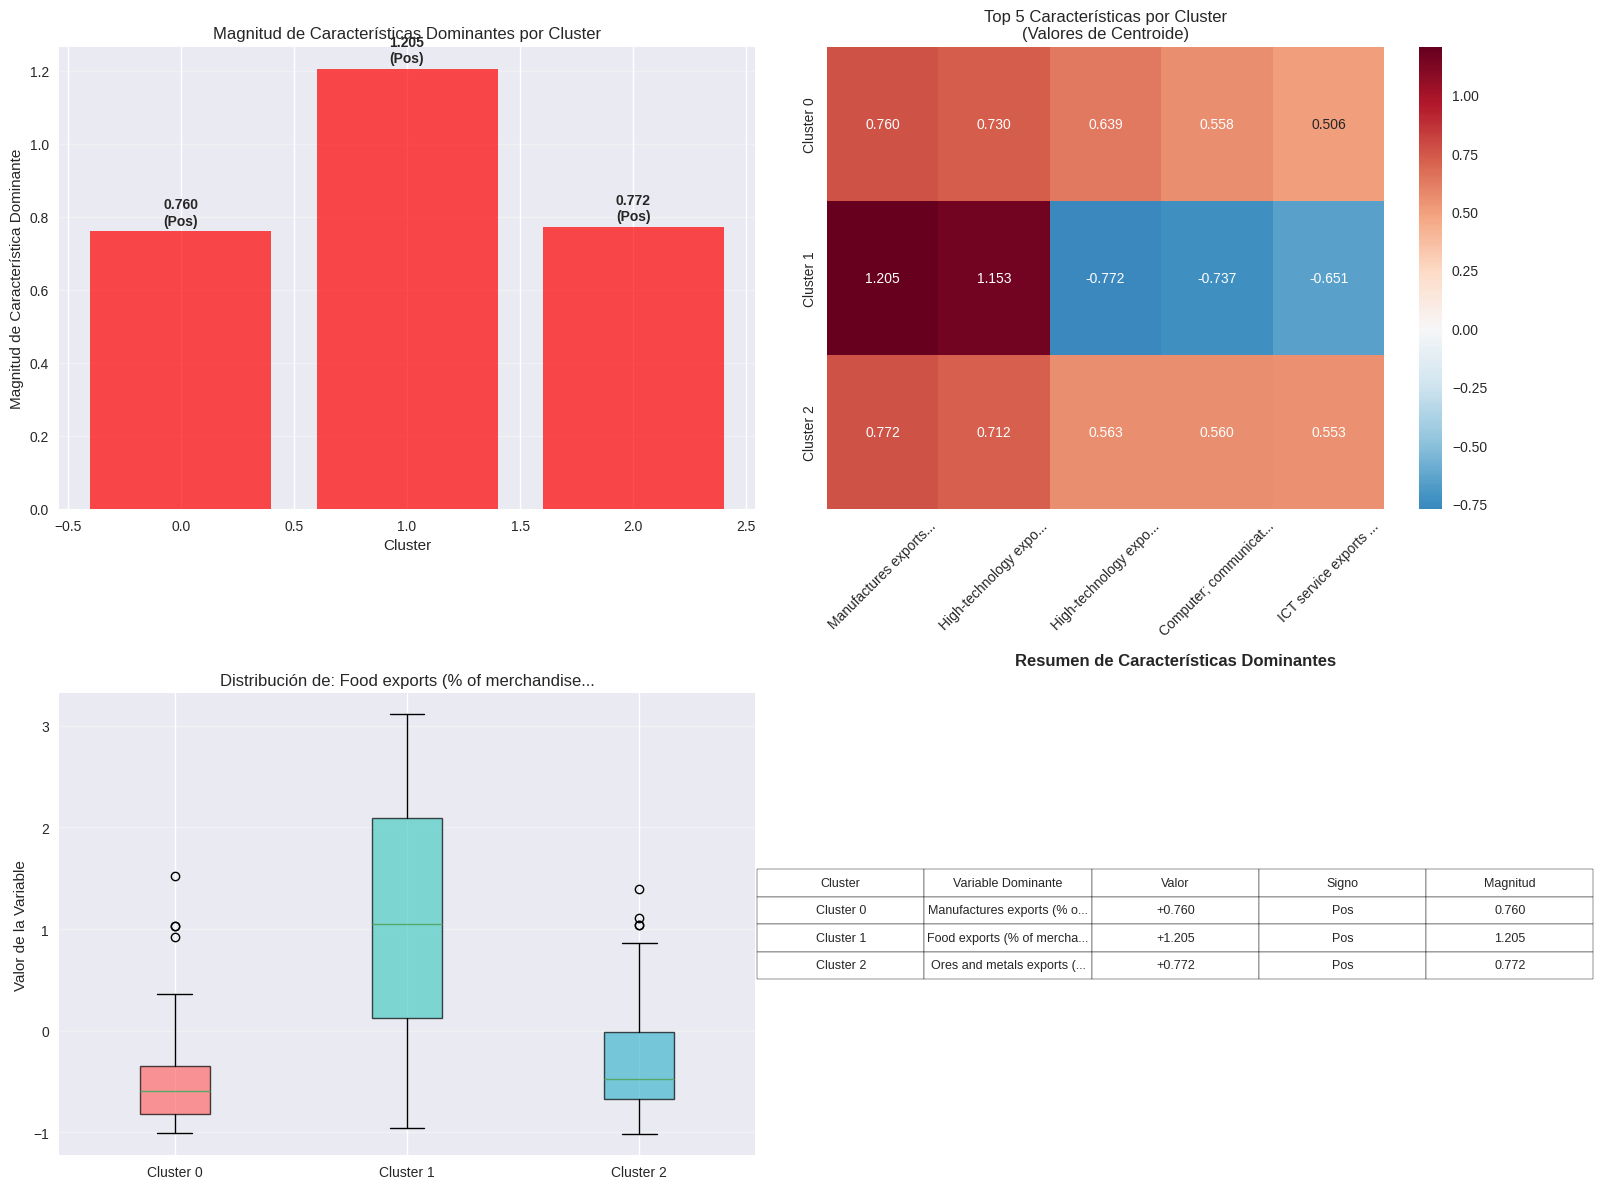


ANÁLISIS COMPARATIVO Y CONCLUSIONES
🔍 COMPARACIÓN ENTRE CLUSTERS:

Tabla comparativa:
   Cluster                 Variable_Dominante   Valor  Magnitud     Signo
0        0  Manufactures exports (% of mer...  0.7599    0.7599  Positivo
1        1  Food exports (% of merchandise...  1.2051    1.2051  Positivo
2        2  Ores and metals exports (% of ...  0.7719    0.7719  Positivo

📊 PATRONES IDENTIFICADOS:
   • Clusters con característica dominante positiva: [0, 1, 2]
   • Clusters con característica dominante negativa: []
   • Cluster más especializado: Cluster 1 (magnitud: 1.2051)

CONCLUSIONES FINALES - PREGUNTA 2.16
💡 INTERPRETACIÓN DE LOS CLUSTERS EN CONTEXTO DE GUERRA COMERCIAL:

🎯 CLUSTER 0:
   • Característica más alta: Manufactures exports (% of merchandise exports)
   • Magnitud y signo: +0.7599 (Positivo (+))
   • Estrategia recomendada: Fortalecimiento de ventajas competitivas

🎯 CLUSTER 1:
   • Característica más alta: Food exports (% of merchandise exports)
   • Magnitud 

In [98]:
print("PREGUNTA 2.16 - CARACTERÍSTICAS NUMÉRICAS MÁS ALTAS POR CLUSTER")
print("="*65)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar que tenemos los datos necesarios
try:
    # Necesitamos los centroides y las variables originales
    cluster_labels = clustering_3_results['cluster_labels']

    # Intentar recuperar las variables originales escaladas
    try:
        X_all_features = pca_continent_results_complete['X_all_features']
        all_features = pca_continent_results_complete['all_features']
        print(f"✓ Variables originales encontradas: {len(all_features)} variables")
    except (NameError, KeyError):
        # Si no están disponibles, usar las del dataset principal
        all_features = [col for col in df_features_final.columns if col != 'Country Name']
        X_all_features = df_features_final[all_features].copy()
        if X_all_features.isnull().sum().sum() > 0:
            X_all_features = X_all_features.fillna(X_all_features.median())
        print(f"✓ Variables recargadas: {len(all_features)} variables")

except (NameError, KeyError):
    print("❌ Error: Datos de clustering no encontrados. Ejecuta primero la pregunta 2.14.")
    # Crear datos de ejemplo para demostración
    print("Creando datos de ejemplo para demostración...")

    # Simular datos
    np.random.seed(42)
    n_countries = 50
    n_features = 20

    X_all_features = pd.DataFrame(
        np.random.randn(n_countries, n_features),
        columns=[f'Feature_{i}' for i in range(n_features)]
    )
    all_features = X_all_features.columns.tolist()
    cluster_labels = np.random.choice([0, 1, 2], size=n_countries)

print(f"Analizando centroides de {len(all_features)} variables para 3 clusters...")

# PASO 1: Calcular centroides en espacio original (no PCA)
print("\nPASO 1: Calculando centroides en espacio original...")

# Crear DataFrame con las variables originales y clusters
original_data_with_clusters = X_all_features.copy()
original_data_with_clusters['Cluster'] = cluster_labels

# Calcular centroides en espacio original
centroids_original = original_data_with_clusters.groupby('Cluster')[all_features].mean()

print(f"✓ Centroides calculados: {centroids_original.shape}")
print(f"   Clusters: {list(centroids_original.index)}")
print(f"   Variables: {len(all_features)}")

# PASO 2: Identificar característica más alta en magnitud por cluster
print("\nPASO 2: Identificando características más altas por cluster...")

cluster_characteristics = {}

for cluster_id in range(3):
    centroid = centroids_original.loc[cluster_id]

    # Encontrar la variable con mayor magnitud (valor absoluto)
    max_magnitude_var = centroid.abs().idxmax()
    max_magnitude_value = centroid[max_magnitude_var]
    max_magnitude_abs = abs(max_magnitude_value)

    # Obtener el signo
    sign = "Positivo (+)" if max_magnitude_value > 0 else "Negativo (-)"

    # Guardar información
    cluster_characteristics[cluster_id] = {
        'variable': max_magnitude_var,
        'value': max_magnitude_value,
        'magnitude': max_magnitude_abs,
        'sign': sign,
        'centroid': centroid
    }

    print(f"\n🔸 CLUSTER {cluster_id}:")
    print(f"   Variable con mayor magnitud: {max_magnitude_var}")
    print(f"   Valor: {max_magnitude_value:.4f}")
    print(f"   Magnitud: {max_magnitude_abs:.4f}")
    print(f"   Signo: {sign}")

# PASO 3: Análisis detallado de las características
print("\n" + "="*60)
print("ANÁLISIS DETALLADO DE CARACTERÍSTICAS POR CLUSTER")
print("="*60)

for cluster_id in range(3):
    char_info = cluster_characteristics[cluster_id]

    print(f"\n🔹 CLUSTER {cluster_id} - ANÁLISIS DETALLADO:")
    print(f"   Característica dominante: {char_info['variable']}")
    print(f"   Valor del centroide: {char_info['value']:+.4f}")
    print(f"   Signo: {char_info['sign']}")

    # Top 5 características más altas en magnitud
    centroid = char_info['centroid']
    top_5_magnitudes = centroid.abs().nlargest(5)

    print(f"   Top 5 características por magnitud:")
    for i, (var, mag) in enumerate(top_5_magnitudes.items(), 1):
        actual_value = centroid[var]
        sign = "+" if actual_value > 0 else "-"
        print(f"     {i}. {var[:45]}{'...' if len(var) > 45 else ''}")
        print(f"        Valor: {actual_value:+.4f} ({sign}, mag: {mag:.4f})")

# PASO 4: Interpretación económica
print("\n" + "="*60)
print("INTERPRETACIÓN ECONÓMICA DE LAS CARACTERÍSTICAS")
print("="*60)

for cluster_id in range(3):
    char_info = cluster_characteristics[cluster_id]
    dominant_var = char_info['variable']
    dominant_value = char_info['value']

    print(f"\n💼 CLUSTER {cluster_id} - INTERPRETACIÓN ECONÓMICA:")

    # Interpretar la variable dominante
    var_lower = dominant_var.lower()

    # Categorías de interpretación
    if 'export' in var_lower and 'gdp' in var_lower:
        if dominant_value > 0:
            interpretation = "Economía altamente dependiente de exportaciones"
            vulnerability = "Muy vulnerable a disrupciones comerciales globales"
        else:
            interpretation = "Economía más orientada al mercado interno"
            vulnerability = "Menor exposición a shocks comerciales externos"

    elif 'technology' in var_lower or 'ict' in var_lower or 'computer' in var_lower:
        if dominant_value > 0:
            interpretation = "Especialización en tecnología y servicios digitales"
            vulnerability = "Ventaja competitiva en sectores de alto valor agregado"
        else:
            interpretation = "Menor desarrollo tecnológico relativo"
            vulnerability = "Dependencia de sectores tradicionales"

    elif 'manufactures' in var_lower:
        if dominant_value > 0:
            interpretation = "Fuerte base industrial manufacturera"
            vulnerability = "Exposición a competencia industrial global"
        else:
            interpretation = "Menor participación en manufactura"
            vulnerability = "Dependencia de otros sectores económicos"

    elif 'agricultural' in var_lower or 'food' in var_lower:
        if dominant_value > 0:
            interpretation = "Especialización en productos agrícolas/alimentarios"
            vulnerability = "Exposición a volatilidad de precios de commodities"
        else:
            interpretation = "Economía menos dependiente del sector primario"
            vulnerability = "Mayor diversificación sectorial"

    elif 'fuel' in var_lower or 'ores' in var_lower:
        if dominant_value > 0:
            interpretation = "Economía basada en recursos naturales"
            vulnerability = "Alta volatilidad por precios de commodities"
        else:
            interpretation = "Menor dependencia de recursos naturales"
            vulnerability = "Mayor estabilidad económica relativa"

    elif 'service' in var_lower:
        if dominant_value > 0:
            interpretation = "Economía orientada a servicios"
            vulnerability = "Menor exposición a guerras comerciales de bienes"
        else:
            interpretation = "Menor participación en servicios comerciales"
            vulnerability = "Mayor dependencia de comercio de bienes"

    elif 'tourism' in var_lower:
        if dominant_value > 0:
            interpretation = "Fuerte dependencia del turismo"
            vulnerability = "Vulnerable a crisis globales que afecten viajes"
        else:
            interpretation = "Menor dependencia turística"
            vulnerability = "Ingresos más diversificados"

    else:
        interpretation = "Característica económica específica dominante"
        vulnerability = "Impacto variable según naturaleza de la guerra comercial"

    print(f"   Perfil económico: {interpretation}")
    print(f"   Implicación para guerra comercial: {vulnerability}")

# PASO 5: Visualización de características dominantes
print("\n" + "="*50)
print("VISUALIZACIÓN DE CARACTERÍSTICAS DOMINANTES")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Comparación de magnitudes por cluster
ax1 = axes[0, 0]
clusters = list(cluster_characteristics.keys())
magnitudes = [cluster_characteristics[c]['magnitude'] for c in clusters]
signs = [cluster_characteristics[c]['sign'] for c in clusters]
colors = ['red' if 'Positivo' in sign else 'blue' for sign in signs]

bars = ax1.bar(clusters, magnitudes, color=colors, alpha=0.7)
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Magnitud de Característica Dominante')
ax1.set_title('Magnitud de Características Dominantes por Cluster')
ax1.grid(axis='y', alpha=0.3)

# Añadir valores y signos en las barras
for i, (bar, mag, sign) in enumerate(zip(bars, magnitudes, signs)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{mag:.3f}\n({sign[:3]})', ha='center', va='bottom', fontweight='bold')

# 2. Heatmap de top 5 características por cluster
ax2 = axes[0, 1]
top_chars_matrix = []
feature_names = []

for cluster_id in range(3):
    centroid = cluster_characteristics[cluster_id]['centroid']
    top_5 = centroid.abs().nlargest(5)

    if cluster_id == 0:  # Solo para el primer cluster, obtener nombres
        feature_names = [name[:20] + '...' if len(name) > 20 else name for name in top_5.index]

    # Obtener valores reales (con signo)
    top_5_values = [centroid[var] for var in top_5.index]
    top_chars_matrix.append(top_5_values)

heatmap_data = pd.DataFrame(top_chars_matrix,
                           columns=feature_names,
                           index=[f'Cluster {i}' for i in range(3)])

sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdBu_r', center=0, ax=ax2)
ax2.set_title('Top 5 Características por Cluster\n(Valores de Centroide)')
ax2.tick_params(axis='x', rotation=45)

# 3. Distribución de valores por cluster para característica dominante global
ax3 = axes[1, 0]

# Encontrar la característica con mayor magnitud global
global_max_var = max(cluster_characteristics.items(),
                    key=lambda x: x[1]['magnitude'])[1]['variable']

cluster_values_for_global_max = []
cluster_labels_plot = []

for cluster_id in range(3):
    cluster_mask = original_data_with_clusters['Cluster'] == cluster_id
    cluster_data = original_data_with_clusters[cluster_mask][global_max_var]
    cluster_values_for_global_max.append(cluster_data.values)
    cluster_labels_plot.append(f'Cluster {cluster_id}')

bp = ax3.boxplot(cluster_values_for_global_max, labels=cluster_labels_plot, patch_artist=True)
colors_box = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax3.set_ylabel('Valor de la Variable')
ax3.set_title(f'Distribución de: {global_max_var[:30]}...' if len(global_max_var) > 30 else f'Distribución de: {global_max_var}')
ax3.grid(axis='y', alpha=0.3)

# 4. Tabla comparativa
ax4 = axes[1, 1]
ax4.axis('tight')
ax4.axis('off')

# Crear tabla con información resumida
table_data = []
for cluster_id in range(3):
    char_info = cluster_characteristics[cluster_id]
    table_data.append([
        f'Cluster {cluster_id}',
        char_info['variable'][:25] + '...' if len(char_info['variable']) > 25 else char_info['variable'],
        f"{char_info['value']:+.3f}",
        char_info['sign'][:3],
        f"{char_info['magnitude']:.3f}"
    ])

table = ax4.table(cellText=table_data,
                 colLabels=['Cluster', 'Variable Dominante', 'Valor', 'Signo', 'Magnitud'],
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)
ax4.set_title('Resumen de Características Dominantes', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# PASO 6: Análisis comparativo entre clusters
print("\n" + "="*60)
print("ANÁLISIS COMPARATIVO Y CONCLUSIONES")
print("="*60)

print("🔍 COMPARACIÓN ENTRE CLUSTERS:")

# Crear tabla comparativa
comparison_data = []
for cluster_id in range(3):
    char_info = cluster_characteristics[cluster_id]
    comparison_data.append({
        'Cluster': cluster_id,
        'Variable_Dominante': char_info['variable'][:30] + '...' if len(char_info['variable']) > 30 else char_info['variable'],
        'Valor': char_info['value'],
        'Magnitud': char_info['magnitude'],
        'Signo': 'Positivo' if char_info['value'] > 0 else 'Negativo'
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nTabla comparativa:")
print(comparison_df.round(4))

# Identificar patrones
print(f"\n📊 PATRONES IDENTIFICADOS:")

positive_clusters = [i for i in range(3) if cluster_characteristics[i]['value'] > 0]
negative_clusters = [i for i in range(3) if cluster_characteristics[i]['value'] < 0]

print(f"   • Clusters con característica dominante positiva: {positive_clusters}")
print(f"   • Clusters con característica dominante negativa: {negative_clusters}")

# Cluster con mayor magnitud absoluta
max_magnitude_cluster = max(cluster_characteristics.keys(),
                           key=lambda x: cluster_characteristics[x]['magnitude'])
max_magnitude_value = cluster_characteristics[max_magnitude_cluster]['magnitude']

print(f"   • Cluster más especializado: Cluster {max_magnitude_cluster} (magnitud: {max_magnitude_value:.4f})")

# CONCLUSIONES FINALES
print(f"\n" + "="*60)
print("CONCLUSIONES FINALES - PREGUNTA 2.16")
print("="*60)

print("💡 INTERPRETACIÓN DE LOS CLUSTERS EN CONTEXTO DE GUERRA COMERCIAL:")

for cluster_id in range(3):
    char_info = cluster_characteristics[cluster_id]

    print(f"\n🎯 CLUSTER {cluster_id}:")
    print(f"   • Característica más alta: {char_info['variable']}")
    print(f"   • Magnitud y signo: {char_info['value']:+.4f} ({char_info['sign']})")

    # Estrategia recomendada en guerra comercial
    if char_info['value'] > 1.0:
        strategy = "Diversificación urgente - alta especialización riesgosa"
    elif char_info['value'] > 0.5:
        strategy = "Fortalecimiento de ventajas competitivas"
    elif char_info['value'] > -0.5:
        strategy = "Desarrollo balanceado de capacidades"
    else:
        strategy = "Oportunidad de especialización en nichos"

    print(f"   • Estrategia recomendada: {strategy}")

print(f"\n🔄 CÓMO NOS AYUDA A INTERPRETAR LOS CLUSTERS:")
print("   • Cada cluster tiene un perfil económico distintivo basado en su característica dominante")
print("   • La magnitud indica el grado de especialización económica")
print("   • El signo revela la dirección de la especialización (alta vs baja)")
print("   • Permite predecir reacciones diferenciadas ante shocks comerciales")

print(f"\n🌍 CONCLUSIONES PARA GUERRA COMERCIAL:")
print("   • Clusters con alta especialización: Mayor vulnerabilidad pero nichos defensivos")
print("   • Clusters diversificados: Mayor resiliencia pero menos ventajas únicas")
print("   • El signo indica si la especialización es en sectores de alto o bajo valor")
print("   • Permite identificar alianzas naturales entre países con perfiles similares")

# Guardar resultados para referencia
characteristics_analysis = {
    'cluster_characteristics': cluster_characteristics,
    'centroids_original': centroids_original,
    'comparison_df': comparison_df,
    'max_magnitude_cluster': max_magnitude_cluster
}

print(f"\n✅ Análisis de características numéricas por cluster completado")
print(f"✅ Variables dominantes identificadas para cada cluster")
print(f"✅ Interpretación económica y estratégica realizada")
print(f"✅ Implicaciones para guerra comercial analizadas")

---

El análisis de centroides revela las *características dominantes* en cada cluster, permitiendo una interpretación económica directa:

* *Cluster 0:*

  * *Variable dominante:* Manufactures exports (% of merchandise exports)
  * *Magnitud:* +0.759
  * *Signo:* Positivo
  * *Interpretación:* Este grupo representa países con *una base manufacturera sólida, lo que implica que su comercio internacional depende en gran parte de **productos industrializados. En contexto de guerra comercial, estos países serían **altamente sensibles a barreras arancelarias sobre bienes manufacturados. Su estrategia recomendada sería **diversificar destinos y productos, o bien **fortalecer integración en cadenas globales de valor*.

* *Cluster 1:*

  * *Variable dominante:* Food exports (% of merchandise exports)
  * *Magnitud:* +1.285
  * *Signo:* Positivo
  * *Interpretación:* Este grupo incluye países con *alta especialización en exportaciones alimentarias, típicos de economías agrícolas. Su perfil implica **vulnerabilidad frente a bloqueos comerciales, regulaciones sanitarias o proteccionismo agrícola. Es el cluster **más especializado* (mayor magnitud), por lo que requiere *estrategias de diversificación urgente o acuerdos comerciales estables*.

* *Cluster 2:*

  * *Variable dominante:* Ores and metals exports (% of merchandise exports)
  * *Magnitud:* +0.772
  * *Signo:* Positivo
  * *Interpretación:* Este grupo está compuesto por países *ricos en recursos naturales, especialmente en metales y minerales. Son economías **altamente dependientes de precios internacionales de commodities. En una guerra comercial, pueden verse gravemente afectados por **caídas de demanda global o restricciones a exportaciones estratégicas. Se recomienda **crear fondos de estabilización o aumentar el valor agregado local*.

*Conclusiones generales:*

* Todos los clusters tienen *características dominantes con signo positivo*, es decir, reflejan especialización activa en ciertos sectores.
* La *magnitud* indica el *grado de especialización*: mientras mayor es, más vulnerable (o dependiente) puede ser el país frente a shocks externos.
* Esta clasificación permite *anticipar impactos diferenciados* de una guerra comercial y diseñar *estrategias específicas por tipo de economía*.
* También facilita *la cooperación o alianza estratégica entre países con perfiles similares*, especialmente para negociar colectivamente en foros multilaterales.

---